In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_2015_realRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc1
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_2012_borrowedRH.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc2
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Buffalo Viewpoint_outlier_NOX.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True) #sc3

In [ ]:
df1.columns

Index(['SO2 (ppb)', 'H2S (ppb)', 'THC (ppm)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['SO2 (ppb)', 'H2S (ppb)', 'THC (ppm)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
df1_w= df1_w[[
            # 'SO2 (ppb)', 
            'H2S (ppb)', 
            # 'THC (ppm)', 
            'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score',
        # 'sin', 'cos'
        ]].copy()
df1_w.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

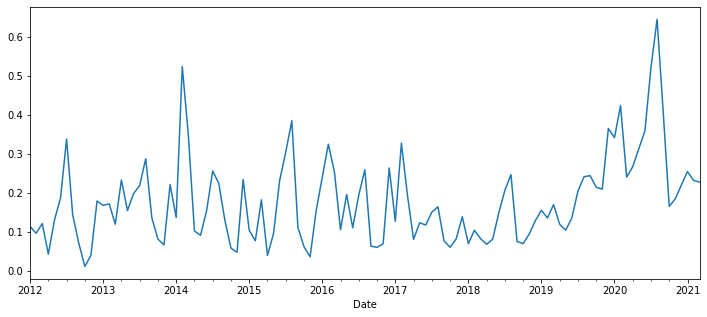

In [ ]:
df1_w['H2S (ppb)'].resample('M').mean().plot(figsize = (12,5))

In [ ]:
df1_w.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'score'],
      dtype='object')

In [ ]:
aa = 'H2S (ppb)'

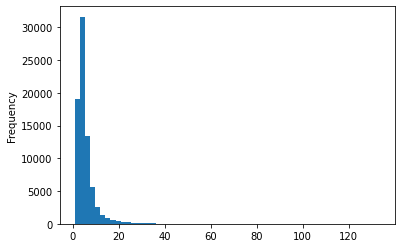

In [ ]:
df1_w['score'].plot.hist(bins =60)

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()
len(df1_w[df1_w['score']<avg + 2*std])/len(df1_w)

0.9685008495621488

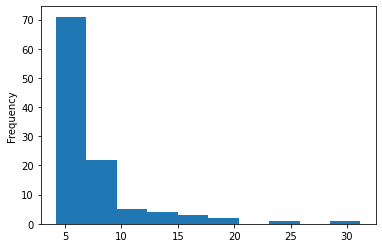

In [ ]:
# df1_w[ aa].plot.hist()
df1_w[aa][df1_w[aa]>4].plot.hist()

In [ ]:
# df1_w['SO2 (ppb)'][df1_w['SO2 (ppb)']>60].plot.hist()

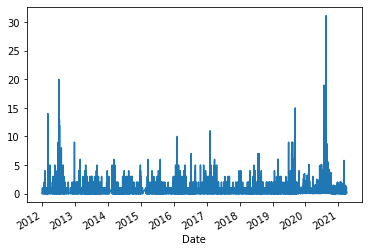

In [ ]:
df1_w[aa].plot()

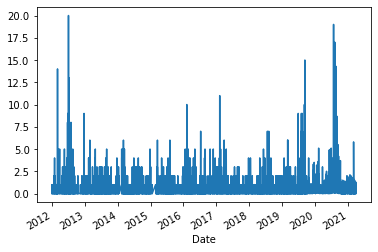

In [ ]:
# df1_w['SO2 (ppb)'].plot()
# df1_w['SO2 (ppb)'][df1_w['SO2 (ppb)']>60].plot.hist()
df1_w[df1_w[aa] > 20] = np.nan
df1_w.dropna(inplace = True)
df1_w[aa].plot()

In [ ]:
# df_xg =  df1_w.copy()
# df_xg.drop(columns = ['score'], inplace = True)
# Y =  df_xg['SO2 (ppb)']
# Y = np.array(Y).reshape(-1,1)
# X = np.array( df_xg[ df_xg.columns[1:]])

In [ ]:
def objectivee(trial):    
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.00001, random_state = 42)
        param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree"]), #",,""gblinear" , "dart"
        "lambda": trial.suggest_loguniform("lambda", 0.01, 1000.0),
        "alpha": trial.suggest_loguniform("alpha", 0.01, 1000.0),
        "score" : trial.suggest_float( 'score', avg + 1.5*std, avg + 7 * std )
        }

        # if param["booster"] == "gbtree" :
        #     param["n_estimators"] =  trial.suggest_int("n_estimators" , 1, 10000)

        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 25)
            param["eta"] = trial.suggest_loguniform("eta", 0.1, 1000.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 0.1, 1000.0)
            param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

        if param["booster"] == "dart":
            param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
            param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
            param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-3, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-3, 1.0)

        df_xg =  df1_w[df1_w['score'] < param["score"]].copy()
        # df_xg =  df1_w.copy()
        df_xg.drop(columns = ['score'], inplace = True)
        Y =  df_xg[aa]
        Y = np.array(Y).reshape(-1,1)
        X = np.array( df_xg[ df_xg.columns[1:]])
        # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.000000001000, random_state = 42)

        K = 5
        kf = KFold(n_splits=K)
        acc = 0 
        for train_index, test_index in kf.split(X):   
                X_tr, X_tes = X[train_index], X[test_index]
                y_tr, y_tes =  Y[train_index],  Y[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
    
                dtrain = xgb.DMatrix(X_tra, label=y_tra)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_tes, label=y_tes)
                
                pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
                bst = xgb.train(param, dtrain, evals=[(dval, "validation")],  early_stopping_rounds=30,
                                callbacks=[pruning_callback],
                               # verbose_eval = False
                               )
                preds = bst.predict(dtest)
                accuracy = mean_squared_error(y_tes, preds)
                acc = acc + accuracy/K
                
        print(acc)
        return acc    

In [ ]:
study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=5000)
print(study2.best_trial)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_Buffalo Viewpoint_OT_H2S_2012_brwd_RH_HP_hourly.csv')

[I 2021-06-06 17:41:39,849] A new study created in memory with name: no-name-a2ca63c0-8fb6-49d9-9a87-8245020bc204


[0]	validation-rmse:148.344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:50334.8
[2]	validation-rmse:1.72199e+07
[3]	validation-rmse:5.94808e+09
[4]	validation-rmse:2.05909e+12
[5]	validation-rmse:7.1581e+14
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:154.517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:49947.2
[2]	validation-rmse:1.71178e+07
[3]	validation-rmse:5.90171e+09
[4]	validation-rmse:2.05697e+12
[5]	validation-rmse:7.16232e+14
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:153.099
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:50564.8
[2]	validation-rmse:1.7339e+07
[3]	validation-rmse:5.97503e+09
[4]	validation-rmse:2.07531e+12
[5]	validation-rmse:7.21776e+14
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:i

[I 2021-06-06 17:41:45,125] Trial 0 finished with value: 8.741247226746871e+49 and parameters: {'booster': 'gbtree', 'lambda': 1.2689290658649088, 'alpha': 0.03021606695266672, 'score': 38.09413845206282, 'max_depth': 11, 'eta': 352.04955933606755, 'gamma': 0.27346152313263455, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 8.741247226746871e+49.


8.741247226746871e+49
[0]	validation-rmse:5.39315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:90.8161
[2]	validation-rmse:1536.77
[3]	validation-rmse:26005
[4]	validation-rmse:440053
[5]	validation-rmse:7.44652e+06
[6]	validation-rmse:1.26009e+08
[7]	validation-rmse:2.13231e+09
[8]	validation-rmse:3.60826e+10
[9]	validation-rmse:6.10585e+11
[0]	validation-rmse:5.49526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:92.4916
[2]	validation-rmse:1565.14
[3]	validation-rmse:26485
[4]	validation-rmse:448176
[5]	validation-rmse:7.58396e+06
[6]	validation-rmse:1.28335e+08
[7]	validation-rmse:2.17166e+09
[8]	validation-rmse:3.67486e+10
[9]	validation-rmse:6.21854e+11
[0]	validation-rmse:5.45743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:91.8782
[2]	validation-rmse:1554.74
[3]	validation-rmse:26309.1
[4]	validation-rmse:445200
[5]	validation-rmse:7.53361e+06
[6]	validation-rmse:1.27

[I 2021-06-06 17:41:46,116] Trial 1 finished with value: 3.9054798912682466e+23 and parameters: {'booster': 'gbtree', 'lambda': 48.3955617894463, 'alpha': 0.14175786708604515, 'score': 39.935732197067665, 'max_depth': 3, 'eta': 17.940815480276395, 'gamma': 620.4852331891466, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 3.9054798912682466e+23.


3.9054798912682466e+23
[0]	validation-rmse:65.9144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:13512.8
[2]	validation-rmse:2.77075e+06
[3]	validation-rmse:5.68133e+08
[4]	validation-rmse:1.16493e+11
[5]	validation-rmse:2.38865e+13
[6]	validation-rmse:4.89785e+15
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:67.1773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:13772.4
[2]	validation-rmse:2.82398e+06
[3]	validation-rmse:5.79046e+08
[4]	validation-rmse:1.18731e+11
[5]	validation-rmse:2.43453e+13
[6]	validation-rmse:4.99192e+15
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:66.7671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:13687.3
[2]	validation-rmse:2.80653e+06
[3]	validation-rmse:5.75469e+08
[4]	validation-rmse:1.17998e+11
[5]	validation-rmse:2.4195e+13
[6]	validation-rmse:4.96108e+

[I 2021-06-06 17:41:47,271] Trial 2 finished with value: 1.6355515948709165e+45 and parameters: {'booster': 'gbtree', 'lambda': 0.13260791181984768, 'alpha': 368.71482879569555, 'score': 27.995486093119112, 'max_depth': 2, 'eta': 206.04702276547664, 'gamma': 1.2813318404858043, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 3.9054798912682466e+23.


1.6355515948709165e+45
[0]	validation-rmse:170.642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:85919.5
[2]	validation-rmse:4.3363e+07
[3]	validation-rmse:2.19255e+10
[4]	validation-rmse:1.11031e+13
[5]	validation-rmse:5.6298e+15
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:173.661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:87644.3
[2]	validation-rmse:4.43304e+07
[3]	validation-rmse:2.24614e+10
[4]	validation-rmse:1.13969e+13
[5]	validation-rmse:5.78947e+15
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:171.255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:86257.2
[2]	validation-rmse:4.35535e+07
[3]	validation-rmse:2.20326e+10
[4]	validation-rmse:1.11629e+13
[5]	validation-rmse:5.66282e+15
[6]	validation-rmse:inf
[7]	validation-rmse:in

[I 2021-06-06 17:41:50,062] Trial 3 finished with value: 1.3326833104518111e+53 and parameters: {'booster': 'gbtree', 'lambda': 931.9017551445619, 'alpha': 85.27293501786006, 'score': 27.789887621541823, 'max_depth': 17, 'eta': 528.5375621727303, 'gamma': 0.8455208222025256, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 3.9054798912682466e+23.


1.3326833104518111e+53
[0]	validation-rmse:0.543294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.520043
[2]	validation-rmse:0.501519
[3]	validation-rmse:0.48728
[4]	validation-rmse:0.475916
[5]	validation-rmse:0.467332
[6]	validation-rmse:0.459916
[7]	validation-rmse:0.454832
[8]	validation-rmse:0.449736
[9]	validation-rmse:0.444933
[0]	validation-rmse:0.569151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.54562
[2]	validation-rmse:0.527995
[3]	validation-rmse:0.515131
[4]	validation-rmse:0.50446
[5]	validation-rmse:0.495505
[6]	validation-rmse:0.487791
[7]	validation-rmse:0.482111
[8]	validation-rmse:0.478387
[9]	validation-rmse:0.475238
[0]	validation-rmse:0.557755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.534766
[2]	validation-rmse:0.51646
[3]	validation-rmse:0.503369
[4]	validation-rmse:0.49237
[5]	validation-rmse:0.483738
[6]	validation-rmse:0.476654
[7]	valida

[I 2021-06-06 17:41:59,994] Trial 4 finished with value: 0.21830520711560114 and parameters: {'booster': 'gbtree', 'lambda': 10.657919300773985, 'alpha': 0.681620761923771, 'score': 17.022471762936163, 'max_depth': 25, 'eta': 0.13525026119969594, 'gamma': 23.20079368860047, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 0.21830520711560114.


0.21830520711560114
[0]	validation-rmse:26.1954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1598.02
[2]	validation-rmse:100861
[3]	validation-rmse:6.43338e+06
[4]	validation-rmse:4.12333e+08
[5]	validation-rmse:2.64704e+10
[6]	validation-rmse:1.70023e+12
[7]	validation-rmse:1.09282e+14
[8]	validation-rmse:7.03695e+15
[9]	validation-rmse:inf
[0]	validation-rmse:26.532
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1619.69
[2]	validation-rmse:102278
[3]	validation-rmse:6.53662e+06
[4]	validation-rmse:4.19249e+08
[5]	validation-rmse:2.69098e+10
[6]	validation-rmse:1.72986e+12
[7]	validation-rmse:1.11284e+14
[8]	validation-rmse:7.17482e+15
[9]	validation-rmse:inf
[0]	validation-rmse:26.4708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:1604.84
[2]	validation-rmse:101604
[3]	validation-rmse:6.48631e+06
[4]	validation-rmse:4.15237e+08
[5]	validation-rmse:2.66206e+10
[6]	validation-

[I 2021-06-06 17:42:07,245] Trial 5 finished with value: 2.2426394040075616e+35 and parameters: {'booster': 'gbtree', 'lambda': 10.156306655917097, 'alpha': 0.01316462529802251, 'score': 32.28616825205628, 'max_depth': 15, 'eta': 66.0040233119761, 'gamma': 0.24192945219565892, 'grow_policy': 'depthwise'}. Best is trial 4 with value: 0.21830520711560114.


2.2426394040075616e+35
[0]	validation-rmse:0.476961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442256
[2]	validation-rmse:0.427255
[3]	validation-rmse:0.419679
[4]	validation-rmse:0.416076
[5]	validation-rmse:0.411575
[6]	validation-rmse:0.409413
[7]	validation-rmse:0.40699
[8]	validation-rmse:0.405949
[9]	validation-rmse:0.404896
[0]	validation-rmse:0.515302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.482273
[2]	validation-rmse:0.468129
[3]	validation-rmse:0.461004
[4]	validation-rmse:0.458545
[5]	validation-rmse:0.456433
[6]	validation-rmse:0.454717
[7]	validation-rmse:0.452377
[8]	validation-rmse:0.450947
[9]	validation-rmse:0.450358
[0]	validation-rmse:0.511854
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.4796
[2]	validation-rmse:0.46416
[3]	validation-rmse:0.458071
[4]	validation-rmse:0.453195
[5]	validation-rmse:0.450822
[6]	validation-rmse:0.448869
[7]	valid

[I 2021-06-06 17:42:10,080] Trial 6 finished with value: 0.213934065144134 and parameters: {'booster': 'gbtree', 'lambda': 142.27197643456353, 'alpha': 0.03591408610013822, 'score': 25.122621271119748, 'max_depth': 6, 'eta': 0.4329247619022173, 'gamma': 0.5374627518095544, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


0.213934065144134
[0]	validation-rmse:1.94338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:10.9394
[2]	validation-rmse:64.1795
[3]	validation-rmse:377.293
[4]	validation-rmse:2218.88
[5]	validation-rmse:13050.9
[6]	validation-rmse:76768.7
[7]	validation-rmse:451599
[8]	validation-rmse:2.65669e+06
[9]	validation-rmse:1.56294e+07
[0]	validation-rmse:1.98484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:11.1648
[2]	validation-rmse:65.5483
[3]	validation-rmse:385.499
[4]	validation-rmse:2268.03
[5]	validation-rmse:13344.8
[6]	validation-rmse:78523.3
[7]	validation-rmse:462064
[8]	validation-rmse:2.71906e+06
[9]	validation-rmse:1.6001e+07
[0]	validation-rmse:1.94122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:10.9948
[2]	validation-rmse:64.4966
[3]	validation-rmse:379.165
[4]	validation-rmse:2229.74
[5]	validation-rmse:13113.9
[6]	validation-rmse:77133.1
[7]	validation-rmse:4537

[I 2021-06-06 17:42:11,860] Trial 7 finished with value: 257965895041641.62 and parameters: {'booster': 'gbtree', 'lambda': 745.4429227541241, 'alpha': 424.55330210639727, 'score': 32.75203574935124, 'max_depth': 11, 'eta': 7.023734906363065, 'gamma': 1.7951031776073731, 'grow_policy': 'depthwise'}. Best is trial 6 with value: 0.213934065144134.


257965895041641.62
[0]	validation-rmse:10.3042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:313.742
[2]	validation-rmse:9578.47
[3]	validation-rmse:292417
[4]	validation-rmse:8.92706e+06
[5]	validation-rmse:2.7253e+08
[6]	validation-rmse:8.31996e+09
[7]	validation-rmse:2.53997e+11
[8]	validation-rmse:7.75415e+12
[9]	validation-rmse:2.36723e+14
[0]	validation-rmse:10.4651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:318.796
[2]	validation-rmse:9732.6
[3]	validation-rmse:297122
[4]	validation-rmse:9.07071e+06
[5]	validation-rmse:2.76916e+08
[6]	validation-rmse:8.45385e+09
[7]	validation-rmse:2.58084e+11
[8]	validation-rmse:7.87893e+12
[9]	validation-rmse:2.40533e+14
[0]	validation-rmse:10.3398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:315.028
[2]	validation-rmse:9617.51
[3]	validation-rmse:293609
[4]	validation-rmse:8.96345e+06
[5]	validation-rmse:2.73641e+08
[6]	validatio

[I 2021-06-06 17:42:13,032] Trial 8 finished with value: 5.792193060837208e+28 and parameters: {'booster': 'gbtree', 'lambda': 0.010781189180448719, 'alpha': 0.010053840210087173, 'score': 18.86188891491761, 'max_depth': 1, 'eta': 31.528581752526684, 'gamma': 135.65526312266428, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


5.792193060837208e+28


[I 2021-06-06 17:42:13,154] Trial 9 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.524503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.495536
[2]	validation-rmse:0.47593
[3]	validation-rmse:0.462291
[4]	validation-rmse:0.452708
[5]	validation-rmse:0.445892
[6]	validation-rmse:0.44125
[7]	validation-rmse:0.437721
[8]	validation-rmse:0.434932
[9]	validation-rmse:0.43213
[0]	validation-rmse:0.533973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.505052
[2]	validation-rmse:0.485402
[3]	validation-rmse:0.472028
[4]	validation-rmse:0.462401
[5]	validation-rmse:0.455073
[6]	validation-rmse:0.450096
[7]	validation-rmse:0.446833
[8]	validation-rmse:0.444348
[9]	validation-rmse:0.441892
[0]	validation-rmse:0.521558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.491843
[2]	validation-rmse:0.471258
[3]	validation-rmse:0.457645
[4]	validation-rmse:0.447567
[5]	validation-rmse:0.440109
[6]	validation-rmse:0.435267
[7]	validation-rmse:0.431242
[8

[I 2021-06-06 17:42:15,816] Trial 10 finished with value: 0.2164250432832193 and parameters: {'booster': 'gbtree', 'lambda': 269.0495179324815, 'alpha': 11.532828447183558, 'score': 21.746534734016507, 'max_depth': 6, 'eta': 0.21239911498838623, 'gamma': 5.686828955202257, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


0.2164250432832193
[0]	validation-rmse:0.546703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.524732
[2]	validation-rmse:0.507551
[3]	validation-rmse:0.493857
[4]	validation-rmse:0.48301
[5]	validation-rmse:0.473954
[6]	validation-rmse:0.467525
[7]	validation-rmse:0.461836
[8]	validation-rmse:0.457183
[9]	validation-rmse:0.453608
[0]	validation-rmse:0.553306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.531388
[2]	validation-rmse:0.513965
[3]	validation-rmse:0.500108
[4]	validation-rmse:0.489059
[5]	validation-rmse:0.479993
[6]	validation-rmse:0.472693
[7]	validation-rmse:0.466975
[8]	validation-rmse:0.462206
[9]	validation-rmse:0.458443
[0]	validation-rmse:0.550713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.528807
[2]	validation-rmse:0.51131
[3]	validation-rmse:0.497463
[4]	validation-rmse:0.486204
[5]	validation-rmse:0.477326
[6]	validation-rmse:0.470049
[7]	validat

[I 2021-06-06 17:42:19,087] Trial 11 finished with value: 0.22251350508571502 and parameters: {'booster': 'gbtree', 'lambda': 251.48908859561257, 'alpha': 8.483712288126211, 'score': 21.680710231025206, 'max_depth': 7, 'eta': 0.1359660665641008, 'gamma': 5.373236520106361, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


0.22251350508571502
[0]	validation-rmse:0.496778
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.488386
[2]	validation-rmse:0.486884
[3]	validation-rmse:0.47947
[4]	validation-rmse:0.478045
[5]	validation-rmse:0.476536
[6]	validation-rmse:0.476535
[7]	validation-rmse:0.476535
[8]	validation-rmse:0.476535
[9]	validation-rmse:0.476535
[0]	validation-rmse:0.530649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.519738
[2]	validation-rmse:0.517477
[3]	validation-rmse:0.516709
[4]	validation-rmse:0.51423
[5]	validation-rmse:0.511948
[6]	validation-rmse:0.508269
[7]	validation-rmse:0.508255
[8]	validation-rmse:0.508255
[9]	validation-rmse:0.508255
[0]	validation-rmse:0.51726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.506826
[2]	validation-rmse:0.502792
[3]	validation-rmse:0.501479
[4]	validation-rmse:0.499537
[5]	validation-rmse:0.498635
[6]	validation-rmse:0.498635
[7]	validat

[I 2021-06-06 17:42:22,176] Trial 12 finished with value: 0.2225146362128474 and parameters: {'booster': 'gbtree', 'lambda': 131.2802889602729, 'alpha': 9.168509274442949, 'score': 22.43865578399864, 'max_depth': 7, 'eta': 1.123141287252996, 'gamma': 6.292633892798919, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


0.2225146362128474
[0]	validation-rmse:0.466973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.447328
[2]	validation-rmse:0.439188
[3]	validation-rmse:0.435034
[4]	validation-rmse:0.429674
[5]	validation-rmse:0.428916
[6]	validation-rmse:0.42836
[7]	validation-rmse:0.427499
[8]	validation-rmse:0.423937
[9]	validation-rmse:0.422121
[0]	validation-rmse:0.454638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437466
[2]	validation-rmse:0.432085
[3]	validation-rmse:0.428702
[4]	validation-rmse:0.427884
[5]	validation-rmse:0.423265
[6]	validation-rmse:0.421152
[7]	validation-rmse:0.416878
[8]	validation-rmse:0.41361
[9]	validation-rmse:0.411156
[0]	validation-rmse:0.439606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420398
[2]	validation-rmse:0.417578
[3]	validation-rmse:0.411507
[4]	validation-rmse:0.406985
[5]	validation-rmse:0.405349
[6]	validation-rmse:0.402798
[7]	validat

[I 2021-06-06 17:42:25,178] Trial 13 finished with value: 0.2169614822639879 and parameters: {'booster': 'gbtree', 'lambda': 35.76644427062283, 'alpha': 1.6875642685973598, 'score': 14.424636500173587, 'max_depth': 7, 'eta': 0.7635657939796178, 'gamma': 0.16784277648563464, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


0.2169614822639879
[0]	validation-rmse:0.489229
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.472276
[2]	validation-rmse:0.465282
[3]	validation-rmse:0.461152
[4]	validation-rmse:0.458517
[5]	validation-rmse:0.456585
[6]	validation-rmse:0.455049
[7]	validation-rmse:0.454147
[8]	validation-rmse:0.452383
[9]	validation-rmse:0.451933
[0]	validation-rmse:0.527764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.5112
[2]	validation-rmse:0.50587
[3]	validation-rmse:0.502887
[4]	validation-rmse:0.500633
[5]	validation-rmse:0.499589
[6]	validation-rmse:0.498405
[7]	validation-rmse:0.497695
[8]	validation-rmse:0.496569
[9]	validation-rmse:0.495907
[0]	validation-rmse:0.514235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.496158
[2]	validation-rmse:0.489278
[3]	validation-rmse:0.486772
[4]	validation-rmse:0.485089
[5]	validation-rmse:0.482584
[6]	validation-rmse:0.481657
[7]	validati

[I 2021-06-06 17:42:32,549] Trial 14 finished with value: 0.21834624546166295 and parameters: {'booster': 'gbtree', 'lambda': 834.52311850714, 'alpha': 31.220787806485188, 'score': 23.463534629077937, 'max_depth': 19, 'eta': 0.7320754935477438, 'gamma': 2.861687043780333, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


0.21834624546166295
[0]	validation-rmse:1.15735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.15584
[2]	validation-rmse:9.28703
[3]	validation-rmse:27.6365
[4]	validation-rmse:82.5222
[5]	validation-rmse:246.767
[6]	validation-rmse:738.709
[7]	validation-rmse:2211.21
[8]	validation-rmse:6629.33
[9]	validation-rmse:19889.1
[0]	validation-rmse:1.18288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.19401
[2]	validation-rmse:9.37055
[3]	validation-rmse:27.8504
[4]	validation-rmse:83.0084
[5]	validation-rmse:247.493
[6]	validation-rmse:739.209
[7]	validation-rmse:2209.62
[8]	validation-rmse:6609.42
[9]	validation-rmse:19782.2
[0]	validation-rmse:1.17579
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.17387
[2]	validation-rmse:9.28695
[3]	validation-rmse:27.5319
[4]	validation-rmse:81.9448
[5]	validation-rmse:244.122
[6]	validation-rmse:729.159
[7]	validation-rmse:2180.78
[8]	val

[I 2021-06-06 17:42:37,135] Trial 15 finished with value: 450386711.2759762 and parameters: {'booster': 'gbtree', 'lambda': 166.11666619050945, 'alpha': 0.26254300742193437, 'score': 31.941700577134107, 'max_depth': 10, 'eta': 4.05221230911966, 'gamma': 0.6554884757986615, 'grow_policy': 'lossguide'}. Best is trial 6 with value: 0.213934065144134.


450386711.2759762
[0]	validation-rmse:0.498421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.466901
[2]	validation-rmse:0.446403
[3]	validation-rmse:0.436273
[4]	validation-rmse:0.431093
[5]	validation-rmse:0.426587
[6]	validation-rmse:0.42539
[7]	validation-rmse:0.424764
[8]	validation-rmse:0.42444
[9]	validation-rmse:0.424274
[0]	validation-rmse:0.496907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.463098
[2]	validation-rmse:0.443486
[3]	validation-rmse:0.432603
[4]	validation-rmse:0.426574
[5]	validation-rmse:0.420841
[6]	validation-rmse:0.418111
[7]	validation-rmse:0.417289
[8]	validation-rmse:0.416826
[9]	validation-rmse:0.41656
[0]	validation-rmse:0.494091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.460453
[2]	validation-rmse:0.44409
[3]	validation-rmse:0.431961
[4]	validation-rmse:0.424971
[5]	validation-rmse:0.422128
[6]	validation-rmse:0.418044
[7]	validation

[I 2021-06-06 17:42:39,916] Trial 16 finished with value: 0.2127583884938857 and parameters: {'booster': 'gbtree', 'lambda': 2.895552007582201, 'alpha': 5.026592697269931, 'score': 18.205707996824636, 'max_depth': 6, 'eta': 0.2704053318450387, 'gamma': 29.72385085194379, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.2127583884938857
[0]	validation-rmse:0.55463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.541261
[2]	validation-rmse:0.526901
[3]	validation-rmse:0.519094
[4]	validation-rmse:0.508271
[5]	validation-rmse:0.502489
[6]	validation-rmse:0.495963
[7]	validation-rmse:0.490401
[8]	validation-rmse:0.484462
[9]	validation-rmse:0.481508
[0]	validation-rmse:0.583843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.567644
[2]	validation-rmse:0.559691
[3]	validation-rmse:0.546148
[4]	validation-rmse:0.538516
[5]	validation-rmse:0.530134
[6]	validation-rmse:0.526842
[7]	validation-rmse:0.518651
[8]	validation-rmse:0.5136
[9]	validation-rmse:0.51004
[0]	validation-rmse:0.568095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.5563
[2]	validation-rmse:0.544435
[3]	validation-rmse:0.534622
[4]	validation-rmse:0.525862
[5]	validation-rmse:0.520287
[6]	validation-rmse:0.510705
[7]	validation-

[I 2021-06-06 17:42:43,929] Trial 17 finished with value: 0.2441008110516436 and parameters: {'booster': 'gbtree', 'lambda': 1.4095071437078002, 'alpha': 0.09457428141079836, 'score': 13.331751795442692, 'max_depth': 9, 'eta': 1.917293365570432, 'gamma': 111.76762553172537, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.2441008110516436
[0]	validation-rmse:0.497562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.461064
[2]	validation-rmse:0.444914
[3]	validation-rmse:0.437725
[4]	validation-rmse:0.430387
[5]	validation-rmse:0.42775
[6]	validation-rmse:0.423776
[7]	validation-rmse:0.42257
[8]	validation-rmse:0.421597
[9]	validation-rmse:0.420778
[0]	validation-rmse:0.502368
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.468222
[2]	validation-rmse:0.452531
[3]	validation-rmse:0.445889
[4]	validation-rmse:0.441331
[5]	validation-rmse:0.436258
[6]	validation-rmse:0.433398
[7]	validation-rmse:0.4301
[8]	validation-rmse:0.429199
[9]	validation-rmse:0.427176
[0]	validation-rmse:0.48826
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.454013
[2]	validation-rmse:0.440217
[3]	validation-rmse:0.430713
[4]	validation-rmse:0.42615
[5]	validation-rmse:0.425314
[6]	validation-rmse:0.424007
[7]	validation-

[I 2021-06-06 17:42:51,307] Trial 18 finished with value: 0.21611547541962703 and parameters: {'booster': 'gbtree', 'lambda': 0.23644536282194117, 'alpha': 1.750532405114951, 'score': 18.478929409604596, 'max_depth': 14, 'eta': 0.3516899164549359, 'gamma': 19.798007718331522, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.21611547541962703


[I 2021-06-06 17:42:51,427] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:42:51,646] Trial 20 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.513003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.481996
[2]	validation-rmse:0.457531
[3]	validation-rmse:0.447356
[4]	validation-rmse:0.442977
[5]	validation-rmse:0.437312
[6]	validation-rmse:0.434881
[7]	validation-rmse:0.43366
[8]	validation-rmse:0.432839
[9]	validation-rmse:0.430609
[0]	validation-rmse:0.516998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.486139
[2]	validation-rmse:0.471431
[3]	validation-rmse:0.461421
[4]	validation-rmse:0.456726
[5]	validation-rmse:0.453069
[6]	validation-rmse:0.448869
[7]	validation-rmse:0.448594
[8]	validation-rmse:0.448459
[9]	validation-rmse:0.447723
[0]	validation-rmse:0.52072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.484918
[2]	validation-rmse:0.470881
[3]	validation-rmse:0.461863
[4]	validation-rmse:0.457693
[5]	validation-rmse:0.452176
[6]	validation-rmse:0.450467
[7]	validation-rmse:0.447019
[

[I 2021-06-06 17:42:58,872] Trial 21 finished with value: 0.22623143380826194 and parameters: {'booster': 'gbtree', 'lambda': 0.03471526422520114, 'alpha': 2.448110546895312, 'score': 19.289355209325407, 'max_depth': 14, 'eta': 0.3309909616289337, 'gamma': 18.883555355980143, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.22623143380826194


[I 2021-06-06 17:42:59,069] Trial 22 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.482223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.452349
[2]	validation-rmse:0.440427
[3]	validation-rmse:0.436423
[4]	validation-rmse:0.432323
[5]	validation-rmse:0.430861
[6]	validation-rmse:0.427608
[7]	validation-rmse:0.42625
[8]	validation-rmse:0.425501
[9]	validation-rmse:0.424369
[0]	validation-rmse:0.521777
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.493594
[2]	validation-rmse:0.48179
[3]	validation-rmse:0.474537
[4]	validation-rmse:0.471184
[5]	validation-rmse:0.470013
[6]	validation-rmse:0.469434
[7]	validation-rmse:0.469399
[8]	validation-rmse:0.46892
[9]	validation-rmse:0.468824
[0]	validation-rmse:0.512852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.489204
[2]	validation-rmse:0.469624
[3]	validation-rmse:0.462577
[4]	validation-rmse:0.460599
[5]	validation-rmse:0.457685
[6]	validation-rmse:0.45742
[7]	validation-rmse:0.457442
[8]

[I 2021-06-06 17:43:03,336] Trial 23 finished with value: 0.22252548413062323 and parameters: {'booster': 'gbtree', 'lambda': 0.044879000359315475, 'alpha': 0.6044762910600471, 'score': 16.611587150399387, 'max_depth': 9, 'eta': 0.4787586936410282, 'gamma': 12.675628959562195, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.22252548413062323
[0]	validation-rmse:0.544071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.517253
[2]	validation-rmse:0.501442


[I 2021-06-06 17:43:03,856] Trial 24 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.52301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.497805
[2]	validation-rmse:0.492608
[3]	validation-rmse:0.489093


[I 2021-06-06 17:43:04,923] Trial 25 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 17:43:05,104] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:05,197] Trial 27 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.500134
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.483086
[2]	validation-rmse:0.471762
[3]	validation-rmse:0.468284
[4]	validation-rmse:0.466063
[5]	validation-rmse:0.465728
[6]	validation-rmse:0.465597
[7]	validation-rmse:0.464818
[8]	validation-rmse:0.462228
[9]	validation-rmse:0.461469
[0]	validation-rmse:0.509157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.488356
[2]	validation-rmse:0.483494
[3]	validation-rmse:0.47908
[4]	validation-rmse:0.476967
[5]	validation-rmse:0.476103
[6]	validation-rmse:0.476918
[7]	validation-rmse:0.476746
[8]	validation-rmse:0.476102
[9]	validation-rmse:0.474265
[0]	validation-rmse:0.511286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.493084
[2]	validation-rmse:0.484138
[3]	validation-rmse:0.477879
[4]	validation-rmse:0.474565
[5]	validation-rmse:0.471315
[6]	validation-rmse:0.469494
[7]	validation-rmse:0.468714


[I 2021-06-06 17:43:09,390] Trial 28 finished with value: 0.3210758772768514 and parameters: {'booster': 'gbtree', 'lambda': 0.10939819944660323, 'alpha': 0.025383420415463803, 'score': 29.780743836910936, 'max_depth': 9, 'eta': 0.5763783899800873, 'gamma': 11.305584572515524, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.3210758772768514


[I 2021-06-06 17:43:09,643] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.491019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.474362
[2]	validation-rmse:0.469296
[3]	validation-rmse:0.463406
[4]	validation-rmse:0.4598
[5]	validation-rmse:0.458806
[6]	validation-rmse:0.458901
[7]	validation-rmse:0.458557
[8]	validation-rmse:0.456614
[9]	validation-rmse:0.456245
[0]	validation-rmse:0.49062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.478896
[2]	validation-rmse:0.476636
[3]	validation-rmse:0.474592
[4]	validation-rmse:0.472608
[5]	validation-rmse:0.468467
[6]	validation-rmse:0.465819
[7]	validation-rmse:0.463846
[8]	validation-rmse:0.463351
[9]	validation-rmse:0.463145
[0]	validation-rmse:0.479452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.464728
[2]	validation-rmse:0.460113
[3]	validation-rmse:0.458094
[4]	validation-rmse:0.454059
[5]	validation-rmse:0.453556
[6]	validation-rmse:0.452027
[7]	validation-rmse:0.450851
[8

[I 2021-06-06 17:43:15,428] Trial 30 finished with value: 0.23093060157091574 and parameters: {'booster': 'gbtree', 'lambda': 14.312998641118876, 'alpha': 4.502428831651983, 'score': 20.102607171218303, 'max_depth': 12, 'eta': 0.8426908289423434, 'gamma': 3.0710202074543895, 'grow_policy': 'lossguide'}. Best is trial 16 with value: 0.2127583884938857.


0.23093060157091574


[I 2021-06-06 17:43:15,538] Trial 31 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.491994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.457606
[2]	validation-rmse:0.4418
[3]	validation-rmse:0.432845
[4]	validation-rmse:0.427973
[5]	validation-rmse:0.42373
[6]	validation-rmse:0.420622
[7]	validation-rmse:0.41974
[8]	validation-rmse:0.418001
[9]	validation-rmse:0.41643
[0]	validation-rmse:0.506077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.473955
[2]	validation-rmse:0.458562
[3]	validation-rmse:0.449344
[4]	validation-rmse:0.444566
[5]	validation-rmse:0.441298
[6]	validation-rmse:0.439216
[7]	validation-rmse:0.438144
[8]	validation-rmse:0.437059
[9]	validation-rmse:0.436082
[0]	validation-rmse:0.495786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.462654
[2]	validation-rmse:0.446974
[3]	validation-rmse:0.437691
[4]	validation-rmse:0.432124
[5]	validation-rmse:0.429121
[6]	validation-rmse:0.426689
[7]	validation-rmse:0.42506
[8]	v

[I 2021-06-06 17:43:18,241] Trial 32 finished with value: 0.20971812173690274 and parameters: {'booster': 'gbtree', 'lambda': 240.402910726522, 'alpha': 13.393560671291342, 'score': 17.893314035247602, 'max_depth': 6, 'eta': 0.3741906616217292, 'gamma': 4.803306321974864, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.20971812173690274.


0.20971812173690274
[0]	validation-rmse:0.510489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.482588
[2]	validation-rmse:0.470767
[3]	validation-rmse:0.464848
[4]	validation-rmse:0.462568
[5]	validation-rmse:0.461671
[6]	validation-rmse:0.459525
[7]	validation-rmse:0.458362


[I 2021-06-06 17:43:18,540] Trial 33 pruned. Trial was pruned at iteration 8.


[0]	validation-rmse:0.475513
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.46348
[2]	validation-rmse:0.456461
[3]	validation-rmse:0.45372
[4]	validation-rmse:0.449812
[5]	validation-rmse:0.447374
[6]	validation-rmse:0.446351
[7]	validation-rmse:0.445348
[8]	validation-rmse:0.44331
[9]	validation-rmse:0.442035
[0]	validation-rmse:0.492122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.478744
[2]	validation-rmse:0.471075
[3]	validation-rmse:0.468215
[4]	validation-rmse:0.466006
[5]	validation-rmse:0.462675
[6]	validation-rmse:0.460789
[7]	validation-rmse:0.459784
[8]	validation-rmse:0.459165
[9]	validation-rmse:0.458612
[0]	validation-rmse:0.486648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.474246
[2]	validation-rmse:0.467278
[3]	validation-rmse:0.463646
[4]	validation-rmse:0.461069
[5]	validation-rmse:0.457766
[6]	validation-rmse:0.455969
[7]	validation-rmse:0.45485
[8]

[I 2021-06-06 17:43:22,384] Trial 34 finished with value: 0.21516594728569732 and parameters: {'booster': 'gbtree', 'lambda': 417.90568208815324, 'alpha': 5.043282085945286, 'score': 15.223702144384497, 'max_depth': 8, 'eta': 1.1577157038926136, 'gamma': 0.3777594485057478, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.20971812173690274.


0.21516594728569732


[I 2021-06-06 17:43:22,497] Trial 35 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.453463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442382
[2]	validation-rmse:0.437295
[3]	validation-rmse:0.435014
[4]	validation-rmse:0.43072
[5]	validation-rmse:0.429701
[6]	validation-rmse:0.42652
[7]	validation-rmse:0.42602
[8]	validation-rmse:0.426188
[9]	validation-rmse:0.424782
[0]	validation-rmse:0.467869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.45641
[2]	validation-rmse:0.452454
[3]	validation-rmse:0.447269
[4]	validation-rmse:0.444195
[5]	validation-rmse:0.442638
[6]	validation-rmse:0.440507
[7]	validation-rmse:0.439353
[8]	validation-rmse:0.437787
[9]	validation-rmse:0.437199
[0]	validation-rmse:0.459787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.449263
[2]	validation-rmse:0.443504
[3]	validation-rmse:0.439927
[4]	validation-rmse:0.43759
[5]	validation-rmse:0.435225
[6]	validation-rmse:0.433071
[7]	validation-rmse:0.43279
[8]	v

[I 2021-06-06 17:43:26,276] Trial 36 finished with value: 0.2089707785727889 and parameters: {'booster': 'gbtree', 'lambda': 523.0157433353559, 'alpha': 5.62351217334631, 'score': 14.818033578164252, 'max_depth': 8, 'eta': 1.0432351665098376, 'gamma': 1.1697667583019944, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.2089707785727889


[I 2021-06-06 17:43:26,384] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:26,487] Trial 38 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.481424
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.474171
[2]	validation-rmse:0.47084


[I 2021-06-06 17:43:26,632] Trial 39 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 17:43:26,737] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.497754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.477018
[2]	validation-rmse:0.472222
[3]	validation-rmse:0.468216
[4]	validation-rmse:0.465457
[5]	validation-rmse:0.46403


[I 2021-06-06 17:43:27,272] Trial 41 pruned. Trial was pruned at iteration 6.
[I 2021-06-06 17:43:27,438] Trial 42 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:27,574] Trial 43 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:27,684] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:27,815] Trial 45 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.464732
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.458736
[2]	validation-rmse:0.454528
[3]	validation-rmse:0.453199
[4]	validation-rmse:0.452375
[5]	validation-rmse:0.450544
[6]	validation-rmse:0.450547
[7]	validation-rmse:0.450547
[8]	validation-rmse:0.450547
[9]	validation-rmse:0.450547
[0]	validation-rmse:0.479563
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.472668
[2]	validation-rmse:0.469864
[3]	validation-rmse:0.468018
[4]	validation-rmse:0.467291
[5]	validation-rmse:0.467169
[6]	validation-rmse:0.467015
[7]	validation-rmse:0.466554
[8]	validation-rmse:0.466478
[9]	validation-rmse:0.466282
[0]	validation-rmse:0.466248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.459964
[2]	validation-rmse:0.457259
[3]	validation-rmse:0.454528
[4]	validation-rmse:0.454138
[5]	validation-rmse:0.453616
[6]	validation-rmse:0.453825
[7]	validation-rmse:0.453831

[I 2021-06-06 17:43:29,801] Trial 46 finished with value: 0.20986082937461542 and parameters: {'booster': 'gbtree', 'lambda': 83.76087572380008, 'alpha': 5.085822638106343, 'score': 14.249030378281269, 'max_depth': 4, 'eta': 1.0214385302230318, 'gamma': 7.3581402970795775, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.
[I 2021-06-06 17:43:29,894] Trial 47 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.494749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.481473


[I 2021-06-06 17:43:30,082] Trial 48 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:43:30,171] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:30,295] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.449834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.439909
[2]	validation-rmse:0.434889
[3]	validation-rmse:0.433003
[4]	validation-rmse:0.43128
[5]	validation-rmse:0.429241
[6]	validation-rmse:0.427208
[7]	validation-rmse:0.426243
[8]	validation-rmse:0.425376
[9]	validation-rmse:0.424559
[0]	validation-rmse:0.476162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.464712
[2]	validation-rmse:0.459246
[3]	validation-rmse:0.457365
[4]	validation-rmse:0.456977
[5]	validation-rmse:0.455726
[6]	validation-rmse:0.455263
[7]	validation-rmse:0.453622
[8]	validation-rmse:0.452853
[9]	validation-rmse:0.450942
[0]	validation-rmse:0.472598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.462979
[2]	validation-rmse:0.460478
[3]	validation-rmse:0.456238
[4]	validation-rmse:0.455038
[5]	validation-rmse:0.452506
[6]	validation-rmse:0.449437
[7]	validation-rmse:0.448958


[I 2021-06-06 17:43:32,574] Trial 51 finished with value: 0.21983038531829696 and parameters: {'booster': 'gbtree', 'lambda': 334.52268263645925, 'alpha': 4.153406789556773, 'score': 15.309102072388598, 'max_depth': 5, 'eta': 1.1592861402326071, 'gamma': 1.2695873070643968, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.21983038531829696
[0]	validation-rmse:0.455671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.445972
[2]	validation-rmse:0.44072
[3]	validation-rmse:0.437721
[4]	validation-rmse:0.436281
[5]	validation-rmse:0.433002
[6]	validation-rmse:0.431557
[7]	validation-rmse:0.431141
[8]	validation-rmse:0.429586
[9]	validation-rmse:0.429605
[0]	validation-rmse:0.477391
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.470646
[2]	validation-rmse:0.464614
[3]	validation-rmse:0.462291
[4]	validation-rmse:0.460729
[5]	validation-rmse:0.458702
[6]	validation-rmse:0.457691
[7]	validation-rmse:0.455924
[8]	validation-rmse:0.455519
[9]	validation-rmse:0.455412
[0]	validation-rmse:0.472747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.461674
[2]	validation-rmse:0.458393
[3]	validation-rmse:0.45641
[4]	validation-rmse:0.454734
[5]	validation-rmse:0.452752
[6]	validation-rmse:0.452613
[7]	valida

[I 2021-06-06 17:43:35,447] Trial 52 finished with value: 0.21188639520310343 and parameters: {'booster': 'gbtree', 'lambda': 115.54967442087313, 'alpha': 5.884526620521076, 'score': 13.042098396834668, 'max_depth': 6, 'eta': 0.9782004161916671, 'gamma': 0.4721753093191769, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.21188639520310343
[0]	validation-rmse:0.475279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.463778
[2]	validation-rmse:0.459389
[3]	validation-rmse:0.458447
[4]	validation-rmse:0.457355
[5]	validation-rmse:0.455723
[6]	validation-rmse:0.45573


[I 2021-06-06 17:43:35,896] Trial 53 pruned. Trial was pruned at iteration 7.
[I 2021-06-06 17:43:36,004] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:36,161] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:36,284] Trial 56 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:36,405] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:36,507] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:36,593] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:36,745] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.406407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.392954
[2]	validation-rmse:0.389298
[3]	validation-rmse:0.384731
[4]	validation-rmse:0.383923
[5]	validation-rmse:0.381417
[6]	validation-rmse:0.379622
[7]	validation-rmse:0.379064
[8]	validation-rmse:0.377303
[9]	validation-rmse:0.376045
[0]	validation-rmse:0.420417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407668
[2]	validation-rmse:0.402237
[3]	validation-rmse:0.399084
[4]	validation-rmse:0.396163
[5]	validation-rmse:0.394682
[6]	validation-rmse:0.393552
[7]	validation-rmse:0.392327
[8]	validation-rmse:0.390966
[9]	validation-rmse:0.390355
[0]	validation-rmse:0.408705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396841
[2]	validation-rmse:0.39149
[3]	validation-rmse:0.389503
[4]	validation-rmse:0.38766
[5]	validation-rmse:0.385423
[6]	validation-rmse:0.383012
[7]	validation-rmse:0.382246
[

[I 2021-06-06 17:43:40,817] Trial 61 finished with value: 0.2436308733783521 and parameters: {'booster': 'gbtree', 'lambda': 946.5572132665901, 'alpha': 5.0398890734354405, 'score': 14.736715398878035, 'max_depth': 8, 'eta': 1.1970300206414275, 'gamma': 0.36803089263041844, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.2436308733783521
[0]	validation-rmse:0.449253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436699
[2]	validation-rmse:0.432815
[3]	validation-rmse:0.430621
[4]	validation-rmse:0.427162
[5]	validation-rmse:0.425732
[6]	validation-rmse:0.425186
[7]	validation-rmse:0.424206
[8]	validation-rmse:0.420658
[9]	validation-rmse:0.420089
[0]	validation-rmse:0.453086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.443434
[2]	validation-rmse:0.440912
[3]	validation-rmse:0.436009
[4]	validation-rmse:0.431765
[5]	validation-rmse:0.430375
[6]	validation-rmse:0.430081
[7]	validation-rmse:0.429173
[8]	validation-rmse:0.428232
[9]	validation-rmse:0.427777
[0]	validation-rmse:0.455835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444273
[2]	validation-rmse:0.438425
[3]	validation-rmse:0.437354
[4]	validation-rmse:0.435978
[5]	validation-rmse:0.431863
[6]	validation-rmse:0.42877
[7]	valida

[I 2021-06-06 17:43:43,954] Trial 62 finished with value: 0.21869130420499022 and parameters: {'booster': 'gbtree', 'lambda': 163.96978398538917, 'alpha': 1.4272073688452431, 'score': 15.847523262983877, 'max_depth': 7, 'eta': 0.9794958741931927, 'gamma': 0.19618878107402896, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.21869130420499022


[I 2021-06-06 17:43:44,075] Trial 63 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,231] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,325] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,444] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,563] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,671] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,811] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:44,981] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.490529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.454083
[2]	validation-rmse:0.438234
[3]	validation-rmse:0.43035
[4]	validation-rmse:0.426184
[5]	validation-rmse:0.42231
[6]	validation-rmse:0.421634
[7]	validation-rmse:0.4215
[8]	validation-rmse:0.421461
[9]	validation-rmse:0.421457
[0]	validation-rmse:0.497435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.46067
[2]	validation-rmse:0.44217
[3]	validation-rmse:0.43338
[4]	validation-rmse:0.427765
[5]	validation-rmse:0.424216
[6]	validation-rmse:0.422152
[7]	validation-rmse:0.421942
[8]	validation-rmse:0.421854
[9]	validation-rmse:0.421818
[0]	validation-rmse:0.501717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.465846
[2]	validation-rmse:0.447762
[3]	validation-rmse:0.439922
[4]	validation-rmse:0.434565
[5]	validation-rmse:0.429437
[6]	validation-rmse:0.42906
[7]	validation-rmse:0.426831
[8]	val

[I 2021-06-06 17:43:52,554] Trial 71 finished with value: 0.21693869282542805 and parameters: {'booster': 'gbtree', 'lambda': 0.014026574673711776, 'alpha': 0.02034765785709679, 'score': 18.26910227932974, 'max_depth': 15, 'eta': 0.3347170162692445, 'gamma': 24.77671065261571, 'grow_policy': 'lossguide'}. Best is trial 36 with value: 0.2089707785727889.


0.21693869282542805
[0]	validation-rmse:0.470388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.452792
[2]	validation-rmse:0.44946
[3]	validation-rmse:0.444534
[4]	validation-rmse:0.44028
[5]	validation-rmse:0.438963
[6]	validation-rmse:0.438962
[7]	validation-rmse:0.438962
[8]	validation-rmse:0.438962
[9]	validation-rmse:0.438962
[0]	validation-rmse:0.476759
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453257
[2]	validation-rmse:0.448285
[3]	validation-rmse:0.448469
[4]	validation-rmse:0.449497
[5]	validation-rmse:0.448871
[6]	validation-rmse:0.445221
[7]	validation-rmse:0.445221
[8]	validation-rmse:0.445221
[9]	validation-rmse:0.445221
[0]	validation-rmse:0.478327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.458001
[2]	validation-rmse:0.453015
[3]	validation-rmse:0.452829
[4]	validation-rmse:0.452809
[5]	validation-rmse:0.452807
[6]	validation-rmse:0.452808
[7]	valida

[I 2021-06-06 17:43:59,292] Trial 72 finished with value: 0.2194286371228641 and parameters: {'booster': 'gbtree', 'lambda': 0.19330834945976255, 'alpha': 0.010068730224150772, 'score': 16.869892441077212, 'max_depth': 14, 'eta': 0.6437289980550023, 'gamma': 54.17540913102743, 'grow_policy': 'lossguide'}. Best is trial 36 with value: 0.2089707785727889.


0.2194286371228641


[I 2021-06-06 17:43:59,496] Trial 73 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:59,604] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:43:59,780] Trial 75 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:00,005] Trial 76 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.465508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.459476
[2]	validation-rmse:0.457202
[3]	validation-rmse:0.457202


[I 2021-06-06 17:44:00,975] Trial 77 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 17:44:01,115] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:01,239] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:01,401] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:01,517] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:01,620] Trial 82 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.490804
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:44:01,785] Trial 83 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:44:01,927] Trial 84 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.488448
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.470798


[I 2021-06-06 17:44:02,208] Trial 85 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.427884
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419834
[2]	validation-rmse:0.41637
[3]	validation-rmse:0.412852
[4]	validation-rmse:0.409866
[5]	validation-rmse:0.407768
[6]	validation-rmse:0.405881
[7]	validation-rmse:0.404584
[8]	validation-rmse:0.403617
[9]	validation-rmse:0.402868
[0]	validation-rmse:0.460614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.45159
[2]	validation-rmse:0.447728
[3]	validation-rmse:0.446723
[4]	validation-rmse:0.444722
[5]	validation-rmse:0.442643
[6]	validation-rmse:0.441094
[7]	validation-rmse:0.440367
[8]	validation-rmse:0.4399
[9]	validation-rmse:0.439101
[0]	validation-rmse:0.457385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.447851
[2]	validation-rmse:0.441485
[3]	validation-rmse:0.439234
[4]	validation-rmse:0.43769
[5]	validation-rmse:0.436449
[6]	validation-rmse:0.435713
[7]	validation-rmse:0.434992
[8]	

[I 2021-06-06 17:44:04,145] Trial 86 finished with value: 0.24245832360623265 and parameters: {'booster': 'gbtree', 'lambda': 341.7099031594495, 'alpha': 13.190974876546388, 'score': 21.598751828549517, 'max_depth': 4, 'eta': 0.9337140373692, 'gamma': 0.7192138783433893, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.24245832360623265
[0]	validation-rmse:0.474963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437833
[2]	validation-rmse:0.42417
[3]	validation-rmse:0.415744
[4]	validation-rmse:0.409921
[5]	validation-rmse:0.407374
[6]	validation-rmse:0.405442
[7]	validation-rmse:0.403348
[8]	validation-rmse:0.4017
[9]	validation-rmse:0.401075
[0]	validation-rmse:0.516012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.484315
[2]	validation-rmse:0.470325
[3]	validation-rmse:0.464483
[4]	validation-rmse:0.460883
[5]	validation-rmse:0.456915
[6]	validation-rmse:0.45465
[7]	validation-rmse:0.453049
[8]	validation-rmse:0.453081
[9]	validation-rmse:0.452772
[0]	validation-rmse:0.503341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.471816
[2]	validation-rmse:0.457516
[3]	validation-rmse:0.450283
[4]	validation-rmse:0.445414
[5]	validation-rmse:0.444549
[6]	validation-rmse:0.442254
[7]	validati

[I 2021-06-06 17:44:11,104] Trial 87 finished with value: 0.22799347531545894 and parameters: {'booster': 'gbtree', 'lambda': 4.29336651953713, 'alpha': 4.779795438884218, 'score': 25.25546444449971, 'max_depth': 14, 'eta': 0.48042469721437764, 'gamma': 0.5084047286128042, 'grow_policy': 'lossguide'}. Best is trial 36 with value: 0.2089707785727889.


0.22799347531545894


[I 2021-06-06 17:44:11,225] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:11,350] Trial 89 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.456405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.441099
[2]	validation-rmse:0.437411
[3]	validation-rmse:0.43513
[4]	validation-rmse:0.432902
[5]	validation-rmse:0.431843
[6]	validation-rmse:0.431124
[7]	validation-rmse:0.429711
[8]	validation-rmse:0.428906
[9]	validation-rmse:0.428159
[0]	validation-rmse:0.464639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.4545
[2]	validation-rmse:0.447508
[3]	validation-rmse:0.445451
[4]	validation-rmse:0.443286
[5]	validation-rmse:0.442088
[6]	validation-rmse:0.440115
[7]	validation-rmse:0.438194
[8]	validation-rmse:0.437023
[9]	validation-rmse:0.436481
[0]	validation-rmse:0.4575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.44224
[2]	validation-rmse:0.441352
[3]	validation-rmse:0.438314
[4]	validation-rmse:0.435379
[5]	validation-rmse:0.434041
[6]	validation-rmse:0.432649
[7]	validation-rmse:0.43135
[8]	va

[I 2021-06-06 17:44:12,700] Trial 90 finished with value: 0.2198282155551619 and parameters: {'booster': 'gbtree', 'lambda': 0.08157661773711544, 'alpha': 2.9168639017346036, 'score': 17.090967910810384, 'max_depth': 2, 'eta': 0.7178214835897815, 'gamma': 6.333703500936161, 'grow_policy': 'depthwise'}. Best is trial 36 with value: 0.2089707785727889.


0.2198282155551619


[I 2021-06-06 17:44:12,882] Trial 91 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:13,103] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:13,326] Trial 93 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.439234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407855
[2]	validation-rmse:0.395976
[3]	validation-rmse:0.390328
[4]	validation-rmse:0.387061
[5]	validation-rmse:0.386111
[6]	validation-rmse:0.385847
[7]	validation-rmse:0.385836
[8]	validation-rmse:0.38583
[9]	validation-rmse:0.385828
[0]	validation-rmse:0.448777
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418497
[2]	validation-rmse:0.405788
[3]	validation-rmse:0.40138
[4]	validation-rmse:0.398886
[5]	validation-rmse:0.396618
[6]	validation-rmse:0.395668
[7]	validation-rmse:0.395384
[8]	validation-rmse:0.395382
[9]	validation-rmse:0.395381
[0]	validation-rmse:0.448411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417354
[2]	validation-rmse:0.40423
[3]	validation-rmse:0.398958
[4]	validation-rmse:0.396844
[5]	validation-rmse:0.39579
[6]	validation-rmse:0.395272
[7]	validation-rmse:0.39525
[8]	

[I 2021-06-06 17:44:20,742] Trial 94 finished with value: 0.2087140746665469 and parameters: {'booster': 'gbtree', 'lambda': 599.3860420440175, 'alpha': 0.040311740479348, 'score': 14.725186381823427, 'max_depth': 16, 'eta': 0.5064555469035719, 'gamma': 18.347781826904072, 'grow_policy': 'lossguide'}. Best is trial 94 with value: 0.2087140746665469.


0.2087140746665469
[0]	validation-rmse:0.429051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421528
[2]	validation-rmse:0.417351
[3]	validation-rmse:0.415228
[4]	validation-rmse:0.413389
[5]	validation-rmse:0.412721
[6]	validation-rmse:0.412713
[7]	validation-rmse:0.412713
[8]	validation-rmse:0.412713
[9]	validation-rmse:0.412713
[0]	validation-rmse:0.433798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426418
[2]	validation-rmse:0.421581
[3]	validation-rmse:0.419849
[4]	validation-rmse:0.419153
[5]	validation-rmse:0.419153
[6]	validation-rmse:0.419153
[7]	validation-rmse:0.419153
[8]	validation-rmse:0.419153
[9]	validation-rmse:0.419153
[0]	validation-rmse:0.427807
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420047
[2]	validation-rmse:0.416118
[3]	validation-rmse:0.414355
[4]	validation-rmse:0.41293
[5]	validation-rmse:0.411755
[6]	validation-rmse:0.411441
[7]	valida

[I 2021-06-06 17:44:29,631] Trial 95 finished with value: 0.21160460023189717 and parameters: {'booster': 'gbtree', 'lambda': 631.8115470082754, 'alpha': 0.12386651272693994, 'score': 14.649442280596837, 'max_depth': 19, 'eta': 1.0656331456940111, 'gamma': 12.873140673422949, 'grow_policy': 'lossguide'}. Best is trial 94 with value: 0.2087140746665469.


0.21160460023189717


[I 2021-06-06 17:44:29,822] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.490519
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:44:30,192] Trial 97 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.446736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417093
[2]	validation-rmse:0.406699
[3]	validation-rmse:0.40053
[4]	validation-rmse:0.396494
[5]	validation-rmse:0.394107
[6]	validation-rmse:0.391407
[7]	validation-rmse:0.388866
[8]	validation-rmse:0.387953
[9]	validation-rmse:0.38547
[0]	validation-rmse:0.45768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427504
[2]	validation-rmse:0.416705
[3]	validation-rmse:0.411559
[4]	validation-rmse:0.408887
[5]	validation-rmse:0.407167
[6]	validation-rmse:0.405319
[7]	validation-rmse:0.404135
[8]	validation-rmse:0.402991
[9]	validation-rmse:0.400942
[0]	validation-rmse:0.44001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409443
[2]	validation-rmse:0.397103
[3]	validation-rmse:0.390568
[4]	validation-rmse:0.386939
[5]	validation-rmse:0.383822
[6]	validation-rmse:0.381254
[7]	validation-rmse:0.380481
[8]

[I 2021-06-06 17:44:38,349] Trial 98 finished with value: 0.20413702790460642 and parameters: {'booster': 'gbtree', 'lambda': 380.19406142339125, 'alpha': 0.06025571161824257, 'score': 14.89099624906412, 'max_depth': 17, 'eta': 0.5965907732602961, 'gamma': 0.9923369848319412, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20413702790460642


[I 2021-06-06 17:44:38,549] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:44:38,742] Trial 100 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.489083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.461785
[2]	validation-rmse:0.450952
[3]	validation-rmse:0.444091
[4]	validation-rmse:0.440409
[5]	validation-rmse:0.436691
[6]	validation-rmse:0.43443
[7]	validation-rmse:0.431968
[8]	validation-rmse:0.430152
[9]	validation-rmse:0.428616
[0]	validation-rmse:0.507026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.480497
[2]	validation-rmse:0.472624
[3]	validation-rmse:0.468271
[4]	validation-rmse:0.465034
[5]	validation-rmse:0.461855
[6]	validation-rmse:0.459821
[7]	validation-rmse:0.458913
[8]	validation-rmse:0.45791
[9]	validation-rmse:0.456668
[0]	validation-rmse:0.514151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.48857
[2]	validation-rmse:0.479482
[3]	validation-rmse:0.47309
[4]	validation-rmse:0.467779
[5]	validation-rmse:0.464955
[6]	validation-rmse:0.462885
[7]	validation-rmse:0.460457
[8]

[I 2021-06-06 17:44:46,685] Trial 101 finished with value: 0.20895879825632543 and parameters: {'booster': 'gbtree', 'lambda': 168.84492671839746, 'alpha': 0.10164262721016128, 'score': 14.970392522049575, 'max_depth': 16, 'eta': 0.6212266335595182, 'gamma': 0.2793284336518273, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20895879825632543
[0]	validation-rmse:0.488149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.460179


[I 2021-06-06 17:44:47,206] Trial 102 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:44:47,395] Trial 103 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437924
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420215
[2]	validation-rmse:0.410785
[3]	validation-rmse:0.404674
[4]	validation-rmse:0.401885
[5]	validation-rmse:0.401239
[6]	validation-rmse:0.397642
[7]	validation-rmse:0.395901
[8]	validation-rmse:0.39487
[9]	validation-rmse:0.39382
[0]	validation-rmse:0.428144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410098
[2]	validation-rmse:0.400161
[3]	validation-rmse:0.396763
[4]	validation-rmse:0.395084
[5]	validation-rmse:0.393288
[6]	validation-rmse:0.393272
[7]	validation-rmse:0.392893
[8]	validation-rmse:0.39304
[9]	validation-rmse:0.392457
[0]	validation-rmse:0.419994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402567
[2]	validation-rmse:0.397586
[3]	validation-rmse:0.392225
[4]	validation-rmse:0.390409
[5]	validation-rmse:0.389131
[6]	validation-rmse:0.387562
[7]	validation-rmse:0.38753
[8]

[I 2021-06-06 17:44:57,001] Trial 104 finished with value: 0.2193087879984566 and parameters: {'booster': 'gbtree', 'lambda': 97.5774458711938, 'alpha': 0.01974028208002937, 'score': 15.956745430409368, 'max_depth': 19, 'eta': 0.8364858251889449, 'gamma': 0.3298193727329698, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.2193087879984566
[0]	validation-rmse:0.484357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.443493
[2]	validation-rmse:0.426611
[3]	validation-rmse:0.420364
[4]	validation-rmse:0.417898
[5]	validation-rmse:0.416462
[6]	validation-rmse:0.41443
[7]	validation-rmse:0.413371
[8]	validation-rmse:0.412522
[9]	validation-rmse:0.411143
[0]	validation-rmse:0.513023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.472497
[2]	validation-rmse:0.458206
[3]	validation-rmse:0.4518
[4]	validation-rmse:0.448944
[5]	validation-rmse:0.44642
[6]	validation-rmse:0.445635
[7]	validation-rmse:0.443083
[8]	validation-rmse:0.442305
[9]	validation-rmse:0.439674
[0]	validation-rmse:0.5076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.469093
[2]	validation-rmse:0.452911
[3]	validation-rmse:0.444157
[4]	validation-rmse:0.440235
[5]	validation-rmse:0.436974
[6]	validation-rmse:0.435403
[7]	validation-

[I 2021-06-06 17:45:08,047] Trial 105 finished with value: 0.23610222030952643 and parameters: {'booster': 'gbtree', 'lambda': 2.8780128219500583, 'alpha': 0.23524090320179694, 'score': 13.061250304308066, 'max_depth': 23, 'eta': 0.42876135795955145, 'gamma': 0.6122205311225252, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.23610222030952643
[0]	validation-rmse:0.42007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399458
[2]	validation-rmse:0.395116
[3]	validation-rmse:0.392246
[4]	validation-rmse:0.389716
[5]	validation-rmse:0.389322
[6]	validation-rmse:0.388945
[7]	validation-rmse:0.389076
[8]	validation-rmse:0.389619
[9]	validation-rmse:0.388679
[0]	validation-rmse:0.446357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425568
[2]	validation-rmse:0.422867
[3]	validation-rmse:0.42135
[4]	validation-rmse:0.418472
[5]	validation-rmse:0.41882
[6]	validation-rmse:0.417074
[7]	validation-rmse:0.416451
[8]	validation-rmse:0.415708
[9]	validation-rmse:0.415204
[0]	validation-rmse:0.432059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410666
[2]	validation-rmse:0.406175
[3]	validation-rmse:0.403588
[4]	validation-rmse:0.400024
[5]	validation-rmse:0.399716
[6]	validation-rmse:0.397897
[7]	validat

[I 2021-06-06 17:45:17,001] Trial 106 finished with value: 0.23393069610125844 and parameters: {'booster': 'gbtree', 'lambda': 118.54803148486027, 'alpha': 0.09660962490704324, 'score': 14.89853279282366, 'max_depth': 18, 'eta': 1.3202836548932333, 'gamma': 1.3438181371003355, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.23393069610125844
[0]	validation-rmse:0.471015
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440865
[2]	validation-rmse:0.428412
[3]	validation-rmse:0.42172
[4]	validation-rmse:0.41796
[5]	validation-rmse:0.413943
[6]	validation-rmse:0.41085
[7]	validation-rmse:0.406921
[8]	validation-rmse:0.403496
[9]	validation-rmse:0.402542
[0]	validation-rmse:0.492479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.464545
[2]	validation-rmse:0.451575
[3]	validation-rmse:0.445727
[4]	validation-rmse:0.43981
[5]	validation-rmse:0.436974
[6]	validation-rmse:0.435172
[7]	validation-rmse:0.432465
[8]	validation-rmse:0.430924
[9]	validation-rmse:0.428868
[0]	validation-rmse:0.533069
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.504831
[2]	validation-rmse:0.493447
[3]	validation-rmse:0.486304
[4]	validation-rmse:0.48118
[5]	validation-rmse:0.477052
[6]	validation-rmse:0.473347
[7]	validatio

[I 2021-06-06 17:45:26,153] Trial 107 finished with value: 0.21581613156163837 and parameters: {'booster': 'gbtree', 'lambda': 176.0271504843995, 'alpha': 0.12642268904903775, 'score': 16.60314729199948, 'max_depth': 19, 'eta': 0.5507566098080874, 'gamma': 0.18903737173750387, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21581613156163837
[0]	validation-rmse:0.428343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407144
[2]	validation-rmse:0.39816
[3]	validation-rmse:0.39308
[4]	validation-rmse:0.390427
[5]	validation-rmse:0.387693
[6]	validation-rmse:0.385163
[7]	validation-rmse:0.384602
[8]	validation-rmse:0.38387
[9]	validation-rmse:0.381646
[0]	validation-rmse:0.45115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432142
[2]	validation-rmse:0.425519
[3]	validation-rmse:0.42231
[4]	validation-rmse:0.41904
[5]	validation-rmse:0.41588
[6]	validation-rmse:0.41297
[7]	validation-rmse:0.412006
[8]	validation-rmse:0.410124
[9]	validation-rmse:0.409331
[0]	validation-rmse:0.473892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.455073
[2]	validation-rmse:0.447457
[3]	validation-rmse:0.441538
[4]	validation-rmse:0.438204
[5]	validation-rmse:0.435448
[6]	validation-rmse:0.433714
[7]	validation-r

[I 2021-06-06 17:45:34,644] Trial 108 finished with value: 0.22136483947815142 and parameters: {'booster': 'gbtree', 'lambda': 428.1286228832526, 'alpha': 0.04492529201493576, 'score': 15.23803883818921, 'max_depth': 17, 'eta': 0.7745607328232812, 'gamma': 0.45223191383347366, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.20413702790460642.


0.22136483947815142
[0]	validation-rmse:0.446611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435831
[2]	validation-rmse:0.428181
[3]	validation-rmse:0.426192
[4]	validation-rmse:0.42191
[5]	validation-rmse:0.420258
[6]	validation-rmse:0.418262
[7]	validation-rmse:0.417802
[8]	validation-rmse:0.416658
[9]	validation-rmse:0.414235
[0]	validation-rmse:0.481209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.469529
[2]	validation-rmse:0.463632
[3]	validation-rmse:0.460763
[4]	validation-rmse:0.457399
[5]	validation-rmse:0.454449
[6]	validation-rmse:0.454087
[7]	validation-rmse:0.451333
[8]	validation-rmse:0.451219
[9]	validation-rmse:0.449617
[0]	validation-rmse:0.4746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.464077
[2]	validation-rmse:0.455784
[3]	validation-rmse:0.452328
[4]	validation-rmse:0.44944
[5]	validation-rmse:0.447492
[6]	validation-rmse:0.446788
[7]	validati

[I 2021-06-06 17:45:42,637] Trial 109 finished with value: 0.21676370096901987 and parameters: {'booster': 'gbtree', 'lambda': 295.5391987244357, 'alpha': 0.09305453603612765, 'score': 13.315887209145687, 'max_depth': 16, 'eta': 1.0440890520700121, 'gamma': 0.7987223481536552, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21676370096901987


[I 2021-06-06 17:45:42,821] Trial 110 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:43,039] Trial 111 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.445497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425209
[2]	validation-rmse:0.420115
[3]	validation-rmse:0.418306
[4]	validation-rmse:0.416694
[5]	validation-rmse:0.416686
[6]	validation-rmse:0.416683
[7]	validation-rmse:0.416683
[8]	validation-rmse:0.416682
[9]	validation-rmse:0.416682
[0]	validation-rmse:0.467449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.445858
[2]	validation-rmse:0.44011
[3]	validation-rmse:0.438733
[4]	validation-rmse:0.438679
[5]	validation-rmse:0.438666
[6]	validation-rmse:0.438662
[7]	validation-rmse:0.43866
[8]	validation-rmse:0.43866
[9]	validation-rmse:0.43866
[0]	validation-rmse:0.459852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.439375
[2]	validation-rmse:0.433946
[3]	validation-rmse:0.43284
[4]	validation-rmse:0.431831
[5]	validation-rmse:0.431827
[6]	validation-rmse:0.431826
[7]	validation-rmse:0.431825
[8]	

[I 2021-06-06 17:45:51,560] Trial 112 finished with value: 0.209524863754692 and parameters: {'booster': 'gbtree', 'lambda': 550.4871011649021, 'alpha': 0.0693380312113971, 'score': 16.129235223137087, 'max_depth': 19, 'eta': 0.6612868230646308, 'gamma': 21.21695213797514, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.209524863754692


[I 2021-06-06 17:45:51,770] Trial 113 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:51,959] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:52,170] Trial 115 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.458494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448782
[2]	validation-rmse:0.443133


[I 2021-06-06 17:45:52,926] Trial 116 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 17:45:53,181] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:53,308] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:53,419] Trial 119 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:53,531] Trial 120 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:45:53,753] Trial 121 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.482235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.452141
[2]	validation-rmse:0.437666
[3]	validation-rmse:0.430363
[4]	validation-rmse:0.426028
[5]	validation-rmse:0.421407
[6]	validation-rmse:0.417144
[7]	validation-rmse:0.4153
[8]	validation-rmse:0.413889
[9]	validation-rmse:0.411984
[0]	validation-rmse:0.475316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444308
[2]	validation-rmse:0.433791
[3]	validation-rmse:0.426727
[4]	validation-rmse:0.421991
[5]	validation-rmse:0.419297
[6]	validation-rmse:0.415527
[7]	validation-rmse:0.413206
[8]	validation-rmse:0.411957
[9]	validation-rmse:0.41041
[0]	validation-rmse:0.465339
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433756
[2]	validation-rmse:0.419996
[3]	validation-rmse:0.411546
[4]	validation-rmse:0.407383
[5]	validation-rmse:0.405494
[6]	validation-rmse:0.403361
[7]	validation-rmse:0.401018
[8

[I 2021-06-06 17:46:03,497] Trial 122 finished with value: 0.21419269705391406 and parameters: {'booster': 'gbtree', 'lambda': 136.76179205607127, 'alpha': 0.1185749612666971, 'score': 16.706288490814625, 'max_depth': 20, 'eta': 0.5749482124493198, 'gamma': 0.1324368937554134, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21419269705391406
[0]	validation-rmse:0.465667
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.447659
[2]	validation-rmse:0.441455
[3]	validation-rmse:0.435677


[I 2021-06-06 17:46:03,929] Trial 123 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:0.433807
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405549
[2]	validation-rmse:0.393549
[3]	validation-rmse:0.388586
[4]	validation-rmse:0.385115
[5]	validation-rmse:0.382013
[6]	validation-rmse:0.379553
[7]	validation-rmse:0.377443
[8]	validation-rmse:0.376242
[9]	validation-rmse:0.375793
[0]	validation-rmse:0.443405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41438
[2]	validation-rmse:0.404402
[3]	validation-rmse:0.398785
[4]	validation-rmse:0.396822
[5]	validation-rmse:0.392185
[6]	validation-rmse:0.39
[7]	validation-rmse:0.388795
[8]	validation-rmse:0.388096
[9]	validation-rmse:0.387351
[0]	validation-rmse:0.436229
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406561
[2]	validation-rmse:0.393645
[3]	validation-rmse:0.388353
[4]	validation-rmse:0.386726
[5]	validation-rmse:0.383231
[6]	validation-rmse:0.381741
[7]	validation-rmse:0.380355
[8]	

[I 2021-06-06 17:46:14,173] Trial 124 finished with value: 0.21213234288487462 and parameters: {'booster': 'gbtree', 'lambda': 109.99880032393823, 'alpha': 0.19344765400031935, 'score': 15.947688778544023, 'max_depth': 21, 'eta': 0.6321032240938833, 'gamma': 0.7162662750494081, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21213234288487462
[0]	validation-rmse:0.47286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448566
[2]	validation-rmse:0.437049
[3]	validation-rmse:0.431981
[4]	validation-rmse:0.427968
[5]	validation-rmse:0.424325
[6]	validation-rmse:0.421123
[7]	validation-rmse:0.418468
[8]	validation-rmse:0.416423
[9]	validation-rmse:0.414629
[0]	validation-rmse:0.482426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.455454
[2]	validation-rmse:0.44597
[3]	validation-rmse:0.442364
[4]	validation-rmse:0.439103
[5]	validation-rmse:0.436955
[6]	validation-rmse:0.434761
[7]	validation-rmse:0.433417
[8]	validation-rmse:0.431717
[9]	validation-rmse:0.429809
[0]	validation-rmse:0.471319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444469
[2]	validation-rmse:0.436288
[3]	validation-rmse:0.428786
[4]	validation-rmse:0.425135
[5]	validation-rmse:0.423597
[6]	validation-rmse:0.421973
[7]	valida

[I 2021-06-06 17:46:24,123] Trial 125 finished with value: 0.2153832083050647 and parameters: {'booster': 'gbtree', 'lambda': 144.3123640960384, 'alpha': 0.11394388314529004, 'score': 17.076267007291477, 'max_depth': 21, 'eta': 0.6340684798837491, 'gamma': 1.8888665682903603, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.2153832083050647


[I 2021-06-06 17:46:24,334] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:46:24,543] Trial 127 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.442199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428489
[2]	validation-rmse:0.419861
[3]	validation-rmse:0.415798
[4]	validation-rmse:0.415334
[5]	validation-rmse:0.414554
[6]	validation-rmse:0.41515
[7]	validation-rmse:0.415628
[8]	validation-rmse:0.416644
[9]	validation-rmse:0.416648
[0]	validation-rmse:0.463893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451974
[2]	validation-rmse:0.446884
[3]	validation-rmse:0.446791
[4]	validation-rmse:0.444573
[5]	validation-rmse:0.441738
[6]	validation-rmse:0.44142
[7]	validation-rmse:0.442418
[8]	validation-rmse:0.442563
[9]	validation-rmse:0.443297
[0]	validation-rmse:0.465824
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451674
[2]	validation-rmse:0.44941
[3]	validation-rmse:0.444914
[4]	validation-rmse:0.445997
[5]	validation-rmse:0.444249
[6]	validation-rmse:0.444884
[7]	validation-rmse:0.444204
[8

[I 2021-06-06 17:46:35,590] Trial 128 finished with value: 0.23770024748009677 and parameters: {'booster': 'gbtree', 'lambda': 41.63548761820676, 'alpha': 0.05143541985904722, 'score': 14.095902043848612, 'max_depth': 22, 'eta': 0.8977753616401876, 'gamma': 0.12482685575881614, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.23770024748009677


[I 2021-06-06 17:46:35,815] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:46:36,050] Trial 130 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.443894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430304
[2]	validation-rmse:0.423873
[3]	validation-rmse:0.422015
[4]	validation-rmse:0.418939
[5]	validation-rmse:0.417252
[6]	validation-rmse:0.41546
[7]	validation-rmse:0.412813
[8]	validation-rmse:0.412241
[9]	validation-rmse:0.410287
[0]	validation-rmse:0.457539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444415
[2]	validation-rmse:0.436823
[3]	validation-rmse:0.434344
[4]	validation-rmse:0.432838
[5]	validation-rmse:0.431207
[6]	validation-rmse:0.429238
[7]	validation-rmse:0.428516
[8]	validation-rmse:0.428458
[9]	validation-rmse:0.427834
[0]	validation-rmse:0.433195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418504
[2]	validation-rmse:0.41405
[3]	validation-rmse:0.412074
[4]	validation-rmse:0.412426
[5]	validation-rmse:0.409482
[6]	validation-rmse:0.40747
[7]	validation-rmse:0.40707
[8]

[I 2021-06-06 17:46:39,244] Trial 131 finished with value: 0.21723234376690295 and parameters: {'booster': 'gbtree', 'lambda': 369.22807294590444, 'alpha': 0.3385044612101, 'score': 15.375122380129167, 'max_depth': 7, 'eta': 1.1988341185905573, 'gamma': 0.5003972519504115, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.20413702790460642.


0.21723234376690295
[0]	validation-rmse:0.472805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451098


[I 2021-06-06 17:46:39,705] Trial 132 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:46:39,885] Trial 133 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.460945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.441341
[2]	validation-rmse:0.43725


[I 2021-06-06 17:46:40,674] Trial 134 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.472034
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:46:40,838] Trial 135 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:46:41,046] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:46:41,247] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:46:41,445] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:46:41,624] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:46:41,779] Trial 140 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.461729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432836
[2]	validation-rmse:0.422732
[3]	validation-rmse:0.416487
[4]	validation-rmse:0.414364
[5]	validation-rmse:0.411618
[6]	validation-rmse:0.409832
[7]	validation-rmse:0.408658
[8]	validation-rmse:0.406442
[9]	validation-rmse:0.405904
[0]	validation-rmse:0.488396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.459914
[2]	validation-rmse:0.452555
[3]	validation-rmse:0.448999
[4]	validation-rmse:0.445376
[5]	validation-rmse:0.442713
[6]	validation-rmse:0.441171
[7]	validation-rmse:0.43815
[8]	validation-rmse:0.436669
[9]	validation-rmse:0.435763
[0]	validation-rmse:0.486423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.460886
[2]	validation-rmse:0.452123
[3]	validation-rmse:0.44652
[4]	validation-rmse:0.442827
[5]	validation-rmse:0.441209
[6]	validation-rmse:0.437458
[7]	validation-rmse:0.43387
[8

[I 2021-06-06 17:46:51,661] Trial 141 finished with value: 0.21766514536228643 and parameters: {'booster': 'gbtree', 'lambda': 145.04926052550462, 'alpha': 0.11066789518546438, 'score': 17.119594936897858, 'max_depth': 20, 'eta': 0.6469450464486325, 'gamma': 0.7054954483634792, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21766514536228643
[0]	validation-rmse:0.473511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440107
[2]	validation-rmse:0.424633
[3]	validation-rmse:0.41579
[4]	validation-rmse:0.41091
[5]	validation-rmse:0.407192
[6]	validation-rmse:0.404772
[7]	validation-rmse:0.402962
[8]	validation-rmse:0.402399
[9]	validation-rmse:0.400865
[0]	validation-rmse:0.505157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.471177
[2]	validation-rmse:0.456883
[3]	validation-rmse:0.451056
[4]	validation-rmse:0.447692
[5]	validation-rmse:0.444091
[6]	validation-rmse:0.440823
[7]	validation-rmse:0.438798
[8]	validation-rmse:0.436635
[9]	validation-rmse:0.435153
[0]	validation-rmse:0.515864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.484079
[2]	validation-rmse:0.471102
[3]	validation-rmse:0.46219
[4]	validation-rmse:0.458683
[5]	validation-rmse:0.455703
[6]	validation-rmse:0.452707
[7]	validat

[I 2021-06-06 17:47:01,366] Trial 142 finished with value: 0.21355758660470178 and parameters: {'booster': 'gbtree', 'lambda': 86.57930073585511, 'alpha': 0.20038490280950136, 'score': 17.00513858088952, 'max_depth': 21, 'eta': 0.47441799678793406, 'gamma': 1.9714715193284793, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21355758660470178
[0]	validation-rmse:0.447414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410547
[2]	validation-rmse:0.397784
[3]	validation-rmse:0.390416
[4]	validation-rmse:0.38488
[5]	validation-rmse:0.379942
[6]	validation-rmse:0.378277
[7]	validation-rmse:0.376798
[8]	validation-rmse:0.376488
[9]	validation-rmse:0.376168
[0]	validation-rmse:0.468562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435402
[2]	validation-rmse:0.422817
[3]	validation-rmse:0.414929
[4]	validation-rmse:0.411421
[5]	validation-rmse:0.408055
[6]	validation-rmse:0.40732
[7]	validation-rmse:0.406677
[8]	validation-rmse:0.406028
[9]	validation-rmse:0.406254
[0]	validation-rmse:0.47517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442289
[2]	validation-rmse:0.42974
[3]	validation-rmse:0.424071
[4]	validation-rmse:0.419509
[5]	validation-rmse:0.41655
[6]	validation-rmse:0.415827
[7]	validatio

[I 2021-06-06 17:47:11,103] Trial 143 finished with value: 0.22293695316740722 and parameters: {'booster': 'gbtree', 'lambda': 31.06256346520161, 'alpha': 0.18545721921571165, 'score': 13.88048346159339, 'max_depth': 21, 'eta': 0.5109523196911002, 'gamma': 1.8648576945403539, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.22293695316740722
[0]	validation-rmse:0.438613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426354
[2]	validation-rmse:0.423158
[3]	validation-rmse:0.421534
[4]	validation-rmse:0.419718
[5]	validation-rmse:0.414966
[6]	validation-rmse:0.41365
[7]	validation-rmse:0.413741
[8]	validation-rmse:0.41318
[9]	validation-rmse:0.412658
[0]	validation-rmse:0.430864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426546
[2]	validation-rmse:0.424945
[3]	validation-rmse:0.42285
[4]	validation-rmse:0.422682
[5]	validation-rmse:0.42122
[6]	validation-rmse:0.420033
[7]	validation-rmse:0.417623
[8]	validation-rmse:0.417702
[9]	validation-rmse:0.417699
[0]	validation-rmse:0.429779
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418945
[2]	validation-rmse:0.415071
[3]	validation-rmse:0.415183
[4]	validation-rmse:0.415276
[5]	validation-rmse:0.414303
[6]	validation-rmse:0.413301
[7]	validati

[I 2021-06-06 17:47:14,131] Trial 144 finished with value: 0.22740765655557038 and parameters: {'booster': 'gbtree', 'lambda': 50.52662853344177, 'alpha': 3.2937450141178406, 'score': 17.923691834072407, 'max_depth': 7, 'eta': 1.0877157725150217, 'gamma': 1.284265593363407, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.22740765655557038


[I 2021-06-06 17:47:14,343] Trial 145 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:47:14,469] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:47:14,571] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:47:14,789] Trial 148 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.454772
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.447054


[I 2021-06-06 17:47:15,507] Trial 149 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.438583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425089
[2]	validation-rmse:0.416517
[3]	validation-rmse:0.41316
[4]	validation-rmse:0.412204
[5]	validation-rmse:0.409141
[6]	validation-rmse:0.408045
[7]	validation-rmse:0.407284
[8]	validation-rmse:0.406375
[9]	validation-rmse:0.405592
[0]	validation-rmse:0.444981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427002
[2]	validation-rmse:0.423486
[3]	validation-rmse:0.418816
[4]	validation-rmse:0.416189
[5]	validation-rmse:0.41386
[6]	validation-rmse:0.413221
[7]	validation-rmse:0.411816
[8]	validation-rmse:0.410443
[9]	validation-rmse:0.409116
[0]	validation-rmse:0.449641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433109
[2]	validation-rmse:0.425943
[3]	validation-rmse:0.422719
[4]	validation-rmse:0.420544
[5]	validation-rmse:0.418526
[6]	validation-rmse:0.416478
[7]	validation-rmse:0.415354
[

[I 2021-06-06 17:47:25,103] Trial 150 finished with value: 0.25239739995068733 and parameters: {'booster': 'gbtree', 'lambda': 643.3537765457261, 'alpha': 0.2284063669511883, 'score': 15.483466292117685, 'max_depth': 20, 'eta': 1.3027433157281543, 'gamma': 1.5841291399394897, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.25239739995068733
[0]	validation-rmse:0.442854
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417509
[2]	validation-rmse:0.40832
[3]	validation-rmse:0.403466
[4]	validation-rmse:0.40091
[5]	validation-rmse:0.400216
[6]	validation-rmse:0.398648
[7]	validation-rmse:0.396357
[8]	validation-rmse:0.395481
[9]	validation-rmse:0.395167
[0]	validation-rmse:0.470192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448487
[2]	validation-rmse:0.441641
[3]	validation-rmse:0.437564
[4]	validation-rmse:0.43353
[5]	validation-rmse:0.431392
[6]	validation-rmse:0.429993
[7]	validation-rmse:0.42806
[8]	validation-rmse:0.42697
[9]	validation-rmse:0.42589
[0]	validation-rmse:0.471159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.446661
[2]	validation-rmse:0.439864
[3]	validation-rmse:0.43461
[4]	validation-rmse:0.430661
[5]	validation-rmse:0.428854
[6]	validation-rmse:0.427946
[7]	validation-

[I 2021-06-06 17:47:34,990] Trial 151 finished with value: 0.21282488536579564 and parameters: {'booster': 'gbtree', 'lambda': 170.75063124224667, 'alpha': 0.104377297948364, 'score': 17.107346287488305, 'max_depth': 21, 'eta': 0.6636842159288983, 'gamma': 3.687663986036454, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21282488536579564


[I 2021-06-06 17:47:35,210] Trial 152 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.465606
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:47:35,620] Trial 153 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:47:35,830] Trial 154 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.46958
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.439326
[2]	validation-rmse:0.427875
[3]	validation-rmse:0.423908
[4]	validation-rmse:0.419155
[5]	validation-rmse:0.417173
[6]	validation-rmse:0.415311
[7]	validation-rmse:0.415181
[8]	validation-rmse:0.413974
[9]	validation-rmse:0.412517
[0]	validation-rmse:0.485827
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.455481
[2]	validation-rmse:0.445039
[3]	validation-rmse:0.440785
[4]	validation-rmse:0.43703
[5]	validation-rmse:0.435228
[6]	validation-rmse:0.433021
[7]	validation-rmse:0.43154
[8]	validation-rmse:0.431415
[9]	validation-rmse:0.430777
[0]	validation-rmse:0.477288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448363
[2]	validation-rmse:0.434523
[3]	validation-rmse:0.428707
[4]	validation-rmse:0.425553
[5]	validation-rmse:0.42391
[6]	validation-rmse:0.421482
[7]	validation-rmse:0.418569
[8]

[I 2021-06-06 17:47:44,343] Trial 155 finished with value: 0.21126124431761428 and parameters: {'booster': 'gbtree', 'lambda': 122.95856394602714, 'alpha': 10.314748885619302, 'score': 16.804612262933794, 'max_depth': 20, 'eta': 0.5482644737634113, 'gamma': 3.58419208197532, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21126124431761428


[I 2021-06-06 17:47:44,545] Trial 156 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.460529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436159
[2]	validation-rmse:0.427463
[3]	validation-rmse:0.42255
[4]	validation-rmse:0.420567
[5]	validation-rmse:0.418514
[6]	validation-rmse:0.416454
[7]	validation-rmse:0.415744
[8]	validation-rmse:0.414227
[9]	validation-rmse:0.413646
[0]	validation-rmse:0.500907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.476415
[2]	validation-rmse:0.467866
[3]	validation-rmse:0.465157
[4]	validation-rmse:0.461354
[5]	validation-rmse:0.460273
[6]	validation-rmse:0.459532
[7]	validation-rmse:0.45871
[8]	validation-rmse:0.458038
[9]	validation-rmse:0.457664
[0]	validation-rmse:0.500518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.477114
[2]	validation-rmse:0.467319
[3]	validation-rmse:0.463922
[4]	validation-rmse:0.461223
[5]	validation-rmse:0.460311
[6]	validation-rmse:0.458827
[7]	validation-rmse:0.458717
[

[I 2021-06-06 17:47:52,759] Trial 157 finished with value: 0.21603615634642345 and parameters: {'booster': 'gbtree', 'lambda': 116.3298380147896, 'alpha': 13.586941854311835, 'score': 19.495446519686723, 'max_depth': 19, 'eta': 0.6274134164783685, 'gamma': 3.592365389333327, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21603615634642345
[0]	validation-rmse:0.458403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425566
[2]	validation-rmse:0.409324
[3]	validation-rmse:0.40172
[4]	validation-rmse:0.397624
[5]	validation-rmse:0.395089
[6]	validation-rmse:0.392697
[7]	validation-rmse:0.392263
[8]	validation-rmse:0.39135
[9]	validation-rmse:0.390873
[0]	validation-rmse:0.472315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437956
[2]	validation-rmse:0.422888
[3]	validation-rmse:0.417432
[4]	validation-rmse:0.414314
[5]	validation-rmse:0.412307
[6]	validation-rmse:0.411187
[7]	validation-rmse:0.409537
[8]	validation-rmse:0.408761
[9]	validation-rmse:0.406733
[0]	validation-rmse:0.476788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.443511
[2]	validation-rmse:0.429653
[3]	validation-rmse:0.421962
[4]	validation-rmse:0.417631
[5]	validation-rmse:0.415902
[6]	validation-rmse:0.414329
[7]	valida

[I 2021-06-06 17:48:02,868] Trial 158 finished with value: 0.2109670031970541 and parameters: {'booster': 'gbtree', 'lambda': 138.18302508542416, 'alpha': 0.1406358907597709, 'score': 17.9508010981399, 'max_depth': 22, 'eta': 0.4986771972477088, 'gamma': 3.456590623180645, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.2109670031970541


[I 2021-06-06 17:48:03,083] Trial 159 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.459767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.439684
[2]	validation-rmse:0.430659
[3]	validation-rmse:0.42671
[4]	validation-rmse:0.423645
[5]	validation-rmse:0.421045
[6]	validation-rmse:0.41933
[7]	validation-rmse:0.418312
[8]	validation-rmse:0.417648
[9]	validation-rmse:0.416732
[0]	validation-rmse:0.450545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433168
[2]	validation-rmse:0.425879
[3]	validation-rmse:0.422875
[4]	validation-rmse:0.421067
[5]	validation-rmse:0.419876
[6]	validation-rmse:0.418942
[7]	validation-rmse:0.418078
[8]	validation-rmse:0.418211
[9]	validation-rmse:0.417512
[0]	validation-rmse:0.434977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413361
[2]	validation-rmse:0.407067
[3]	validation-rmse:0.404334
[4]	validation-rmse:0.401085
[5]	validation-rmse:0.400215
[6]	validation-rmse:0.398982
[7]	validation-rmse:0.397522
[

[I 2021-06-06 17:48:13,884] Trial 160 finished with value: 0.21615729471980807 and parameters: {'booster': 'gbtree', 'lambda': 92.0434232817615, 'alpha': 0.14609423805987803, 'score': 19.00691977776666, 'max_depth': 22, 'eta': 0.7480846525500624, 'gamma': 3.45832149735863, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21615729471980807


[I 2021-06-06 17:48:14,105] Trial 161 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:14,329] Trial 162 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:14,539] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:14,748] Trial 164 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.466757
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:48:15,179] Trial 165 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.466093
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:48:15,568] Trial 166 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:48:15,686] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:15,898] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:16,102] Trial 169 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.469983
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:48:16,450] Trial 170 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.426694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415662
[2]	validation-rmse:0.412517
[3]	validation-rmse:0.405689
[4]	validation-rmse:0.403147
[5]	validation-rmse:0.403194
[6]	validation-rmse:0.402339
[7]	validation-rmse:0.400257
[8]	validation-rmse:0.398152
[9]	validation-rmse:0.39746
[0]	validation-rmse:0.437859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426672
[2]	validation-rmse:0.421247
[3]	validation-rmse:0.418315
[4]	validation-rmse:0.415302
[5]	validation-rmse:0.413142
[6]	validation-rmse:0.412062
[7]	validation-rmse:0.410585
[8]	validation-rmse:0.410053
[9]	validation-rmse:0.409289
[0]	validation-rmse:0.43487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421923
[2]	validation-rmse:0.416009
[3]	validation-rmse:0.412142
[4]	validation-rmse:0.409412
[5]	validation-rmse:0.405102
[6]	validation-rmse:0.403338
[7]	validation-rmse:0.401833
[

[I 2021-06-06 17:48:20,724] Trial 171 finished with value: 0.21598717620901095 and parameters: {'booster': 'gbtree', 'lambda': 400.9339097765994, 'alpha': 6.865050038674767, 'score': 14.865097215330916, 'max_depth': 9, 'eta': 1.0700621326120905, 'gamma': 0.40860664447826345, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.20413702790460642.


0.21598717620901095


[I 2021-06-06 17:48:20,851] Trial 172 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:20,988] Trial 173 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:21,211] Trial 174 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.463277
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436566
[2]	validation-rmse:0.425698
[3]	validation-rmse:0.421577
[4]	validation-rmse:0.41716
[5]	validation-rmse:0.415572
[6]	validation-rmse:0.414401
[7]	validation-rmse:0.414041
[8]	validation-rmse:0.413451
[9]	validation-rmse:0.412925
[0]	validation-rmse:0.47679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448445
[2]	validation-rmse:0.43623
[3]	validation-rmse:0.431896
[4]	validation-rmse:0.429415
[5]	validation-rmse:0.428049
[6]	validation-rmse:0.427678
[7]	validation-rmse:0.427061
[8]	validation-rmse:0.42678
[9]	validation-rmse:0.426454
[0]	validation-rmse:0.478445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.450956
[2]	validation-rmse:0.441366
[3]	validation-rmse:0.43693
[4]	validation-rmse:0.434292
[5]	validation-rmse:0.43231
[6]	validation-rmse:0.429582
[7]	validation-rmse:0.428693
[8]	v

[I 2021-06-06 17:48:30,994] Trial 175 finished with value: 0.21888827499294117 and parameters: {'booster': 'gbtree', 'lambda': 641.2513348924352, 'alpha': 0.08944213044473831, 'score': 16.86853139740651, 'max_depth': 22, 'eta': 1.5216241293997912, 'gamma': 3.8211282339270576, 'grow_policy': 'depthwise'}. Best is trial 98 with value: 0.20413702790460642.
[I 2021-06-06 17:48:31,173] Trial 176 pruned. Trial was pruned at iteration 0.


0.21888827499294117


[I 2021-06-06 17:48:31,337] Trial 177 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:31,461] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:31,571] Trial 179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.463048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437888
[2]	validation-rmse:0.430235
[3]	validation-rmse:0.423889
[4]	validation-rmse:0.420599
[5]	validation-rmse:0.41833
[6]	validation-rmse:0.416325
[7]	validation-rmse:0.415171
[8]	validation-rmse:0.414277
[9]	validation-rmse:0.41345
[0]	validation-rmse:0.493827
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.470448
[2]	validation-rmse:0.462128
[3]	validation-rmse:0.45823
[4]	validation-rmse:0.45546
[5]	validation-rmse:0.453407
[6]	validation-rmse:0.451641
[7]	validation-rmse:0.45017
[8]	validation-rmse:0.44918
[9]	validation-rmse:0.448762
[0]	validation-rmse:0.487872
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.464723
[2]	validation-rmse:0.455853
[3]	validation-rmse:0.449996
[4]	validation-rmse:0.447292
[5]	validation-rmse:0.445619
[6]	validation-rmse:0.443853
[7]	validation-rmse:0.441804
[8]	v

[I 2021-06-06 17:48:37,149] Trial 180 finished with value: 0.20449440387956586 and parameters: {'booster': 'gbtree', 'lambda': 777.9641896337852, 'alpha': 11.841152268072628, 'score': 13.817213910790233, 'max_depth': 12, 'eta': 0.620244675040408, 'gamma': 1.3066597928119021, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20449440387956586


[I 2021-06-06 17:48:37,321] Trial 181 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417033
[2]	validation-rmse:0.410788
[3]	validation-rmse:0.405308
[4]	validation-rmse:0.403185
[5]	validation-rmse:0.401432
[6]	validation-rmse:0.40025
[7]	validation-rmse:0.399942
[8]	validation-rmse:0.399095
[9]	validation-rmse:0.398624
[0]	validation-rmse:0.458444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435336
[2]	validation-rmse:0.429286
[3]	validation-rmse:0.424369
[4]	validation-rmse:0.421872
[5]	validation-rmse:0.419956
[6]	validation-rmse:0.418353
[7]	validation-rmse:0.417638
[8]	validation-rmse:0.416652
[9]	validation-rmse:0.415929
[0]	validation-rmse:0.450202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426603
[2]	validation-rmse:0.419754
[3]	validation-rmse:0.415374
[4]	validation-rmse:0.412102
[5]	validation-rmse:0.410301
[6]	validation-rmse:0.408669
[7]	validation-rmse:0.408044


[I 2021-06-06 17:48:44,834] Trial 182 finished with value: 0.20823635634069396 and parameters: {'booster': 'gbtree', 'lambda': 330.8838637336416, 'alpha': 8.011383666114082, 'score': 14.730462883435994, 'max_depth': 16, 'eta': 0.7307204764154255, 'gamma': 1.3039591161529738, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20823635634069396
[0]	validation-rmse:0.456833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435057
[2]	validation-rmse:0.426024
[3]	validation-rmse:0.421491
[4]	validation-rmse:0.418208
[5]	validation-rmse:0.416946
[6]	validation-rmse:0.414842
[7]	validation-rmse:0.413798
[8]	validation-rmse:0.413105
[9]	validation-rmse:0.411836
[0]	validation-rmse:0.465741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.443318
[2]	validation-rmse:0.436956
[3]	validation-rmse:0.432636
[4]	validation-rmse:0.431375
[5]	validation-rmse:0.428965
[6]	validation-rmse:0.427077
[7]	validation-rmse:0.42443
[8]	validation-rmse:0.424142
[9]	validation-rmse:0.423301
[0]	validation-rmse:0.452001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429422
[2]	validation-rmse:0.420741
[3]	validation-rmse:0.41484
[4]	validation-rmse:0.412361
[5]	validation-rmse:0.409225
[6]	validation-rmse:0.407814
[7]	valida

[I 2021-06-06 17:48:52,327] Trial 183 finished with value: 0.20834125771176046 and parameters: {'booster': 'gbtree', 'lambda': 310.33342942648073, 'alpha': 9.546366772266834, 'score': 14.69417226949367, 'max_depth': 16, 'eta': 0.6966024354549064, 'gamma': 1.353780434262522, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20834125771176046


[I 2021-06-06 17:48:52,508] Trial 184 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.454943
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:48:52,823] Trial 185 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.464475
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:48:53,186] Trial 186 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:48:53,366] Trial 187 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:53,543] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:48:53,734] Trial 189 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.466255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435344
[2]	validation-rmse:0.421952
[3]	validation-rmse:0.416058
[4]	validation-rmse:0.411094
[5]	validation-rmse:0.408964
[6]	validation-rmse:0.407305
[7]	validation-rmse:0.405005
[8]	validation-rmse:0.40438
[9]	validation-rmse:0.40337
[0]	validation-rmse:0.493691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.463267
[2]	validation-rmse:0.451057
[3]	validation-rmse:0.446093
[4]	validation-rmse:0.4426
[5]	validation-rmse:0.440478
[6]	validation-rmse:0.438834
[7]	validation-rmse:0.43764
[8]	validation-rmse:0.436537
[9]	validation-rmse:0.436219
[0]	validation-rmse:0.483666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453093
[2]	validation-rmse:0.440288
[3]	validation-rmse:0.433627
[4]	validation-rmse:0.43133
[5]	validation-rmse:0.428519
[6]	validation-rmse:0.427136
[7]	validation-rmse:0.426698
[8]	v

[I 2021-06-06 17:48:59,866] Trial 190 finished with value: 0.21659976496199967 and parameters: {'booster': 'gbtree', 'lambda': 445.7966347410736, 'alpha': 12.253184411814845, 'score': 27.03464784502156, 'max_depth': 13, 'eta': 0.5051545101299253, 'gamma': 1.3590986047894231, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.21659976496199967


[I 2021-06-06 17:49:00,087] Trial 191 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.466687
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:49:00,422] Trial 192 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:49:00,627] Trial 193 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:00,815] Trial 194 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.462436
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:49:01,268] Trial 195 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:49:01,377] Trial 196 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:01,495] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:01,717] Trial 198 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.454694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43386
[2]	validation-rmse:0.426685
[3]	validation-rmse:0.422905
[4]	validation-rmse:0.420367
[5]	validation-rmse:0.417585
[6]	validation-rmse:0.415867
[7]	validation-rmse:0.415148
[8]	validation-rmse:0.414816
[9]	validation-rmse:0.413644
[0]	validation-rmse:0.469571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448444
[2]	validation-rmse:0.443938
[3]	validation-rmse:0.440993
[4]	validation-rmse:0.438316
[5]	validation-rmse:0.435599
[6]	validation-rmse:0.433755
[7]	validation-rmse:0.431582
[8]	validation-rmse:0.430284
[9]	validation-rmse:0.429034
[0]	validation-rmse:0.471837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451952
[2]	validation-rmse:0.446172
[3]	validation-rmse:0.441682
[4]	validation-rmse:0.438954
[5]	validation-rmse:0.436988
[6]	validation-rmse:0.435027
[7]	validation-rmse:0.432969


[I 2021-06-06 17:49:08,472] Trial 199 finished with value: 0.20524381618167792 and parameters: {'booster': 'gbtree', 'lambda': 609.6342296512663, 'alpha': 0.041852239963503755, 'score': 13.847677371208421, 'max_depth': 14, 'eta': 0.7440884281926115, 'gamma': 1.8342925213019714, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20524381618167792
[0]	validation-rmse:0.433469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416135
[2]	validation-rmse:0.409439
[3]	validation-rmse:0.405096
[4]	validation-rmse:0.403269
[5]	validation-rmse:0.401427
[6]	validation-rmse:0.399705
[7]	validation-rmse:0.399429
[8]	validation-rmse:0.398326
[9]	validation-rmse:0.397402
[0]	validation-rmse:0.453748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437011
[2]	validation-rmse:0.432675
[3]	validation-rmse:0.429514
[4]	validation-rmse:0.426709
[5]	validation-rmse:0.424816
[6]	validation-rmse:0.424032
[7]	validation-rmse:0.422927
[8]	validation-rmse:0.421813
[9]	validation-rmse:0.420912
[0]	validation-rmse:0.463552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448178
[2]	validation-rmse:0.44341
[3]	validation-rmse:0.439318
[4]	validation-rmse:0.436462
[5]	validation-rmse:0.433886
[6]	validation-rmse:0.431676
[7]	valid

[I 2021-06-06 17:49:15,850] Trial 200 finished with value: 0.20609934356729442 and parameters: {'booster': 'gbtree', 'lambda': 678.2314132311146, 'alpha': 0.041078746206173966, 'score': 13.878993314729687, 'max_depth': 15, 'eta': 0.8279267713750841, 'gamma': 1.8385847490385954, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20609934356729442
[0]	validation-rmse:0.454202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.439035


[I 2021-06-06 17:49:16,286] Trial 201 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:49:16,475] Trial 202 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.448829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435277
[2]	validation-rmse:0.428787
[3]	validation-rmse:0.424054
[4]	validation-rmse:0.421302
[5]	validation-rmse:0.420272


[I 2021-06-06 17:49:17,520] Trial 203 pruned. Trial was pruned at iteration 6.
[I 2021-06-06 17:49:17,709] Trial 204 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.4529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427707
[2]	validation-rmse:0.419983
[3]	validation-rmse:0.416784
[4]	validation-rmse:0.412786
[5]	validation-rmse:0.410446
[6]	validation-rmse:0.408763
[7]	validation-rmse:0.40675
[8]	validation-rmse:0.406014
[9]	validation-rmse:0.405029
[0]	validation-rmse:0.461084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436096
[2]	validation-rmse:0.426956
[3]	validation-rmse:0.424058
[4]	validation-rmse:0.421556
[5]	validation-rmse:0.420012
[6]	validation-rmse:0.417859
[7]	validation-rmse:0.417223
[8]	validation-rmse:0.416126
[9]	validation-rmse:0.414919
[0]	validation-rmse:0.456848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431328
[2]	validation-rmse:0.42325
[3]	validation-rmse:0.418384
[4]	validation-rmse:0.415692
[5]	validation-rmse:0.413612
[6]	validation-rmse:0.412542
[7]	validation-rmse:0.411256
[8]

[I 2021-06-06 17:49:24,522] Trial 205 finished with value: 0.20897408884838942 and parameters: {'booster': 'gbtree', 'lambda': 368.42610075524493, 'alpha': 0.046846135678234604, 'score': 13.598918131687661, 'max_depth': 14, 'eta': 0.6506294461157709, 'gamma': 2.2756741611032605, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20897408884838942


[I 2021-06-06 17:49:24,712] Trial 206 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436729


[I 2021-06-06 17:49:25,146] Trial 207 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:49:25,315] Trial 208 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.453021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427771
[2]	validation-rmse:0.417017
[3]	validation-rmse:0.41386
[4]	validation-rmse:0.40989
[5]	validation-rmse:0.407196
[6]	validation-rmse:0.406506
[7]	validation-rmse:0.406019
[8]	validation-rmse:0.40489
[9]	validation-rmse:0.404149
[0]	validation-rmse:0.462473
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43644
[2]	validation-rmse:0.427308
[3]	validation-rmse:0.422687
[4]	validation-rmse:0.420569
[5]	validation-rmse:0.418529
[6]	validation-rmse:0.417639
[7]	validation-rmse:0.417531
[8]	validation-rmse:0.416583
[9]	validation-rmse:0.41605
[0]	validation-rmse:0.456708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430606
[2]	validation-rmse:0.42103
[3]	validation-rmse:0.415677
[4]	validation-rmse:0.411948
[5]	validation-rmse:0.410258
[6]	validation-rmse:0.409195
[7]	validation-rmse:0.408672
[8]	v

[I 2021-06-06 17:49:31,586] Trial 209 finished with value: 0.2063839070929559 and parameters: {'booster': 'gbtree', 'lambda': 556.9253276640967, 'alpha': 0.07672135747302852, 'score': 14.86796277874038, 'max_depth': 13, 'eta': 0.6143684810092455, 'gamma': 3.3683227880063247, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.2063839070929559
[0]	validation-rmse:0.463565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.438798


[I 2021-06-06 17:49:31,976] Trial 210 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:49:32,147] Trial 211 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:32,344] Trial 212 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:32,538] Trial 213 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.446129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427238
[2]	validation-rmse:0.422301
[3]	validation-rmse:0.419253
[4]	validation-rmse:0.416744
[5]	validation-rmse:0.415683
[6]	validation-rmse:0.413853
[7]	validation-rmse:0.413138
[8]	validation-rmse:0.412494
[9]	validation-rmse:0.412009
[0]	validation-rmse:0.455806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43723
[2]	validation-rmse:0.43199
[3]	validation-rmse:0.428835
[4]	validation-rmse:0.426364
[5]	validation-rmse:0.424625
[6]	validation-rmse:0.422955
[7]	validation-rmse:0.422489
[8]	validation-rmse:0.422283
[9]	validation-rmse:0.421933
[0]	validation-rmse:0.45515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436855
[2]	validation-rmse:0.431714
[3]	validation-rmse:0.428716
[4]	validation-rmse:0.426083
[5]	validation-rmse:0.425009
[6]	validation-rmse:0.423181
[7]	validation-rmse:0.422324
[8

[I 2021-06-06 17:49:38,955] Trial 214 finished with value: 0.20519136690205897 and parameters: {'booster': 'gbtree', 'lambda': 463.5243508856886, 'alpha': 0.10396879880971072, 'score': 14.038791924927235, 'max_depth': 13, 'eta': 0.7753564655471967, 'gamma': 2.6226090859511877, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.20519136690205897


[I 2021-06-06 17:49:39,133] Trial 215 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.440985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425926
[2]	validation-rmse:0.420189
[3]	validation-rmse:0.417562
[4]	validation-rmse:0.415748
[5]	validation-rmse:0.41371
[6]	validation-rmse:0.411684
[7]	validation-rmse:0.411339
[8]	validation-rmse:0.411026
[9]	validation-rmse:0.410295
[0]	validation-rmse:0.445753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435359
[2]	validation-rmse:0.43
[3]	validation-rmse:0.428905
[4]	validation-rmse:0.426748
[5]	validation-rmse:0.424313
[6]	validation-rmse:0.422873
[7]	validation-rmse:0.422537
[8]	validation-rmse:0.421407
[9]	validation-rmse:0.420877
[0]	validation-rmse:0.442384
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430257
[2]	validation-rmse:0.425299
[3]	validation-rmse:0.421602
[4]	validation-rmse:0.419276
[5]	validation-rmse:0.417271
[6]	validation-rmse:0.415888
[7]	validation-rmse:0.413697
[8]	

[I 2021-06-06 17:49:44,970] Trial 216 finished with value: 0.2097428727904625 and parameters: {'booster': 'gbtree', 'lambda': 449.8833630040034, 'alpha': 3.932052112195116, 'score': 13.598501572335609, 'max_depth': 12, 'eta': 1.1718898886493203, 'gamma': 2.5211391513223997, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.2097428727904625


[I 2021-06-06 17:49:45,152] Trial 217 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.462404
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:49:45,424] Trial 218 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.437303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426942
[2]	validation-rmse:0.424028
[3]	validation-rmse:0.421061
[4]	validation-rmse:0.420129
[5]	validation-rmse:0.418133


[I 2021-06-06 17:49:46,420] Trial 219 pruned. Trial was pruned at iteration 6.


[0]	validation-rmse:0.457626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437548


[I 2021-06-06 17:49:46,802] Trial 220 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.45044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43244
[2]	validation-rmse:0.42505
[3]	validation-rmse:0.421939
[4]	validation-rmse:0.420014


[I 2021-06-06 17:49:47,495] Trial 221 pruned. Trial was pruned at iteration 5.
[I 2021-06-06 17:49:47,689] Trial 222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421258
[2]	validation-rmse:0.41898
[3]	validation-rmse:0.414925
[4]	validation-rmse:0.410854
[5]	validation-rmse:0.41042
[6]	validation-rmse:0.409859
[7]	validation-rmse:0.410109
[8]	validation-rmse:0.410281
[9]	validation-rmse:0.41017
[0]	validation-rmse:0.449115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434858
[2]	validation-rmse:0.432219
[3]	validation-rmse:0.432155
[4]	validation-rmse:0.434236
[5]	validation-rmse:0.432795
[6]	validation-rmse:0.434221
[7]	validation-rmse:0.434094
[8]	validation-rmse:0.434046
[9]	validation-rmse:0.433353
[0]	validation-rmse:0.438417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435495
[2]	validation-rmse:0.432496
[3]	validation-rmse:0.427953
[4]	validation-rmse:0.425874
[5]	validation-rmse:0.425603
[6]	validation-rmse:0.424457
[7]	validation-rmse:0.424706
[8

[I 2021-06-06 17:49:53,827] Trial 223 finished with value: 0.2819200887410682 and parameters: {'booster': 'gbtree', 'lambda': 5.433381228460261, 'alpha': 0.0674666907024377, 'score': 15.453356095662063, 'max_depth': 13, 'eta': 0.869248328785461, 'gamma': 3.1464915523308274, 'grow_policy': 'lossguide'}. Best is trial 98 with value: 0.20413702790460642.


0.2819200887410682


[I 2021-06-06 17:49:54,022] Trial 224 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:54,174] Trial 225 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:54,373] Trial 226 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434171
[2]	validation-rmse:0.427873


[I 2021-06-06 17:49:54,954] Trial 227 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.46027
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:49:55,244] Trial 228 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:49:55,432] Trial 229 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:55,625] Trial 230 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:49:55,808] Trial 231 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.451532
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425717
[2]	validation-rmse:0.417162
[3]	validation-rmse:0.411
[4]	validation-rmse:0.407187
[5]	validation-rmse:0.405662
[6]	validation-rmse:0.404088
[7]	validation-rmse:0.4033
[8]	validation-rmse:0.402639
[9]	validation-rmse:0.401692
[0]	validation-rmse:0.473903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448343
[2]	validation-rmse:0.438943
[3]	validation-rmse:0.434351
[4]	validation-rmse:0.430707
[5]	validation-rmse:0.429641
[6]	validation-rmse:0.428473
[7]	validation-rmse:0.428168
[8]	validation-rmse:0.426905
[9]	validation-rmse:0.426024
[0]	validation-rmse:0.466899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442274
[2]	validation-rmse:0.432371
[3]	validation-rmse:0.427617
[4]	validation-rmse:0.425392
[5]	validation-rmse:0.422634
[6]	validation-rmse:0.421114
[7]	validation-rmse:0.420665
[8]	

[I 2021-06-06 17:50:03,058] Trial 232 finished with value: 0.20335815675114163 and parameters: {'booster': 'gbtree', 'lambda': 216.8826998385196, 'alpha': 0.1168234339531432, 'score': 13.049096356577877, 'max_depth': 15, 'eta': 0.6253819073328974, 'gamma': 2.5762312591130394, 'grow_policy': 'lossguide'}. Best is trial 232 with value: 0.20335815675114163.


0.20335815675114163
[0]	validation-rmse:0.461162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437473


[I 2021-06-06 17:50:03,555] Trial 233 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:50:03,746] Trial 234 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:03,945] Trial 235 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.454936
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:50:04,087] Trial 236 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.438928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406387
[2]	validation-rmse:0.393813
[3]	validation-rmse:0.388589
[4]	validation-rmse:0.38476
[5]	validation-rmse:0.382511
[6]	validation-rmse:0.380601
[7]	validation-rmse:0.379458
[8]	validation-rmse:0.377759
[9]	validation-rmse:0.376892
[0]	validation-rmse:0.482389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451633
[2]	validation-rmse:0.438603
[3]	validation-rmse:0.431854
[4]	validation-rmse:0.428201
[5]	validation-rmse:0.426408
[6]	validation-rmse:0.424387
[7]	validation-rmse:0.42202
[8]	validation-rmse:0.420195
[9]	validation-rmse:0.417922
[0]	validation-rmse:0.47552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.445661
[2]	validation-rmse:0.434749
[3]	validation-rmse:0.427699
[4]	validation-rmse:0.423882
[5]	validation-rmse:0.420304
[6]	validation-rmse:0.418658
[7]	validation-rmse:0.417077
[8

[I 2021-06-06 17:50:11,422] Trial 237 finished with value: 0.20708482193924482 and parameters: {'booster': 'gbtree', 'lambda': 201.64436895938405, 'alpha': 4.763750937469883, 'score': 15.40388845138176, 'max_depth': 15, 'eta': 0.562537800594987, 'gamma': 1.4028164897304898, 'grow_policy': 'lossguide'}. Best is trial 232 with value: 0.20335815675114163.


0.20708482193924482


[I 2021-06-06 17:50:11,608] Trial 238 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:11,805] Trial 239 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:11,998] Trial 240 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:12,191] Trial 241 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:12,388] Trial 242 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423268
[2]	validation-rmse:0.413707
[3]	validation-rmse:0.40864
[4]	validation-rmse:0.405488
[5]	validation-rmse:0.403768
[6]	validation-rmse:0.402059
[7]	validation-rmse:0.401333
[8]	validation-rmse:0.399972
[9]	validation-rmse:0.398125
[0]	validation-rmse:0.467927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.441459
[2]	validation-rmse:0.433156
[3]	validation-rmse:0.429762
[4]	validation-rmse:0.42795
[5]	validation-rmse:0.425115
[6]	validation-rmse:0.423791
[7]	validation-rmse:0.421928
[8]	validation-rmse:0.421095
[9]	validation-rmse:0.420396
[0]	validation-rmse:0.476851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451029
[2]	validation-rmse:0.442474
[3]	validation-rmse:0.43839
[4]	validation-rmse:0.435331
[5]	validation-rmse:0.433143
[6]	validation-rmse:0.432037
[7]	validation-rmse:0.430625
[8

[I 2021-06-06 17:50:20,465] Trial 243 finished with value: 0.20289949603699053 and parameters: {'booster': 'gbtree', 'lambda': 473.9395902851029, 'alpha': 3.2561868631599307, 'score': 13.87849191107162, 'max_depth': 17, 'eta': 0.6353079008528587, 'gamma': 1.963320877341852, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20289949603699053


[I 2021-06-06 17:50:20,654] Trial 244 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.449185
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:50:21,004] Trial 245 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:50:21,189] Trial 246 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.446595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430002
[2]	validation-rmse:0.423563
[3]	validation-rmse:0.420094
[4]	validation-rmse:0.416491
[5]	validation-rmse:0.414082
[6]	validation-rmse:0.411673
[7]	validation-rmse:0.410754
[8]	validation-rmse:0.408936
[9]	validation-rmse:0.408332
[0]	validation-rmse:0.457867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.438813
[2]	validation-rmse:0.432855
[3]	validation-rmse:0.428465
[4]	validation-rmse:0.425461
[5]	validation-rmse:0.423212
[6]	validation-rmse:0.421396
[7]	validation-rmse:0.41874
[8]	validation-rmse:0.417537
[9]	validation-rmse:0.416468
[0]	validation-rmse:0.448178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432244
[2]	validation-rmse:0.424738
[3]	validation-rmse:0.420351
[4]	validation-rmse:0.41796
[5]	validation-rmse:0.415699
[6]	validation-rmse:0.412633
[7]	validation-rmse:0.411482
[

[I 2021-06-06 17:50:29,848] Trial 247 finished with value: 0.20790657904252097 and parameters: {'booster': 'gbtree', 'lambda': 401.7013317958694, 'alpha': 4.678146285073774, 'score': 13.821004192663798, 'max_depth': 18, 'eta': 0.8265494904628502, 'gamma': 0.931989306144094, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20790657904252097


[I 2021-06-06 17:50:30,059] Trial 248 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:30,258] Trial 249 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:30,477] Trial 250 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:30,672] Trial 251 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.444608
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415153
[2]	validation-rmse:0.402856
[3]	validation-rmse:0.397754
[4]	validation-rmse:0.394832
[5]	validation-rmse:0.392603
[6]	validation-rmse:0.390495
[7]	validation-rmse:0.389563
[8]	validation-rmse:0.387713
[9]	validation-rmse:0.387245
[0]	validation-rmse:0.488372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.4619
[2]	validation-rmse:0.451023
[3]	validation-rmse:0.445241
[4]	validation-rmse:0.442171
[5]	validation-rmse:0.439188
[6]	validation-rmse:0.437413
[7]	validation-rmse:0.436344
[8]	validation-rmse:0.434918
[9]	validation-rmse:0.433799
[0]	validation-rmse:0.489562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.463439
[2]	validation-rmse:0.453069
[3]	validation-rmse:0.447858
[4]	validation-rmse:0.443573
[5]	validation-rmse:0.441466
[6]	validation-rmse:0.439688
[7]	validation-rmse:0.438461
[

[I 2021-06-06 17:50:36,567] Trial 252 finished with value: 0.20564191486894037 and parameters: {'booster': 'gbtree', 'lambda': 307.1338402362201, 'alpha': 6.023170927600753, 'score': 13.835103629043875, 'max_depth': 12, 'eta': 0.5843318140271279, 'gamma': 2.1296622313368343, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20564191486894037


[I 2021-06-06 17:50:36,735] Trial 253 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:36,899] Trial 254 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:37,100] Trial 255 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.450657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43602


[I 2021-06-06 17:50:37,531] Trial 256 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:50:37,717] Trial 257 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:37,888] Trial 258 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:38,067] Trial 259 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:38,255] Trial 260 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:38,464] Trial 261 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.457262
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:50:38,785] Trial 262 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:50:38,894] Trial 263 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.45172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430317
[2]	validation-rmse:0.423391
[3]	validation-rmse:0.419152
[4]	validation-rmse:0.416451
[5]	validation-rmse:0.415089
[6]	validation-rmse:0.412542
[7]	validation-rmse:0.411646
[8]	validation-rmse:0.411261
[9]	validation-rmse:0.410019
[0]	validation-rmse:0.460842
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440168
[2]	validation-rmse:0.434224
[3]	validation-rmse:0.431229
[4]	validation-rmse:0.429615
[5]	validation-rmse:0.427806
[6]	validation-rmse:0.426696
[7]	validation-rmse:0.425575
[8]	validation-rmse:0.424421
[9]	validation-rmse:0.423879
[0]	validation-rmse:0.454934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433074
[2]	validation-rmse:0.425685
[3]	validation-rmse:0.423705
[4]	validation-rmse:0.422219
[5]	validation-rmse:0.420878
[6]	validation-rmse:0.419355
[7]	validation-rmse:0.417238


[I 2021-06-06 17:50:47,477] Trial 264 finished with value: 0.20652631663857646 and parameters: {'booster': 'gbtree', 'lambda': 509.80082320143504, 'alpha': 3.5578191424898242, 'score': 14.041997225135395, 'max_depth': 18, 'eta': 0.7109491422244756, 'gamma': 2.2208317622897873, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20652631663857646


[I 2021-06-06 17:50:47,678] Trial 265 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:47,893] Trial 266 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:50:48,099] Trial 267 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447384
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429186
[2]	validation-rmse:0.422101
[3]	validation-rmse:0.419239
[4]	validation-rmse:0.4157
[5]	validation-rmse:0.414323
[6]	validation-rmse:0.41221
[7]	validation-rmse:0.410972
[8]	validation-rmse:0.410246
[9]	validation-rmse:0.409635
[0]	validation-rmse:0.462772
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.443161
[2]	validation-rmse:0.437744
[3]	validation-rmse:0.433949
[4]	validation-rmse:0.431333
[5]	validation-rmse:0.430078
[6]	validation-rmse:0.429358
[7]	validation-rmse:0.42828
[8]	validation-rmse:0.426988
[9]	validation-rmse:0.426219
[0]	validation-rmse:0.467589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448222
[2]	validation-rmse:0.441065
[3]	validation-rmse:0.436469
[4]	validation-rmse:0.434846
[5]	validation-rmse:0.433595
[6]	validation-rmse:0.433269
[7]	validation-rmse:0.431002
[8]

[I 2021-06-06 17:50:56,872] Trial 268 finished with value: 0.2056055393851417 and parameters: {'booster': 'gbtree', 'lambda': 448.32661374253246, 'alpha': 0.035611283849740154, 'score': 15.561427429888065, 'max_depth': 18, 'eta': 0.7468827686953025, 'gamma': 2.9692161938369677, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2056055393851417
[0]	validation-rmse:0.441427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422027
[2]	validation-rmse:0.415022
[3]	validation-rmse:0.411571
[4]	validation-rmse:0.408327
[5]	validation-rmse:0.408271
[6]	validation-rmse:0.407287
[7]	validation-rmse:0.405231
[8]	validation-rmse:0.403809
[9]	validation-rmse:0.402922
[0]	validation-rmse:0.465535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.446225
[2]	validation-rmse:0.44174
[3]	validation-rmse:0.437894
[4]	validation-rmse:0.435041
[5]	validation-rmse:0.434004
[6]	validation-rmse:0.432936
[7]	validation-rmse:0.432354
[8]	validation-rmse:0.430504
[9]	validation-rmse:0.429849
[0]	validation-rmse:0.467083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448757
[2]	validation-rmse:0.441849
[3]	validation-rmse:0.438806
[4]	validation-rmse:0.436404
[5]	validation-rmse:0.434366
[6]	validation-rmse:0.432613
[7]	valida

[I 2021-06-06 17:51:05,739] Trial 269 finished with value: 0.22152599494115915 and parameters: {'booster': 'gbtree', 'lambda': 420.82259163238626, 'alpha': 0.019970105351787743, 'score': 15.226221162915975, 'max_depth': 18, 'eta': 0.7538480149005748, 'gamma': 2.7135156177932123, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22152599494115915


[I 2021-06-06 17:51:05,957] Trial 270 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:06,152] Trial 271 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.443628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420465
[2]	validation-rmse:0.412548
[3]	validation-rmse:0.408964
[4]	validation-rmse:0.404406
[5]	validation-rmse:0.402277
[6]	validation-rmse:0.401535
[7]	validation-rmse:0.400593
[8]	validation-rmse:0.399946
[9]	validation-rmse:0.398596
[0]	validation-rmse:0.457198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433885
[2]	validation-rmse:0.42734
[3]	validation-rmse:0.423289
[4]	validation-rmse:0.419383
[5]	validation-rmse:0.41806
[6]	validation-rmse:0.41572
[7]	validation-rmse:0.414171
[8]	validation-rmse:0.41272
[9]	validation-rmse:0.412
[0]	validation-rmse:0.459408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437478
[2]	validation-rmse:0.428843
[3]	validation-rmse:0.423765
[4]	validation-rmse:0.421013
[5]	validation-rmse:0.419206
[6]	validation-rmse:0.417275
[7]	validation-rmse:0.415525
[8]	va

[I 2021-06-06 17:51:13,649] Trial 272 finished with value: 0.20767495937213876 and parameters: {'booster': 'gbtree', 'lambda': 219.39763730972817, 'alpha': 0.04862041044321018, 'score': 14.392160610513976, 'max_depth': 15, 'eta': 0.7253896889242795, 'gamma': 2.401197802078446, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20767495937213876
[0]	validation-rmse:0.456546
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434243
[2]	validation-rmse:0.425398
[3]	validation-rmse:0.420616
[4]	validation-rmse:0.417028
[5]	validation-rmse:0.415526
[6]	validation-rmse:0.413577
[7]	validation-rmse:0.412151
[8]	validation-rmse:0.412013
[9]	validation-rmse:0.411073
[0]	validation-rmse:0.460497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.439705
[2]	validation-rmse:0.432189
[3]	validation-rmse:0.426658
[4]	validation-rmse:0.424436
[5]	validation-rmse:0.422509
[6]	validation-rmse:0.420557
[7]	validation-rmse:0.419225
[8]	validation-rmse:0.419032
[9]	validation-rmse:0.418519
[0]	validation-rmse:0.445833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426274
[2]	validation-rmse:0.418041
[3]	validation-rmse:0.413699
[4]	validation-rmse:0.41133
[5]	validation-rmse:0.408995
[6]	validation-rmse:0.407214
[7]	valid

[I 2021-06-06 17:51:21,147] Trial 273 finished with value: 0.2099693294597551 and parameters: {'booster': 'gbtree', 'lambda': 214.05891840364245, 'alpha': 0.04751153100447989, 'score': 14.433014596287775, 'max_depth': 15, 'eta': 0.7386470259200789, 'gamma': 2.2095305567085117, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2099693294597551
[0]	validation-rmse:0.451398
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433496
[2]	validation-rmse:0.425699
[3]	validation-rmse:0.420824


[I 2021-06-06 17:51:21,930] Trial 274 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 17:51:22,126] Trial 275 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406475
[2]	validation-rmse:0.400407
[3]	validation-rmse:0.397013
[4]	validation-rmse:0.393261
[5]	validation-rmse:0.389308
[6]	validation-rmse:0.388657
[7]	validation-rmse:0.387494
[8]	validation-rmse:0.3871
[9]	validation-rmse:0.385663
[0]	validation-rmse:0.441794
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420694
[2]	validation-rmse:0.415349
[3]	validation-rmse:0.411512
[4]	validation-rmse:0.409735
[5]	validation-rmse:0.406831
[6]	validation-rmse:0.404321
[7]	validation-rmse:0.403077
[8]	validation-rmse:0.402781
[9]	validation-rmse:0.402053
[0]	validation-rmse:0.433599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411163
[2]	validation-rmse:0.401839
[3]	validation-rmse:0.39928
[4]	validation-rmse:0.395574
[5]	validation-rmse:0.393782
[6]	validation-rmse:0.392188
[7]	validation-rmse:0.391666
[8

[I 2021-06-06 17:51:29,592] Trial 276 finished with value: 0.21112138774210804 and parameters: {'booster': 'gbtree', 'lambda': 212.03606379113035, 'alpha': 0.04569371966320436, 'score': 14.638137805848803, 'max_depth': 15, 'eta': 0.739765795888849, 'gamma': 2.0940737438423005, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21112138774210804
[0]	validation-rmse:0.446226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420227
[2]	validation-rmse:0.411849
[3]	validation-rmse:0.406764
[4]	validation-rmse:0.403267
[5]	validation-rmse:0.401509
[6]	validation-rmse:0.399862
[7]	validation-rmse:0.398385
[8]	validation-rmse:0.397215
[9]	validation-rmse:0.395836
[0]	validation-rmse:0.469406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444763
[2]	validation-rmse:0.436715
[3]	validation-rmse:0.432983
[4]	validation-rmse:0.429528
[5]	validation-rmse:0.427584
[6]	validation-rmse:0.426653
[7]	validation-rmse:0.42543
[8]	validation-rmse:0.424615
[9]	validation-rmse:0.423376
[0]	validation-rmse:0.445124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418434
[2]	validation-rmse:0.408468
[3]	validation-rmse:0.405223
[4]	validation-rmse:0.402798
[5]	validation-rmse:0.401575
[6]	validation-rmse:0.400619
[7]	valid

[I 2021-06-06 17:51:36,580] Trial 277 finished with value: 0.20462303490355319 and parameters: {'booster': 'gbtree', 'lambda': 563.6438564766684, 'alpha': 0.05876455287224762, 'score': 13.484450929687531, 'max_depth': 14, 'eta': 0.6516463502018803, 'gamma': 1.9198232833174684, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20462303490355319


[I 2021-06-06 17:51:36,765] Trial 278 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.452393
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:51:37,068] Trial 279 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:51:37,246] Trial 280 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:37,427] Trial 281 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:37,605] Trial 282 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:37,787] Trial 283 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:37,986] Trial 284 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.453996
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:51:38,320] Trial 285 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:51:38,519] Trial 286 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:38,713] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:38,909] Trial 288 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:39,099] Trial 289 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:39,296] Trial 290 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:39,499] Trial 291 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:39,608] Trial 292 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:39,813] Trial 293 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:39,941] Trial 294 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.453586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436261


[I 2021-06-06 17:51:40,374] Trial 295 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.453103
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:51:40,701] Trial 296 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:51:40,897] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:41,099] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:41,261] Trial 299 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:41,464] Trial 300 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:41,666] Trial 301 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425756
[2]	validation-rmse:0.418474
[3]	validation-rmse:0.414402
[4]	validation-rmse:0.411742
[5]	validation-rmse:0.409833
[6]	validation-rmse:0.408393
[7]	validation-rmse:0.406836
[8]	validation-rmse:0.405871
[9]	validation-rmse:0.405585
[0]	validation-rmse:0.455834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43432
[2]	validation-rmse:0.427256
[3]	validation-rmse:0.424222
[4]	validation-rmse:0.422604
[5]	validation-rmse:0.420525
[6]	validation-rmse:0.419589
[7]	validation-rmse:0.418482
[8]	validation-rmse:0.416888
[9]	validation-rmse:0.416584
[0]	validation-rmse:0.474035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453995
[2]	validation-rmse:0.446794
[3]	validation-rmse:0.444381
[4]	validation-rmse:0.441935
[5]	validation-rmse:0.439881
[6]	validation-rmse:0.438267
[7]	validation-rmse:0.437086


[I 2021-06-06 17:51:48,509] Trial 302 finished with value: 0.20587449453525455 and parameters: {'booster': 'gbtree', 'lambda': 744.8774733414745, 'alpha': 6.410277135813941, 'score': 14.851539597334906, 'max_depth': 14, 'eta': 0.7056905026053925, 'gamma': 3.2876026789374353, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20587449453525455


[I 2021-06-06 17:51:48,699] Trial 303 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:48,884] Trial 304 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:49,059] Trial 305 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:49,256] Trial 306 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:49,461] Trial 307 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:49,648] Trial 308 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:49,857] Trial 309 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:50,029] Trial 310 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.453882
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:51:50,387] Trial 311 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:51:50,561] Trial 312 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:50,771] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:50,975] Trial 314 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.448455
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:51:51,326] Trial 315 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:51:51,497] Trial 316 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:51,694] Trial 317 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:51:51,899] Trial 318 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430392
[2]	validation-rmse:0.423914
[3]	validation-rmse:0.419554
[4]	validation-rmse:0.415457
[5]	validation-rmse:0.413257
[6]	validation-rmse:0.411455
[7]	validation-rmse:0.410553
[8]	validation-rmse:0.40967
[9]	validation-rmse:0.40892
[0]	validation-rmse:0.469727
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453914
[2]	validation-rmse:0.448053
[3]	validation-rmse:0.443976
[4]	validation-rmse:0.441115
[5]	validation-rmse:0.439192
[6]	validation-rmse:0.438043
[7]	validation-rmse:0.436968
[8]	validation-rmse:0.436231
[9]	validation-rmse:0.434884
[0]	validation-rmse:0.461137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444493
[2]	validation-rmse:0.439097
[3]	validation-rmse:0.435045
[4]	validation-rmse:0.430876
[5]	validation-rmse:0.429403
[6]	validation-rmse:0.427948
[7]	validation-rmse:0.426844
[

[I 2021-06-06 17:51:59,395] Trial 319 finished with value: 0.2224284317567341 and parameters: {'booster': 'gbtree', 'lambda': 753.2437996887811, 'alpha': 0.0646234539008508, 'score': 13.0539125949884, 'max_depth': 15, 'eta': 0.8412735795762182, 'gamma': 0.8366661250052458, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2224284317567341
[0]	validation-rmse:0.447592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42167
[2]	validation-rmse:0.41251
[3]	validation-rmse:0.40565
[4]	validation-rmse:0.403162
[5]	validation-rmse:0.400768
[6]	validation-rmse:0.3989
[7]	validation-rmse:0.398422
[8]	validation-rmse:0.397711
[9]	validation-rmse:0.396852
[0]	validation-rmse:0.457035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431367
[2]	validation-rmse:0.420984
[3]	validation-rmse:0.416058
[4]	validation-rmse:0.414183
[5]	validation-rmse:0.412559
[6]	validation-rmse:0.410315
[7]	validation-rmse:0.408951
[8]	validation-rmse:0.408057
[9]	validation-rmse:0.407657
[0]	validation-rmse:0.453137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427989
[2]	validation-rmse:0.417274
[3]	validation-rmse:0.412063
[4]	validation-rmse:0.408743
[5]	validation-rmse:0.40642
[6]	validation-rmse:0.405301
[7]	validation-

[I 2021-06-06 17:52:08,329] Trial 320 finished with value: 0.20908109879571213 and parameters: {'booster': 'gbtree', 'lambda': 298.69543124964065, 'alpha': 2.123234301038053, 'score': 14.862593105714675, 'max_depth': 18, 'eta': 0.6311988547867863, 'gamma': 1.284692377711055, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20908109879571213


[I 2021-06-06 17:52:08,470] Trial 321 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:08,674] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:08,859] Trial 323 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.443497
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419486
[2]	validation-rmse:0.408637
[3]	validation-rmse:0.403087
[4]	validation-rmse:0.39951
[5]	validation-rmse:0.397442
[6]	validation-rmse:0.39426
[7]	validation-rmse:0.392209
[8]	validation-rmse:0.391174
[9]	validation-rmse:0.389454
[0]	validation-rmse:0.440993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414259
[2]	validation-rmse:0.406305
[3]	validation-rmse:0.402616
[4]	validation-rmse:0.398759
[5]	validation-rmse:0.396326
[6]	validation-rmse:0.393938
[7]	validation-rmse:0.391948
[8]	validation-rmse:0.391265
[9]	validation-rmse:0.3907
[0]	validation-rmse:0.457627
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432538
[2]	validation-rmse:0.422092
[3]	validation-rmse:0.417069
[4]	validation-rmse:0.414151
[5]	validation-rmse:0.411455
[6]	validation-rmse:0.409171
[7]	validation-rmse:0.407984
[8]

[I 2021-06-06 17:52:18,311] Trial 324 finished with value: 0.2087348354110528 and parameters: {'booster': 'gbtree', 'lambda': 319.6496156107728, 'alpha': 0.03578222620406159, 'score': 15.075119271723615, 'max_depth': 19, 'eta': 0.6590955790886854, 'gamma': 1.0282401347763455, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2087348354110528


[I 2021-06-06 17:52:18,537] Trial 325 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:18,736] Trial 326 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:18,943] Trial 327 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:19,176] Trial 328 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:19,389] Trial 329 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:19,597] Trial 330 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:19,803] Trial 331 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.442671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426964
[2]	validation-rmse:0.421941
[3]	validation-rmse:0.418183
[4]	validation-rmse:0.415623
[5]	validation-rmse:0.414235
[6]	validation-rmse:0.412314
[7]	validation-rmse:0.411033
[8]	validation-rmse:0.410092
[9]	validation-rmse:0.408004
[0]	validation-rmse:0.44145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428242
[2]	validation-rmse:0.424076
[3]	validation-rmse:0.419484
[4]	validation-rmse:0.417472
[5]	validation-rmse:0.41664
[6]	validation-rmse:0.415697
[7]	validation-rmse:0.41425
[8]	validation-rmse:0.412801
[9]	validation-rmse:0.412506
[0]	validation-rmse:0.436925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422922
[2]	validation-rmse:0.417848
[3]	validation-rmse:0.414046
[4]	validation-rmse:0.411653
[5]	validation-rmse:0.410149
[6]	validation-rmse:0.408181
[7]	validation-rmse:0.407636
[8

[I 2021-06-06 17:52:29,068] Trial 332 finished with value: 0.20728837441922557 and parameters: {'booster': 'gbtree', 'lambda': 823.8735911352992, 'alpha': 0.07876327652767398, 'score': 15.35642965627607, 'max_depth': 19, 'eta': 0.8902650318434915, 'gamma': 1.4270649028179938, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20728837441922557
[0]	validation-rmse:0.44773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43374


[I 2021-06-06 17:52:29,531] Trial 333 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:52:29,745] Trial 334 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:29,955] Trial 335 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:30,158] Trial 336 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:30,367] Trial 337 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:30,570] Trial 338 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.45153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434513


[I 2021-06-06 17:52:31,115] Trial 339 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:52:31,321] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:31,527] Trial 341 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:31,729] Trial 342 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.408449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398674
[2]	validation-rmse:0.402798
[3]	validation-rmse:0.405393
[4]	validation-rmse:0.408363
[5]	validation-rmse:0.409661
[6]	validation-rmse:0.409294
[7]	validation-rmse:0.409322
[8]	validation-rmse:0.41121
[9]	validation-rmse:0.412362
[0]	validation-rmse:0.426253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421376
[2]	validation-rmse:0.426326
[3]	validation-rmse:0.428439
[4]	validation-rmse:0.429956
[5]	validation-rmse:0.429218
[6]	validation-rmse:0.428311
[7]	validation-rmse:0.430411
[8]	validation-rmse:0.429159
[9]	validation-rmse:0.429003
[0]	validation-rmse:0.420562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.4108
[2]	validation-rmse:0.412679
[3]	validation-rmse:0.412337
[4]	validation-rmse:0.412612
[5]	validation-rmse:0.412302
[6]	validation-rmse:0.412827
[7]	validation-rmse:0.412954
[8

[I 2021-06-06 17:52:40,105] Trial 343 finished with value: 0.24167008603407708 and parameters: {'booster': 'gbtree', 'lambda': 14.054277284455294, 'alpha': 0.06599458874427494, 'score': 13.402137641702708, 'max_depth': 17, 'eta': 0.9759230412728602, 'gamma': 2.158108452059978, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.24167008603407708


[I 2021-06-06 17:52:40,295] Trial 344 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:40,494] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:40,682] Trial 346 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:40,845] Trial 347 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:41,057] Trial 348 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:41,255] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:41,519] Trial 350 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.453596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43274


[I 2021-06-06 17:52:42,037] Trial 351 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:0.451052
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:52:42,380] Trial 352 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:52:42,575] Trial 353 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:42,752] Trial 354 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:42,956] Trial 355 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:43,164] Trial 356 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:43,361] Trial 357 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409461
[2]	validation-rmse:0.402087
[3]	validation-rmse:0.398397
[4]	validation-rmse:0.396025
[5]	validation-rmse:0.393113
[6]	validation-rmse:0.390764
[7]	validation-rmse:0.389203
[8]	validation-rmse:0.389446
[9]	validation-rmse:0.388844
[0]	validation-rmse:0.438972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420196
[2]	validation-rmse:0.414539
[3]	validation-rmse:0.412549
[4]	validation-rmse:0.410858
[5]	validation-rmse:0.408229
[6]	validation-rmse:0.405898
[7]	validation-rmse:0.404575
[8]	validation-rmse:0.40362
[9]	validation-rmse:0.401703
[0]	validation-rmse:0.430763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416805
[2]	validation-rmse:0.40895
[3]	validation-rmse:0.405314
[4]	validation-rmse:0.402215
[5]	validation-rmse:0.400706
[6]	validation-rmse:0.398624
[7]	validation-rmse:0.397495
[

[I 2021-06-06 17:52:50,422] Trial 358 finished with value: 0.2216466481433825 and parameters: {'booster': 'gbtree', 'lambda': 470.50080566732845, 'alpha': 0.03686147477725021, 'score': 14.60871683912269, 'max_depth': 14, 'eta': 1.249338591831202, 'gamma': 1.1016696719795778, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2216466481433825


[I 2021-06-06 17:52:50,641] Trial 359 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:50,857] Trial 360 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:51,036] Trial 361 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:51,241] Trial 362 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:51,445] Trial 363 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407588
[2]	validation-rmse:0.398248
[3]	validation-rmse:0.39378
[4]	validation-rmse:0.390875
[5]	validation-rmse:0.389196
[6]	validation-rmse:0.387092
[7]	validation-rmse:0.386129
[8]	validation-rmse:0.385443
[9]	validation-rmse:0.38517
[0]	validation-rmse:0.444808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419295
[2]	validation-rmse:0.412651
[3]	validation-rmse:0.408869
[4]	validation-rmse:0.407667
[5]	validation-rmse:0.405747
[6]	validation-rmse:0.405077
[7]	validation-rmse:0.40376
[8]	validation-rmse:0.40272
[9]	validation-rmse:0.401354
[0]	validation-rmse:0.443266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416873
[2]	validation-rmse:0.4079
[3]	validation-rmse:0.404689
[4]	validation-rmse:0.40275
[5]	validation-rmse:0.401268
[6]	validation-rmse:0.399871
[7]	validation-rmse:0.398841
[8]	va

[I 2021-06-06 17:52:58,003] Trial 364 finished with value: 0.20522187034120942 and parameters: {'booster': 'gbtree', 'lambda': 425.8383656895728, 'alpha': 0.07958480496637048, 'score': 14.717218280848888, 'max_depth': 13, 'eta': 0.6601120778323692, 'gamma': 3.152219455672706, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20522187034120942


[I 2021-06-06 17:52:58,181] Trial 365 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:52:58,369] Trial 366 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410682
[2]	validation-rmse:0.406404
[3]	validation-rmse:0.402449
[4]	validation-rmse:0.399196
[5]	validation-rmse:0.397033
[6]	validation-rmse:0.396403
[7]	validation-rmse:0.394872
[8]	validation-rmse:0.394167
[9]	validation-rmse:0.393364
[0]	validation-rmse:0.441614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422119
[2]	validation-rmse:0.417529
[3]	validation-rmse:0.413494
[4]	validation-rmse:0.411259
[5]	validation-rmse:0.409041
[6]	validation-rmse:0.408027
[7]	validation-rmse:0.406649
[8]	validation-rmse:0.405849
[9]	validation-rmse:0.405108
[0]	validation-rmse:0.435246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415891
[2]	validation-rmse:0.409493
[3]	validation-rmse:0.408039
[4]	validation-rmse:0.404816
[5]	validation-rmse:0.403382
[6]	validation-rmse:0.401035
[7]	validation-rmse:0.400781

[I 2021-06-06 17:53:04,886] Trial 367 finished with value: 0.2063080916396888 and parameters: {'booster': 'gbtree', 'lambda': 414.9408166846339, 'alpha': 0.07680001757174504, 'score': 14.613343762268274, 'max_depth': 13, 'eta': 0.7589648171587313, 'gamma': 2.9121012620575937, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2063080916396888


[I 2021-06-06 17:53:05,086] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:05,257] Trial 369 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:05,438] Trial 370 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:05,631] Trial 371 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:05,814] Trial 372 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:05,997] Trial 373 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:06,187] Trial 374 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:06,380] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:06,554] Trial 376 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412204
[2]	validation-rmse:0.408474
[3]	validation-rmse:0.404969
[4]	validation-rmse:0.403323
[5]	validation-rmse:0.402393
[6]	validation-rmse:0.40166
[7]	validation-rmse:0.40095
[8]	validation-rmse:0.399772
[9]	validation-rmse:0.399614
[0]	validation-rmse:0.451747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434218
[2]	validation-rmse:0.430685
[3]	validation-rmse:0.42803
[4]	validation-rmse:0.425337
[5]	validation-rmse:0.423473
[6]	validation-rmse:0.421936
[7]	validation-rmse:0.421244
[8]	validation-rmse:0.420705
[9]	validation-rmse:0.420008
[0]	validation-rmse:0.443038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424997
[2]	validation-rmse:0.420467
[3]	validation-rmse:0.417948
[4]	validation-rmse:0.415803
[5]	validation-rmse:0.413394
[6]	validation-rmse:0.411998
[7]	validation-rmse:0.411434
[8

[I 2021-06-06 17:53:13,900] Trial 377 finished with value: 0.21260798721350355 and parameters: {'booster': 'gbtree', 'lambda': 263.95552799794166, 'alpha': 11.700886259492442, 'score': 14.730694978260539, 'max_depth': 15, 'eta': 0.8382232619243185, 'gamma': 1.7092474702505722, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21260798721350355
[0]	validation-rmse:0.449595
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:53:14,217] Trial 378 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:53:14,423] Trial 379 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:14,604] Trial 380 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:14,814] Trial 381 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:14,998] Trial 382 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:15,219] Trial 383 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:15,410] Trial 384 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:15,599] Trial 385 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:15,779] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:15,981] Trial 387 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:16,201] Trial 388 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:16,412] Trial 389 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:16,594] Trial 390 pruned. Trial 

[0]	validation-rmse:0.428039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410175
[2]	validation-rmse:0.406068
[3]	validation-rmse:0.402137
[4]	validation-rmse:0.400574
[5]	validation-rmse:0.397699
[6]	validation-rmse:0.395802
[7]	validation-rmse:0.395094
[8]	validation-rmse:0.394818
[9]	validation-rmse:0.393355
[0]	validation-rmse:0.439699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422101
[2]	validation-rmse:0.418091
[3]	validation-rmse:0.415833
[4]	validation-rmse:0.412773
[5]	validation-rmse:0.411814
[6]	validation-rmse:0.410822
[7]	validation-rmse:0.408999
[8]	validation-rmse:0.408132
[9]	validation-rmse:0.407639
[0]	validation-rmse:0.432283
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414792
[2]	validation-rmse:0.409555
[3]	validation-rmse:0.404195
[4]	validation-rmse:0.403551
[5]	validation-rmse:0.401969
[6]	validation-rmse:0.401001
[7]	validation-rmse:0.399984

[I 2021-06-06 17:53:26,457] Trial 396 finished with value: 0.2074137698116706 and parameters: {'booster': 'gbtree', 'lambda': 643.7407902525696, 'alpha': 0.1173244791726166, 'score': 14.616849337295951, 'max_depth': 18, 'eta': 0.8129131260948478, 'gamma': 2.9326618691108632, 'grow_policy': 'depthwise'}. Best is trial 243 with value: 0.20289949603699053.


0.2074137698116706


[I 2021-06-06 17:53:26,666] Trial 397 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.448186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431221


[I 2021-06-06 17:53:27,193] Trial 398 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:53:27,382] Trial 399 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:27,613] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:27,825] Trial 401 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:28,031] Trial 402 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:28,239] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:28,439] Trial 404 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.443109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431434


[I 2021-06-06 17:53:29,046] Trial 405 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:53:29,281] Trial 406 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:29,465] Trial 407 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.439935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406338
[2]	validation-rmse:0.40123
[3]	validation-rmse:0.395197
[4]	validation-rmse:0.392187
[5]	validation-rmse:0.390784
[6]	validation-rmse:0.390198
[7]	validation-rmse:0.38995
[8]	validation-rmse:0.38959
[9]	validation-rmse:0.387547
[0]	validation-rmse:0.469161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444557
[2]	validation-rmse:0.432519
[3]	validation-rmse:0.429328
[4]	validation-rmse:0.428408
[5]	validation-rmse:0.42689
[6]	validation-rmse:0.426377
[7]	validation-rmse:0.425073
[8]	validation-rmse:0.424215
[9]	validation-rmse:0.424229
[0]	validation-rmse:0.464149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436365
[2]	validation-rmse:0.42874
[3]	validation-rmse:0.427748
[4]	validation-rmse:0.426858
[5]	validation-rmse:0.423557
[6]	validation-rmse:0.421724
[7]	validation-rmse:0.420965
[8]	

[I 2021-06-06 17:53:38,396] Trial 408 finished with value: 0.2332777643240474 and parameters: {'booster': 'gbtree', 'lambda': 1.0057329259224268, 'alpha': 0.04139120851272496, 'score': 14.323149944133938, 'max_depth': 18, 'eta': 0.569470366582887, 'gamma': 4.3979425705127415, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2332777643240474


[I 2021-06-06 17:53:38,595] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:38,770] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:38,960] Trial 411 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:39,146] Trial 412 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:39,365] Trial 413 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:39,583] Trial 414 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:39,788] Trial 415 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:39,975] Trial 416 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:40,192] Trial 417 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:40,386] Trial 418 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:40,593] Trial 419 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.434119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420607
[2]	validation-rmse:0.414702
[3]	validation-rmse:0.411034
[4]	validation-rmse:0.408934
[5]	validation-rmse:0.406874
[6]	validation-rmse:0.405286
[7]	validation-rmse:0.404808
[8]	validation-rmse:0.404896
[9]	validation-rmse:0.404057
[0]	validation-rmse:0.452993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.441127
[2]	validation-rmse:0.433876
[3]	validation-rmse:0.431262
[4]	validation-rmse:0.428116
[5]	validation-rmse:0.427064
[6]	validation-rmse:0.426811
[7]	validation-rmse:0.427296
[8]	validation-rmse:0.426196
[9]	validation-rmse:0.424535
[0]	validation-rmse:0.446188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431861
[2]	validation-rmse:0.426606
[3]	validation-rmse:0.423336
[4]	validation-rmse:0.421276
[5]	validation-rmse:0.418514
[6]	validation-rmse:0.416702
[7]	validation-rmse:0.415541

[I 2021-06-06 17:53:47,968] Trial 420 finished with value: 0.22013366073913487 and parameters: {'booster': 'gbtree', 'lambda': 417.1476929226019, 'alpha': 12.047218613866917, 'score': 15.287056474452358, 'max_depth': 15, 'eta': 1.2382275693565339, 'gamma': 1.4381904137451962, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22013366073913487


[I 2021-06-06 17:53:48,178] Trial 421 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.450328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430044
[2]	validation-rmse:0.423501


[I 2021-06-06 17:53:48,930] Trial 422 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 17:53:49,111] Trial 423 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:49,303] Trial 424 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.450709
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420023
[2]	validation-rmse:0.409122
[3]	validation-rmse:0.40331
[4]	validation-rmse:0.400968
[5]	validation-rmse:0.398886
[6]	validation-rmse:0.397563
[7]	validation-rmse:0.396457
[8]	validation-rmse:0.395519
[9]	validation-rmse:0.395238
[0]	validation-rmse:0.471448
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442826
[2]	validation-rmse:0.434431
[3]	validation-rmse:0.429767
[4]	validation-rmse:0.427486
[5]	validation-rmse:0.42576
[6]	validation-rmse:0.425439
[7]	validation-rmse:0.424945
[8]	validation-rmse:0.423438
[9]	validation-rmse:0.422731
[0]	validation-rmse:0.449083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41888
[2]	validation-rmse:0.409802
[3]	validation-rmse:0.403952
[4]	validation-rmse:0.402018
[5]	validation-rmse:0.400362
[6]	validation-rmse:0.398321
[7]	validation-rmse:0.397148
[8

[I 2021-06-06 17:53:58,048] Trial 425 finished with value: 0.20648149954774625 and parameters: {'booster': 'gbtree', 'lambda': 160.40681187353027, 'alpha': 4.288740647780129, 'score': 13.483973089396704, 'max_depth': 18, 'eta': 0.5710164296871246, 'gamma': 4.231513064978713, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.
[I 2021-06-06 17:53:58,248] Trial 426 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:58,460] Trial 427 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:58,672] Trial 428 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:58,894] Trial 429 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:59,081] Trial 430 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:59,284] Trial 431 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:59,495] Trial 432 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:53:59,687] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2021-06-0

[0]	validation-rmse:0.438202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413969
[2]	validation-rmse:0.4079
[3]	validation-rmse:0.404822
[4]	validation-rmse:0.401981
[5]	validation-rmse:0.399644
[6]	validation-rmse:0.399548
[7]	validation-rmse:0.399131
[8]	validation-rmse:0.398413
[9]	validation-rmse:0.399302
[0]	validation-rmse:0.449416
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425324
[2]	validation-rmse:0.416005
[3]	validation-rmse:0.414181
[4]	validation-rmse:0.413343
[5]	validation-rmse:0.412411
[6]	validation-rmse:0.411878
[7]	validation-rmse:0.41151
[8]	validation-rmse:0.411104
[9]	validation-rmse:0.410575
[0]	validation-rmse:0.441784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417185
[2]	validation-rmse:0.409518
[3]	validation-rmse:0.403765
[4]	validation-rmse:0.402972
[5]	validation-rmse:0.403235
[6]	validation-rmse:0.401778
[7]	validation-rmse:0.401553
[8

[I 2021-06-06 17:54:08,972] Trial 437 finished with value: 0.22017885048525204 and parameters: {'booster': 'gbtree', 'lambda': 279.24253410546896, 'alpha': 0.046215780771630896, 'score': 14.892557144827487, 'max_depth': 17, 'eta': 1.4123523394237758, 'gamma': 2.9852343544404167, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22017885048525204


[I 2021-06-06 17:54:09,176] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:09,345] Trial 439 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:09,533] Trial 440 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:09,748] Trial 441 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:09,932] Trial 442 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:10,143] Trial 443 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44473
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:54:10,463] Trial 444 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:54:10,654] Trial 445 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:10,865] Trial 446 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:11,071] Trial 447 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:11,353] Trial 448 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:11,572] Trial 449 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:11,790] Trial 450 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.445719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417926
[2]	validation-rmse:0.408994
[3]	validation-rmse:0.402795
[4]	validation-rmse:0.399692
[5]	validation-rmse:0.397028
[6]	validation-rmse:0.395231
[7]	validation-rmse:0.393994
[8]	validation-rmse:0.392171
[9]	validation-rmse:0.391785
[0]	validation-rmse:0.486322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.45947
[2]	validation-rmse:0.449939
[3]	validation-rmse:0.445725
[4]	validation-rmse:0.443017
[5]	validation-rmse:0.441251
[6]	validation-rmse:0.43937
[7]	validation-rmse:0.438079
[8]	validation-rmse:0.437308
[9]	validation-rmse:0.436972
[0]	validation-rmse:0.480344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453534
[2]	validation-rmse:0.44438
[3]	validation-rmse:0.440238
[4]	validation-rmse:0.436941
[5]	validation-rmse:0.434576
[6]	validation-rmse:0.43233
[7]	validation-rmse:0.430713
[8]

[I 2021-06-06 17:54:20,464] Trial 451 finished with value: 0.20591272338620215 and parameters: {'booster': 'gbtree', 'lambda': 989.2455375971646, 'alpha': 5.389747871769233, 'score': 15.400952778113732, 'max_depth': 20, 'eta': 0.6077654271795496, 'gamma': 2.9234411822312087, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20591272338620215


[I 2021-06-06 17:54:20,679] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:20,895] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:21,092] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:21,287] Trial 455 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:21,478] Trial 456 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:21,672] Trial 457 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:21,880] Trial 458 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:22,078] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:22,276] Trial 460 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:22,462] Trial 461 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:22,642] Trial 462 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:22,851] Trial 463 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:23,042] Trial 464 pruned. Trial 

[0]	validation-rmse:0.405704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.393877
[2]	validation-rmse:0.389589
[3]	validation-rmse:0.38735
[4]	validation-rmse:0.386984
[5]	validation-rmse:0.386346
[6]	validation-rmse:0.385397
[7]	validation-rmse:0.385388
[8]	validation-rmse:0.384358
[9]	validation-rmse:0.383508
[0]	validation-rmse:0.418431
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408203
[2]	validation-rmse:0.403592
[3]	validation-rmse:0.399558
[4]	validation-rmse:0.399165
[5]	validation-rmse:0.398453
[6]	validation-rmse:0.397863
[7]	validation-rmse:0.396583
[8]	validation-rmse:0.395942
[9]	validation-rmse:0.396085
[0]	validation-rmse:0.407642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.395674
[2]	validation-rmse:0.391169
[3]	validation-rmse:0.38844
[4]	validation-rmse:0.387837
[5]	validation-rmse:0.385627
[6]	validation-rmse:0.385658
[7]	validation-rmse:0.385557
[

[I 2021-06-06 17:54:32,352] Trial 468 finished with value: 0.21151907145103135 and parameters: {'booster': 'gbtree', 'lambda': 325.18205608245313, 'alpha': 8.444267465166993, 'score': 14.737367397818554, 'max_depth': 18, 'eta': 1.157457592666777, 'gamma': 3.915843966350579, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21151907145103135
[0]	validation-rmse:0.433273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42944


[I 2021-06-06 17:54:32,754] Trial 469 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:54:32,954] Trial 470 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:33,172] Trial 471 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.45068
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:54:33,505] Trial 472 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:54:33,717] Trial 473 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:33,919] Trial 474 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:34,126] Trial 475 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.442268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418177
[2]	validation-rmse:0.411948
[3]	validation-rmse:0.409163
[4]	validation-rmse:0.40625
[5]	validation-rmse:0.403721
[6]	validation-rmse:0.401534
[7]	validation-rmse:0.400403
[8]	validation-rmse:0.399969
[9]	validation-rmse:0.399507
[0]	validation-rmse:0.454173
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430903
[2]	validation-rmse:0.423834
[3]	validation-rmse:0.419949
[4]	validation-rmse:0.417761
[5]	validation-rmse:0.416502
[6]	validation-rmse:0.415677
[7]	validation-rmse:0.414748
[8]	validation-rmse:0.413241
[9]	validation-rmse:0.41273
[0]	validation-rmse:0.449165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425333
[2]	validation-rmse:0.41711
[3]	validation-rmse:0.414085
[4]	validation-rmse:0.4119
[5]	validation-rmse:0.409749
[6]	validation-rmse:0.408586
[7]	validation-rmse:0.407638
[8]	

[I 2021-06-06 17:54:40,860] Trial 476 finished with value: 0.20646301049944638 and parameters: {'booster': 'gbtree', 'lambda': 691.5146519001811, 'alpha': 11.982071470129396, 'score': 14.646464020238232, 'max_depth': 14, 'eta': 0.6780363207688137, 'gamma': 3.1342585992209218, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20646301049944638


[I 2021-06-06 17:54:41,077] Trial 477 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419345
[2]	validation-rmse:0.412632
[3]	validation-rmse:0.409192
[4]	validation-rmse:0.406988
[5]	validation-rmse:0.404965
[6]	validation-rmse:0.404022
[7]	validation-rmse:0.402721
[8]	validation-rmse:0.402057
[9]	validation-rmse:0.401237
[0]	validation-rmse:0.447421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426188
[2]	validation-rmse:0.419588
[3]	validation-rmse:0.416607
[4]	validation-rmse:0.41501
[5]	validation-rmse:0.413675
[6]	validation-rmse:0.411959
[7]	validation-rmse:0.410456
[8]	validation-rmse:0.4091
[9]	validation-rmse:0.408688
[0]	validation-rmse:0.442078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420774
[2]	validation-rmse:0.414177
[3]	validation-rmse:0.410247
[4]	validation-rmse:0.408225
[5]	validation-rmse:0.405902
[6]	validation-rmse:0.404672
[7]	validation-rmse:0.404041
[8]

[I 2021-06-06 17:54:47,669] Trial 478 finished with value: 0.20603487311074176 and parameters: {'booster': 'gbtree', 'lambda': 850.8029583226175, 'alpha': 14.730454007663177, 'score': 14.6544622462134, 'max_depth': 14, 'eta': 0.7184739245872414, 'gamma': 2.732721210415065, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20603487311074176


[I 2021-06-06 17:54:47,848] Trial 479 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:48,033] Trial 480 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:48,233] Trial 481 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:48,406] Trial 482 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:48,575] Trial 483 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:48,752] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:48,930] Trial 485 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:49,112] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:49,308] Trial 487 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:49,492] Trial 488 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:49,681] Trial 489 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:49,896] Trial 490 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:50,092] Trial 491 pruned. Trial 

[0]	validation-rmse:0.432766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405527
[2]	validation-rmse:0.396457
[3]	validation-rmse:0.392632
[4]	validation-rmse:0.389356
[5]	validation-rmse:0.386899
[6]	validation-rmse:0.385643
[7]	validation-rmse:0.384336
[8]	validation-rmse:0.383594
[9]	validation-rmse:0.382883
[0]	validation-rmse:0.444359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418797
[2]	validation-rmse:0.408734
[3]	validation-rmse:0.405014
[4]	validation-rmse:0.403031
[5]	validation-rmse:0.400993
[6]	validation-rmse:0.400072
[7]	validation-rmse:0.399252
[8]	validation-rmse:0.398386
[9]	validation-rmse:0.397813
[0]	validation-rmse:0.433978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406925
[2]	validation-rmse:0.39701
[3]	validation-rmse:0.393099
[4]	validation-rmse:0.39042
[5]	validation-rmse:0.388527
[6]	validation-rmse:0.387046
[7]	validation-rmse:0.385934
[

[I 2021-06-06 17:54:56,761] Trial 495 finished with value: 0.2059705166256292 and parameters: {'booster': 'gbtree', 'lambda': 703.9514750043953, 'alpha': 26.653833476559974, 'score': 14.74146059851063, 'max_depth': 13, 'eta': 0.5999810176235781, 'gamma': 3.503239344349199, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2059705166256292


[I 2021-06-06 17:54:56,939] Trial 496 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:57,106] Trial 497 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:57,300] Trial 498 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:57,461] Trial 499 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:54:57,643] Trial 500 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420864
[2]	validation-rmse:0.419389
[3]	validation-rmse:0.417489
[4]	validation-rmse:0.415063
[5]	validation-rmse:0.411349
[6]	validation-rmse:0.412205


[I 2021-06-06 17:54:59,201] Trial 501 pruned. Trial was pruned at iteration 7.
[I 2021-06-06 17:54:59,384] Trial 502 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.415351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406372
[2]	validation-rmse:0.401661
[3]	validation-rmse:0.399368
[4]	validation-rmse:0.39793
[5]	validation-rmse:0.39716
[6]	validation-rmse:0.396507
[7]	validation-rmse:0.395579
[8]	validation-rmse:0.394939
[9]	validation-rmse:0.394404
[0]	validation-rmse:0.428538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419434
[2]	validation-rmse:0.415985
[3]	validation-rmse:0.413987
[4]	validation-rmse:0.412962
[5]	validation-rmse:0.411574
[6]	validation-rmse:0.410968
[7]	validation-rmse:0.410437
[8]	validation-rmse:0.409746
[9]	validation-rmse:0.409654
[0]	validation-rmse:0.428252
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41849
[2]	validation-rmse:0.415988
[3]	validation-rmse:0.412813
[4]	validation-rmse:0.411104
[5]	validation-rmse:0.408849
[6]	validation-rmse:0.408629
[7]	validation-rmse:0.407899
[8

[I 2021-06-06 17:55:04,093] Trial 503 finished with value: 0.20948035489352457 and parameters: {'booster': 'gbtree', 'lambda': 992.6180363392293, 'alpha': 58.93687658123534, 'score': 15.384542283223004, 'max_depth': 11, 'eta': 1.0044317749973954, 'gamma': 3.580539357546482, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20948035489352457


[I 2021-06-06 17:55:04,272] Trial 504 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:04,438] Trial 505 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:04,613] Trial 506 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:04,800] Trial 507 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:04,999] Trial 508 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:05,196] Trial 509 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:05,388] Trial 510 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:05,587] Trial 511 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.441444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419426
[2]	validation-rmse:0.410121
[3]	validation-rmse:0.406161
[4]	validation-rmse:0.403628
[5]	validation-rmse:0.401873
[6]	validation-rmse:0.400111
[7]	validation-rmse:0.399601
[8]	validation-rmse:0.399285
[9]	validation-rmse:0.398559
[0]	validation-rmse:0.457168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433509
[2]	validation-rmse:0.426644
[3]	validation-rmse:0.423713
[4]	validation-rmse:0.421181
[5]	validation-rmse:0.418667
[6]	validation-rmse:0.417953
[7]	validation-rmse:0.416709
[8]	validation-rmse:0.416147
[9]	validation-rmse:0.416007
[0]	validation-rmse:0.44927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426285
[2]	validation-rmse:0.419908
[3]	validation-rmse:0.415337
[4]	validation-rmse:0.411681
[5]	validation-rmse:0.410064
[6]	validation-rmse:0.40843
[7]	validation-rmse:0.407296
[

[I 2021-06-06 17:55:12,215] Trial 512 finished with value: 0.21128999629458362 and parameters: {'booster': 'gbtree', 'lambda': 442.3898024563746, 'alpha': 0.06880573125448475, 'score': 16.739404575707002, 'max_depth': 13, 'eta': 0.7247768451702836, 'gamma': 2.14385919133895, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21128999629458362


[I 2021-06-06 17:55:12,415] Trial 513 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:12,619] Trial 514 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:12,795] Trial 515 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41258
[2]	validation-rmse:0.407518
[3]	validation-rmse:0.40269
[4]	validation-rmse:0.398874
[5]	validation-rmse:0.397228
[6]	validation-rmse:0.396471
[7]	validation-rmse:0.394984
[8]	validation-rmse:0.393707
[9]	validation-rmse:0.393081
[0]	validation-rmse:0.447977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426778
[2]	validation-rmse:0.423175
[3]	validation-rmse:0.419481
[4]	validation-rmse:0.419429
[5]	validation-rmse:0.417398
[6]	validation-rmse:0.414985
[7]	validation-rmse:0.414208
[8]	validation-rmse:0.412999
[9]	validation-rmse:0.411853
[0]	validation-rmse:0.442168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419814
[2]	validation-rmse:0.410824
[3]	validation-rmse:0.407833
[4]	validation-rmse:0.404926
[5]	validation-rmse:0.401762
[6]	validation-rmse:0.401367
[7]	validation-rmse:0.401267
[

[I 2021-06-06 17:55:22,550] Trial 516 finished with value: 0.22653578427370735 and parameters: {'booster': 'gbtree', 'lambda': 396.31843748393953, 'alpha': 0.11461674215883054, 'score': 14.642225091682818, 'max_depth': 19, 'eta': 1.3599049448054417, 'gamma': 1.667560988276134, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22653578427370735
[0]	validation-rmse:0.439881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428023


[I 2021-06-06 17:55:23,146] Trial 517 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:55:23,342] Trial 518 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44538
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:55:23,653] Trial 519 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:55:23,861] Trial 520 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:24,048] Trial 521 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:24,256] Trial 522 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:24,476] Trial 523 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413317
[2]	validation-rmse:0.408463
[3]	validation-rmse:0.404848
[4]	validation-rmse:0.403521
[5]	validation-rmse:0.40262
[6]	validation-rmse:0.401388
[7]	validation-rmse:0.400954
[8]	validation-rmse:0.400843
[9]	validation-rmse:0.400948
[0]	validation-rmse:0.438973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425824
[2]	validation-rmse:0.421232
[3]	validation-rmse:0.418837
[4]	validation-rmse:0.418018
[5]	validation-rmse:0.416602
[6]	validation-rmse:0.415427
[7]	validation-rmse:0.415237
[8]	validation-rmse:0.414923
[9]	validation-rmse:0.414728
[0]	validation-rmse:0.43649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423624
[2]	validation-rmse:0.417498
[3]	validation-rmse:0.415468
[4]	validation-rmse:0.412419
[5]	validation-rmse:0.412309
[6]	validation-rmse:0.410703
[7]	validation-rmse:0.4098
[8]

[I 2021-06-06 17:55:32,645] Trial 524 finished with value: 0.20852312076608218 and parameters: {'booster': 'gbtree', 'lambda': 214.19839950123273, 'alpha': 15.931333124378789, 'score': 14.863948304595386, 'max_depth': 18, 'eta': 0.8951717647890393, 'gamma': 3.1754950928797188, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20852312076608218


[I 2021-06-06 17:55:32,877] Trial 525 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:33,087] Trial 526 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:33,289] Trial 527 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:33,503] Trial 528 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:33,698] Trial 529 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:33,909] Trial 530 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:34,099] Trial 531 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408594
[2]	validation-rmse:0.404545
[3]	validation-rmse:0.402153
[4]	validation-rmse:0.399664
[5]	validation-rmse:0.397437
[6]	validation-rmse:0.395621
[7]	validation-rmse:0.393846
[8]	validation-rmse:0.393383
[9]	validation-rmse:0.392712
[0]	validation-rmse:0.469875
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.456996
[2]	validation-rmse:0.450932
[3]	validation-rmse:0.446708
[4]	validation-rmse:0.445826
[5]	validation-rmse:0.444128
[6]	validation-rmse:0.44283
[7]	validation-rmse:0.441785
[8]	validation-rmse:0.441228
[9]	validation-rmse:0.44066
[0]	validation-rmse:0.471476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.458887
[2]	validation-rmse:0.455372
[3]	validation-rmse:0.452241
[4]	validation-rmse:0.448139
[5]	validation-rmse:0.444905
[6]	validation-rmse:0.4439
[7]	validation-rmse:0.442439
[8]

[I 2021-06-06 17:55:40,646] Trial 532 finished with value: 0.20760166336941194 and parameters: {'booster': 'gbtree', 'lambda': 762.9995476007122, 'alpha': 0.2037446753004047, 'score': 13.837237662752033, 'max_depth': 13, 'eta': 0.9192823569715378, 'gamma': 2.58598452362421, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20760166336941194
[0]	validation-rmse:0.446445
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:55:40,960] Trial 533 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:55:41,158] Trial 534 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:41,345] Trial 535 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:41,538] Trial 536 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:41,734] Trial 537 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:41,927] Trial 538 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:42,128] Trial 539 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.391966
[2]	validation-rmse:0.381588
[3]	validation-rmse:0.375879
[4]	validation-rmse:0.372369
[5]	validation-rmse:0.370239
[6]	validation-rmse:0.368619
[7]	validation-rmse:0.367086
[8]	validation-rmse:0.366455
[9]	validation-rmse:0.365669
[0]	validation-rmse:0.434227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402697
[2]	validation-rmse:0.391689
[3]	validation-rmse:0.387231
[4]	validation-rmse:0.38503
[5]	validation-rmse:0.383635
[6]	validation-rmse:0.382217
[7]	validation-rmse:0.381567
[8]	validation-rmse:0.380769
[9]	validation-rmse:0.380313
[0]	validation-rmse:0.43665
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406112
[2]	validation-rmse:0.394991
[3]	validation-rmse:0.391311
[4]	validation-rmse:0.388724
[5]	validation-rmse:0.386492
[6]	validation-rmse:0.385574
[7]	validation-rmse:0.384282
[

[I 2021-06-06 17:55:48,632] Trial 540 finished with value: 0.20451349876341082 and parameters: {'booster': 'gbtree', 'lambda': 686.2888665074969, 'alpha': 0.1824877932621159, 'score': 13.938956353035662, 'max_depth': 13, 'eta': 0.5818295354240755, 'gamma': 4.112168569030768, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20451349876341082


[I 2021-06-06 17:55:48,827] Trial 541 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:49,006] Trial 542 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:49,213] Trial 543 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:49,387] Trial 544 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:49,566] Trial 545 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:49,753] Trial 546 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:49,956] Trial 547 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:50,154] Trial 548 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:50,346] Trial 549 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:50,527] Trial 550 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:50,712] Trial 551 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:50,911] Trial 552 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:51,109] Trial 553 pruned. Trial 

[0]	validation-rmse:0.447021
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:55:52,014] Trial 557 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:55:52,223] Trial 558 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:52,429] Trial 559 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:52,599] Trial 560 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:52,787] Trial 561 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:52,997] Trial 562 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:53,190] Trial 563 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:55:53,409] Trial 564 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.411644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398673
[2]	validation-rmse:0.393233
[3]	validation-rmse:0.389934
[4]	validation-rmse:0.388583
[5]	validation-rmse:0.385846
[6]	validation-rmse:0.384843
[7]	validation-rmse:0.383614
[8]	validation-rmse:0.382583
[9]	validation-rmse:0.382453
[0]	validation-rmse:0.423677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413527
[2]	validation-rmse:0.408028
[3]	validation-rmse:0.407133
[4]	validation-rmse:0.405296
[5]	validation-rmse:0.402782
[6]	validation-rmse:0.402144
[7]	validation-rmse:0.400678
[8]	validation-rmse:0.399795
[9]	validation-rmse:0.399244
[0]	validation-rmse:0.426054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415496
[2]	validation-rmse:0.409602
[3]	validation-rmse:0.408589
[4]	validation-rmse:0.405981
[5]	validation-rmse:0.404614
[6]	validation-rmse:0.404247
[7]	validation-rmse:0.402708

[I 2021-06-06 17:56:00,599] Trial 565 finished with value: 0.20929426443768143 and parameters: {'booster': 'gbtree', 'lambda': 453.32111855785024, 'alpha': 2.340501801039345, 'score': 15.385010797198895, 'max_depth': 14, 'eta': 0.9815305558398824, 'gamma': 2.116361858685177, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20929426443768143


[I 2021-06-06 17:56:00,784] Trial 566 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:01,008] Trial 567 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:01,226] Trial 568 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:01,421] Trial 569 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:01,628] Trial 570 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:01,838] Trial 571 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:01,989] Trial 572 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:02,166] Trial 573 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:02,371] Trial 574 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414128
[2]	validation-rmse:0.410357
[3]	validation-rmse:0.406877
[4]	validation-rmse:0.406446
[5]	validation-rmse:0.404893
[6]	validation-rmse:0.402148
[7]	validation-rmse:0.400603
[8]	validation-rmse:0.399111
[9]	validation-rmse:0.398382
[0]	validation-rmse:0.442148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428734
[2]	validation-rmse:0.424869
[3]	validation-rmse:0.422518
[4]	validation-rmse:0.4205
[5]	validation-rmse:0.418374
[6]	validation-rmse:0.41683
[7]	validation-rmse:0.415721
[8]	validation-rmse:0.415069
[9]	validation-rmse:0.414472
[0]	validation-rmse:0.444348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43082
[2]	validation-rmse:0.425405
[3]	validation-rmse:0.421931
[4]	validation-rmse:0.420312
[5]	validation-rmse:0.41889
[6]	validation-rmse:0.417578
[7]	validation-rmse:0.417162
[8]	v

[I 2021-06-06 17:56:09,093] Trial 575 finished with value: 0.20847340102967749 and parameters: {'booster': 'gbtree', 'lambda': 534.9743331115435, 'alpha': 13.810137319725905, 'score': 13.41728429584963, 'max_depth': 14, 'eta': 0.8902789899134379, 'gamma': 4.133091646299707, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20847340102967749


[I 2021-06-06 17:56:09,320] Trial 576 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:09,523] Trial 577 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:09,719] Trial 578 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:09,901] Trial 579 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:10,088] Trial 580 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:10,300] Trial 581 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:10,521] Trial 582 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:10,703] Trial 583 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:10,895] Trial 584 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:11,123] Trial 585 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:11,328] Trial 586 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:11,529] Trial 587 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:11,714] Trial 588 pruned. Trial 

[0]	validation-rmse:0.442495
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:12,115] Trial 589 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:56:12,311] Trial 590 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:12,516] Trial 591 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:12,705] Trial 592 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44628
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:13,031] Trial 593 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:56:13,229] Trial 594 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:13,438] Trial 595 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:13,646] Trial 596 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:13,844] Trial 597 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:14,095] Trial 598 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:14,294] Trial 599 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:14,491] Trial 600 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:14,700] Trial 601 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:14,907] Trial 602 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:15,107] Trial 603 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:15,318] Trial 604 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:15,523] Trial 605 pruned. Trial 

[0]	validation-rmse:0.426279
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413428
[2]	validation-rmse:0.407641
[3]	validation-rmse:0.404049
[4]	validation-rmse:0.402401
[5]	validation-rmse:0.399764
[6]	validation-rmse:0.398455
[7]	validation-rmse:0.397675
[8]	validation-rmse:0.397069
[9]	validation-rmse:0.395815
[0]	validation-rmse:0.438164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425056
[2]	validation-rmse:0.420151
[3]	validation-rmse:0.417477
[4]	validation-rmse:0.415795
[5]	validation-rmse:0.414097
[6]	validation-rmse:0.413324
[7]	validation-rmse:0.41275
[8]	validation-rmse:0.411788
[9]	validation-rmse:0.410073
[0]	validation-rmse:0.428503
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415201
[2]	validation-rmse:0.411572
[3]	validation-rmse:0.408629
[4]	validation-rmse:0.405792
[5]	validation-rmse:0.4038
[6]	validation-rmse:0.402575
[7]	validation-rmse:0.401586
[8

[I 2021-06-06 17:56:22,989] Trial 612 finished with value: 0.20868081049514026 and parameters: {'booster': 'gbtree', 'lambda': 974.7202753467964, 'alpha': 0.09363483530557346, 'score': 14.733165646698733, 'max_depth': 12, 'eta': 0.9410385368482657, 'gamma': 1.1432578797486106, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20868081049514026


[I 2021-06-06 17:56:23,191] Trial 613 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:23,392] Trial 614 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:23,569] Trial 615 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:23,841] Trial 616 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:24,055] Trial 617 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:24,241] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:24,444] Trial 619 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:24,645] Trial 620 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:24,834] Trial 621 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:25,045] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:25,236] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:25,443] Trial 624 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:25,642] Trial 625 pruned. Trial 

[0]	validation-rmse:0.433003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422389
[2]	validation-rmse:0.417969
[3]	validation-rmse:0.415286
[4]	validation-rmse:0.412765
[5]	validation-rmse:0.411502


[I 2021-06-06 17:56:27,303] Trial 630 pruned. Trial was pruned at iteration 6.
[I 2021-06-06 17:56:27,517] Trial 631 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:27,720] Trial 632 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:27,936] Trial 633 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:28,146] Trial 634 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:28,354] Trial 635 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:28,557] Trial 636 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:28,750] Trial 637 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:28,948] Trial 638 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:29,182] Trial 639 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447392
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:29,514] Trial 640 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:56:29,712] Trial 641 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:29,939] Trial 642 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:30,115] Trial 643 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.440109
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:30,463] Trial 644 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:56:30,668] Trial 645 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:30,876] Trial 646 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:31,055] Trial 647 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:31,244] Trial 648 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:31,466] Trial 649 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:31,677] Trial 650 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:31,907] Trial 651 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:32,099] Trial 652 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:32,296] Trial 653 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:32,485] Trial 654 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:32,707] Trial 655 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:32,935] Trial 656 pruned. Trial 

[0]	validation-rmse:0.423992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403548
[2]	validation-rmse:0.396892
[3]	validation-rmse:0.393198
[4]	validation-rmse:0.392312
[5]	validation-rmse:0.390654
[6]	validation-rmse:0.388685
[7]	validation-rmse:0.388178
[8]	validation-rmse:0.387457
[9]	validation-rmse:0.387218
[0]	validation-rmse:0.432482
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411287
[2]	validation-rmse:0.405521
[3]	validation-rmse:0.404433
[4]	validation-rmse:0.403125
[5]	validation-rmse:0.401443
[6]	validation-rmse:0.400398
[7]	validation-rmse:0.398917
[8]	validation-rmse:0.397805
[9]	validation-rmse:0.397331
[0]	validation-rmse:0.429737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412526
[2]	validation-rmse:0.405511
[3]	validation-rmse:0.40358
[4]	validation-rmse:0.400964
[5]	validation-rmse:0.399872
[6]	validation-rmse:0.399508
[7]	validation-rmse:0.399642


[I 2021-06-06 17:56:46,671] Trial 680 finished with value: 0.20845606937495026 and parameters: {'booster': 'gbtree', 'lambda': 114.15828716467439, 'alpha': 4.200830893546771, 'score': 14.404017916281225, 'max_depth': 18, 'eta': 0.7554904471873124, 'gamma': 2.2022161461950875, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


[I 2021-06-06 17:56:46,899] Trial 681 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:47,136] Trial 682 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:47,355] Trial 683 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:47,541] Trial 684 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:47,733] Trial 685 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:47,931] Trial 686 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:48,149] Trial 687 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:48,425] Trial 688 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:48,631] Trial 689 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:48,830] Trial 690 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:49,047] Trial 691 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:49,236] Trial 692 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:49,440] Trial 693 pruned. Trial 

[0]	validation-rmse:0.446756
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:51,044] Trial 700 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:56:51,267] Trial 701 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:51,459] Trial 702 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:51,672] Trial 703 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:51,878] Trial 704 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.440042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427233


[I 2021-06-06 17:56:52,379] Trial 705 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:56:52,577] Trial 706 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:52,785] Trial 707 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:53,001] Trial 708 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:53,217] Trial 709 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:53,419] Trial 710 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447064
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:53,773] Trial 711 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.440909
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:56:54,120] Trial 712 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:56:54,335] Trial 713 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:54,582] Trial 714 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:54,805] Trial 715 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:54,986] Trial 716 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:56:55,237] Trial 717 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422851
[2]	validation-rmse:0.417485
[3]	validation-rmse:0.415125
[4]	validation-rmse:0.412905
[5]	validation-rmse:0.41057
[6]	validation-rmse:0.409154
[7]	validation-rmse:0.408425
[8]	validation-rmse:0.407119
[9]	validation-rmse:0.406528
[0]	validation-rmse:0.459977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.448813
[2]	validation-rmse:0.445436
[3]	validation-rmse:0.442365
[4]	validation-rmse:0.438957
[5]	validation-rmse:0.437712
[6]	validation-rmse:0.436987
[7]	validation-rmse:0.435728
[8]	validation-rmse:0.435012
[9]	validation-rmse:0.434787
[0]	validation-rmse:0.461741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.450704
[2]	validation-rmse:0.447248
[3]	validation-rmse:0.444031
[4]	validation-rmse:0.440298
[5]	validation-rmse:0.438951
[6]	validation-rmse:0.437446
[7]	validation-rmse:0.436151


[I 2021-06-06 17:57:01,923] Trial 718 finished with value: 0.20771077033439012 and parameters: {'booster': 'gbtree', 'lambda': 999.8204605837212, 'alpha': 0.0719432687087936, 'score': 15.227672152345534, 'max_depth': 13, 'eta': 0.9254457211519205, 'gamma': 2.4014698618060404, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20771077033439012


[I 2021-06-06 17:57:02,128] Trial 719 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:02,350] Trial 720 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.442715
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:57:02,661] Trial 721 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:57:02,872] Trial 722 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:03,092] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:03,313] Trial 724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.422549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42321


[I 2021-06-06 17:57:03,826] Trial 725 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:57:04,040] Trial 726 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:04,246] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:04,443] Trial 728 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:04,657] Trial 729 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:04,934] Trial 730 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:05,123] Trial 731 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44642
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:57:05,496] Trial 732 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.441033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416764
[2]	validation-rmse:0.411384
[3]	validation-rmse:0.406436
[4]	validation-rmse:0.405329
[5]	validation-rmse:0.403852
[6]	validation-rmse:0.403222
[7]	validation-rmse:0.401957
[8]	validation-rmse:0.400852
[9]	validation-rmse:0.400293
[0]	validation-rmse:0.461589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.44
[2]	validation-rmse:0.435454
[3]	validation-rmse:0.432308
[4]	validation-rmse:0.431094
[5]	validation-rmse:0.429634
[6]	validation-rmse:0.428378
[7]	validation-rmse:0.428094
[8]	validation-rmse:0.427249
[9]	validation-rmse:0.426554
[0]	validation-rmse:0.484672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.464041
[2]	validation-rmse:0.45786
[3]	validation-rmse:0.454985
[4]	validation-rmse:0.453563
[5]	validation-rmse:0.452862
[6]	validation-rmse:0.451406
[7]	validation-rmse:0.45088
[8]	v

[I 2021-06-06 17:57:13,012] Trial 733 finished with value: 0.20723660293622725 and parameters: {'booster': 'gbtree', 'lambda': 828.7389714647867, 'alpha': 0.09839890158835637, 'score': 15.232759324967216, 'max_depth': 15, 'eta': 0.6827739926784092, 'gamma': 6.640203179181755, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20723660293622725


[I 2021-06-06 17:57:13,232] Trial 734 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:13,454] Trial 735 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.444489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41937
[2]	validation-rmse:0.41038
[3]	validation-rmse:0.406471
[4]	validation-rmse:0.403573
[5]	validation-rmse:0.402376
[6]	validation-rmse:0.400923
[7]	validation-rmse:0.399336
[8]	validation-rmse:0.398922
[9]	validation-rmse:0.398814
[0]	validation-rmse:0.449219
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424116
[2]	validation-rmse:0.416463
[3]	validation-rmse:0.412926
[4]	validation-rmse:0.410903
[5]	validation-rmse:0.410072
[6]	validation-rmse:0.409906
[7]	validation-rmse:0.409462
[8]	validation-rmse:0.408631
[9]	validation-rmse:0.407898
[0]	validation-rmse:0.449829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423155
[2]	validation-rmse:0.415238
[3]	validation-rmse:0.412049
[4]	validation-rmse:0.409418
[5]	validation-rmse:0.407436
[6]	validation-rmse:0.406882
[7]	validation-rmse:0.405949
[

[I 2021-06-06 17:57:20,941] Trial 736 finished with value: 0.2066386262277462 and parameters: {'booster': 'gbtree', 'lambda': 816.2525480849075, 'alpha': 0.08018307553349137, 'score': 15.827202394959725, 'max_depth': 15, 'eta': 0.611665038716935, 'gamma': 8.020459331975836, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2066386262277462


[I 2021-06-06 17:57:21,153] Trial 737 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:21,363] Trial 738 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:21,580] Trial 739 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:21,786] Trial 740 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:22,021] Trial 741 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:22,233] Trial 742 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:22,453] Trial 743 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:22,664] Trial 744 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:22,866] Trial 745 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:23,077] Trial 746 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:23,290] Trial 747 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:23,481] Trial 748 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:23,691] Trial 749 pruned. Trial 

[0]	validation-rmse:0.420703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405715
[2]	validation-rmse:0.401138
[3]	validation-rmse:0.397308
[4]	validation-rmse:0.395781
[5]	validation-rmse:0.39449
[6]	validation-rmse:0.393279
[7]	validation-rmse:0.392283
[8]	validation-rmse:0.391668
[9]	validation-rmse:0.391724
[0]	validation-rmse:0.424394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409872
[2]	validation-rmse:0.405257
[3]	validation-rmse:0.402564
[4]	validation-rmse:0.400994
[5]	validation-rmse:0.399718
[6]	validation-rmse:0.399411
[7]	validation-rmse:0.398976
[8]	validation-rmse:0.398206
[9]	validation-rmse:0.39778
[0]	validation-rmse:0.426057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410515
[2]	validation-rmse:0.406277
[3]	validation-rmse:0.403566
[4]	validation-rmse:0.400874
[5]	validation-rmse:0.40025
[6]	validation-rmse:0.398083
[7]	validation-rmse:0.39667
[8]

[I 2021-06-06 17:57:35,029] Trial 770 finished with value: 0.20739357009670414 and parameters: {'booster': 'gbtree', 'lambda': 819.286525387068, 'alpha': 2.279088283069494, 'score': 13.80688426757482, 'max_depth': 14, 'eta': 0.8659056151618596, 'gamma': 3.7151883421531413, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20739357009670414


[I 2021-06-06 17:57:35,241] Trial 771 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:35,448] Trial 772 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.447209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418289
[2]	validation-rmse:0.408568
[3]	validation-rmse:0.402549
[4]	validation-rmse:0.398604
[5]	validation-rmse:0.397205
[6]	validation-rmse:0.396028
[7]	validation-rmse:0.394729
[8]	validation-rmse:0.394147
[9]	validation-rmse:0.393158
[0]	validation-rmse:0.464163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436926
[2]	validation-rmse:0.426401
[3]	validation-rmse:0.422484
[4]	validation-rmse:0.418977
[5]	validation-rmse:0.417946
[6]	validation-rmse:0.41704
[7]	validation-rmse:0.416325
[8]	validation-rmse:0.416097
[9]	validation-rmse:0.415133
[0]	validation-rmse:0.459907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431781
[2]	validation-rmse:0.422056
[3]	validation-rmse:0.417545
[4]	validation-rmse:0.414783
[5]	validation-rmse:0.411703
[6]	validation-rmse:0.410269
[7]	validation-rmse:0.409236


[I 2021-06-06 17:57:44,444] Trial 773 finished with value: 0.2047505195096883 and parameters: {'booster': 'gbtree', 'lambda': 437.4443194091793, 'alpha': 6.6344661509084295, 'score': 15.683657320174053, 'max_depth': 20, 'eta': 0.5630651926365112, 'gamma': 4.613668282339917, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2047505195096883


[I 2021-06-06 17:57:44,658] Trial 774 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:44,891] Trial 775 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:45,131] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:45,348] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:45,563] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:45,778] Trial 779 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:46,027] Trial 780 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:46,234] Trial 781 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:46,444] Trial 782 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:46,660] Trial 783 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:46,886] Trial 784 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:47,111] Trial 785 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:47,321] Trial 786 pruned. Trial 

[0]	validation-rmse:0.429894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418756
[2]	validation-rmse:0.414821
[3]	validation-rmse:0.412019
[4]	validation-rmse:0.409434
[5]	validation-rmse:0.408869
[6]	validation-rmse:0.407158
[7]	validation-rmse:0.406524
[8]	validation-rmse:0.406299


[I 2021-06-06 17:57:51,166] Trial 799 pruned. Trial was pruned at iteration 9.
[I 2021-06-06 17:57:51,376] Trial 800 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:51,569] Trial 801 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:51,781] Trial 802 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:51,962] Trial 803 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:52,164] Trial 804 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:52,364] Trial 805 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:52,571] Trial 806 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:52,770] Trial 807 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:52,988] Trial 808 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:53,215] Trial 809 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:53,432] Trial 810 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:53,643] Trial 811 pruned. Trial 

[0]	validation-rmse:0.443889
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:57:56,059] Trial 822 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:57:56,332] Trial 823 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:56,507] Trial 824 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:56,723] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:56,921] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:57,140] Trial 827 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:57,339] Trial 828 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:57,553] Trial 829 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:57,753] Trial 830 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:57,941] Trial 831 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:58,157] Trial 832 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:58,368] Trial 833 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:58,562] Trial 834 pruned. Trial 

[0]	validation-rmse:0.447173
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:57:58,922] Trial 835 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:57:59,151] Trial 836 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:59,360] Trial 837 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:59,588] Trial 838 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:57:59,817] Trial 839 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.44429
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:58:00,157] Trial 840 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.423551
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411845
[2]	validation-rmse:0.406197
[3]	validation-rmse:0.401312
[4]	validation-rmse:0.39878
[5]	validation-rmse:0.397713
[6]	validation-rmse:0.397075
[7]	validation-rmse:0.396123
[8]	validation-rmse:0.395678
[9]	validation-rmse:0.39375
[0]	validation-rmse:0.445119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434519
[2]	validation-rmse:0.428925
[3]	validation-rmse:0.426506
[4]	validation-rmse:0.424677
[5]	validation-rmse:0.423448
[6]	validation-rmse:0.422498
[7]	validation-rmse:0.419775
[8]	validation-rmse:0.419388
[9]	validation-rmse:0.418921
[0]	validation-rmse:0.469259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.459109
[2]	validation-rmse:0.456295
[3]	validation-rmse:0.450926
[4]	validation-rmse:0.447193
[5]	validation-rmse:0.443582
[6]	validation-rmse:0.442504
[7]	validation-rmse:0.441289
[

[I 2021-06-06 17:58:06,934] Trial 841 finished with value: 0.20938697382236976 and parameters: {'booster': 'gbtree', 'lambda': 756.1340784539781, 'alpha': 0.07684393125180855, 'score': 15.23552559318594, 'max_depth': 13, 'eta': 1.1374222197844794, 'gamma': 1.7316882724390799, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20938697382236976


[I 2021-06-06 17:58:07,147] Trial 842 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:07,384] Trial 843 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:07,601] Trial 844 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:07,813] Trial 845 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:08,034] Trial 846 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:08,273] Trial 847 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:08,495] Trial 848 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:08,689] Trial 849 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.441947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418394
[2]	validation-rmse:0.410627
[3]	validation-rmse:0.406552
[4]	validation-rmse:0.404739
[5]	validation-rmse:0.401881
[6]	validation-rmse:0.400751
[7]	validation-rmse:0.399341
[8]	validation-rmse:0.398691
[9]	validation-rmse:0.39742
[0]	validation-rmse:0.454751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432332
[2]	validation-rmse:0.426488
[3]	validation-rmse:0.423249
[4]	validation-rmse:0.420921
[5]	validation-rmse:0.419367
[6]	validation-rmse:0.416982
[7]	validation-rmse:0.415227
[8]	validation-rmse:0.414555
[9]	validation-rmse:0.413541
[0]	validation-rmse:0.448062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425576
[2]	validation-rmse:0.417805
[3]	validation-rmse:0.414298
[4]	validation-rmse:0.41275
[5]	validation-rmse:0.410398
[6]	validation-rmse:0.408388
[7]	validation-rmse:0.407572
[

[I 2021-06-06 17:58:16,757] Trial 850 finished with value: 0.207550966925826 and parameters: {'booster': 'gbtree', 'lambda': 548.0277678879926, 'alpha': 3.844842256771353, 'score': 14.630925922035074, 'max_depth': 16, 'eta': 0.6995843709968896, 'gamma': 2.619004311535148, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.207550966925826


[I 2021-06-06 17:58:16,989] Trial 851 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:17,194] Trial 852 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.43733
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418936
[2]	validation-rmse:0.410793
[3]	validation-rmse:0.407727
[4]	validation-rmse:0.403738
[5]	validation-rmse:0.400868
[6]	validation-rmse:0.400013
[7]	validation-rmse:0.398745
[8]	validation-rmse:0.398494
[9]	validation-rmse:0.398106
[0]	validation-rmse:0.455928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435844
[2]	validation-rmse:0.431509
[3]	validation-rmse:0.424861
[4]	validation-rmse:0.423029
[5]	validation-rmse:0.421697
[6]	validation-rmse:0.421274
[7]	validation-rmse:0.420121
[8]	validation-rmse:0.419466
[9]	validation-rmse:0.418681
[0]	validation-rmse:0.46021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.445079
[2]	validation-rmse:0.430666
[3]	validation-rmse:0.429067
[4]	validation-rmse:0.427749
[5]	validation-rmse:0.427246
[6]	validation-rmse:0.4244
[7]	validation-rmse:0.424225
[8]

[I 2021-06-06 17:58:24,373] Trial 853 finished with value: 0.2244218143805874 and parameters: {'booster': 'gbtree', 'lambda': 3.267729678224785, 'alpha': 24.692872190753338, 'score': 35.39593593054736, 'max_depth': 15, 'eta': 0.7961263858236444, 'gamma': 1.3982333207794349, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2244218143805874


[I 2021-06-06 17:58:24,590] Trial 854 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:24,814] Trial 855 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:25,014] Trial 856 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:25,240] Trial 857 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:25,463] Trial 858 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:25,679] Trial 859 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:25,911] Trial 860 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:26,125] Trial 861 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:26,309] Trial 862 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:26,518] Trial 863 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:26,753] Trial 864 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:26,950] Trial 865 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:27,165] Trial 866 pruned. Trial 

[0]	validation-rmse:0.423548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401413
[2]	validation-rmse:0.398721
[3]	validation-rmse:0.398058
[4]	validation-rmse:0.397427
[5]	validation-rmse:0.39674
[6]	validation-rmse:0.397109
[7]	validation-rmse:0.397122
[8]	validation-rmse:0.398226
[9]	validation-rmse:0.398374
[0]	validation-rmse:0.449028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432028
[2]	validation-rmse:0.42608
[3]	validation-rmse:0.423167
[4]	validation-rmse:0.421942
[5]	validation-rmse:0.422771
[6]	validation-rmse:0.422945
[7]	validation-rmse:0.422257
[8]	validation-rmse:0.420704
[9]	validation-rmse:0.420705
[0]	validation-rmse:0.44127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423176
[2]	validation-rmse:0.421996
[3]	validation-rmse:0.419254
[4]	validation-rmse:0.418342
[5]	validation-rmse:0.416806
[6]	validation-rmse:0.416123
[7]	validation-rmse:0.415132
[8

[I 2021-06-06 17:58:35,784] Trial 870 finished with value: 0.263036823103884 and parameters: {'booster': 'gbtree', 'lambda': 1.0388936380843727, 'alpha': 0.12368883514506279, 'score': 17.477425994095377, 'max_depth': 16, 'eta': 0.7672050869946728, 'gamma': 3.6400679664501907, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.263036823103884


[I 2021-06-06 17:58:35,995] Trial 871 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:36,194] Trial 872 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:36,408] Trial 873 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:36,614] Trial 874 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:36,865] Trial 875 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:37,079] Trial 876 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:37,296] Trial 877 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:37,523] Trial 878 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.442328
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:58:37,953] Trial 879 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:58:38,245] Trial 880 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:38,454] Trial 881 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:38,666] Trial 882 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:38,865] Trial 883 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:39,100] Trial 884 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414095
[2]	validation-rmse:0.409487
[3]	validation-rmse:0.406169
[4]	validation-rmse:0.403613
[5]	validation-rmse:0.40265
[6]	validation-rmse:0.401929
[7]	validation-rmse:0.401249
[8]	validation-rmse:0.399751
[9]	validation-rmse:0.398687
[0]	validation-rmse:0.440233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427668
[2]	validation-rmse:0.423806
[3]	validation-rmse:0.421822
[4]	validation-rmse:0.419342
[5]	validation-rmse:0.417511
[6]	validation-rmse:0.415701
[7]	validation-rmse:0.414417
[8]	validation-rmse:0.413737
[9]	validation-rmse:0.413441
[0]	validation-rmse:0.435014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42132
[2]	validation-rmse:0.414243
[3]	validation-rmse:0.412168
[4]	validation-rmse:0.408627
[5]	validation-rmse:0.407608
[6]	validation-rmse:0.406251
[7]	validation-rmse:0.405261
[

[I 2021-06-06 17:58:45,565] Trial 885 finished with value: 0.20577889859113552 and parameters: {'booster': 'gbtree', 'lambda': 663.3155945402109, 'alpha': 12.984213367461107, 'score': 14.643787897616793, 'max_depth': 13, 'eta': 0.8812464501741898, 'gamma': 2.4847522004571565, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20577889859113552


[I 2021-06-06 17:58:45,770] Trial 886 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:45,963] Trial 887 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:46,159] Trial 888 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:46,346] Trial 889 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:46,550] Trial 890 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:46,751] Trial 891 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.446355
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:58:47,089] Trial 892 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:58:47,284] Trial 893 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:47,475] Trial 894 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:47,675] Trial 895 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:47,875] Trial 896 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:48,103] Trial 897 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.397087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.384479
[2]	validation-rmse:0.379951
[3]	validation-rmse:0.376776
[4]	validation-rmse:0.375252
[5]	validation-rmse:0.373192
[6]	validation-rmse:0.372639
[7]	validation-rmse:0.372439
[8]	validation-rmse:0.371616
[9]	validation-rmse:0.370699
[0]	validation-rmse:0.401444
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.392279
[2]	validation-rmse:0.387534
[3]	validation-rmse:0.3858
[4]	validation-rmse:0.385622
[5]	validation-rmse:0.383557
[6]	validation-rmse:0.382248
[7]	validation-rmse:0.382138
[8]	validation-rmse:0.382709
[9]	validation-rmse:0.383173
[0]	validation-rmse:0.448162
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436282
[2]	validation-rmse:0.432792
[3]	validation-rmse:0.430195
[4]	validation-rmse:0.428593
[5]	validation-rmse:0.427128
[6]	validation-rmse:0.426005
[7]	validation-rmse:0.424617
[

[I 2021-06-06 17:58:54,604] Trial 898 finished with value: 0.20817951701142245 and parameters: {'booster': 'gbtree', 'lambda': 186.54451838961617, 'alpha': 28.78485850148941, 'score': 13.794537523936595, 'max_depth': 14, 'eta': 0.9292531016833641, 'gamma': 3.419051561777247, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20817951701142245


[I 2021-06-06 17:58:54,834] Trial 899 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:55,064] Trial 900 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:55,272] Trial 901 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:55,483] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:55,681] Trial 903 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:55,885] Trial 904 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:56,081] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:56,305] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:56,518] Trial 907 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:56,735] Trial 908 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:56,933] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:57,162] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:57,364] Trial 911 pruned. Trial 

[0]	validation-rmse:0.445988
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:58:59,263] Trial 919 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 17:58:59,469] Trial 920 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:59,672] Trial 921 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:58:59,880] Trial 922 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:00,112] Trial 923 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:00,355] Trial 924 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:00,543] Trial 925 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:00,741] Trial 926 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:00,962] Trial 927 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:01,168] Trial 928 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:01,376] Trial 929 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:01,583] Trial 930 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:01,802] Trial 931 pruned. Trial 

[0]	validation-rmse:0.440411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419743
[2]	validation-rmse:0.415537
[3]	validation-rmse:0.410754
[4]	validation-rmse:0.407361
[5]	validation-rmse:0.404983
[6]	validation-rmse:0.403538
[7]	validation-rmse:0.402643
[8]	validation-rmse:0.401491
[9]	validation-rmse:0.401467
[0]	validation-rmse:0.478351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.460051
[2]	validation-rmse:0.453951
[3]	validation-rmse:0.451783
[4]	validation-rmse:0.449546
[5]	validation-rmse:0.447246
[6]	validation-rmse:0.445902
[7]	validation-rmse:0.444781
[8]	validation-rmse:0.444425
[9]	validation-rmse:0.444087
[0]	validation-rmse:0.485889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.466501
[2]	validation-rmse:0.461646
[3]	validation-rmse:0.457672
[4]	validation-rmse:0.455354
[5]	validation-rmse:0.453309
[6]	validation-rmse:0.45164
[7]	validation-rmse:0.450953


[I 2021-06-06 17:59:10,092] Trial 937 finished with value: 0.20418771616899606 and parameters: {'booster': 'gbtree', 'lambda': 992.3431284938533, 'alpha': 0.06177815099247657, 'score': 13.68662261276545, 'max_depth': 14, 'eta': 0.7713528743334793, 'gamma': 2.22139774860174, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20418771616899606


[I 2021-06-06 17:59:10,319] Trial 938 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:10,526] Trial 939 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:10,728] Trial 940 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:10,960] Trial 941 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:11,176] Trial 942 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.434461
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422311


[I 2021-06-06 17:59:11,647] Trial 943 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 17:59:11,837] Trial 944 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.441001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420235
[2]	validation-rmse:0.412146
[3]	validation-rmse:0.408091
[4]	validation-rmse:0.406019
[5]	validation-rmse:0.403464
[6]	validation-rmse:0.401718
[7]	validation-rmse:0.400372
[8]	validation-rmse:0.399874
[9]	validation-rmse:0.399146
[0]	validation-rmse:0.464565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.44404
[2]	validation-rmse:0.439501
[3]	validation-rmse:0.436051
[4]	validation-rmse:0.433707
[5]	validation-rmse:0.431833
[6]	validation-rmse:0.429632
[7]	validation-rmse:0.428716
[8]	validation-rmse:0.427904
[9]	validation-rmse:0.42743
[0]	validation-rmse:0.461891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440816
[2]	validation-rmse:0.432778
[3]	validation-rmse:0.429381
[4]	validation-rmse:0.426435
[5]	validation-rmse:0.425138
[6]	validation-rmse:0.421679
[7]	validation-rmse:0.420222
[

[I 2021-06-06 17:59:18,601] Trial 945 finished with value: 0.20546112845367398 and parameters: {'booster': 'gbtree', 'lambda': 577.8018745185526, 'alpha': 0.04581567226786013, 'score': 14.328817635650106, 'max_depth': 13, 'eta': 0.7298751080407906, 'gamma': 3.086461626717025, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20546112845367398


[I 2021-06-06 17:59:18,810] Trial 946 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:19,032] Trial 947 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:19,251] Trial 948 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:19,458] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:19,652] Trial 950 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:19,853] Trial 951 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:20,064] Trial 952 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:20,270] Trial 953 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:20,476] Trial 954 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:20,688] Trial 955 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:20,917] Trial 956 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:21,116] Trial 957 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:21,324] Trial 958 pruned. Trial 

[0]	validation-rmse:0.434904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408177
[2]	validation-rmse:0.400615
[3]	validation-rmse:0.395418
[4]	validation-rmse:0.393907
[5]	validation-rmse:0.391772
[6]	validation-rmse:0.390014
[7]	validation-rmse:0.38852
[8]	validation-rmse:0.388115
[9]	validation-rmse:0.387379
[0]	validation-rmse:0.438357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411393
[2]	validation-rmse:0.404108
[3]	validation-rmse:0.401159
[4]	validation-rmse:0.399098
[5]	validation-rmse:0.397324
[6]	validation-rmse:0.396346
[7]	validation-rmse:0.395384
[8]	validation-rmse:0.394631
[9]	validation-rmse:0.393881
[0]	validation-rmse:0.439317
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414056
[2]	validation-rmse:0.405547
[3]	validation-rmse:0.402308
[4]	validation-rmse:0.39875
[5]	validation-rmse:0.397445
[6]	validation-rmse:0.395724
[7]	validation-rmse:0.395126
[

[I 2021-06-06 17:59:33,683] Trial 984 finished with value: 0.20477453962022052 and parameters: {'booster': 'gbtree', 'lambda': 621.2046601302197, 'alpha': 0.0725669329622831, 'score': 13.807154270028272, 'max_depth': 14, 'eta': 0.6491092862964923, 'gamma': 3.299114608092879, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20477453962022052


[I 2021-06-06 17:59:33,895] Trial 985 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:34,105] Trial 986 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:34,321] Trial 987 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:34,526] Trial 988 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:34,742] Trial 989 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:34,943] Trial 990 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:35,172] Trial 991 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:35,369] Trial 992 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:35,595] Trial 993 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417068
[2]	validation-rmse:0.40992
[3]	validation-rmse:0.407227
[4]	validation-rmse:0.404702
[5]	validation-rmse:0.402428
[6]	validation-rmse:0.401761
[7]	validation-rmse:0.400537
[8]	validation-rmse:0.400176
[9]	validation-rmse:0.398583
[0]	validation-rmse:0.457087
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.438958
[2]	validation-rmse:0.43513
[3]	validation-rmse:0.431788
[4]	validation-rmse:0.430009
[5]	validation-rmse:0.428724
[6]	validation-rmse:0.426491
[7]	validation-rmse:0.42522
[8]	validation-rmse:0.425043
[9]	validation-rmse:0.423887
[0]	validation-rmse:0.454217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435922
[2]	validation-rmse:0.431513
[3]	validation-rmse:0.427423
[4]	validation-rmse:0.425427
[5]	validation-rmse:0.423411
[6]	validation-rmse:0.421582
[7]	validation-rmse:0.421051
[8

[I 2021-06-06 17:59:41,769] Trial 994 finished with value: 0.20614309141697035 and parameters: {'booster': 'gbtree', 'lambda': 706.2194925439899, 'alpha': 0.04252988545899217, 'score': 13.889869948122259, 'max_depth': 12, 'eta': 0.8094919918369621, 'gamma': 3.2737020359833986, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20614309141697035


[I 2021-06-06 17:59:41,969] Trial 995 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.442037
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 17:59:42,287] Trial 996 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.404559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.393448
[2]	validation-rmse:0.388956
[3]	validation-rmse:0.385568
[4]	validation-rmse:0.38359
[5]	validation-rmse:0.381805
[6]	validation-rmse:0.38101
[7]	validation-rmse:0.379772
[8]	validation-rmse:0.379725
[9]	validation-rmse:0.379672
[0]	validation-rmse:0.417344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407293
[2]	validation-rmse:0.401832
[3]	validation-rmse:0.398262
[4]	validation-rmse:0.397414
[5]	validation-rmse:0.396415
[6]	validation-rmse:0.395015
[7]	validation-rmse:0.393655
[8]	validation-rmse:0.392767
[9]	validation-rmse:0.392491
[0]	validation-rmse:0.405986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.395448
[2]	validation-rmse:0.3913
[3]	validation-rmse:0.389545
[4]	validation-rmse:0.387656
[5]	validation-rmse:0.386652
[6]	validation-rmse:0.385979
[7]	validation-rmse:0.384346
[8]

[I 2021-06-06 17:59:47,979] Trial 997 finished with value: 0.20825361260135244 and parameters: {'booster': 'gbtree', 'lambda': 718.9019930797817, 'alpha': 0.02894632906870936, 'score': 14.742441277835052, 'max_depth': 11, 'eta': 1.073868142000796, 'gamma': 2.6093555296965922, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20825361260135244


[I 2021-06-06 17:59:48,189] Trial 998 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:48,394] Trial 999 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:48,592] Trial 1000 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:48,832] Trial 1001 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:49,031] Trial 1002 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:49,233] Trial 1003 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 17:59:49,421] Trial 1004 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.438217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417204
[2]	validation-rmse:0.411341
[3]	validation-rmse:0.407441
[4]	validation-rmse:0.404577
[5]	validation-rmse:0.402786
[6]	validation-rmse:0.4009
[7]	validation-rmse:0.400365
[8]	validation-rmse:0.399346
[9]	validation-rmse:0.398298
[0]	validation-rmse:0.450913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.4315
[2]	validation-rmse:0.426709
[3]	validation-rmse:0.424154
[4]	validation-rmse:0.421442
[5]	validation-rmse:0.419932
[6]	validation-rmse:0.417942
[7]	validation-rmse:0.41606
[8]	validation-rmse:0.415402
[9]	validation-rmse:0.414259
[0]	validation-rmse:0.444479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424663
[2]	validation-rmse:0.418171
[3]	validation-rmse:0.414095
[4]	validation-rmse:0.411837
[5]	validation-rmse:0.409838
[6]	validation-rmse:0.408508
[7]	validation-rmse:0.406395
[8]	

[I 2021-06-06 17:59:56,059] Trial 1005 finished with value: 0.20559134550296182 and parameters: {'booster': 'gbtree', 'lambda': 726.7920285972209, 'alpha': 0.035841157123034394, 'score': 14.632597276385058, 'max_depth': 13, 'eta': 0.754219928840771, 'gamma': 2.1235484862933207, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20559134550296182
[0]	validation-rmse:0.427094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412124
[2]	validation-rmse:0.40659
[3]	validation-rmse:0.403149
[4]	validation-rmse:0.399565
[5]	validation-rmse:0.398206
[6]	validation-rmse:0.397248
[7]	validation-rmse:0.395806
[8]	validation-rmse:0.394399
[9]	validation-rmse:0.393676
[0]	validation-rmse:0.436026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424851
[2]	validation-rmse:0.419068
[3]	validation-rmse:0.417247
[4]	validation-rmse:0.415623
[5]	validation-rmse:0.414125
[6]	validation-rmse:0.413393
[7]	validation-rmse:0.412896
[8]	validation-rmse:0.412596
[9]	validation-rmse:0.411511
[0]	validation-rmse:0.431235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421033
[2]	validation-rmse:0.414237
[3]	validation-rmse:0.410623
[4]	validation-rmse:0.407706
[5]	validation-rmse:0.404875
[6]	validation-rmse:0.403864
[7]	valid

[I 2021-06-06 18:00:01,777] Trial 1006 finished with value: 0.2091045389643541 and parameters: {'booster': 'gbtree', 'lambda': 794.6859574840315, 'alpha': 0.02619165436785376, 'score': 15.399042534975974, 'max_depth': 11, 'eta': 1.0668810111356215, 'gamma': 1.6771875929789084, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2091045389643541


[I 2021-06-06 18:00:01,998] Trial 1007 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411157
[2]	validation-rmse:0.403954
[3]	validation-rmse:0.400079
[4]	validation-rmse:0.397221
[5]	validation-rmse:0.395211
[6]	validation-rmse:0.394533
[7]	validation-rmse:0.393839
[8]	validation-rmse:0.392103
[9]	validation-rmse:0.391115
[0]	validation-rmse:0.43789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424812
[2]	validation-rmse:0.417177
[3]	validation-rmse:0.413047
[4]	validation-rmse:0.410767
[5]	validation-rmse:0.408591
[6]	validation-rmse:0.407567
[7]	validation-rmse:0.40621
[8]	validation-rmse:0.404865
[9]	validation-rmse:0.403844
[0]	validation-rmse:0.431011
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417569
[2]	validation-rmse:0.411834
[3]	validation-rmse:0.410342
[4]	validation-rmse:0.407573
[5]	validation-rmse:0.405313
[6]	validation-rmse:0.402785
[7]	validation-rmse:0.40025
[8

[I 2021-06-06 18:00:08,783] Trial 1008 finished with value: 0.21423417946298973 and parameters: {'booster': 'gbtree', 'lambda': 679.0932582948409, 'alpha': 0.03411845609923002, 'score': 14.603707834560907, 'max_depth': 13, 'eta': 1.2350878945813148, 'gamma': 1.4250299591585087, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21423417946298973


[I 2021-06-06 18:00:08,996] Trial 1009 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:09,213] Trial 1010 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:09,401] Trial 1011 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:09,616] Trial 1012 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:09,824] Trial 1013 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:10,030] Trial 1014 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:10,229] Trial 1015 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:10,477] Trial 1016 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:10,692] Trial 1017 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:10,907] Trial 1018 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:11,133] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:11,331] Trial 1020 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.436038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418121
[2]	validation-rmse:0.414307
[3]	validation-rmse:0.410275
[4]	validation-rmse:0.408086
[5]	validation-rmse:0.406085
[6]	validation-rmse:0.404598
[7]	validation-rmse:0.403706
[8]	validation-rmse:0.40295
[9]	validation-rmse:0.402705
[0]	validation-rmse:0.442216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424287
[2]	validation-rmse:0.419407
[3]	validation-rmse:0.41673
[4]	validation-rmse:0.415039
[5]	validation-rmse:0.413294
[6]	validation-rmse:0.412209
[7]	validation-rmse:0.410539
[8]	validation-rmse:0.410244
[9]	validation-rmse:0.409681
[0]	validation-rmse:0.437109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419445
[2]	validation-rmse:0.41272
[3]	validation-rmse:0.410453
[4]	validation-rmse:0.407984
[5]	validation-rmse:0.405502
[6]	validation-rmse:0.40377
[7]	validation-rmse:0.402831
[8]

[I 2021-06-06 18:00:18,100] Trial 1021 finished with value: 0.20565064055596072 and parameters: {'booster': 'gbtree', 'lambda': 996.2366518455937, 'alpha': 0.04268891959107416, 'score': 14.65765799851997, 'max_depth': 13, 'eta': 0.7839405908724745, 'gamma': 2.377509249430508, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20565064055596072


[I 2021-06-06 18:00:18,317] Trial 1022 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:18,518] Trial 1023 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:18,709] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:18,900] Trial 1025 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.414653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398166
[2]	validation-rmse:0.392728
[3]	validation-rmse:0.389785
[4]	validation-rmse:0.386998
[5]	validation-rmse:0.386965
[6]	validation-rmse:0.385776
[7]	validation-rmse:0.384636
[8]	validation-rmse:0.384175
[9]	validation-rmse:0.383516
[0]	validation-rmse:0.428623
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408753
[2]	validation-rmse:0.404872
[3]	validation-rmse:0.401131
[4]	validation-rmse:0.399945
[5]	validation-rmse:0.398755
[6]	validation-rmse:0.398141
[7]	validation-rmse:0.395545
[8]	validation-rmse:0.394812
[9]	validation-rmse:0.394274
[0]	validation-rmse:0.41678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398502
[2]	validation-rmse:0.394457
[3]	validation-rmse:0.390966
[4]	validation-rmse:0.388401
[5]	validation-rmse:0.386459
[6]	validation-rmse:0.385025
[7]	validation-rmse:0.384606


[I 2021-06-06 18:00:25,747] Trial 1026 finished with value: 0.21152157345526756 and parameters: {'booster': 'gbtree', 'lambda': 813.2155371698087, 'alpha': 0.03210887081480746, 'score': 14.737271570112922, 'max_depth': 13, 'eta': 1.3397574131589431, 'gamma': 2.3412818489446177, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21152157345526756
[0]	validation-rmse:0.439333
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:00:26,071] Trial 1027 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.44072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422466


[I 2021-06-06 18:00:26,543] Trial 1028 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:00:26,748] Trial 1029 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437985
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:00:27,091] Trial 1030 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:00:27,324] Trial 1031 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:27,511] Trial 1032 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:27,746] Trial 1033 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:27,955] Trial 1034 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:28,162] Trial 1035 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:28,377] Trial 1036 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:28,570] Trial 1037 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:28,768] Trial 1038 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:28,979] Trial 1039 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437842
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:00:29,333] Trial 1040 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:00:29,568] Trial 1041 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:29,781] Trial 1042 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:29,988] Trial 1043 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:30,209] Trial 1044 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430143
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411332
[2]	validation-rmse:0.409725
[3]	validation-rmse:0.4072
[4]	validation-rmse:0.406602
[5]	validation-rmse:0.405811
[6]	validation-rmse:0.405859


[I 2021-06-06 18:00:31,368] Trial 1045 pruned. Trial was pruned at iteration 7.
[I 2021-06-06 18:00:31,549] Trial 1046 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.440303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414355
[2]	validation-rmse:0.40687
[3]	validation-rmse:0.401964
[4]	validation-rmse:0.398739
[5]	validation-rmse:0.397892
[6]	validation-rmse:0.397139
[7]	validation-rmse:0.397451
[8]	validation-rmse:0.396978
[9]	validation-rmse:0.397051
[0]	validation-rmse:0.468157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.44213
[2]	validation-rmse:0.435763
[3]	validation-rmse:0.433982
[4]	validation-rmse:0.434209
[5]	validation-rmse:0.43212
[6]	validation-rmse:0.430224
[7]	validation-rmse:0.430641
[8]	validation-rmse:0.4309
[9]	validation-rmse:0.429053
[0]	validation-rmse:0.459071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432647
[2]	validation-rmse:0.424439
[3]	validation-rmse:0.421933
[4]	validation-rmse:0.418712
[5]	validation-rmse:0.418012
[6]	validation-rmse:0.417518
[7]	validation-rmse:0.417586
[8]	

[I 2021-06-06 18:00:37,454] Trial 1047 finished with value: 0.22135100384469888 and parameters: {'booster': 'gbtree', 'lambda': 19.060244496811166, 'alpha': 0.05095828496108169, 'score': 13.881736062341234, 'max_depth': 12, 'eta': 0.6171333842237343, 'gamma': 1.5901978771111513, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22135100384469888


[I 2021-06-06 18:00:37,703] Trial 1048 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:37,915] Trial 1049 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:38,125] Trial 1050 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:38,336] Trial 1051 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:38,552] Trial 1052 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:38,784] Trial 1053 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:38,999] Trial 1054 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:39,214] Trial 1055 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421188


[I 2021-06-06 18:00:39,685] Trial 1056 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:00:39,890] Trial 1057 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.443966
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:00:40,270] Trial 1058 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:00:40,486] Trial 1059 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:40,700] Trial 1060 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:40,902] Trial 1061 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:41,128] Trial 1062 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:41,355] Trial 1063 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:41,567] Trial 1064 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:41,772] Trial 1065 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:41,981] Trial 1066 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:42,208] Trial 1067 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:42,412] Trial 1068 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:42,631] Trial 1069 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:42,878] Trial 1070 p

[0]	validation-rmse:0.386625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.375525
[2]	validation-rmse:0.369902
[3]	validation-rmse:0.367768
[4]	validation-rmse:0.366745
[5]	validation-rmse:0.363806
[6]	validation-rmse:0.362439
[7]	validation-rmse:0.361357
[8]	validation-rmse:0.360639
[9]	validation-rmse:0.359508
[0]	validation-rmse:0.401072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.388608
[2]	validation-rmse:0.384242
[3]	validation-rmse:0.382239
[4]	validation-rmse:0.377757
[5]	validation-rmse:0.376695
[6]	validation-rmse:0.375746
[7]	validation-rmse:0.37432
[8]	validation-rmse:0.373407
[9]	validation-rmse:0.373412
[0]	validation-rmse:0.404439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.393039
[2]	validation-rmse:0.387494
[3]	validation-rmse:0.384626
[4]	validation-rmse:0.380337
[5]	validation-rmse:0.3782
[6]	validation-rmse:0.377381
[7]	validation-rmse:0.375534
[8

[I 2021-06-06 18:00:52,142] Trial 1082 finished with value: 0.2157828979121379 and parameters: {'booster': 'gbtree', 'lambda': 399.1811314709495, 'alpha': 0.03436165264162077, 'score': 13.938771091557012, 'max_depth': 13, 'eta': 1.0198362232313318, 'gamma': 0.902221044065384, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2157828979121379


[I 2021-06-06 18:00:52,356] Trial 1083 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:52,584] Trial 1084 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:52,812] Trial 1085 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:53,041] Trial 1086 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:53,235] Trial 1087 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:53,455] Trial 1088 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:53,656] Trial 1089 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:53,865] Trial 1090 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:54,069] Trial 1091 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:54,292] Trial 1092 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:54,518] Trial 1093 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:54,724] Trial 1094 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:00:54,934] Trial 1095 p

[0]	validation-rmse:0.429973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417172
[2]	validation-rmse:0.41138
[3]	validation-rmse:0.407595
[4]	validation-rmse:0.405581
[5]	validation-rmse:0.40379
[6]	validation-rmse:0.403226
[7]	validation-rmse:0.401926
[8]	validation-rmse:0.400335
[9]	validation-rmse:0.39947
[0]	validation-rmse:0.438146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428012
[2]	validation-rmse:0.423669
[3]	validation-rmse:0.420734
[4]	validation-rmse:0.418565
[5]	validation-rmse:0.417474
[6]	validation-rmse:0.416391
[7]	validation-rmse:0.415601
[8]	validation-rmse:0.414855
[9]	validation-rmse:0.413641
[0]	validation-rmse:0.429261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417306
[2]	validation-rmse:0.413459
[3]	validation-rmse:0.409954
[4]	validation-rmse:0.407937
[5]	validation-rmse:0.405785
[6]	validation-rmse:0.404004
[7]	validation-rmse:0.403196
[8

[I 2021-06-06 18:01:02,409] Trial 1101 finished with value: 0.20906051884282928 and parameters: {'booster': 'gbtree', 'lambda': 999.922447522533, 'alpha': 19.901205554645976, 'score': 15.950751744077388, 'max_depth': 13, 'eta': 0.9638318047747343, 'gamma': 1.6525438340867453, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20906051884282928


[I 2021-06-06 18:01:02,624] Trial 1102 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:02,854] Trial 1103 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.434611
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418564
[2]	validation-rmse:0.412892
[3]	validation-rmse:0.408555
[4]	validation-rmse:0.405931
[5]	validation-rmse:0.404474
[6]	validation-rmse:0.40343
[7]	validation-rmse:0.402312
[8]	validation-rmse:0.401817
[9]	validation-rmse:0.401338
[0]	validation-rmse:0.456131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43673
[2]	validation-rmse:0.431953
[3]	validation-rmse:0.427865
[4]	validation-rmse:0.426397
[5]	validation-rmse:0.425101
[6]	validation-rmse:0.42381
[7]	validation-rmse:0.422644
[8]	validation-rmse:0.422078
[9]	validation-rmse:0.420945
[0]	validation-rmse:0.448524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428909
[2]	validation-rmse:0.425176
[3]	validation-rmse:0.420674
[4]	validation-rmse:0.418109
[5]	validation-rmse:0.417044
[6]	validation-rmse:0.415974
[7]	validation-rmse:0.415481
[8

[I 2021-06-06 18:01:08,621] Trial 1104 finished with value: 0.207126332085615 and parameters: {'booster': 'gbtree', 'lambda': 482.5007984803864, 'alpha': 0.08783070082563228, 'score': 14.731137123872564, 'max_depth': 11, 'eta': 0.7854745428898323, 'gamma': 3.38812222115373, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.207126332085615


[I 2021-06-06 18:01:08,839] Trial 1105 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:09,051] Trial 1106 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:09,276] Trial 1107 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:09,516] Trial 1108 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435368
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419611
[2]	validation-rmse:0.414778
[3]	validation-rmse:0.410202


[I 2021-06-06 18:01:10,260] Trial 1109 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:01:10,498] Trial 1110 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:10,740] Trial 1111 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:10,948] Trial 1112 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:11,175] Trial 1113 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:11,397] Trial 1114 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:11,615] Trial 1115 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:11,825] Trial 1116 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:12,091] Trial 1117 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:12,283] Trial 1118 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:12,484] Trial 1119 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:12,718] Trial 1120 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:12,946] Trial 1121 p

[0]	validation-rmse:0.440978
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:01:15,896] Trial 1134 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:01:16,120] Trial 1135 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:16,331] Trial 1136 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:16,549] Trial 1137 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:16,708] Trial 1138 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.418723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406928
[2]	validation-rmse:0.403951
[3]	validation-rmse:0.402297
[4]	validation-rmse:0.3996
[5]	validation-rmse:0.396497
[6]	validation-rmse:0.396343
[7]	validation-rmse:0.39554
[8]	validation-rmse:0.395435
[9]	validation-rmse:0.394706
[0]	validation-rmse:0.429572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421298
[2]	validation-rmse:0.413876
[3]	validation-rmse:0.413202
[4]	validation-rmse:0.410647
[5]	validation-rmse:0.409265
[6]	validation-rmse:0.40935
[7]	validation-rmse:0.40888
[8]	validation-rmse:0.408687
[9]	validation-rmse:0.408244
[0]	validation-rmse:0.424597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414661
[2]	validation-rmse:0.409918
[3]	validation-rmse:0.406788
[4]	validation-rmse:0.40476
[5]	validation-rmse:0.403169
[6]	validation-rmse:0.401488
[7]	validation-rmse:0.400797
[8]	v

[I 2021-06-06 18:01:24,141] Trial 1139 finished with value: 0.21193716977602228 and parameters: {'booster': 'gbtree', 'lambda': 283.30518784000793, 'alpha': 0.030481821947512863, 'score': 14.600356037306351, 'max_depth': 14, 'eta': 1.0903952358316287, 'gamma': 3.9670854603001295, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21193716977602228


[I 2021-06-06 18:01:24,355] Trial 1140 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:24,557] Trial 1141 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:24,802] Trial 1142 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:25,012] Trial 1143 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:25,235] Trial 1144 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:25,466] Trial 1145 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:25,718] Trial 1146 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:25,924] Trial 1147 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:26,152] Trial 1148 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:26,378] Trial 1149 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.412057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.385075
[2]	validation-rmse:0.376776
[3]	validation-rmse:0.373224
[4]	validation-rmse:0.36997
[5]	validation-rmse:0.368594
[6]	validation-rmse:0.36629
[7]	validation-rmse:0.363894
[8]	validation-rmse:0.363643
[9]	validation-rmse:0.362989
[0]	validation-rmse:0.415971
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.390096
[2]	validation-rmse:0.382108
[3]	validation-rmse:0.37774
[4]	validation-rmse:0.374691
[5]	validation-rmse:0.373656
[6]	validation-rmse:0.373449
[7]	validation-rmse:0.372381
[8]	validation-rmse:0.372229
[9]	validation-rmse:0.372379
[0]	validation-rmse:0.460283
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437307
[2]	validation-rmse:0.428143
[3]	validation-rmse:0.425197
[4]	validation-rmse:0.422668
[5]	validation-rmse:0.420203
[6]	validation-rmse:0.419411
[7]	validation-rmse:0.418586
[8

[I 2021-06-06 18:01:33,167] Trial 1150 finished with value: 0.20552665584383673 and parameters: {'booster': 'gbtree', 'lambda': 308.25258556005383, 'alpha': 8.038603641044338, 'score': 13.793496939298453, 'max_depth': 13, 'eta': 0.6893304957897501, 'gamma': 1.113293269741574, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20552665584383673


[I 2021-06-06 18:01:33,418] Trial 1151 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:33,633] Trial 1152 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:33,842] Trial 1153 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:34,055] Trial 1154 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:34,270] Trial 1155 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:34,473] Trial 1156 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:34,682] Trial 1157 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:34,905] Trial 1158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421527


[I 2021-06-06 18:01:35,387] Trial 1159 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:01:35,601] Trial 1160 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.439639
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:01:35,922] Trial 1161 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:01:36,139] Trial 1162 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:36,361] Trial 1163 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:36,581] Trial 1164 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:36,799] Trial 1165 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:37,017] Trial 1166 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:37,244] Trial 1167 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:37,459] Trial 1168 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:37,665] Trial 1169 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:37,878] Trial 1170 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:38,079] Trial 1171 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:38,298] Trial 1172 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:38,519] Trial 1173 p

[0]	validation-rmse:0.441772
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:01:39,316] Trial 1176 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:01:39,527] Trial 1177 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:39,732] Trial 1178 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:39,936] Trial 1179 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:40,152] Trial 1180 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:40,364] Trial 1181 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:40,604] Trial 1182 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:40,829] Trial 1183 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:41,076] Trial 1184 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:41,309] Trial 1185 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:41,530] Trial 1186 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:41,742] Trial 1187 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.441308
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:01:42,098] Trial 1188 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:01:42,324] Trial 1189 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:42,552] Trial 1190 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.443288
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:01:42,939] Trial 1191 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:01:43,159] Trial 1192 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:43,383] Trial 1193 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:43,602] Trial 1194 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:43,808] Trial 1195 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:44,031] Trial 1196 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:44,253] Trial 1197 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:44,468] Trial 1198 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:44,692] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:44,913] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:45,126] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:45,357] Trial 1202 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:45,591] Trial 1203 p

[0]	validation-rmse:0.425828
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415589
[2]	validation-rmse:0.411724
[3]	validation-rmse:0.409273
[4]	validation-rmse:0.408244
[5]	validation-rmse:0.406297
[6]	validation-rmse:0.404214


[I 2021-06-06 18:01:48,232] Trial 1211 pruned. Trial was pruned at iteration 7.
[I 2021-06-06 18:01:48,449] Trial 1212 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:48,595] Trial 1213 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:48,825] Trial 1214 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:49,019] Trial 1215 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:49,251] Trial 1216 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:49,475] Trial 1217 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:49,685] Trial 1218 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.43066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418958
[2]	validation-rmse:0.414031
[3]	validation-rmse:0.409605
[4]	validation-rmse:0.407349
[5]	validation-rmse:0.406602


[I 2021-06-06 18:01:50,815] Trial 1219 pruned. Trial was pruned at iteration 6.
[I 2021-06-06 18:01:51,037] Trial 1220 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:51,271] Trial 1221 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:51,478] Trial 1222 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:51,722] Trial 1223 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:51,937] Trial 1224 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:52,179] Trial 1225 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:52,408] Trial 1226 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:52,666] Trial 1227 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:52,866] Trial 1228 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:53,074] Trial 1229 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:53,319] Trial 1230 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:01:53,556] Trial 1231 p

[0]	validation-rmse:0.442389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413382
[2]	validation-rmse:0.403458
[3]	validation-rmse:0.398439
[4]	validation-rmse:0.396268
[5]	validation-rmse:0.394117
[6]	validation-rmse:0.392907
[7]	validation-rmse:0.391176
[8]	validation-rmse:0.389774
[9]	validation-rmse:0.38911
[0]	validation-rmse:0.455404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429792
[2]	validation-rmse:0.419012
[3]	validation-rmse:0.414184
[4]	validation-rmse:0.411896
[5]	validation-rmse:0.409715
[6]	validation-rmse:0.407819
[7]	validation-rmse:0.406843
[8]	validation-rmse:0.406613
[9]	validation-rmse:0.405015
[0]	validation-rmse:0.449138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422023
[2]	validation-rmse:0.410781
[3]	validation-rmse:0.404437
[4]	validation-rmse:0.401826
[5]	validation-rmse:0.398782
[6]	validation-rmse:0.397197
[7]	validation-rmse:0.396221


[I 2021-06-06 18:02:04,709] Trial 1239 finished with value: 0.20509176227342948 and parameters: {'booster': 'gbtree', 'lambda': 812.5748380526735, 'alpha': 0.03382127832920303, 'score': 14.628007227065487, 'max_depth': 21, 'eta': 0.5994138991301965, 'gamma': 2.6112398685139095, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20509176227342948


[I 2021-06-06 18:02:04,961] Trial 1240 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:05,190] Trial 1241 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:05,431] Trial 1242 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:05,687] Trial 1243 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:05,948] Trial 1244 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:06,193] Trial 1245 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:06,431] Trial 1246 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:06,684] Trial 1247 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:06,937] Trial 1248 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:07,132] Trial 1249 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:07,375] Trial 1250 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:07,628] Trial 1251 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:07,895] Trial 1252 p

[0]	validation-rmse:0.439817
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:02:13,838] Trial 1276 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:02:14,058] Trial 1277 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:14,296] Trial 1278 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:14,516] Trial 1279 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:14,740] Trial 1280 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:14,968] Trial 1281 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:15,197] Trial 1282 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:15,426] Trial 1283 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:15,664] Trial 1284 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:15,933] Trial 1285 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:16,171] Trial 1286 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:16,391] Trial 1287 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:16,619] Trial 1288 p

[0]	validation-rmse:0.423606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411113
[2]	validation-rmse:0.405113
[3]	validation-rmse:0.40071
[4]	validation-rmse:0.398184
[5]	validation-rmse:0.397334
[6]	validation-rmse:0.395391
[7]	validation-rmse:0.394003
[8]	validation-rmse:0.393327
[9]	validation-rmse:0.392569
[0]	validation-rmse:0.43597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421218
[2]	validation-rmse:0.417778
[3]	validation-rmse:0.414157
[4]	validation-rmse:0.411595
[5]	validation-rmse:0.409788
[6]	validation-rmse:0.408769
[7]	validation-rmse:0.407327
[8]	validation-rmse:0.406965
[9]	validation-rmse:0.405785
[0]	validation-rmse:0.425098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410824
[2]	validation-rmse:0.407014
[3]	validation-rmse:0.403168
[4]	validation-rmse:0.401154
[5]	validation-rmse:0.399124
[6]	validation-rmse:0.397378
[7]	validation-rmse:0.396384
[

[I 2021-06-06 18:02:27,491] Trial 1300 finished with value: 0.21297401139710376 and parameters: {'booster': 'gbtree', 'lambda': 390.856428805596, 'alpha': 4.0873867119701455, 'score': 14.734548200897402, 'max_depth': 16, 'eta': 0.9146059853608454, 'gamma': 0.8211600713784859, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21297401139710376


[I 2021-06-06 18:02:27,716] Trial 1301 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:27,974] Trial 1302 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:28,219] Trial 1303 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:28,449] Trial 1304 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:28,703] Trial 1305 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:28,934] Trial 1306 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:29,150] Trial 1307 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:29,372] Trial 1308 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:29,607] Trial 1309 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:29,820] Trial 1310 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:30,052] Trial 1311 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:30,267] Trial 1312 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:30,494] Trial 1313 p

[0]	validation-rmse:0.425419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412013
[2]	validation-rmse:0.406292
[3]	validation-rmse:0.402591
[4]	validation-rmse:0.401585
[5]	validation-rmse:0.400614
[6]	validation-rmse:0.399209
[7]	validation-rmse:0.397312
[8]	validation-rmse:0.396589
[9]	validation-rmse:0.396627
[0]	validation-rmse:0.452447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440345
[2]	validation-rmse:0.43568
[3]	validation-rmse:0.43219
[4]	validation-rmse:0.430908
[5]	validation-rmse:0.430008
[6]	validation-rmse:0.429268
[7]	validation-rmse:0.428825
[8]	validation-rmse:0.428148
[9]	validation-rmse:0.426682
[0]	validation-rmse:0.449069
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436965
[2]	validation-rmse:0.430216
[3]	validation-rmse:0.427704
[4]	validation-rmse:0.426859
[5]	validation-rmse:0.426146
[6]	validation-rmse:0.425317
[7]	validation-rmse:0.425065
[

[I 2021-06-06 18:02:38,759] Trial 1317 finished with value: 0.2094767771638033 and parameters: {'booster': 'gbtree', 'lambda': 328.74351584842674, 'alpha': 0.16398112067385864, 'score': 14.877608466654582, 'max_depth': 14, 'eta': 0.9740032575743, 'gamma': 3.129038897666998, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2094767771638033


[I 2021-06-06 18:02:39,005] Trial 1318 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:39,230] Trial 1319 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:39,458] Trial 1320 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:39,674] Trial 1321 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:39,888] Trial 1322 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:40,151] Trial 1323 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437493
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418689
[2]	validation-rmse:0.410598
[3]	validation-rmse:0.407008
[4]	validation-rmse:0.403869
[5]	validation-rmse:0.401479
[6]	validation-rmse:0.399769
[7]	validation-rmse:0.399181
[8]	validation-rmse:0.397854
[9]	validation-rmse:0.396649
[0]	validation-rmse:0.453024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433288
[2]	validation-rmse:0.428672
[3]	validation-rmse:0.424758
[4]	validation-rmse:0.421666
[5]	validation-rmse:0.419386
[6]	validation-rmse:0.418217
[7]	validation-rmse:0.417807
[8]	validation-rmse:0.417268
[9]	validation-rmse:0.416661
[0]	validation-rmse:0.444996
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425273
[2]	validation-rmse:0.41971
[3]	validation-rmse:0.412982
[4]	validation-rmse:0.409766
[5]	validation-rmse:0.407739
[6]	validation-rmse:0.406065
[7]	validation-rmse:0.403923


[I 2021-06-06 18:02:48,261] Trial 1324 finished with value: 0.2122467092393744 and parameters: {'booster': 'gbtree', 'lambda': 502.39478154833415, 'alpha': 0.06488667701950784, 'score': 16.735847730990905, 'max_depth': 15, 'eta': 0.7896334788373354, 'gamma': 1.2600730086566643, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2122467092393744


[I 2021-06-06 18:02:48,497] Trial 1325 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:48,715] Trial 1326 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:48,925] Trial 1327 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.438313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414835
[2]	validation-rmse:0.406905
[3]	validation-rmse:0.40251
[4]	validation-rmse:0.398373
[5]	validation-rmse:0.395866
[6]	validation-rmse:0.394123
[7]	validation-rmse:0.392508
[8]	validation-rmse:0.390827
[9]	validation-rmse:0.389344
[0]	validation-rmse:0.449791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42671
[2]	validation-rmse:0.419509
[3]	validation-rmse:0.41624
[4]	validation-rmse:0.413903
[5]	validation-rmse:0.411969
[6]	validation-rmse:0.41071
[7]	validation-rmse:0.409018
[8]	validation-rmse:0.407758
[9]	validation-rmse:0.407177
[0]	validation-rmse:0.444684
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420995
[2]	validation-rmse:0.414239
[3]	validation-rmse:0.410997
[4]	validation-rmse:0.406552
[5]	validation-rmse:0.403672
[6]	validation-rmse:0.401812
[7]	validation-rmse:0.400424
[8]

[I 2021-06-06 18:02:56,857] Trial 1328 finished with value: 0.20641141136955699 and parameters: {'booster': 'gbtree', 'lambda': 789.2932493577134, 'alpha': 0.08941938134514969, 'score': 15.396524472191658, 'max_depth': 15, 'eta': 0.7160775166193338, 'gamma': 0.6817563320111655, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20641141136955699


[I 2021-06-06 18:02:57,102] Trial 1329 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:57,299] Trial 1330 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:57,522] Trial 1331 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:57,755] Trial 1332 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:57,959] Trial 1333 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:58,196] Trial 1334 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:58,426] Trial 1335 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:02:58,686] Trial 1336 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416601
[2]	validation-rmse:0.410818
[3]	validation-rmse:0.408391
[4]	validation-rmse:0.405038
[5]	validation-rmse:0.402865
[6]	validation-rmse:0.402018
[7]	validation-rmse:0.401693
[8]	validation-rmse:0.40067
[9]	validation-rmse:0.40035
[0]	validation-rmse:0.450069
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440196
[2]	validation-rmse:0.434681
[3]	validation-rmse:0.432303
[4]	validation-rmse:0.429473
[5]	validation-rmse:0.426999
[6]	validation-rmse:0.425204
[7]	validation-rmse:0.423966
[8]	validation-rmse:0.423269
[9]	validation-rmse:0.422702
[0]	validation-rmse:0.447418
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.434968
[2]	validation-rmse:0.430402
[3]	validation-rmse:0.427
[4]	validation-rmse:0.425957
[5]	validation-rmse:0.425116
[6]	validation-rmse:0.424135
[7]	validation-rmse:0.422699
[8]	

[I 2021-06-06 18:03:07,952] Trial 1337 finished with value: 0.2068491272648132 and parameters: {'booster': 'gbtree', 'lambda': 655.324560012739, 'alpha': 5.956731599098372, 'score': 13.889324667728674, 'max_depth': 19, 'eta': 0.966138326106666, 'gamma': 2.703080007125069, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.
[I 2021-06-06 18:03:08,113] Trial 1338 pruned. Trial was pruned at iteration 0.


0.2068491272648132


[I 2021-06-06 18:03:08,370] Trial 1339 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420346
[2]	validation-rmse:0.413627


[I 2021-06-06 18:03:08,997] Trial 1340 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 18:03:09,212] Trial 1341 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:09,431] Trial 1342 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:09,664] Trial 1343 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:09,909] Trial 1344 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:10,155] Trial 1345 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:10,384] Trial 1346 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:10,615] Trial 1347 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.434928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41453
[2]	validation-rmse:0.407924
[3]	validation-rmse:0.404421
[4]	validation-rmse:0.402671
[5]	validation-rmse:0.401683
[6]	validation-rmse:0.399491
[7]	validation-rmse:0.397487
[8]	validation-rmse:0.397172
[9]	validation-rmse:0.396155
[0]	validation-rmse:0.449119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427413
[2]	validation-rmse:0.421738
[3]	validation-rmse:0.418165
[4]	validation-rmse:0.414821
[5]	validation-rmse:0.413401
[6]	validation-rmse:0.412639
[7]	validation-rmse:0.411496
[8]	validation-rmse:0.409931
[9]	validation-rmse:0.408734
[0]	validation-rmse:0.442308
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421352
[2]	validation-rmse:0.41456
[3]	validation-rmse:0.412356
[4]	validation-rmse:0.408799
[5]	validation-rmse:0.406346
[6]	validation-rmse:0.405156
[7]	validation-rmse:0.404024
[

[I 2021-06-06 18:03:16,768] Trial 1348 finished with value: 0.20725887643086255 and parameters: {'booster': 'gbtree', 'lambda': 520.6255434761375, 'alpha': 11.19051141232535, 'score': 14.60983845324301, 'max_depth': 12, 'eta': 0.7136712471575037, 'gamma': 1.7825555676785898, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20725887643086255


[I 2021-06-06 18:03:17,026] Trial 1349 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:17,288] Trial 1350 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:17,513] Trial 1351 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:17,751] Trial 1352 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:18,000] Trial 1353 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:18,232] Trial 1354 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:18,455] Trial 1355 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:18,687] Trial 1356 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:18,936] Trial 1357 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:19,180] Trial 1358 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:19,418] Trial 1359 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:19,609] Trial 1360 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:19,823] Trial 1361 p

[0]	validation-rmse:0.427731
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412149
[2]	validation-rmse:0.404668
[3]	validation-rmse:0.401346
[4]	validation-rmse:0.399687
[5]	validation-rmse:0.397294
[6]	validation-rmse:0.395922
[7]	validation-rmse:0.395067
[8]	validation-rmse:0.393305
[9]	validation-rmse:0.393003
[0]	validation-rmse:0.435104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418236
[2]	validation-rmse:0.413173
[3]	validation-rmse:0.409005
[4]	validation-rmse:0.406032
[5]	validation-rmse:0.404412
[6]	validation-rmse:0.402238
[7]	validation-rmse:0.400865
[8]	validation-rmse:0.399954
[9]	validation-rmse:0.399651
[0]	validation-rmse:0.429787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411954
[2]	validation-rmse:0.405553
[3]	validation-rmse:0.402432
[4]	validation-rmse:0.3999
[5]	validation-rmse:0.397964
[6]	validation-rmse:0.395198
[7]	validation-rmse:0.394274
[

[I 2021-06-06 18:03:31,513] Trial 1385 finished with value: 0.2102027071476144 and parameters: {'booster': 'gbtree', 'lambda': 438.47441537566016, 'alpha': 0.048621559216072745, 'score': 14.657492843094984, 'max_depth': 12, 'eta': 0.8295221866613429, 'gamma': 1.3423145775500538, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2102027071476144


[I 2021-06-06 18:03:31,729] Trial 1386 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:32,007] Trial 1387 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:32,262] Trial 1388 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:32,483] Trial 1389 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:32,724] Trial 1390 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:32,951] Trial 1391 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:33,184] Trial 1392 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:33,427] Trial 1393 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:33,644] Trial 1394 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:33,854] Trial 1395 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:34,108] Trial 1396 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:34,346] Trial 1397 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:34,567] Trial 1398 p

[0]	validation-rmse:0.42999
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:03:35,446] Trial 1402 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:03:35,688] Trial 1403 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:35,950] Trial 1404 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:36,207] Trial 1405 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:36,452] Trial 1406 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:36,690] Trial 1407 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.41561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399968
[2]	validation-rmse:0.395483
[3]	validation-rmse:0.393212
[4]	validation-rmse:0.389924
[5]	validation-rmse:0.388118
[6]	validation-rmse:0.387279
[7]	validation-rmse:0.386115
[8]	validation-rmse:0.385352
[9]	validation-rmse:0.38499
[0]	validation-rmse:0.430626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416601
[2]	validation-rmse:0.413372
[3]	validation-rmse:0.410748
[4]	validation-rmse:0.407466
[5]	validation-rmse:0.405751
[6]	validation-rmse:0.404463
[7]	validation-rmse:0.403349
[8]	validation-rmse:0.402995
[9]	validation-rmse:0.40211
[0]	validation-rmse:0.432109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417499
[2]	validation-rmse:0.414377
[3]	validation-rmse:0.41125
[4]	validation-rmse:0.407236
[5]	validation-rmse:0.406162
[6]	validation-rmse:0.404931
[7]	validation-rmse:0.403828
[8]

[I 2021-06-06 18:03:44,239] Trial 1408 finished with value: 0.2081936094048589 and parameters: {'booster': 'gbtree', 'lambda': 520.5013731140166, 'alpha': 0.11291410069429003, 'score': 14.63799952278521, 'max_depth': 14, 'eta': 0.8854617531847236, 'gamma': 3.3300548085011172, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2081936094048589


[I 2021-06-06 18:03:44,474] Trial 1409 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:44,722] Trial 1410 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:44,943] Trial 1411 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:45,157] Trial 1412 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:45,387] Trial 1413 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:45,627] Trial 1414 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:45,844] Trial 1415 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:46,123] Trial 1416 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:46,366] Trial 1417 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:46,601] Trial 1418 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:46,821] Trial 1419 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:47,042] Trial 1420 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419782


[I 2021-06-06 18:03:47,735] Trial 1421 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:03:47,981] Trial 1422 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:48,203] Trial 1423 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:48,426] Trial 1424 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:48,639] Trial 1425 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:48,860] Trial 1426 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:49,103] Trial 1427 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:49,332] Trial 1428 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:49,504] Trial 1429 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:49,732] Trial 1430 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:49,959] Trial 1431 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:50,202] Trial 1432 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.393311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.390198
[2]	validation-rmse:0.391372
[3]	validation-rmse:0.392432
[4]	validation-rmse:0.392291
[5]	validation-rmse:0.391568
[6]	validation-rmse:0.392438
[7]	validation-rmse:0.392187
[8]	validation-rmse:0.391988
[9]	validation-rmse:0.392325
[0]	validation-rmse:0.42139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417438
[2]	validation-rmse:0.416016
[3]	validation-rmse:0.417824
[4]	validation-rmse:0.418837
[5]	validation-rmse:0.418613
[6]	validation-rmse:0.419976
[7]	validation-rmse:0.42174
[8]	validation-rmse:0.422249
[9]	validation-rmse:0.422589
[0]	validation-rmse:0.421804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413662
[2]	validation-rmse:0.414646
[3]	validation-rmse:0.41363
[4]	validation-rmse:0.414247
[5]	validation-rmse:0.416041
[6]	validation-rmse:0.417151
[7]	validation-rmse:0.4182
[8]	

[I 2021-06-06 18:03:57,674] Trial 1433 finished with value: 0.2631668363533886 and parameters: {'booster': 'gbtree', 'lambda': 15.177800920951569, 'alpha': 0.9093992924559348, 'score': 28.52192859687397, 'max_depth': 14, 'eta': 0.9926017779418717, 'gamma': 2.252032461495037, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2631668363533886


[I 2021-06-06 18:03:57,901] Trial 1434 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:58,136] Trial 1435 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:58,363] Trial 1436 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:58,581] Trial 1437 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:58,818] Trial 1438 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:59,063] Trial 1439 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:03:59,282] Trial 1440 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.400453
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.387326
[2]	validation-rmse:0.381581
[3]	validation-rmse:0.379389
[4]	validation-rmse:0.378341
[5]	validation-rmse:0.377218
[6]	validation-rmse:0.376575
[7]	validation-rmse:0.376119
[8]	validation-rmse:0.373698
[9]	validation-rmse:0.37246
[0]	validation-rmse:0.403387
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.391425
[2]	validation-rmse:0.388068
[3]	validation-rmse:0.385429
[4]	validation-rmse:0.383464
[5]	validation-rmse:0.382561
[6]	validation-rmse:0.38212
[7]	validation-rmse:0.380998
[8]	validation-rmse:0.380696
[9]	validation-rmse:0.380455
[0]	validation-rmse:0.45065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437886
[2]	validation-rmse:0.43492
[3]	validation-rmse:0.431899
[4]	validation-rmse:0.429147
[5]	validation-rmse:0.427836
[6]	validation-rmse:0.427245
[7]	validation-rmse:0.426697
[8]

[I 2021-06-06 18:04:07,126] Trial 1441 finished with value: 0.20715566808172053 and parameters: {'booster': 'gbtree', 'lambda': 504.16471454729106, 'alpha': 20.874572552501608, 'score': 13.793146064200622, 'max_depth': 17, 'eta': 0.9199179340389736, 'gamma': 3.7094343823843, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20715566808172053


[I 2021-06-06 18:04:07,370] Trial 1442 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:07,629] Trial 1443 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:07,851] Trial 1444 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:08,067] Trial 1445 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:08,324] Trial 1446 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:08,565] Trial 1447 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:08,787] Trial 1448 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:09,027] Trial 1449 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:09,263] Trial 1450 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:09,519] Trial 1451 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:09,777] Trial 1452 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:10,017] Trial 1453 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:10,238] Trial 1454 p

[0]	validation-rmse:0.424293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.3996
[2]	validation-rmse:0.3934
[3]	validation-rmse:0.390396
[4]	validation-rmse:0.387316
[5]	validation-rmse:0.387186
[6]	validation-rmse:0.387239
[7]	validation-rmse:0.385025
[8]	validation-rmse:0.385203
[9]	validation-rmse:0.384749
[0]	validation-rmse:0.445173
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424209
[2]	validation-rmse:0.416986
[3]	validation-rmse:0.415793
[4]	validation-rmse:0.412901
[5]	validation-rmse:0.409375
[6]	validation-rmse:0.40966
[7]	validation-rmse:0.409311
[8]	validation-rmse:0.409555
[9]	validation-rmse:0.409428
[0]	validation-rmse:0.422691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400134
[2]	validation-rmse:0.396703
[3]	validation-rmse:0.393279
[4]	validation-rmse:0.392152
[5]	validation-rmse:0.392314
[6]	validation-rmse:0.39061
[7]	validation-rmse:0.390905
[8]	v

[I 2021-06-06 18:04:17,727] Trial 1459 finished with value: 0.21935883135833376 and parameters: {'booster': 'gbtree', 'lambda': 34.29705200858492, 'alpha': 0.050181266483741334, 'score': 14.102132247330827, 'max_depth': 13, 'eta': 0.7431356522713284, 'gamma': 2.1370805180939243, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21935883135833376


[I 2021-06-06 18:04:18,008] Trial 1460 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:18,228] Trial 1461 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:18,451] Trial 1462 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:18,676] Trial 1463 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:18,904] Trial 1464 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:19,160] Trial 1465 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.436367
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:04:19,558] Trial 1466 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:04:19,806] Trial 1467 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:20,041] Trial 1468 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:20,294] Trial 1469 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:20,534] Trial 1470 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:20,786] Trial 1471 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:21,024] Trial 1472 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:21,256] Trial 1473 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:21,487] Trial 1474 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:21,748] Trial 1475 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:22,017] Trial 1476 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:22,257] Trial 1477 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:22,491] Trial 1478 p

[0]	validation-rmse:0.440831
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:04:25,268] Trial 1489 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:04:25,497] Trial 1490 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:25,732] Trial 1491 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:25,947] Trial 1492 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:26,194] Trial 1493 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.416151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401332
[2]	validation-rmse:0.396568
[3]	validation-rmse:0.392866
[4]	validation-rmse:0.390695
[5]	validation-rmse:0.390371
[6]	validation-rmse:0.388962
[7]	validation-rmse:0.387156
[8]	validation-rmse:0.386906
[9]	validation-rmse:0.385844
[0]	validation-rmse:0.432635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421518
[2]	validation-rmse:0.415829
[3]	validation-rmse:0.413
[4]	validation-rmse:0.411189
[5]	validation-rmse:0.410336
[6]	validation-rmse:0.408552
[7]	validation-rmse:0.407706
[8]	validation-rmse:0.406979
[9]	validation-rmse:0.406652
[0]	validation-rmse:0.42323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409898
[2]	validation-rmse:0.404541
[3]	validation-rmse:0.40287
[4]	validation-rmse:0.400048
[5]	validation-rmse:0.398354
[6]	validation-rmse:0.397254
[7]	validation-rmse:0.39582
[8]	v

[I 2021-06-06 18:04:33,401] Trial 1494 finished with value: 0.22853400244405875 and parameters: {'booster': 'gbtree', 'lambda': 647.7032209872956, 'alpha': 21.478760090669137, 'score': 14.166367766204825, 'max_depth': 15, 'eta': 0.9152326053940488, 'gamma': 0.9021852938263657, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22853400244405875


[I 2021-06-06 18:04:33,635] Trial 1495 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:33,864] Trial 1496 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:34,102] Trial 1497 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:34,340] Trial 1498 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:34,578] Trial 1499 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:34,801] Trial 1500 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:35,017] Trial 1501 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413687
[2]	validation-rmse:0.407544
[3]	validation-rmse:0.403685
[4]	validation-rmse:0.40145
[5]	validation-rmse:0.400829
[6]	validation-rmse:0.39947
[7]	validation-rmse:0.398496
[8]	validation-rmse:0.397048
[9]	validation-rmse:0.396349
[0]	validation-rmse:0.450209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430088
[2]	validation-rmse:0.423591
[3]	validation-rmse:0.421051
[4]	validation-rmse:0.418952
[5]	validation-rmse:0.417118
[6]	validation-rmse:0.415746
[7]	validation-rmse:0.414707
[8]	validation-rmse:0.413648
[9]	validation-rmse:0.411937
[0]	validation-rmse:0.456344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435516
[2]	validation-rmse:0.429511
[3]	validation-rmse:0.426711
[4]	validation-rmse:0.423953
[5]	validation-rmse:0.42189
[6]	validation-rmse:0.4201
[7]	validation-rmse:0.419189
[8]	

[I 2021-06-06 18:04:41,564] Trial 1502 finished with value: 0.21250411943177455 and parameters: {'booster': 'gbtree', 'lambda': 390.067302547657, 'alpha': 33.27203134509091, 'score': 17.34101083033967, 'max_depth': 14, 'eta': 0.7220369879206179, 'gamma': 1.602368555758391, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21250411943177455
[0]	validation-rmse:0.440305
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:04:41,987] Trial 1503 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:04:42,233] Trial 1504 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:42,477] Trial 1505 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:42,736] Trial 1506 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:42,981] Trial 1507 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:43,205] Trial 1508 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:43,464] Trial 1509 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:43,729] Trial 1510 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:43,960] Trial 1511 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435758
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:04:44,303] Trial 1512 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:04:44,540] Trial 1513 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:44,773] Trial 1514 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:45,014] Trial 1515 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:45,295] Trial 1516 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:45,523] Trial 1517 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.424598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411359
[2]	validation-rmse:0.405628
[3]	validation-rmse:0.402584
[4]	validation-rmse:0.401545
[5]	validation-rmse:0.398075
[6]	validation-rmse:0.397094
[7]	validation-rmse:0.39541
[8]	validation-rmse:0.394416
[9]	validation-rmse:0.394284
[0]	validation-rmse:0.439686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426169
[2]	validation-rmse:0.420251
[3]	validation-rmse:0.418095
[4]	validation-rmse:0.416408
[5]	validation-rmse:0.416046
[6]	validation-rmse:0.414649
[7]	validation-rmse:0.413621
[8]	validation-rmse:0.413102
[9]	validation-rmse:0.412658
[0]	validation-rmse:0.441741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427734
[2]	validation-rmse:0.423545
[3]	validation-rmse:0.420123
[4]	validation-rmse:0.418933
[5]	validation-rmse:0.416795
[6]	validation-rmse:0.415819
[7]	validation-rmse:0.41419
[

[I 2021-06-06 18:04:52,504] Trial 1518 finished with value: 0.20551899538035484 and parameters: {'booster': 'gbtree', 'lambda': 416.7888363585125, 'alpha': 0.023097079898739274, 'score': 13.417299799932291, 'max_depth': 13, 'eta': 0.8869499895754162, 'gamma': 3.259197744037894, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20551899538035484


[I 2021-06-06 18:04:52,749] Trial 1519 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:52,992] Trial 1520 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:53,222] Trial 1521 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:53,461] Trial 1522 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:53,695] Trial 1523 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:53,923] Trial 1524 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:54,144] Trial 1525 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:54,394] Trial 1526 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:04:54,616] Trial 1527 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.439798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413819
[2]	validation-rmse:0.404239
[3]	validation-rmse:0.397827
[4]	validation-rmse:0.39551
[5]	validation-rmse:0.393442
[6]	validation-rmse:0.393126
[7]	validation-rmse:0.391989
[8]	validation-rmse:0.391247
[9]	validation-rmse:0.38935
[0]	validation-rmse:0.457007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429361
[2]	validation-rmse:0.423307
[3]	validation-rmse:0.419398
[4]	validation-rmse:0.41707
[5]	validation-rmse:0.414988
[6]	validation-rmse:0.414424
[7]	validation-rmse:0.413599
[8]	validation-rmse:0.412291
[9]	validation-rmse:0.410631
[0]	validation-rmse:0.4488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423576
[2]	validation-rmse:0.413126
[3]	validation-rmse:0.407639
[4]	validation-rmse:0.404141
[5]	validation-rmse:0.401472
[6]	validation-rmse:0.40003
[7]	validation-rmse:0.39885
[8]	va

[I 2021-06-06 18:05:01,390] Trial 1528 finished with value: 0.20941098262717672 and parameters: {'booster': 'gbtree', 'lambda': 68.99549299181095, 'alpha': 0.024186550557615167, 'score': 15.288416554378019, 'max_depth': 13, 'eta': 0.6442555177176645, 'gamma': 3.1530659303075588, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20941098262717672


[I 2021-06-06 18:05:01,617] Trial 1529 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:01,855] Trial 1530 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:02,082] Trial 1531 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:02,317] Trial 1532 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:02,538] Trial 1533 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.439057
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:05:02,917] Trial 1534 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:05:03,142] Trial 1535 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:03,409] Trial 1536 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:03,644] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:03,866] Trial 1538 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:04,094] Trial 1539 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:04,316] Trial 1540 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:04,544] Trial 1541 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:04,770] Trial 1542 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:05,014] Trial 1543 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:05,255] Trial 1544 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:05,516] Trial 1545 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:05,760] Trial 1546 p

[0]	validation-rmse:0.427386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413041
[2]	validation-rmse:0.407555
[3]	validation-rmse:0.402647
[4]	validation-rmse:0.401848
[5]	validation-rmse:0.401235
[6]	validation-rmse:0.400199
[7]	validation-rmse:0.399129
[8]	validation-rmse:0.397472
[9]	validation-rmse:0.396617
[0]	validation-rmse:0.441723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427057
[2]	validation-rmse:0.424346
[3]	validation-rmse:0.422287
[4]	validation-rmse:0.420204
[5]	validation-rmse:0.419323
[6]	validation-rmse:0.41744
[7]	validation-rmse:0.416254
[8]	validation-rmse:0.414992
[9]	validation-rmse:0.414119
[0]	validation-rmse:0.433849
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418194
[2]	validation-rmse:0.412904
[3]	validation-rmse:0.410084
[4]	validation-rmse:0.407899
[5]	validation-rmse:0.405542
[6]	validation-rmse:0.404121
[7]	validation-rmse:0.403706


[I 2021-06-06 18:05:16,014] Trial 1563 finished with value: 0.20752802549842303 and parameters: {'booster': 'gbtree', 'lambda': 542.1597698135625, 'alpha': 0.10756671822094188, 'score': 14.641046038342568, 'max_depth': 12, 'eta': 0.8422680239149813, 'gamma': 3.967772444796585, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20752802549842303


[I 2021-06-06 18:05:16,271] Trial 1564 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:16,523] Trial 1565 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:16,779] Trial 1566 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:17,025] Trial 1567 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:17,256] Trial 1568 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:17,494] Trial 1569 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:17,729] Trial 1570 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:17,977] Trial 1571 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:18,223] Trial 1572 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:18,446] Trial 1573 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:18,689] Trial 1574 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:18,938] Trial 1575 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:19,176] Trial 1576 p

[0]	validation-rmse:0.436077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412269
[2]	validation-rmse:0.405931
[3]	validation-rmse:0.401608
[4]	validation-rmse:0.399078
[5]	validation-rmse:0.396476
[6]	validation-rmse:0.395207
[7]	validation-rmse:0.393081
[8]	validation-rmse:0.392781
[9]	validation-rmse:0.392174
[0]	validation-rmse:0.448468
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424821
[2]	validation-rmse:0.418142
[3]	validation-rmse:0.416038
[4]	validation-rmse:0.412856
[5]	validation-rmse:0.41164
[6]	validation-rmse:0.411053
[7]	validation-rmse:0.409757
[8]	validation-rmse:0.409338
[9]	validation-rmse:0.408865
[0]	validation-rmse:0.444017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419731
[2]	validation-rmse:0.410843
[3]	validation-rmse:0.407271
[4]	validation-rmse:0.405715
[5]	validation-rmse:0.403873
[6]	validation-rmse:0.402735
[7]	validation-rmse:0.4014
[8

[I 2021-06-06 18:05:27,579] Trial 1582 finished with value: 0.20654627799459216 and parameters: {'booster': 'gbtree', 'lambda': 463.12753161923837, 'alpha': 7.402803781420404, 'score': 14.604400586401932, 'max_depth': 14, 'eta': 0.6792882634928271, 'gamma': 2.739531091822625, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20654627799459216


[I 2021-06-06 18:05:27,824] Trial 1583 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:28,078] Trial 1584 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:28,301] Trial 1585 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:28,540] Trial 1586 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437401
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:05:29,013] Trial 1587 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:05:29,262] Trial 1588 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:29,505] Trial 1589 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:29,739] Trial 1590 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:30,007] Trial 1591 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:30,236] Trial 1592 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:30,473] Trial 1593 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:30,700] Trial 1594 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:30,941] Trial 1595 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:31,184] Trial 1596 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:31,409] Trial 1597 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:31,640] Trial 1598 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:31,857] Trial 1599 p

[0]	validation-rmse:0.4408
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:05:35,796] Trial 1615 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:05:36,040] Trial 1616 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:36,269] Trial 1617 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:36,511] Trial 1618 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:36,767] Trial 1619 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:37,031] Trial 1620 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:37,268] Trial 1621 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:37,513] Trial 1622 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:37,734] Trial 1623 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417543
[2]	validation-rmse:0.411974


[I 2021-06-06 18:05:38,264] Trial 1624 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:0.440737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414416
[2]	validation-rmse:0.402135
[3]	validation-rmse:0.399322
[4]	validation-rmse:0.39811
[5]	validation-rmse:0.398289
[6]	validation-rmse:0.397308
[7]	validation-rmse:0.396584
[8]	validation-rmse:0.396205
[9]	validation-rmse:0.394305
[0]	validation-rmse:0.451792
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421057
[2]	validation-rmse:0.408875
[3]	validation-rmse:0.40772
[4]	validation-rmse:0.405687
[5]	validation-rmse:0.400941
[6]	validation-rmse:0.399101
[7]	validation-rmse:0.396798
[8]	validation-rmse:0.395265
[9]	validation-rmse:0.394812
[0]	validation-rmse:0.452865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425073
[2]	validation-rmse:0.417071
[3]	validation-rmse:0.409621
[4]	validation-rmse:0.405729
[5]	validation-rmse:0.401436
[6]	validation-rmse:0.399345
[7]	validation-rmse:0.398543
[

[I 2021-06-06 18:05:44,992] Trial 1625 finished with value: 0.20634223760257558 and parameters: {'booster': 'gbtree', 'lambda': 0.3596867398893707, 'alpha': 15.26565398167135, 'score': 14.874359324460238, 'max_depth': 13, 'eta': 0.6055323581070114, 'gamma': 2.585156685972347, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20634223760257558


[I 2021-06-06 18:05:45,243] Trial 1626 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:45,511] Trial 1627 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:45,761] Trial 1628 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:45,975] Trial 1629 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:46,199] Trial 1630 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:46,439] Trial 1631 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:46,685] Trial 1632 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:46,935] Trial 1633 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:47,199] Trial 1634 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:47,452] Trial 1635 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:47,687] Trial 1636 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:47,927] Trial 1637 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:05:48,168] Trial 1638 p

[0]	validation-rmse:0.428371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41075
[2]	validation-rmse:0.407632
[3]	validation-rmse:0.403376
[4]	validation-rmse:0.399853
[5]	validation-rmse:0.397814
[6]	validation-rmse:0.396359
[7]	validation-rmse:0.394881
[8]	validation-rmse:0.394711
[9]	validation-rmse:0.394601
[0]	validation-rmse:0.440604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422936
[2]	validation-rmse:0.41952
[3]	validation-rmse:0.415667
[4]	validation-rmse:0.412692
[5]	validation-rmse:0.412335
[6]	validation-rmse:0.40984
[7]	validation-rmse:0.407946
[8]	validation-rmse:0.407028
[9]	validation-rmse:0.405788
[0]	validation-rmse:0.434665
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418569
[2]	validation-rmse:0.411483
[3]	validation-rmse:0.409742
[4]	validation-rmse:0.408794
[5]	validation-rmse:0.40534
[6]	validation-rmse:0.40272
[7]	validation-rmse:0.401916
[8]	

[I 2021-06-06 18:06:02,899] Trial 1666 finished with value: 0.2201389891860543 and parameters: {'booster': 'gbtree', 'lambda': 507.4545728955071, 'alpha': 0.04912859798061724, 'score': 14.60167871449429, 'max_depth': 15, 'eta': 1.3080747848582186, 'gamma': 2.4713062719529844, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2201389891860543


[I 2021-06-06 18:06:03,181] Trial 1667 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:03,423] Trial 1668 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:03,662] Trial 1669 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:03,899] Trial 1670 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:04,155] Trial 1671 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:04,396] Trial 1672 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:04,647] Trial 1673 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:04,869] Trial 1674 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:05,125] Trial 1675 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:05,393] Trial 1676 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419378


[I 2021-06-06 18:06:05,884] Trial 1677 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:06:06,118] Trial 1678 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:06,368] Trial 1679 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.440768
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:06:06,806] Trial 1680 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:06:07,029] Trial 1681 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:07,285] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:07,536] Trial 1683 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.438989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413615
[2]	validation-rmse:0.40618
[3]	validation-rmse:0.401988
[4]	validation-rmse:0.399267
[5]	validation-rmse:0.396782
[6]	validation-rmse:0.395667
[7]	validation-rmse:0.393684
[8]	validation-rmse:0.392666
[9]	validation-rmse:0.39138
[0]	validation-rmse:0.483331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.461434
[2]	validation-rmse:0.453211
[3]	validation-rmse:0.449119
[4]	validation-rmse:0.446452
[5]	validation-rmse:0.444209
[6]	validation-rmse:0.442619
[7]	validation-rmse:0.441206
[8]	validation-rmse:0.439186
[9]	validation-rmse:0.438636
[0]	validation-rmse:0.484534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.461434
[2]	validation-rmse:0.453517
[3]	validation-rmse:0.448703
[4]	validation-rmse:0.446205
[5]	validation-rmse:0.445016
[6]	validation-rmse:0.443387
[7]	validation-rmse:0.442589
[

[I 2021-06-06 18:06:15,447] Trial 1684 finished with value: 0.20391727601650383 and parameters: {'booster': 'gbtree', 'lambda': 733.9526952618402, 'alpha': 0.09710447694700758, 'score': 13.837344164654816, 'max_depth': 15, 'eta': 0.6821604087323513, 'gamma': 1.783665607446013, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20391727601650383


[I 2021-06-06 18:06:15,708] Trial 1685 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:15,957] Trial 1686 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:16,211] Trial 1687 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:16,462] Trial 1688 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:16,719] Trial 1689 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:16,981] Trial 1690 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:17,234] Trial 1691 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42109
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.388212
[2]	validation-rmse:0.375975
[3]	validation-rmse:0.370418
[4]	validation-rmse:0.367032
[5]	validation-rmse:0.364843
[6]	validation-rmse:0.362512
[7]	validation-rmse:0.360835
[8]	validation-rmse:0.360071
[9]	validation-rmse:0.35874
[0]	validation-rmse:0.432372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400037
[2]	validation-rmse:0.388366
[3]	validation-rmse:0.383864
[4]	validation-rmse:0.381269
[5]	validation-rmse:0.379612
[6]	validation-rmse:0.377022
[7]	validation-rmse:0.375665
[8]	validation-rmse:0.374109
[9]	validation-rmse:0.372765
[0]	validation-rmse:0.43472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403066
[2]	validation-rmse:0.392361
[3]	validation-rmse:0.386294
[4]	validation-rmse:0.383497
[5]	validation-rmse:0.380892
[6]	validation-rmse:0.379086
[7]	validation-rmse:0.377998
[8

[I 2021-06-06 18:06:25,611] Trial 1692 finished with value: 0.21252121524678808 and parameters: {'booster': 'gbtree', 'lambda': 573.3547888109294, 'alpha': 0.14609268376754275, 'score': 13.938906014478047, 'max_depth': 16, 'eta': 0.5839047942818759, 'gamma': 1.0937176211624446, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21252121524678808


[I 2021-06-06 18:06:25,874] Trial 1693 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:26,120] Trial 1694 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:26,375] Trial 1695 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:26,631] Trial 1696 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:26,906] Trial 1697 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:27,160] Trial 1698 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:27,403] Trial 1699 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:27,665] Trial 1700 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:27,917] Trial 1701 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:28,179] Trial 1702 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:28,405] Trial 1703 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413256
[2]	validation-rmse:0.408485
[3]	validation-rmse:0.403373
[4]	validation-rmse:0.400802
[5]	validation-rmse:0.398597
[6]	validation-rmse:0.397886
[7]	validation-rmse:0.397128
[8]	validation-rmse:0.3956
[9]	validation-rmse:0.395431
[0]	validation-rmse:0.444871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426213
[2]	validation-rmse:0.420186
[3]	validation-rmse:0.417029
[4]	validation-rmse:0.415094
[5]	validation-rmse:0.41257
[6]	validation-rmse:0.411444
[7]	validation-rmse:0.41091
[8]	validation-rmse:0.409256
[9]	validation-rmse:0.408033
[0]	validation-rmse:0.451108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.43342
[2]	validation-rmse:0.427959
[3]	validation-rmse:0.424115
[4]	validation-rmse:0.421007
[5]	validation-rmse:0.418589
[6]	validation-rmse:0.416606
[7]	validation-rmse:0.41519
[8]	v

[I 2021-06-06 18:06:34,969] Trial 1704 finished with value: 0.21296429953233909 and parameters: {'booster': 'gbtree', 'lambda': 840.7073132076305, 'alpha': 0.06736352228804257, 'score': 17.345297464737904, 'max_depth': 12, 'eta': 0.8054877557508056, 'gamma': 1.3928202135863805, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21296429953233909
[0]	validation-rmse:0.43304
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:06:35,392] Trial 1705 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:06:35,672] Trial 1706 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:35,893] Trial 1707 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.419763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406638
[2]	validation-rmse:0.403063
[3]	validation-rmse:0.398955
[4]	validation-rmse:0.39701
[5]	validation-rmse:0.395827
[6]	validation-rmse:0.394698
[7]	validation-rmse:0.393525
[8]	validation-rmse:0.39262
[9]	validation-rmse:0.391718
[0]	validation-rmse:0.429897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418232
[2]	validation-rmse:0.412807
[3]	validation-rmse:0.412131
[4]	validation-rmse:0.410012
[5]	validation-rmse:0.408287
[6]	validation-rmse:0.407383
[7]	validation-rmse:0.406013
[8]	validation-rmse:0.405164
[9]	validation-rmse:0.404692
[0]	validation-rmse:0.432835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419365
[2]	validation-rmse:0.414015
[3]	validation-rmse:0.410735
[4]	validation-rmse:0.407288
[5]	validation-rmse:0.405934
[6]	validation-rmse:0.404988
[7]	validation-rmse:0.4031
[8]

[I 2021-06-06 18:06:46,659] Trial 1708 finished with value: 0.211188944284996 and parameters: {'booster': 'gbtree', 'lambda': 544.7492762724572, 'alpha': 0.06238134601757279, 'score': 14.721511468854796, 'max_depth': 21, 'eta': 1.0785674782209962, 'gamma': 1.1488864721914493, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.211188944284996


[I 2021-06-06 18:06:46,912] Trial 1709 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:47,157] Trial 1710 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:47,406] Trial 1711 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:47,656] Trial 1712 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:47,910] Trial 1713 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:48,187] Trial 1714 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:48,415] Trial 1715 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:48,616] Trial 1716 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:48,844] Trial 1717 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:49,132] Trial 1718 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:49,354] Trial 1719 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:49,595] Trial 1720 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:06:49,830] Trial 1721 p

[0]	validation-rmse:0.423712
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.391084
[2]	validation-rmse:0.380895
[3]	validation-rmse:0.375604
[4]	validation-rmse:0.373045
[5]	validation-rmse:0.371555
[6]	validation-rmse:0.370161
[7]	validation-rmse:0.369501
[8]	validation-rmse:0.368251
[9]	validation-rmse:0.368184
[0]	validation-rmse:0.434204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401906
[2]	validation-rmse:0.392551
[3]	validation-rmse:0.38792
[4]	validation-rmse:0.385887
[5]	validation-rmse:0.384636
[6]	validation-rmse:0.383544
[7]	validation-rmse:0.382373
[8]	validation-rmse:0.38177
[9]	validation-rmse:0.380677
[0]	validation-rmse:0.436653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406366
[2]	validation-rmse:0.395208
[3]	validation-rmse:0.390846
[4]	validation-rmse:0.388752
[5]	validation-rmse:0.387296
[6]	validation-rmse:0.386202
[7]	validation-rmse:0.384634
[

[I 2021-06-06 18:07:00,398] Trial 1726 finished with value: 0.20702909552943743 and parameters: {'booster': 'gbtree', 'lambda': 818.9165146014499, 'alpha': 0.04416777400927707, 'score': 13.940006626736865, 'max_depth': 21, 'eta': 0.587122304936561, 'gamma': 4.253217025225552, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20702909552943743


[I 2021-06-06 18:07:00,677] Trial 1727 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:00,926] Trial 1728 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:01,179] Trial 1729 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:01,428] Trial 1730 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:01,671] Trial 1731 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:01,941] Trial 1732 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:02,201] Trial 1733 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:02,465] Trial 1734 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:02,702] Trial 1735 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:02,962] Trial 1736 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:03,211] Trial 1737 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:03,454] Trial 1738 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:03,691] Trial 1739 p

[0]	validation-rmse:0.428485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409887
[2]	validation-rmse:0.402731
[3]	validation-rmse:0.39929
[4]	validation-rmse:0.396472
[5]	validation-rmse:0.395048
[6]	validation-rmse:0.393108
[7]	validation-rmse:0.392092
[8]	validation-rmse:0.391715
[9]	validation-rmse:0.391621
[0]	validation-rmse:0.439341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421005
[2]	validation-rmse:0.415602
[3]	validation-rmse:0.41286
[4]	validation-rmse:0.411411
[5]	validation-rmse:0.40994
[6]	validation-rmse:0.408299
[7]	validation-rmse:0.407506
[8]	validation-rmse:0.40718
[9]	validation-rmse:0.406701
[0]	validation-rmse:0.4301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410942
[2]	validation-rmse:0.404076
[3]	validation-rmse:0.401177
[4]	validation-rmse:0.399004
[5]	validation-rmse:0.396355
[6]	validation-rmse:0.394459
[7]	validation-rmse:0.392401
[8]	v

[I 2021-06-06 18:07:16,871] Trial 1767 finished with value: 0.2053892928804404 and parameters: {'booster': 'gbtree', 'lambda': 437.12552150678675, 'alpha': 0.02877101437767247, 'score': 14.893778965188904, 'max_depth': 12, 'eta': 0.7925054965778361, 'gamma': 3.009158411131415, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2053892928804404
[0]	validation-rmse:0.419355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408346
[2]	validation-rmse:0.402698
[3]	validation-rmse:0.401387
[4]	validation-rmse:0.40003
[5]	validation-rmse:0.397319
[6]	validation-rmse:0.395979
[7]	validation-rmse:0.396581
[8]	validation-rmse:0.396033
[9]	validation-rmse:0.395267
[0]	validation-rmse:0.469928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.460785
[2]	validation-rmse:0.456942
[3]	validation-rmse:0.454851
[4]	validation-rmse:0.454027
[5]	validation-rmse:0.453804
[6]	validation-rmse:0.453673
[7]	validation-rmse:0.453026
[8]	validation-rmse:0.452053
[9]	validation-rmse:0.451031
[0]	validation-rmse:0.47
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.458315
[2]	validation-rmse:0.453015
[3]	validation-rmse:0.451127
[4]	validation-rmse:0.450313
[5]	validation-rmse:0.449572
[6]	validation-rmse:0.448439
[7]	validation

[I 2021-06-06 18:07:22,952] Trial 1768 finished with value: 0.22932729718099532 and parameters: {'booster': 'gbtree', 'lambda': 233.4488874323658, 'alpha': 0.023964031410312996, 'score': 32.19856651578699, 'max_depth': 11, 'eta': 1.1749715365399156, 'gamma': 2.4163889532430036, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22932729718099532


[I 2021-06-06 18:07:23,194] Trial 1769 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:23,436] Trial 1770 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.439562
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:07:23,792] Trial 1771 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.43032
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:07:24,169] Trial 1772 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:07:24,406] Trial 1773 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:24,640] Trial 1774 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:24,877] Trial 1775 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:25,118] Trial 1776 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:25,368] Trial 1777 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:25,613] Trial 1778 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:25,846] Trial 1779 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:26,068] Trial 1780 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418031


[I 2021-06-06 18:07:26,581] Trial 1781 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:07:26,854] Trial 1782 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:27,093] Trial 1783 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:27,356] Trial 1784 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:27,648] Trial 1785 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:27,895] Trial 1786 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:28,153] Trial 1787 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:28,385] Trial 1788 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:28,662] Trial 1789 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:28,939] Trial 1790 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:29,194] Trial 1791 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:29,473] Trial 1792 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:29,711] Trial 1793 p

[0]	validation-rmse:0.406407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.380978
[2]	validation-rmse:0.376143
[3]	validation-rmse:0.372038
[4]	validation-rmse:0.37026
[5]	validation-rmse:0.36857
[6]	validation-rmse:0.368289
[7]	validation-rmse:0.366578
[8]	validation-rmse:0.36453
[9]	validation-rmse:0.363466
[0]	validation-rmse:0.410452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.388293
[2]	validation-rmse:0.381435
[3]	validation-rmse:0.37788
[4]	validation-rmse:0.376234
[5]	validation-rmse:0.374989
[6]	validation-rmse:0.373495
[7]	validation-rmse:0.372793
[8]	validation-rmse:0.372783
[9]	validation-rmse:0.372675
[0]	validation-rmse:0.455228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435989
[2]	validation-rmse:0.428878
[3]	validation-rmse:0.425462
[4]	validation-rmse:0.424294
[5]	validation-rmse:0.422578
[6]	validation-rmse:0.421549
[7]	validation-rmse:0.420533
[8]

[I 2021-06-06 18:07:37,753] Trial 1800 finished with value: 0.21178647263770112 and parameters: {'booster': 'gbtree', 'lambda': 345.9541710292104, 'alpha': 0.05624941615133929, 'score': 13.792973715248776, 'max_depth': 12, 'eta': 0.7488618218785593, 'gamma': 1.9165050922984943, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21178647263770112


[I 2021-06-06 18:07:38,042] Trial 1801 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:38,291] Trial 1802 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:38,535] Trial 1803 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:38,777] Trial 1804 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:39,013] Trial 1805 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:39,248] Trial 1806 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:39,499] Trial 1807 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:39,843] Trial 1808 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:40,110] Trial 1809 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:40,368] Trial 1810 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:40,623] Trial 1811 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:40,865] Trial 1812 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:41,104] Trial 1813 p

[0]	validation-rmse:0.390227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.377578
[2]	validation-rmse:0.372469
[3]	validation-rmse:0.370586
[4]	validation-rmse:0.368338
[5]	validation-rmse:0.366234
[6]	validation-rmse:0.366067
[7]	validation-rmse:0.365598
[8]	validation-rmse:0.366069
[9]	validation-rmse:0.365536
[0]	validation-rmse:0.401758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.391564
[2]	validation-rmse:0.385617
[3]	validation-rmse:0.38293
[4]	validation-rmse:0.38104
[5]	validation-rmse:0.379256
[6]	validation-rmse:0.378702
[7]	validation-rmse:0.378048
[8]	validation-rmse:0.377444
[9]	validation-rmse:0.377202
[0]	validation-rmse:0.405046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.394745
[2]	validation-rmse:0.391022
[3]	validation-rmse:0.388911
[4]	validation-rmse:0.386162
[5]	validation-rmse:0.38373
[6]	validation-rmse:0.382775
[7]	validation-rmse:0.381811
[8

[I 2021-06-06 18:07:46,922] Trial 1816 finished with value: 0.21053430681349455 and parameters: {'booster': 'gbtree', 'lambda': 480.10160154179806, 'alpha': 0.08177785186819582, 'score': 13.94018702464669, 'max_depth': 10, 'eta': 1.0663429995728306, 'gamma': 2.0942919642557407, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


[I 2021-06-06 18:07:47,179] Trial 1817 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:47,445] Trial 1818 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:47,705] Trial 1819 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:47,977] Trial 1820 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:48,221] Trial 1821 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:48,470] Trial 1822 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:48,781] Trial 1823 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:49,051] Trial 1824 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:49,283] Trial 1825 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:49,529] Trial 1826 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:49,780] Trial 1827 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:50,026] Trial 1828 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:50,275] Trial 1829 p

[0]	validation-rmse:0.438438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417689


[I 2021-06-06 18:07:51,315] Trial 1832 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:07:51,551] Trial 1833 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:51,818] Trial 1834 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:52,057] Trial 1835 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:52,347] Trial 1836 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:52,587] Trial 1837 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:52,880] Trial 1838 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:53,142] Trial 1839 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:53,400] Trial 1840 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:53,628] Trial 1841 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:53,781] Trial 1842 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:54,036] Trial 1843 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:54,282] Trial 1844 p

[0]	validation-rmse:0.43241
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:07:55,371] Trial 1848 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:07:55,630] Trial 1849 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:55,874] Trial 1850 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:07:56,138] Trial 1851 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407323
[2]	validation-rmse:0.399635
[3]	validation-rmse:0.396285
[4]	validation-rmse:0.39378
[5]	validation-rmse:0.391852
[6]	validation-rmse:0.39091
[7]	validation-rmse:0.390284
[8]	validation-rmse:0.389374
[9]	validation-rmse:0.388751
[0]	validation-rmse:0.433654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413887
[2]	validation-rmse:0.408488
[3]	validation-rmse:0.404522
[4]	validation-rmse:0.40111
[5]	validation-rmse:0.40078
[6]	validation-rmse:0.399742
[7]	validation-rmse:0.398897
[8]	validation-rmse:0.397549
[9]	validation-rmse:0.397085
[0]	validation-rmse:0.435373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415378
[2]	validation-rmse:0.407323
[3]	validation-rmse:0.404671
[4]	validation-rmse:0.40321
[5]	validation-rmse:0.401139
[6]	validation-rmse:0.400018
[7]	validation-rmse:0.399274
[8]	

[I 2021-06-06 18:08:06,269] Trial 1852 finished with value: 0.2054096318144512 and parameters: {'booster': 'gbtree', 'lambda': 441.60591721407155, 'alpha': 0.13252899473414637, 'score': 14.294587146152168, 'max_depth': 20, 'eta': 0.7553851717852881, 'gamma': 2.4090499006722563, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2054096318144512
[0]	validation-rmse:0.426207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413081
[2]	validation-rmse:0.409922
[3]	validation-rmse:0.406644


[I 2021-06-06 18:08:07,027] Trial 1853 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:08:07,280] Trial 1854 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:07,540] Trial 1855 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.418857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405627
[2]	validation-rmse:0.401109
[3]	validation-rmse:0.398076
[4]	validation-rmse:0.396543
[5]	validation-rmse:0.394015
[6]	validation-rmse:0.392898
[7]	validation-rmse:0.392884
[8]	validation-rmse:0.391039
[9]	validation-rmse:0.390264
[0]	validation-rmse:0.463603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.449728
[2]	validation-rmse:0.447321
[3]	validation-rmse:0.4458
[4]	validation-rmse:0.442562
[5]	validation-rmse:0.43973
[6]	validation-rmse:0.439846
[7]	validation-rmse:0.438181
[8]	validation-rmse:0.43754
[9]	validation-rmse:0.43671
[0]	validation-rmse:0.464508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453759
[2]	validation-rmse:0.448108
[3]	validation-rmse:0.444436
[4]	validation-rmse:0.440308
[5]	validation-rmse:0.43879
[6]	validation-rmse:0.438034
[7]	validation-rmse:0.436522
[8]	v

[I 2021-06-06 18:08:15,250] Trial 1856 finished with value: 0.2229676774273066 and parameters: {'booster': 'gbtree', 'lambda': 188.88168906639712, 'alpha': 0.1313226845663871, 'score': 13.834610829854194, 'max_depth': 14, 'eta': 1.1976113688038017, 'gamma': 1.8320295227838639, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2229676774273066


[I 2021-06-06 18:08:15,519] Trial 1857 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:15,770] Trial 1858 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414227
[2]	validation-rmse:0.407499
[3]	validation-rmse:0.403844
[4]	validation-rmse:0.400362
[5]	validation-rmse:0.397661
[6]	validation-rmse:0.39502
[7]	validation-rmse:0.393589
[8]	validation-rmse:0.392645
[9]	validation-rmse:0.39173
[0]	validation-rmse:0.45623
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437444
[2]	validation-rmse:0.430799
[3]	validation-rmse:0.427517
[4]	validation-rmse:0.424287
[5]	validation-rmse:0.422149
[6]	validation-rmse:0.420267
[7]	validation-rmse:0.41912
[8]	validation-rmse:0.417975
[9]	validation-rmse:0.41752
[0]	validation-rmse:0.430721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412173
[2]	validation-rmse:0.404209
[3]	validation-rmse:0.401802
[4]	validation-rmse:0.399561
[5]	validation-rmse:0.397642
[6]	validation-rmse:0.395967
[7]	validation-rmse:0.395745
[8]	

[I 2021-06-06 18:08:22,880] Trial 1859 finished with value: 0.2088920987792917 and parameters: {'booster': 'gbtree', 'lambda': 409.76243899918063, 'alpha': 0.2195216626330205, 'score': 13.48334624052335, 'max_depth': 13, 'eta': 0.8071659160436143, 'gamma': 1.140009012470311, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2088920987792917


[I 2021-06-06 18:08:23,162] Trial 1860 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:23,414] Trial 1861 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:23,657] Trial 1862 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:23,915] Trial 1863 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:24,187] Trial 1864 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:24,452] Trial 1865 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:24,694] Trial 1866 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:24,969] Trial 1867 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:25,211] Trial 1868 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:25,486] Trial 1869 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:25,727] Trial 1870 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.434538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41648
[2]	validation-rmse:0.410139
[3]	validation-rmse:0.404183
[4]	validation-rmse:0.400113
[5]	validation-rmse:0.396677
[6]	validation-rmse:0.395062
[7]	validation-rmse:0.391796
[8]	validation-rmse:0.390039
[9]	validation-rmse:0.389249
[0]	validation-rmse:0.460242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442886
[2]	validation-rmse:0.436802
[3]	validation-rmse:0.432184
[4]	validation-rmse:0.428354
[5]	validation-rmse:0.425359
[6]	validation-rmse:0.42336
[7]	validation-rmse:0.421545
[8]	validation-rmse:0.420432
[9]	validation-rmse:0.419421
[0]	validation-rmse:0.449919
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431585
[2]	validation-rmse:0.425129
[3]	validation-rmse:0.420099
[4]	validation-rmse:0.416646
[5]	validation-rmse:0.414564
[6]	validation-rmse:0.412247
[7]	validation-rmse:0.410086
[

[I 2021-06-06 18:08:33,319] Trial 1871 finished with value: 0.20862840534595015 and parameters: {'booster': 'gbtree', 'lambda': 363.7588891637746, 'alpha': 0.1109667161902627, 'score': 13.898878853368902, 'max_depth': 14, 'eta': 0.8282073514691609, 'gamma': 0.38717489743446476, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20862840534595015


[I 2021-06-06 18:08:33,596] Trial 1872 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:33,864] Trial 1873 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:34,142] Trial 1874 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:34,428] Trial 1875 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:34,701] Trial 1876 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:34,947] Trial 1877 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:35,218] Trial 1878 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:08:35,614] Trial 1879 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:08:35,876] Trial 1880 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:36,147] Trial 1881 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:36,397] Trial 1882 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:36,651] Trial 1883 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:36,895] Trial 1884 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:37,140] Trial 1885 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:37,407] Trial 1886 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:37,656] Trial 1887 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:37,901] Trial 1888 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:38,166] Trial 1889 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:38,408] Trial 1890 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:38,658] Trial 1891 p

[0]	validation-rmse:0.396488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.376083
[2]	validation-rmse:0.369455
[3]	validation-rmse:0.366845
[4]	validation-rmse:0.365048
[5]	validation-rmse:0.362944
[6]	validation-rmse:0.362277
[7]	validation-rmse:0.361938
[8]	validation-rmse:0.360368
[9]	validation-rmse:0.360195
[0]	validation-rmse:0.410257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.391328
[2]	validation-rmse:0.386176
[3]	validation-rmse:0.382128
[4]	validation-rmse:0.380904
[5]	validation-rmse:0.37879
[6]	validation-rmse:0.378081
[7]	validation-rmse:0.377295
[8]	validation-rmse:0.376595
[9]	validation-rmse:0.375545
[0]	validation-rmse:0.412929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.394418
[2]	validation-rmse:0.387398
[3]	validation-rmse:0.383802
[4]	validation-rmse:0.381824
[5]	validation-rmse:0.380505
[6]	validation-rmse:0.380369
[7]	validation-rmse:0.379382


[I 2021-06-06 18:08:53,353] Trial 1911 finished with value: 0.20475867965027816 and parameters: {'booster': 'gbtree', 'lambda': 322.8691079816283, 'alpha': 0.03385283816511549, 'score': 13.940265506207165, 'max_depth': 19, 'eta': 0.7722559028031717, 'gamma': 3.068565974148344, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20475867965027816


[I 2021-06-06 18:08:53,642] Trial 1912 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:53,940] Trial 1913 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:54,229] Trial 1914 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432988
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:08:54,697] Trial 1915 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:08:55,003] Trial 1916 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:55,276] Trial 1917 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:55,539] Trial 1918 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:55,816] Trial 1919 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:56,112] Trial 1920 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:56,413] Trial 1921 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:56,687] Trial 1922 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:56,967] Trial 1923 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:57,257] Trial 1924 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:57,543] Trial 1925 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:08:57,821] Trial 1926 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.436406
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:08:58,301] Trial 1927 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:0.423364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403701
[2]	validation-rmse:0.398777
[3]	validation-rmse:0.397311
[4]	validation-rmse:0.396681
[5]	validation-rmse:0.394773
[6]	validation-rmse:0.393951
[7]	validation-rmse:0.3934
[8]	validation-rmse:0.393419
[9]	validation-rmse:0.393425
[0]	validation-rmse:0.447713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428975
[2]	validation-rmse:0.425874
[3]	validation-rmse:0.424617
[4]	validation-rmse:0.424505
[5]	validation-rmse:0.423205
[6]	validation-rmse:0.422562
[7]	validation-rmse:0.42177
[8]	validation-rmse:0.42149
[9]	validation-rmse:0.421503
[0]	validation-rmse:0.447247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429043
[2]	validation-rmse:0.424503
[3]	validation-rmse:0.421755
[4]	validation-rmse:0.420556
[5]	validation-rmse:0.420226
[6]	validation-rmse:0.420239
[7]	validation-rmse:0.420245
[8]

[I 2021-06-06 18:09:08,024] Trial 1928 finished with value: 0.21013491665942097 and parameters: {'booster': 'gbtree', 'lambda': 341.65285204004914, 'alpha': 0.05127277458473422, 'score': 13.956419460736376, 'max_depth': 19, 'eta': 0.7494058289636952, 'gamma': 10.437112633752495, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21013491665942097


[I 2021-06-06 18:09:08,312] Trial 1929 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:08,585] Trial 1930 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:08,873] Trial 1931 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:09,153] Trial 1932 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:09,451] Trial 1933 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:09,714] Trial 1934 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:09,982] Trial 1935 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:10,255] Trial 1936 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:10,520] Trial 1937 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:10,802] Trial 1938 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:11,153] Trial 1939 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430111
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:09:11,685] Trial 1940 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:09:11,972] Trial 1941 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:12,238] Trial 1942 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405819
[2]	validation-rmse:0.39993
[3]	validation-rmse:0.397823
[4]	validation-rmse:0.39556
[5]	validation-rmse:0.395497
[6]	validation-rmse:0.393415
[7]	validation-rmse:0.392071
[8]	validation-rmse:0.391587
[9]	validation-rmse:0.391753
[0]	validation-rmse:0.433402
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416267
[2]	validation-rmse:0.41491
[3]	validation-rmse:0.410796
[4]	validation-rmse:0.40875
[5]	validation-rmse:0.40758
[6]	validation-rmse:0.407194
[7]	validation-rmse:0.406546
[8]	validation-rmse:0.406168
[9]	validation-rmse:0.405683
[0]	validation-rmse:0.43679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421504
[2]	validation-rmse:0.41495
[3]	validation-rmse:0.410431
[4]	validation-rmse:0.408681
[5]	validation-rmse:0.407543
[6]	validation-rmse:0.405786
[7]	validation-rmse:0.404704
[8]	val

[I 2021-06-06 18:09:22,057] Trial 1943 finished with value: 0.2208803705609555 and parameters: {'booster': 'gbtree', 'lambda': 330.6683425945351, 'alpha': 0.03225186733167042, 'score': 14.720116657288113, 'max_depth': 18, 'eta': 1.2439364780807194, 'gamma': 1.43425705860334, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2208803705609555


[I 2021-06-06 18:09:22,376] Trial 1944 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:22,639] Trial 1945 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:22,921] Trial 1946 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:23,193] Trial 1947 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:23,472] Trial 1948 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:23,750] Trial 1949 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:24,037] Trial 1950 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:24,326] Trial 1951 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:24,588] Trial 1952 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:24,863] Trial 1953 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:25,140] Trial 1954 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:25,412] Trial 1955 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:25,716] Trial 1956 p

[0]	validation-rmse:0.439726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412766
[2]	validation-rmse:0.406532
[3]	validation-rmse:0.406275
[4]	validation-rmse:0.400359
[5]	validation-rmse:0.399812
[6]	validation-rmse:0.398763
[7]	validation-rmse:0.398155
[8]	validation-rmse:0.398041
[9]	validation-rmse:0.39702
[0]	validation-rmse:0.469812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.442249
[2]	validation-rmse:0.433761
[3]	validation-rmse:0.431819
[4]	validation-rmse:0.429443
[5]	validation-rmse:0.428907
[6]	validation-rmse:0.428018
[7]	validation-rmse:0.424429
[8]	validation-rmse:0.424146
[9]	validation-rmse:0.424315
[0]	validation-rmse:0.454955
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.427501
[2]	validation-rmse:0.420666
[3]	validation-rmse:0.417016
[4]	validation-rmse:0.413925
[5]	validation-rmse:0.411425
[6]	validation-rmse:0.409403
[7]	validation-rmse:0.407838


[I 2021-06-06 18:09:35,898] Trial 1958 finished with value: 0.25646202567029125 and parameters: {'booster': 'gbtree', 'lambda': 2.3073727290268353, 'alpha': 0.06066756017019591, 'score': 15.241799245057639, 'max_depth': 19, 'eta': 0.5777964704959, 'gamma': 2.554016081380072, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.25646202567029125
[0]	validation-rmse:0.43415
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412851
[2]	validation-rmse:0.403751
[3]	validation-rmse:0.398806
[4]	validation-rmse:0.395898
[5]	validation-rmse:0.392809
[6]	validation-rmse:0.391461
[7]	validation-rmse:0.390458
[8]	validation-rmse:0.388637
[9]	validation-rmse:0.388356
[0]	validation-rmse:0.448536
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426176
[2]	validation-rmse:0.420459
[3]	validation-rmse:0.416726
[4]	validation-rmse:0.414135
[5]	validation-rmse:0.412517
[6]	validation-rmse:0.409573
[7]	validation-rmse:0.407955
[8]	validation-rmse:0.40559
[9]	validation-rmse:0.405117
[0]	validation-rmse:0.442645
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420406
[2]	validation-rmse:0.412369
[3]	validation-rmse:0.408007
[4]	validation-rmse:0.403897
[5]	validation-rmse:0.400353
[6]	validation-rmse:0.399075
[7]	valida

[I 2021-06-06 18:09:46,364] Trial 1959 finished with value: 0.2083688999427945 and parameters: {'booster': 'gbtree', 'lambda': 378.51043082697305, 'alpha': 0.13643765090415153, 'score': 14.712510948522864, 'max_depth': 20, 'eta': 0.7480712688967261, 'gamma': 1.6921474302746857, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2083688999427945


[I 2021-06-06 18:09:46,658] Trial 1960 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:46,965] Trial 1961 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:47,245] Trial 1962 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:47,516] Trial 1963 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:47,747] Trial 1964 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:48,042] Trial 1965 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:48,317] Trial 1966 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:48,593] Trial 1967 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:48,880] Trial 1968 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41479
[2]	validation-rmse:0.410081


[I 2021-06-06 18:09:49,535] Trial 1969 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 18:09:49,779] Trial 1970 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.421233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406759
[2]	validation-rmse:0.403776
[3]	validation-rmse:0.400844
[4]	validation-rmse:0.398876
[5]	validation-rmse:0.397106
[6]	validation-rmse:0.396244
[7]	validation-rmse:0.395665
[8]	validation-rmse:0.396022
[9]	validation-rmse:0.395639
[0]	validation-rmse:0.434956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423715
[2]	validation-rmse:0.419012
[3]	validation-rmse:0.414568
[4]	validation-rmse:0.413436
[5]	validation-rmse:0.412235
[6]	validation-rmse:0.410031
[7]	validation-rmse:0.409048
[8]	validation-rmse:0.408187
[9]	validation-rmse:0.408008
[0]	validation-rmse:0.429378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414037
[2]	validation-rmse:0.408971
[3]	validation-rmse:0.406332
[4]	validation-rmse:0.404902
[5]	validation-rmse:0.402693
[6]	validation-rmse:0.399751
[7]	validation-rmse:0.40012


[I 2021-06-06 18:09:56,397] Trial 1971 finished with value: 0.20727805030004537 and parameters: {'booster': 'gbtree', 'lambda': 277.5857273230928, 'alpha': 0.03613244069065959, 'score': 14.646333230583451, 'max_depth': 12, 'eta': 0.8952119502324438, 'gamma': 4.080184683616057, 'grow_policy': 'depthwise'}. Best is trial 243 with value: 0.20289949603699053.


0.20727805030004537


[I 2021-06-06 18:09:56,677] Trial 1972 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:09:56,985] Trial 1973 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.422686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411405
[2]	validation-rmse:0.406813
[3]	validation-rmse:0.403311
[4]	validation-rmse:0.401878
[5]	validation-rmse:0.399986
[6]	validation-rmse:0.399427
[7]	validation-rmse:0.398572
[8]	validation-rmse:0.398066
[9]	validation-rmse:0.39795
[0]	validation-rmse:0.429744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416995
[2]	validation-rmse:0.41222
[3]	validation-rmse:0.409799
[4]	validation-rmse:0.406573
[5]	validation-rmse:0.404539
[6]	validation-rmse:0.403714
[7]	validation-rmse:0.402443
[8]	validation-rmse:0.400673
[9]	validation-rmse:0.399848
[0]	validation-rmse:0.424097
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412559
[2]	validation-rmse:0.409073
[3]	validation-rmse:0.404459
[4]	validation-rmse:0.401451
[5]	validation-rmse:0.399794
[6]	validation-rmse:0.398296
[7]	validation-rmse:0.397662
[

[I 2021-06-06 18:10:06,749] Trial 1974 finished with value: 0.2090339242352087 and parameters: {'booster': 'gbtree', 'lambda': 465.904647522057, 'alpha': 0.0542065739669762, 'score': 14.652265381721518, 'max_depth': 18, 'eta': 1.0684798218544151, 'gamma': 2.3436711143725732, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2090339242352087


[I 2021-06-06 18:10:07,006] Trial 1975 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:07,284] Trial 1976 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:07,555] Trial 1977 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:07,791] Trial 1978 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:08,057] Trial 1979 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:08,306] Trial 1980 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:08,577] Trial 1981 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:08,822] Trial 1982 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:09,081] Trial 1983 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:09,363] Trial 1984 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:09,610] Trial 1985 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:09,883] Trial 1986 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:10,150] Trial 1987 p

[0]	validation-rmse:0.41627
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399196
[2]	validation-rmse:0.395045
[3]	validation-rmse:0.392246
[4]	validation-rmse:0.39008
[5]	validation-rmse:0.387438
[6]	validation-rmse:0.38579
[7]	validation-rmse:0.385494
[8]	validation-rmse:0.385241
[9]	validation-rmse:0.384411
[0]	validation-rmse:0.429544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414564
[2]	validation-rmse:0.410707
[3]	validation-rmse:0.408239
[4]	validation-rmse:0.408101
[5]	validation-rmse:0.407252
[6]	validation-rmse:0.405424
[7]	validation-rmse:0.40467
[8]	validation-rmse:0.4038
[9]	validation-rmse:0.403546
[0]	validation-rmse:0.436026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422262
[2]	validation-rmse:0.41727
[3]	validation-rmse:0.41467
[4]	validation-rmse:0.414112
[5]	validation-rmse:0.412894
[6]	validation-rmse:0.411882
[7]	validation-rmse:0.41079
[8]	vali

[I 2021-06-06 18:10:18,498] Trial 1993 finished with value: 0.20943705341701618 and parameters: {'booster': 'gbtree', 'lambda': 197.261567043745, 'alpha': 0.03800261575020055, 'score': 14.88380090985626, 'max_depth': 13, 'eta': 0.872560504596584, 'gamma': 3.8628559218816907, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20943705341701618


[I 2021-06-06 18:10:18,747] Trial 1994 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:18,984] Trial 1995 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:19,265] Trial 1996 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:19,555] Trial 1997 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:19,812] Trial 1998 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:20,045] Trial 1999 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:20,250] Trial 2000 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:20,492] Trial 2001 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:20,729] Trial 2002 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:20,973] Trial 2003 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:21,264] Trial 2004 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:21,543] Trial 2005 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:21,793] Trial 2006 p

[0]	validation-rmse:0.436971
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:10:32,670] Trial 2047 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:10:32,932] Trial 2048 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:33,217] Trial 2049 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:33,474] Trial 2050 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:33,731] Trial 2051 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:33,980] Trial 2052 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:34,233] Trial 2053 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:34,498] Trial 2054 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:34,781] Trial 2055 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:35,032] Trial 2056 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:35,302] Trial 2057 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:35,535] Trial 2058 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:35,780] Trial 2059 p

[0]	validation-rmse:0.410463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.385467
[2]	validation-rmse:0.378508
[3]	validation-rmse:0.376073
[4]	validation-rmse:0.374719
[5]	validation-rmse:0.372841
[6]	validation-rmse:0.371874
[7]	validation-rmse:0.370964
[8]	validation-rmse:0.370218
[9]	validation-rmse:0.368985
[0]	validation-rmse:0.421133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396891
[2]	validation-rmse:0.391534
[3]	validation-rmse:0.388637
[4]	validation-rmse:0.386909
[5]	validation-rmse:0.385123
[6]	validation-rmse:0.383662
[7]	validation-rmse:0.383372
[8]	validation-rmse:0.382964
[9]	validation-rmse:0.382545
[0]	validation-rmse:0.423838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401078
[2]	validation-rmse:0.394075
[3]	validation-rmse:0.39163
[4]	validation-rmse:0.389602
[5]	validation-rmse:0.387681
[6]	validation-rmse:0.385944
[7]	validation-rmse:0.38532
[

[I 2021-06-06 18:10:45,339] Trial 2068 finished with value: 0.20777628112635962 and parameters: {'booster': 'gbtree', 'lambda': 842.129019812115, 'alpha': 0.039006764481823816, 'score': 13.939023651232741, 'max_depth': 14, 'eta': 0.7092611456161857, 'gamma': 5.41916265379709, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20777628112635962


[I 2021-06-06 18:10:45,607] Trial 2069 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:45,861] Trial 2070 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:46,149] Trial 2071 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433163
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406581
[2]	validation-rmse:0.399176
[3]	validation-rmse:0.39387
[4]	validation-rmse:0.391558
[5]	validation-rmse:0.389587
[6]	validation-rmse:0.387799
[7]	validation-rmse:0.386415
[8]	validation-rmse:0.384972
[9]	validation-rmse:0.38406
[0]	validation-rmse:0.44683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421529
[2]	validation-rmse:0.412929
[3]	validation-rmse:0.40964
[4]	validation-rmse:0.407825
[5]	validation-rmse:0.405552
[6]	validation-rmse:0.404172
[7]	validation-rmse:0.40285
[8]	validation-rmse:0.402177
[9]	validation-rmse:0.40132
[0]	validation-rmse:0.44048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414394
[2]	validation-rmse:0.405414
[3]	validation-rmse:0.401005
[4]	validation-rmse:0.397563
[5]	validation-rmse:0.395724
[6]	validation-rmse:0.394596
[7]	validation-rmse:0.392663
[8]	va

[I 2021-06-06 18:10:53,854] Trial 2072 finished with value: 0.20507226640290144 and parameters: {'booster': 'gbtree', 'lambda': 479.6027414698761, 'alpha': 0.029495112835289883, 'score': 14.625552965304395, 'max_depth': 14, 'eta': 0.6607520221738415, 'gamma': 1.6361990498664554, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20507226640290144


[I 2021-06-06 18:10:54,135] Trial 2073 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:54,410] Trial 2074 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:54,678] Trial 2075 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:54,869] Trial 2076 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:55,144] Trial 2077 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:55,409] Trial 2078 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:55,671] Trial 2079 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:55,924] Trial 2080 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:56,194] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:56,450] Trial 2082 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:56,738] Trial 2083 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:56,999] Trial 2084 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:10:57,285] Trial 2085 p

[0]	validation-rmse:0.431484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406037
[2]	validation-rmse:0.396994
[3]	validation-rmse:0.392184
[4]	validation-rmse:0.388831
[5]	validation-rmse:0.38645
[6]	validation-rmse:0.384891
[7]	validation-rmse:0.38413
[8]	validation-rmse:0.383222
[9]	validation-rmse:0.3815
[0]	validation-rmse:0.444606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420873
[2]	validation-rmse:0.414545
[3]	validation-rmse:0.409815
[4]	validation-rmse:0.406943
[5]	validation-rmse:0.405107
[6]	validation-rmse:0.403443
[7]	validation-rmse:0.401198
[8]	validation-rmse:0.400933
[9]	validation-rmse:0.400133
[0]	validation-rmse:0.437559
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415689
[2]	validation-rmse:0.407555
[3]	validation-rmse:0.402858
[4]	validation-rmse:0.399644
[5]	validation-rmse:0.399533
[6]	validation-rmse:0.398086
[7]	validation-rmse:0.395981
[8]

[I 2021-06-06 18:11:04,966] Trial 2086 finished with value: 0.21101448841120107 and parameters: {'booster': 'gbtree', 'lambda': 235.6808597857302, 'alpha': 0.020527319249018915, 'score': 14.6098822792143, 'max_depth': 14, 'eta': 0.6950563731706854, 'gamma': 1.692715306519147, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21101448841120107


[I 2021-06-06 18:11:05,255] Trial 2087 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:05,512] Trial 2088 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:05,790] Trial 2089 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:06,070] Trial 2090 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:06,325] Trial 2091 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:06,603] Trial 2092 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:06,891] Trial 2093 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:07,172] Trial 2094 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:07,457] Trial 2095 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:07,716] Trial 2096 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:07,997] Trial 2097 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:08,264] Trial 2098 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:08,544] Trial 2099 p

[0]	validation-rmse:0.437396
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:11:10,388] Trial 2105 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:11:10,662] Trial 2106 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:10,928] Trial 2107 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:11,208] Trial 2108 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:11,462] Trial 2109 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:11,787] Trial 2110 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:12,070] Trial 2111 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:12,328] Trial 2112 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:12,601] Trial 2113 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:12,892] Trial 2114 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:13,157] Trial 2115 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:13,433] Trial 2116 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:13,669] Trial 2117 p

[0]	validation-rmse:0.431289
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:11:14,660] Trial 2120 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:11:14,940] Trial 2121 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:15,133] Trial 2122 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41506
[2]	validation-rmse:0.408588
[3]	validation-rmse:0.405725


[I 2021-06-06 18:11:15,972] Trial 2123 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:11:16,210] Trial 2124 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:16,466] Trial 2125 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:16,732] Trial 2126 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:17,031] Trial 2127 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:17,291] Trial 2128 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:17,538] Trial 2129 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:17,818] Trial 2130 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:18,079] Trial 2131 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:18,330] Trial 2132 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:18,584] Trial 2133 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:18,843] Trial 2134 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:19,123] Trial 2135 p

[0]	validation-rmse:0.423431
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409465
[2]	validation-rmse:0.402332
[3]	validation-rmse:0.398778
[4]	validation-rmse:0.398867
[5]	validation-rmse:0.397678
[6]	validation-rmse:0.396464
[7]	validation-rmse:0.394682
[8]	validation-rmse:0.393643
[9]	validation-rmse:0.393108
[0]	validation-rmse:0.421235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406895
[2]	validation-rmse:0.403296
[3]	validation-rmse:0.399582
[4]	validation-rmse:0.398229
[5]	validation-rmse:0.397343
[6]	validation-rmse:0.39525
[7]	validation-rmse:0.392604
[8]	validation-rmse:0.392476
[9]	validation-rmse:0.391535
[0]	validation-rmse:0.438135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425838
[2]	validation-rmse:0.421262
[3]	validation-rmse:0.419018
[4]	validation-rmse:0.417575
[5]	validation-rmse:0.414702
[6]	validation-rmse:0.413844
[7]	validation-rmse:0.411941


[I 2021-06-06 18:11:27,402] Trial 2138 finished with value: 0.2223874836839781 and parameters: {'booster': 'gbtree', 'lambda': 241.37422569502496, 'alpha': 0.066121806849747, 'score': 15.074463629228044, 'max_depth': 14, 'eta': 1.0788174154644892, 'gamma': 1.630310482753999, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2223874836839781


[I 2021-06-06 18:11:27,759] Trial 2139 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:28,018] Trial 2140 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:28,276] Trial 2141 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:28,523] Trial 2142 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:28,758] Trial 2143 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:28,994] Trial 2144 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:29,284] Trial 2145 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:29,552] Trial 2146 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:29,808] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:30,075] Trial 2148 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:30,357] Trial 2149 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:30,616] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:30,898] Trial 2151 p

[0]	validation-rmse:0.438164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416282
[2]	validation-rmse:0.407446
[3]	validation-rmse:0.403944
[4]	validation-rmse:0.400766
[5]	validation-rmse:0.397984
[6]	validation-rmse:0.39666
[7]	validation-rmse:0.395958
[8]	validation-rmse:0.395227
[9]	validation-rmse:0.394521
[0]	validation-rmse:0.463605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440439
[2]	validation-rmse:0.434579
[3]	validation-rmse:0.43233
[4]	validation-rmse:0.430219
[5]	validation-rmse:0.427838
[6]	validation-rmse:0.426192
[7]	validation-rmse:0.425421
[8]	validation-rmse:0.425174
[9]	validation-rmse:0.424952
[0]	validation-rmse:0.436697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413947
[2]	validation-rmse:0.404255
[3]	validation-rmse:0.401139
[4]	validation-rmse:0.39863
[5]	validation-rmse:0.397484
[6]	validation-rmse:0.396754
[7]	validation-rmse:0.395717
[8

[I 2021-06-06 18:11:38,077] Trial 2153 finished with value: 0.20630580612916732 and parameters: {'booster': 'gbtree', 'lambda': 328.8586769469015, 'alpha': 0.10845629720444937, 'score': 13.482808237144969, 'max_depth': 13, 'eta': 0.7076247050162614, 'gamma': 3.097150180652812, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20630580612916732


[I 2021-06-06 18:11:38,349] Trial 2154 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:38,621] Trial 2155 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:38,889] Trial 2156 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:39,204] Trial 2157 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:39,493] Trial 2158 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:39,774] Trial 2159 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:40,102] Trial 2160 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:40,379] Trial 2161 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:40,691] Trial 2162 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:40,970] Trial 2163 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:41,256] Trial 2164 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:41,534] Trial 2165 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:41,820] Trial 2166 p

[0]	validation-rmse:0.437514
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:11:42,517] Trial 2168 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:11:42,793] Trial 2169 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:43,051] Trial 2170 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:43,339] Trial 2171 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:43,616] Trial 2172 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:43,875] Trial 2173 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:44,112] Trial 2174 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:44,375] Trial 2175 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:44,659] Trial 2176 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:44,922] Trial 2177 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:45,199] Trial 2178 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:45,456] Trial 2179 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:45,717] Trial 2180 p

[0]	validation-rmse:0.432635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403435
[2]	validation-rmse:0.39085
[3]	validation-rmse:0.386035
[4]	validation-rmse:0.382813
[5]	validation-rmse:0.380978
[6]	validation-rmse:0.37895
[7]	validation-rmse:0.377874
[8]	validation-rmse:0.377479
[9]	validation-rmse:0.376074
[0]	validation-rmse:0.444932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41649
[2]	validation-rmse:0.405867
[3]	validation-rmse:0.401087
[4]	validation-rmse:0.398809
[5]	validation-rmse:0.398288
[6]	validation-rmse:0.397533
[7]	validation-rmse:0.396161
[8]	validation-rmse:0.394907
[9]	validation-rmse:0.394491
[0]	validation-rmse:0.443781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415083
[2]	validation-rmse:0.403811
[3]	validation-rmse:0.39884
[4]	validation-rmse:0.394717
[5]	validation-rmse:0.391938
[6]	validation-rmse:0.390454
[7]	validation-rmse:0.389772
[8]

[I 2021-06-06 18:11:57,512] Trial 2198 finished with value: 0.2074735886663605 and parameters: {'booster': 'gbtree', 'lambda': 165.36139699131795, 'alpha': 0.028450665939945167, 'score': 14.715344653593565, 'max_depth': 13, 'eta': 0.5942116811379958, 'gamma': 1.859786593797077, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2074735886663605


[I 2021-06-06 18:11:57,778] Trial 2199 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:58,047] Trial 2200 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:58,345] Trial 2201 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:58,593] Trial 2202 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:58,837] Trial 2203 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:59,101] Trial 2204 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:59,404] Trial 2205 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:59,657] Trial 2206 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:11:59,920] Trial 2207 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:00,191] Trial 2208 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:00,465] Trial 2209 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:00,743] Trial 2210 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:01,056] Trial 2211 p

[0]	validation-rmse:0.420924
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399951
[2]	validation-rmse:0.395126
[3]	validation-rmse:0.390201
[4]	validation-rmse:0.389575
[5]	validation-rmse:0.387567
[6]	validation-rmse:0.386613
[7]	validation-rmse:0.386215
[8]	validation-rmse:0.386371
[9]	validation-rmse:0.386049
[0]	validation-rmse:0.43039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412775
[2]	validation-rmse:0.409273
[3]	validation-rmse:0.404497
[4]	validation-rmse:0.404303
[5]	validation-rmse:0.404051
[6]	validation-rmse:0.403742
[7]	validation-rmse:0.402843
[8]	validation-rmse:0.402167
[9]	validation-rmse:0.401927
[0]	validation-rmse:0.422351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402809
[2]	validation-rmse:0.392776
[3]	validation-rmse:0.38989
[4]	validation-rmse:0.388572
[5]	validation-rmse:0.387148
[6]	validation-rmse:0.386594
[7]	validation-rmse:0.386121
[

[I 2021-06-06 18:12:12,520] Trial 2214 finished with value: 0.2143529235282932 and parameters: {'booster': 'gbtree', 'lambda': 91.92874001204841, 'alpha': 0.016340467469114554, 'score': 14.89412929161452, 'max_depth': 20, 'eta': 0.7762461881333519, 'gamma': 2.6993495077151164, 'grow_policy': 'depthwise'}. Best is trial 243 with value: 0.20289949603699053.


0.2143529235282932


[I 2021-06-06 18:12:12,821] Trial 2215 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:13,109] Trial 2216 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:13,394] Trial 2217 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:13,649] Trial 2218 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:13,908] Trial 2219 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:14,180] Trial 2220 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:14,406] Trial 2221 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:14,683] Trial 2222 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:14,966] Trial 2223 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:15,262] Trial 2224 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:15,522] Trial 2225 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:15,798] Trial 2226 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:16,085] Trial 2227 p

[0]	validation-rmse:0.429168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415306
[2]	validation-rmse:0.408986
[3]	validation-rmse:0.404336
[4]	validation-rmse:0.401007
[5]	validation-rmse:0.398468
[6]	validation-rmse:0.396216
[7]	validation-rmse:0.395092
[8]	validation-rmse:0.393358
[9]	validation-rmse:0.39184
[0]	validation-rmse:0.447762
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432518
[2]	validation-rmse:0.426177
[3]	validation-rmse:0.420963
[4]	validation-rmse:0.41897
[5]	validation-rmse:0.417013
[6]	validation-rmse:0.415781
[7]	validation-rmse:0.413326
[8]	validation-rmse:0.411214
[9]	validation-rmse:0.411068
[0]	validation-rmse:0.441105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426034
[2]	validation-rmse:0.420069
[3]	validation-rmse:0.41808
[4]	validation-rmse:0.414637
[5]	validation-rmse:0.412274
[6]	validation-rmse:0.411298
[7]	validation-rmse:0.40878
[8]

[I 2021-06-06 18:12:25,997] Trial 2235 finished with value: 0.21287737546249327 and parameters: {'booster': 'gbtree', 'lambda': 334.7772255090358, 'alpha': 0.0553054237970534, 'score': 15.284125162574005, 'max_depth': 14, 'eta': 0.8721853095114396, 'gamma': 1.1599367662003097, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21287737546249327


[I 2021-06-06 18:12:26,274] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:26,561] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:26,822] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:27,014] Trial 2239 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:27,274] Trial 2240 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:27,567] Trial 2241 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:27,825] Trial 2242 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:28,108] Trial 2243 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:28,385] Trial 2244 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:28,662] Trial 2245 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:28,949] Trial 2246 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.411936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399016
[2]	validation-rmse:0.394156
[3]	validation-rmse:0.390568
[4]	validation-rmse:0.388877
[5]	validation-rmse:0.387405
[6]	validation-rmse:0.386837
[7]	validation-rmse:0.385884
[8]	validation-rmse:0.384166
[9]	validation-rmse:0.383509
[0]	validation-rmse:0.455739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.443617
[2]	validation-rmse:0.438553
[3]	validation-rmse:0.435805
[4]	validation-rmse:0.432771
[5]	validation-rmse:0.430354
[6]	validation-rmse:0.428839
[7]	validation-rmse:0.426925
[8]	validation-rmse:0.426256
[9]	validation-rmse:0.425781
[0]	validation-rmse:0.452286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.440207
[2]	validation-rmse:0.434119
[3]	validation-rmse:0.431116
[4]	validation-rmse:0.428007
[5]	validation-rmse:0.426354
[6]	validation-rmse:0.42377
[7]	validation-rmse:0.4224
[8

[I 2021-06-06 18:12:35,649] Trial 2247 finished with value: 0.229329828988327 and parameters: {'booster': 'gbtree', 'lambda': 326.682164668401, 'alpha': 0.03849770602288961, 'score': 15.404533713565467, 'max_depth': 12, 'eta': 0.9334701456156462, 'gamma': 1.9662813056436732, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.229329828988327


[I 2021-06-06 18:12:35,906] Trial 2248 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:36,166] Trial 2249 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:36,430] Trial 2250 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:36,694] Trial 2251 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:36,946] Trial 2252 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:37,218] Trial 2253 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:37,505] Trial 2254 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:37,757] Trial 2255 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:38,024] Trial 2256 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:38,292] Trial 2257 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:38,544] Trial 2258 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:38,818] Trial 2259 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:39,121] Trial 2260 p

[0]	validation-rmse:0.436118
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:12:57,536] Trial 2327 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:12:57,815] Trial 2328 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:58,078] Trial 2329 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:12:58,351] Trial 2330 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.422341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408022
[2]	validation-rmse:0.402706
[3]	validation-rmse:0.399339
[4]	validation-rmse:0.396805
[5]	validation-rmse:0.39531
[6]	validation-rmse:0.394262
[7]	validation-rmse:0.392711
[8]	validation-rmse:0.392206
[9]	validation-rmse:0.391842
[0]	validation-rmse:0.434071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420366
[2]	validation-rmse:0.416949
[3]	validation-rmse:0.412886
[4]	validation-rmse:0.411622
[5]	validation-rmse:0.409995
[6]	validation-rmse:0.409145
[7]	validation-rmse:0.408212
[8]	validation-rmse:0.406815
[9]	validation-rmse:0.406231
[0]	validation-rmse:0.424395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410202
[2]	validation-rmse:0.405928
[3]	validation-rmse:0.402623
[4]	validation-rmse:0.400086
[5]	validation-rmse:0.397438
[6]	validation-rmse:0.396288
[7]	validation-rmse:0.395625


[I 2021-06-06 18:13:05,112] Trial 2331 finished with value: 0.20689453678732517 and parameters: {'booster': 'gbtree', 'lambda': 438.8415033262732, 'alpha': 0.0377824039925755, 'score': 14.891808991098781, 'max_depth': 12, 'eta': 0.9019098334546843, 'gamma': 2.6533637269432906, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20689453678732517


[I 2021-06-06 18:13:05,401] Trial 2332 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:05,688] Trial 2333 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:05,956] Trial 2334 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:06,207] Trial 2335 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:06,457] Trial 2336 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:06,732] Trial 2337 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:06,993] Trial 2338 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:07,283] Trial 2339 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431475
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405707
[2]	validation-rmse:0.396828
[3]	validation-rmse:0.39326
[4]	validation-rmse:0.390082
[5]	validation-rmse:0.387595
[6]	validation-rmse:0.387251
[7]	validation-rmse:0.386421
[8]	validation-rmse:0.38537
[9]	validation-rmse:0.384702
[0]	validation-rmse:0.456735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430609
[2]	validation-rmse:0.42331
[3]	validation-rmse:0.420246
[4]	validation-rmse:0.41769
[5]	validation-rmse:0.415729
[6]	validation-rmse:0.414862
[7]	validation-rmse:0.41405
[8]	validation-rmse:0.413351
[9]	validation-rmse:0.413059
[0]	validation-rmse:0.45583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429859
[2]	validation-rmse:0.422564
[3]	validation-rmse:0.418336
[4]	validation-rmse:0.416454
[5]	validation-rmse:0.414656
[6]	validation-rmse:0.41259
[7]	validation-rmse:0.411787
[8]	va

[I 2021-06-06 18:13:15,434] Trial 2340 finished with value: 0.20389345131320746 and parameters: {'booster': 'gbtree', 'lambda': 408.6401362821981, 'alpha': 0.07020250244540428, 'score': 13.95386569303002, 'max_depth': 15, 'eta': 0.6504269876052299, 'gamma': 2.2403978366706156, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.
[I 2021-06-06 18:13:15,726] Trial 2341 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:15,999] Trial 2342 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:16,277] Trial 2343 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:16,569] Trial 2344 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:16,856] Trial 2345 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:17,136] Trial 2346 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:17,415] Trial 2347 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:17,699] Trial 2348 pruned. Trial was pruned at iteration 0.
[I

[0]	validation-rmse:0.436894
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:13:34,336] Trial 2406 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:13:34,627] Trial 2407 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:34,925] Trial 2408 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:35,193] Trial 2409 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:35,466] Trial 2410 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:35,748] Trial 2411 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:36,049] Trial 2412 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:36,336] Trial 2413 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:36,649] Trial 2414 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:36,943] Trial 2415 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:37,245] Trial 2416 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:37,533] Trial 2417 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:13:37,811] Trial 2418 p

[0]	validation-rmse:0.433989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414323
[2]	validation-rmse:0.405741
[3]	validation-rmse:0.400758
[4]	validation-rmse:0.397064
[5]	validation-rmse:0.394657
[6]	validation-rmse:0.393478
[7]	validation-rmse:0.391618
[8]	validation-rmse:0.389808
[9]	validation-rmse:0.389247
[0]	validation-rmse:0.441862
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421691
[2]	validation-rmse:0.413359
[3]	validation-rmse:0.409456
[4]	validation-rmse:0.407113
[5]	validation-rmse:0.406359
[6]	validation-rmse:0.404335
[7]	validation-rmse:0.403219
[8]	validation-rmse:0.402128
[9]	validation-rmse:0.401489
[0]	validation-rmse:0.443399
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.423586
[2]	validation-rmse:0.415293
[3]	validation-rmse:0.41113
[4]	validation-rmse:0.408472
[5]	validation-rmse:0.406718
[6]	validation-rmse:0.405021
[7]	validation-rmse:0.40419
[

[I 2021-06-06 18:13:59,575] Trial 2473 finished with value: 0.20722461834457492 and parameters: {'booster': 'gbtree', 'lambda': 376.67806243983216, 'alpha': 0.012540619369962359, 'score': 14.292734675843473, 'max_depth': 12, 'eta': 0.7592571607873952, 'gamma': 1.0096400371956813, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20722461834457492


[I 2021-06-06 18:13:59,857] Trial 2474 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:00,147] Trial 2475 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:00,451] Trial 2476 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:00,697] Trial 2477 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:00,975] Trial 2478 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:01,258] Trial 2479 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:01,610] Trial 2480 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:01,883] Trial 2481 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:02,154] Trial 2482 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:02,419] Trial 2483 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:02,724] Trial 2484 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:02,996] Trial 2485 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:03,276] Trial 2486 p

[0]	validation-rmse:0.429942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412527
[2]	validation-rmse:0.405813
[3]	validation-rmse:0.402435
[4]	validation-rmse:0.401457
[5]	validation-rmse:0.399052
[6]	validation-rmse:0.397758
[7]	validation-rmse:0.395923
[8]	validation-rmse:0.395222
[9]	validation-rmse:0.393694
[0]	validation-rmse:0.445612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.429058
[2]	validation-rmse:0.423233
[3]	validation-rmse:0.420523
[4]	validation-rmse:0.416621
[5]	validation-rmse:0.414732
[6]	validation-rmse:0.413239
[7]	validation-rmse:0.411872
[8]	validation-rmse:0.410845
[9]	validation-rmse:0.409032
[0]	validation-rmse:0.438133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420679
[2]	validation-rmse:0.413721
[3]	validation-rmse:0.410287
[4]	validation-rmse:0.408509
[5]	validation-rmse:0.406913
[6]	validation-rmse:0.404584
[7]	validation-rmse:0.402901

[I 2021-06-06 18:14:15,789] Trial 2493 finished with value: 0.20810240727106985 and parameters: {'booster': 'gbtree', 'lambda': 414.2000735166661, 'alpha': 0.03380170176469311, 'score': 14.62962385602463, 'max_depth': 21, 'eta': 0.8124646438519172, 'gamma': 1.7285922237789468, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20810240727106985


[I 2021-06-06 18:14:16,121] Trial 2494 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:16,369] Trial 2495 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:16,642] Trial 2496 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:16,930] Trial 2497 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:17,197] Trial 2498 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:17,465] Trial 2499 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:17,748] Trial 2500 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:18,036] Trial 2501 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:18,340] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:18,601] Trial 2503 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437358
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408182
[2]	validation-rmse:0.399703
[3]	validation-rmse:0.392845
[4]	validation-rmse:0.38968
[5]	validation-rmse:0.386847
[6]	validation-rmse:0.385678
[7]	validation-rmse:0.384963
[8]	validation-rmse:0.383751
[9]	validation-rmse:0.382711
[0]	validation-rmse:0.461217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433552
[2]	validation-rmse:0.424355
[3]	validation-rmse:0.420182
[4]	validation-rmse:0.418459
[5]	validation-rmse:0.415446
[6]	validation-rmse:0.413687
[7]	validation-rmse:0.412808
[8]	validation-rmse:0.41178
[9]	validation-rmse:0.411455
[0]	validation-rmse:0.446351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418208
[2]	validation-rmse:0.407818
[3]	validation-rmse:0.402995
[4]	validation-rmse:0.399305
[5]	validation-rmse:0.396054
[6]	validation-rmse:0.394046
[7]	validation-rmse:0.393634
[

[I 2021-06-06 18:14:26,295] Trial 2504 finished with value: 0.2054952107135165 and parameters: {'booster': 'gbtree', 'lambda': 235.29330143108936, 'alpha': 0.06342165505537606, 'score': 14.900017614171366, 'max_depth': 14, 'eta': 0.6309381796864161, 'gamma': 2.269529480651813, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2054952107135165


[I 2021-06-06 18:14:26,615] Trial 2505 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:26,892] Trial 2506 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:27,204] Trial 2507 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.414161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.392077
[2]	validation-rmse:0.387085
[3]	validation-rmse:0.385245
[4]	validation-rmse:0.384344
[5]	validation-rmse:0.383815
[6]	validation-rmse:0.382203
[7]	validation-rmse:0.381301
[8]	validation-rmse:0.380729
[9]	validation-rmse:0.380112
[0]	validation-rmse:0.427601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408551
[2]	validation-rmse:0.40206
[3]	validation-rmse:0.398936
[4]	validation-rmse:0.39703
[5]	validation-rmse:0.396792
[6]	validation-rmse:0.396606
[7]	validation-rmse:0.396035
[8]	validation-rmse:0.395702
[9]	validation-rmse:0.395822
[0]	validation-rmse:0.429784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409146
[2]	validation-rmse:0.402373
[3]	validation-rmse:0.399125
[4]	validation-rmse:0.397535
[5]	validation-rmse:0.396614
[6]	validation-rmse:0.395262
[7]	validation-rmse:0.395338
[

[I 2021-06-06 18:14:34,860] Trial 2508 finished with value: 0.20826539156697071 and parameters: {'booster': 'gbtree', 'lambda': 117.91346514292468, 'alpha': 0.06678162414799145, 'score': 15.38741825332819, 'max_depth': 14, 'eta': 0.7492742184927816, 'gamma': 2.460391127706085, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20826539156697071


[I 2021-06-06 18:14:35,160] Trial 2509 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:35,444] Trial 2510 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:35,725] Trial 2511 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:36,029] Trial 2512 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:36,309] Trial 2513 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:36,586] Trial 2514 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:36,886] Trial 2515 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:37,174] Trial 2516 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:37,445] Trial 2517 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:37,728] Trial 2518 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:38,043] Trial 2519 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:38,357] Trial 2520 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:38,623] Trial 2521 p

[0]	validation-rmse:0.420037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408964
[2]	validation-rmse:0.403601
[3]	validation-rmse:0.401794
[4]	validation-rmse:0.398373
[5]	validation-rmse:0.396531
[6]	validation-rmse:0.396005
[7]	validation-rmse:0.395814
[8]	validation-rmse:0.395812
[9]	validation-rmse:0.395816
[0]	validation-rmse:0.46719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.45498
[2]	validation-rmse:0.450609
[3]	validation-rmse:0.447445
[4]	validation-rmse:0.445585
[5]	validation-rmse:0.445147
[6]	validation-rmse:0.445043
[7]	validation-rmse:0.444479
[8]	validation-rmse:0.444054
[9]	validation-rmse:0.443388
[0]	validation-rmse:0.465548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.453693
[2]	validation-rmse:0.449616
[3]	validation-rmse:0.445893
[4]	validation-rmse:0.444604
[5]	validation-rmse:0.443039
[6]	validation-rmse:0.442016
[7]	validation-rmse:0.44109
[8

[I 2021-06-06 18:14:49,305] Trial 2528 finished with value: 0.21527110816885495 and parameters: {'booster': 'gbtree', 'lambda': 597.5095640030446, 'alpha': 0.10200856348920445, 'score': 17.975882350053684, 'max_depth': 16, 'eta': 0.9460487325460021, 'gamma': 4.640731209714465, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21527110816885495


[I 2021-06-06 18:14:49,590] Trial 2529 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:49,867] Trial 2530 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:50,156] Trial 2531 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:50,448] Trial 2532 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:50,745] Trial 2533 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:51,045] Trial 2534 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:51,328] Trial 2535 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:51,616] Trial 2536 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:51,921] Trial 2537 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:14:52,212] Trial 2538 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.427486
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410162
[2]	validation-rmse:0.404708
[3]	validation-rmse:0.398759
[4]	validation-rmse:0.396539
[5]	validation-rmse:0.394751
[6]	validation-rmse:0.39359
[7]	validation-rmse:0.39108
[8]	validation-rmse:0.389552
[9]	validation-rmse:0.388992
[0]	validation-rmse:0.452806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.436905
[2]	validation-rmse:0.432938
[3]	validation-rmse:0.429402
[4]	validation-rmse:0.426509
[5]	validation-rmse:0.424544
[6]	validation-rmse:0.422619
[7]	validation-rmse:0.421181
[8]	validation-rmse:0.420127
[9]	validation-rmse:0.419707
[0]	validation-rmse:0.449704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.435419
[2]	validation-rmse:0.428447
[3]	validation-rmse:0.424415
[4]	validation-rmse:0.421952
[5]	validation-rmse:0.420148
[6]	validation-rmse:0.419538
[7]	validation-rmse:0.418016
[

[I 2021-06-06 18:14:59,973] Trial 2539 finished with value: 0.21035580806100213 and parameters: {'booster': 'gbtree', 'lambda': 293.5534315073345, 'alpha': 0.14806828271957284, 'score': 14.33587951555389, 'max_depth': 14, 'eta': 0.8282575743570156, 'gamma': 2.5864123905720136, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21035580806100213


[I 2021-06-06 18:15:00,297] Trial 2540 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:00,578] Trial 2541 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:00,861] Trial 2542 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:01,165] Trial 2543 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.417568
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405321
[2]	validation-rmse:0.402773
[3]	validation-rmse:0.399213
[4]	validation-rmse:0.397632
[5]	validation-rmse:0.396646
[6]	validation-rmse:0.394665
[7]	validation-rmse:0.392611
[8]	validation-rmse:0.392857
[9]	validation-rmse:0.390517
[0]	validation-rmse:0.431643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419072
[2]	validation-rmse:0.415513
[3]	validation-rmse:0.413356
[4]	validation-rmse:0.410682
[5]	validation-rmse:0.410572
[6]	validation-rmse:0.409667
[7]	validation-rmse:0.408484
[8]	validation-rmse:0.406578
[9]	validation-rmse:0.405993
[0]	validation-rmse:0.429254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418525
[2]	validation-rmse:0.413265
[3]	validation-rmse:0.409896
[4]	validation-rmse:0.407977
[5]	validation-rmse:0.406109
[6]	validation-rmse:0.40544
[7]	validation-rmse:0.404782


[I 2021-06-06 18:15:12,244] Trial 2544 finished with value: 0.2193283549191637 and parameters: {'booster': 'gbtree', 'lambda': 367.52847231388427, 'alpha': 0.05588503927603738, 'score': 15.395973870815727, 'max_depth': 20, 'eta': 1.1774037671893955, 'gamma': 0.9953550261407897, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2193283549191637


[I 2021-06-06 18:15:12,572] Trial 2545 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:12,865] Trial 2546 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:13,163] Trial 2547 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:13,438] Trial 2548 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:13,720] Trial 2549 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:14,018] Trial 2550 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:14,292] Trial 2551 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:14,588] Trial 2552 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:14,874] Trial 2553 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:15,166] Trial 2554 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:15,455] Trial 2555 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:15,760] Trial 2556 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:16,046] Trial 2557 p

[0]	validation-rmse:0.42182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406595
[2]	validation-rmse:0.399967
[3]	validation-rmse:0.395778
[4]	validation-rmse:0.392508
[5]	validation-rmse:0.390806
[6]	validation-rmse:0.389868
[7]	validation-rmse:0.387255
[8]	validation-rmse:0.38694
[9]	validation-rmse:0.385915
[0]	validation-rmse:0.435535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420367
[2]	validation-rmse:0.414377
[3]	validation-rmse:0.411552
[4]	validation-rmse:0.408383
[5]	validation-rmse:0.405858
[6]	validation-rmse:0.404445
[7]	validation-rmse:0.403915
[8]	validation-rmse:0.40329
[9]	validation-rmse:0.401799
[0]	validation-rmse:0.427985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413165
[2]	validation-rmse:0.409146
[3]	validation-rmse:0.404608
[4]	validation-rmse:0.401654
[5]	validation-rmse:0.398596
[6]	validation-rmse:0.397469
[7]	validation-rmse:0.396023
[8

[I 2021-06-06 18:15:25,618] Trial 2562 finished with value: 0.20910786308701723 and parameters: {'booster': 'gbtree', 'lambda': 517.3137363452531, 'alpha': 0.07783292818450609, 'score': 14.61920706010132, 'max_depth': 15, 'eta': 0.8703084869795693, 'gamma': 0.8766887813063907, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20910786308701723


[I 2021-06-06 18:15:25,922] Trial 2563 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:26,220] Trial 2564 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:26,519] Trial 2565 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:26,790] Trial 2566 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:27,065] Trial 2567 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:27,370] Trial 2568 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:27,662] Trial 2569 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:27,975] Trial 2570 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:28,248] Trial 2571 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:28,538] Trial 2572 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:28,796] Trial 2573 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414358


[I 2021-06-06 18:15:29,356] Trial 2574 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:15:29,650] Trial 2575 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:29,924] Trial 2576 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:30,263] Trial 2577 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:30,563] Trial 2578 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:30,833] Trial 2579 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433707
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:15:31,270] Trial 2580 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:15:31,549] Trial 2581 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:31,840] Trial 2582 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412689
[2]	validation-rmse:0.404978
[3]	validation-rmse:0.401971
[4]	validation-rmse:0.399149
[5]	validation-rmse:0.396581
[6]	validation-rmse:0.395498
[7]	validation-rmse:0.394567
[8]	validation-rmse:0.393229
[9]	validation-rmse:0.392278
[0]	validation-rmse:0.447914
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428662
[2]	validation-rmse:0.423599
[3]	validation-rmse:0.419914
[4]	validation-rmse:0.418284
[5]	validation-rmse:0.417091
[6]	validation-rmse:0.417051
[7]	validation-rmse:0.414928
[8]	validation-rmse:0.414187
[9]	validation-rmse:0.413822
[0]	validation-rmse:0.498387
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.481768
[2]	validation-rmse:0.475341
[3]	validation-rmse:0.471482
[4]	validation-rmse:0.469415
[5]	validation-rmse:0.466133
[6]	validation-rmse:0.464641
[7]	validation-rmse:0.463327

[I 2021-06-06 18:15:40,190] Trial 2583 finished with value: 0.206057661296067 and parameters: {'booster': 'gbtree', 'lambda': 216.43555600977797, 'alpha': 0.05132772597354565, 'score': 16.152306792862202, 'max_depth': 15, 'eta': 0.7888220321842553, 'gamma': 2.103920063442533, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.206057661296067


[I 2021-06-06 18:15:40,485] Trial 2584 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:40,794] Trial 2585 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:41,096] Trial 2586 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:41,373] Trial 2587 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:41,667] Trial 2588 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:41,992] Trial 2589 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:42,274] Trial 2590 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:42,541] Trial 2591 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:42,864] Trial 2592 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435592
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:15:43,359] Trial 2593 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:15:43,627] Trial 2594 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:43,946] Trial 2595 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:44,261] Trial 2596 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:44,528] Trial 2597 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:44,839] Trial 2598 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:45,124] Trial 2599 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:45,401] Trial 2600 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:45,680] Trial 2601 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:45,959] Trial 2602 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:46,246] Trial 2603 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:46,536] Trial 2604 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:46,856] Trial 2605 p

[0]	validation-rmse:0.436906
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:15:54,407] Trial 2630 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:15:54,670] Trial 2631 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:54,959] Trial 2632 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:55,251] Trial 2633 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:55,548] Trial 2634 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:55,822] Trial 2635 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:56,106] Trial 2636 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:56,368] Trial 2637 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:56,670] Trial 2638 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:56,979] Trial 2639 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:57,271] Trial 2640 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:57,549] Trial 2641 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:15:57,845] Trial 2642 p

[0]	validation-rmse:0.419149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401721
[2]	validation-rmse:0.393612
[3]	validation-rmse:0.390236
[4]	validation-rmse:0.388655
[5]	validation-rmse:0.386971
[6]	validation-rmse:0.386504
[7]	validation-rmse:0.385559
[8]	validation-rmse:0.384655
[9]	validation-rmse:0.385022
[0]	validation-rmse:0.444201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.425996
[2]	validation-rmse:0.421863
[3]	validation-rmse:0.419302
[4]	validation-rmse:0.417783
[5]	validation-rmse:0.416763
[6]	validation-rmse:0.416039
[7]	validation-rmse:0.414463
[8]	validation-rmse:0.41352
[9]	validation-rmse:0.412173
[0]	validation-rmse:0.443241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426153
[2]	validation-rmse:0.419018
[3]	validation-rmse:0.415861
[4]	validation-rmse:0.413859
[5]	validation-rmse:0.412484
[6]	validation-rmse:0.411079
[7]	validation-rmse:0.410185


[I 2021-06-06 18:16:06,121] Trial 2647 finished with value: 0.20758341849940332 and parameters: {'booster': 'gbtree', 'lambda': 302.0143318266897, 'alpha': 0.08170394183972395, 'score': 13.955144446517664, 'max_depth': 13, 'eta': 0.7792842996169053, 'gamma': 2.8694311946176625, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20758341849940332


[I 2021-06-06 18:16:06,477] Trial 2648 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:06,765] Trial 2649 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:07,076] Trial 2650 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412914
[2]	validation-rmse:0.406752
[3]	validation-rmse:0.403149
[4]	validation-rmse:0.401001
[5]	validation-rmse:0.399329
[6]	validation-rmse:0.398817


[I 2021-06-06 18:16:08,455] Trial 2651 pruned. Trial was pruned at iteration 7.
[I 2021-06-06 18:16:08,724] Trial 2652 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:08,992] Trial 2653 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:09,301] Trial 2654 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:09,574] Trial 2655 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:09,824] Trial 2656 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:10,119] Trial 2657 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:10,406] Trial 2658 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:10,693] Trial 2659 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:10,989] Trial 2660 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:11,295] Trial 2661 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:11,563] Trial 2662 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:11,840] Trial 2663 p

[0]	validation-rmse:0.436105
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:16:20,476] Trial 2692 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:16:20,759] Trial 2693 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:21,053] Trial 2694 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:21,338] Trial 2695 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:21,628] Trial 2696 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:21,925] Trial 2697 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:22,194] Trial 2698 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:22,493] Trial 2699 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:22,783] Trial 2700 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:23,100] Trial 2701 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:23,401] Trial 2702 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:23,697] Trial 2703 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:23,980] Trial 2704 p

[0]	validation-rmse:0.395578
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.384186
[2]	validation-rmse:0.380148
[3]	validation-rmse:0.37936
[4]	validation-rmse:0.3779
[5]	validation-rmse:0.376049
[6]	validation-rmse:0.376285
[7]	validation-rmse:0.376158
[8]	validation-rmse:0.375331
[9]	validation-rmse:0.374446
[0]	validation-rmse:0.425217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413103
[2]	validation-rmse:0.408135
[3]	validation-rmse:0.405177
[4]	validation-rmse:0.40309
[5]	validation-rmse:0.402838
[6]	validation-rmse:0.402054
[7]	validation-rmse:0.401563
[8]	validation-rmse:0.401192
[9]	validation-rmse:0.400184
[0]	validation-rmse:0.418796
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405722
[2]	validation-rmse:0.402668
[3]	validation-rmse:0.399358
[4]	validation-rmse:0.396304
[5]	validation-rmse:0.39578
[6]	validation-rmse:0.395022
[7]	validation-rmse:0.393638
[8]	

[I 2021-06-06 18:16:40,310] Trial 2734 finished with value: 0.2099063095906871 and parameters: {'booster': 'gbtree', 'lambda': 347.78326135357923, 'alpha': 0.050485438250990014, 'score': 13.050741441160614, 'max_depth': 14, 'eta': 1.1041032769130101, 'gamma': 2.638614299946437, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2099063095906871


[I 2021-06-06 18:16:40,629] Trial 2735 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:40,928] Trial 2736 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:41,252] Trial 2737 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:41,529] Trial 2738 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:41,819] Trial 2739 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:42,144] Trial 2740 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:42,421] Trial 2741 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:42,714] Trial 2742 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:43,004] Trial 2743 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:43,279] Trial 2744 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:43,564] Trial 2745 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:43,890] Trial 2746 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:44,160] Trial 2747 p

[0]	validation-rmse:0.430438
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:16:46,357] Trial 2754 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:16:46,638] Trial 2755 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:46,916] Trial 2756 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:47,202] Trial 2757 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:47,518] Trial 2758 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:47,823] Trial 2759 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:48,109] Trial 2760 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:48,393] Trial 2761 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:48,665] Trial 2762 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:48,957] Trial 2763 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:49,247] Trial 2764 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:49,522] Trial 2765 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:49,833] Trial 2766 p

[0]	validation-rmse:0.430887
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:16:53,274] Trial 2777 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:16:53,550] Trial 2778 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:53,856] Trial 2779 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:54,146] Trial 2780 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:54,437] Trial 2781 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.425485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415416
[2]	validation-rmse:0.408126


[I 2021-06-06 18:16:55,201] Trial 2782 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 18:16:55,487] Trial 2783 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:55,817] Trial 2784 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:56,113] Trial 2785 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:56,392] Trial 2786 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:56,713] Trial 2787 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:57,021] Trial 2788 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:57,316] Trial 2789 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:57,601] Trial 2790 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:57,886] Trial 2791 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:58,187] Trial 2792 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:58,480] Trial 2793 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:16:58,758] Trial 2794 p

[0]	validation-rmse:0.436031
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:17:01,348] Trial 2802 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:17:01,646] Trial 2803 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:01,962] Trial 2804 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:02,215] Trial 2805 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:02,490] Trial 2806 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:02,769] Trial 2807 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:03,067] Trial 2808 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:03,356] Trial 2809 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:03,634] Trial 2810 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:03,948] Trial 2811 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:04,217] Trial 2812 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:04,490] Trial 2813 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:04,795] Trial 2814 p

[0]	validation-rmse:0.425349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409621
[2]	validation-rmse:0.404548
[3]	validation-rmse:0.400689
[4]	validation-rmse:0.398325
[5]	validation-rmse:0.396245
[6]	validation-rmse:0.394094
[7]	validation-rmse:0.392831
[8]	validation-rmse:0.390589
[9]	validation-rmse:0.389869
[0]	validation-rmse:0.437234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420127
[2]	validation-rmse:0.416663
[3]	validation-rmse:0.414617
[4]	validation-rmse:0.412769
[5]	validation-rmse:0.41119
[6]	validation-rmse:0.409567
[7]	validation-rmse:0.409125
[8]	validation-rmse:0.408686
[9]	validation-rmse:0.407696
[0]	validation-rmse:0.419197
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403472
[2]	validation-rmse:0.395106
[3]	validation-rmse:0.390937
[4]	validation-rmse:0.389456
[5]	validation-rmse:0.386692
[6]	validation-rmse:0.385459
[7]	validation-rmse:0.383376


[I 2021-06-06 18:17:16,041] Trial 2815 finished with value: 0.22720866573106124 and parameters: {'booster': 'gbtree', 'lambda': 334.92384976459425, 'alpha': 0.043942826368186375, 'score': 14.88792728676254, 'max_depth': 21, 'eta': 1.2610949080937335, 'gamma': 1.3330661635771643, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22720866573106124


[I 2021-06-06 18:17:16,401] Trial 2816 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:16,677] Trial 2817 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428462
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:17:17,139] Trial 2818 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:17:17,433] Trial 2819 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:17,749] Trial 2820 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:18,046] Trial 2821 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:18,339] Trial 2822 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:18,613] Trial 2823 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:18,896] Trial 2824 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:19,213] Trial 2825 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:19,518] Trial 2826 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:19,820] Trial 2827 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:20,122] Trial 2828 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:20,422] Trial 2829 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:20,700] Trial 2830 p

[0]	validation-rmse:0.401216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.385448
[2]	validation-rmse:0.380326
[3]	validation-rmse:0.3796
[4]	validation-rmse:0.378936
[5]	validation-rmse:0.378679
[6]	validation-rmse:0.378753
[7]	validation-rmse:0.378727
[8]	validation-rmse:0.378734
[9]	validation-rmse:0.378732
[0]	validation-rmse:0.414103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400677
[2]	validation-rmse:0.39611
[3]	validation-rmse:0.394229
[4]	validation-rmse:0.394232
[5]	validation-rmse:0.393452
[6]	validation-rmse:0.393497
[7]	validation-rmse:0.393483
[8]	validation-rmse:0.393487
[9]	validation-rmse:0.393486
[0]	validation-rmse:0.416193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402493
[2]	validation-rmse:0.398073
[3]	validation-rmse:0.395482
[4]	validation-rmse:0.394794
[5]	validation-rmse:0.394895
[6]	validation-rmse:0.394857
[7]	validation-rmse:0.394867
[8

[I 2021-06-06 18:17:29,735] Trial 2837 finished with value: 0.215172227671296 and parameters: {'booster': 'gbtree', 'lambda': 591.6720132327588, 'alpha': 0.0830324685781744, 'score': 13.93798359826036, 'max_depth': 13, 'eta': 1.309315712995021, 'gamma': 11.319773283724873, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.215172227671296


[I 2021-06-06 18:17:30,035] Trial 2838 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:30,358] Trial 2839 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:30,663] Trial 2840 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:30,985] Trial 2841 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.437113
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:17:31,437] Trial 2842 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:17:31,747] Trial 2843 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:32,032] Trial 2844 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:32,347] Trial 2845 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:32,633] Trial 2846 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:32,936] Trial 2847 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:33,213] Trial 2848 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:33,490] Trial 2849 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:33,767] Trial 2850 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:34,089] Trial 2851 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:34,381] Trial 2852 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:34,694] Trial 2853 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:34,982] Trial 2854 p

[0]	validation-rmse:0.424783
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412874
[2]	validation-rmse:0.407325
[3]	validation-rmse:0.404232


[I 2021-06-06 18:17:36,757] Trial 2857 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:17:37,047] Trial 2858 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:37,333] Trial 2859 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:37,612] Trial 2860 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:37,888] Trial 2861 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:38,165] Trial 2862 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:38,486] Trial 2863 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.405147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398116
[2]	validation-rmse:0.394431
[3]	validation-rmse:0.394415
[4]	validation-rmse:0.395133
[5]	validation-rmse:0.395268
[6]	validation-rmse:0.395254
[7]	validation-rmse:0.396338
[8]	validation-rmse:0.39624
[9]	validation-rmse:0.396025
[0]	validation-rmse:0.4251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418725
[2]	validation-rmse:0.413362
[3]	validation-rmse:0.411056
[4]	validation-rmse:0.411238
[5]	validation-rmse:0.411448
[6]	validation-rmse:0.412629
[7]	validation-rmse:0.412987
[8]	validation-rmse:0.414081
[9]	validation-rmse:0.412516
[0]	validation-rmse:0.426277
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418301
[2]	validation-rmse:0.411995
[3]	validation-rmse:0.410153
[4]	validation-rmse:0.409236
[5]	validation-rmse:0.409943
[6]	validation-rmse:0.409942
[7]	validation-rmse:0.410781
[8

[I 2021-06-06 18:17:46,723] Trial 2864 finished with value: 0.23706172594646327 and parameters: {'booster': 'gbtree', 'lambda': 23.647190946524585, 'alpha': 0.14879494845536656, 'score': 13.418508068567563, 'max_depth': 15, 'eta': 0.892569326220328, 'gamma': 2.4975715715586273, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.23706172594646327


[I 2021-06-06 18:17:47,035] Trial 2865 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:47,347] Trial 2866 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:47,644] Trial 2867 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:47,946] Trial 2868 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:48,256] Trial 2869 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:48,569] Trial 2870 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:48,882] Trial 2871 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:49,118] Trial 2872 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:49,415] Trial 2873 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:49,731] Trial 2874 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:50,024] Trial 2875 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413383
[2]	validation-rmse:0.4062
[3]	validation-rmse:0.402397
[4]	validation-rmse:0.399263
[5]	validation-rmse:0.396871
[6]	validation-rmse:0.395069
[7]	validation-rmse:0.39468
[8]	validation-rmse:0.393323
[9]	validation-rmse:0.392703
[0]	validation-rmse:0.436925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420043
[2]	validation-rmse:0.41286
[3]	validation-rmse:0.409371
[4]	validation-rmse:0.407112
[5]	validation-rmse:0.405154
[6]	validation-rmse:0.403202
[7]	validation-rmse:0.40289
[8]	validation-rmse:0.401946
[9]	validation-rmse:0.401186
[0]	validation-rmse:0.459979
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444048
[2]	validation-rmse:0.437553
[3]	validation-rmse:0.433746
[4]	validation-rmse:0.431998
[5]	validation-rmse:0.430097
[6]	validation-rmse:0.428423
[7]	validation-rmse:0.427245
[8]	

[I 2021-06-06 18:17:59,053] Trial 2876 finished with value: 0.22877289886832164 and parameters: {'booster': 'gbtree', 'lambda': 838.418863243032, 'alpha': 0.06576589200778067, 'score': 14.295801888325936, 'max_depth': 16, 'eta': 0.8103541410460091, 'gamma': 1.5066774964144336, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22877289886832164


[I 2021-06-06 18:17:59,349] Trial 2877 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:59,656] Trial 2878 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:17:59,962] Trial 2879 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:00,256] Trial 2880 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.410957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398919
[2]	validation-rmse:0.395436
[3]	validation-rmse:0.392284
[4]	validation-rmse:0.39166
[5]	validation-rmse:0.389093
[6]	validation-rmse:0.386627
[7]	validation-rmse:0.387079
[8]	validation-rmse:0.387173
[9]	validation-rmse:0.387039
[0]	validation-rmse:0.421033
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402292
[2]	validation-rmse:0.398978
[3]	validation-rmse:0.397082
[4]	validation-rmse:0.396828
[5]	validation-rmse:0.397695
[6]	validation-rmse:0.396804
[7]	validation-rmse:0.397405
[8]	validation-rmse:0.397645
[9]	validation-rmse:0.398345
[0]	validation-rmse:0.425139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411203
[2]	validation-rmse:0.409117
[3]	validation-rmse:0.407492
[4]	validation-rmse:0.407213
[5]	validation-rmse:0.406031
[6]	validation-rmse:0.406706
[7]	validation-rmse:0.405393


[I 2021-06-06 18:18:08,499] Trial 2881 finished with value: 0.21767388798331155 and parameters: {'booster': 'gbtree', 'lambda': 35.65654418244034, 'alpha': 0.1312053749000593, 'score': 14.664424758947034, 'max_depth': 15, 'eta': 0.8363702575615531, 'gamma': 3.4841106760140557, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21767388798331155


[I 2021-06-06 18:18:08,808] Trial 2882 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:09,100] Trial 2883 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:09,431] Trial 2884 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:09,708] Trial 2885 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:10,018] Trial 2886 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:10,335] Trial 2887 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:10,609] Trial 2888 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:10,942] Trial 2889 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:11,250] Trial 2890 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432313
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:18:11,734] Trial 2891 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:18:12,026] Trial 2892 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:12,293] Trial 2893 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:12,572] Trial 2894 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:12,853] Trial 2895 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:13,165] Trial 2896 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:13,474] Trial 2897 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:13,789] Trial 2898 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:14,096] Trial 2899 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:14,384] Trial 2900 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:14,672] Trial 2901 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:14,970] Trial 2902 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435229
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:18:15,409] Trial 2903 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:18:15,672] Trial 2904 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:15,989] Trial 2905 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:16,288] Trial 2906 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:16,570] Trial 2907 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:16,855] Trial 2908 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:17,178] Trial 2909 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:17,490] Trial 2910 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:17,809] Trial 2911 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:18,110] Trial 2912 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433156
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408458
[2]	validation-rmse:0.40046
[3]	validation-rmse:0.39523
[4]	validation-rmse:0.3933
[5]	validation-rmse:0.39136
[6]	validation-rmse:0.390055
[7]	validation-rmse:0.389025
[8]	validation-rmse:0.38804
[9]	validation-rmse:0.38694
[0]	validation-rmse:0.446765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.420045
[2]	validation-rmse:0.413474
[3]	validation-rmse:0.409331
[4]	validation-rmse:0.40786
[5]	validation-rmse:0.405685
[6]	validation-rmse:0.404815
[7]	validation-rmse:0.40408
[8]	validation-rmse:0.403443
[9]	validation-rmse:0.40265
[0]	validation-rmse:0.445221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417942
[2]	validation-rmse:0.408729
[3]	validation-rmse:0.405428
[4]	validation-rmse:0.402295
[5]	validation-rmse:0.400275
[6]	validation-rmse:0.399379
[7]	validation-rmse:0.39831
[8]	valida

[I 2021-06-06 18:18:27,671] Trial 2913 finished with value: 0.2037806571059525 and parameters: {'booster': 'gbtree', 'lambda': 438.4839716186855, 'alpha': 0.07000423601571079, 'score': 14.71637624837465, 'max_depth': 18, 'eta': 0.640577482541726, 'gamma': 3.768996462423763, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2037806571059525


[I 2021-06-06 18:18:27,997] Trial 2914 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:28,325] Trial 2915 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:28,615] Trial 2916 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:28,907] Trial 2917 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:29,224] Trial 2918 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:29,538] Trial 2919 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:29,837] Trial 2920 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:30,141] Trial 2921 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:30,455] Trial 2922 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:30,740] Trial 2923 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:31,035] Trial 2924 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:31,361] Trial 2925 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:31,639] Trial 2926 p

[0]	validation-rmse:0.434757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413491
[2]	validation-rmse:0.405949
[3]	validation-rmse:0.40125
[4]	validation-rmse:0.399138
[5]	validation-rmse:0.397213
[6]	validation-rmse:0.395335
[7]	validation-rmse:0.394924
[8]	validation-rmse:0.393445
[9]	validation-rmse:0.393077
[0]	validation-rmse:0.448587
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426195
[2]	validation-rmse:0.421319
[3]	validation-rmse:0.417481
[4]	validation-rmse:0.415191
[5]	validation-rmse:0.412605
[6]	validation-rmse:0.411604
[7]	validation-rmse:0.409932
[8]	validation-rmse:0.408739
[9]	validation-rmse:0.408842
[0]	validation-rmse:0.441844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417567
[2]	validation-rmse:0.411565
[3]	validation-rmse:0.407419
[4]	validation-rmse:0.404165
[5]	validation-rmse:0.402536
[6]	validation-rmse:0.400954
[7]	validation-rmse:0.40003
[

[I 2021-06-06 18:18:47,746] Trial 2950 finished with value: 0.20551396452204648 and parameters: {'booster': 'gbtree', 'lambda': 290.66978225354563, 'alpha': 11.550148330874453, 'score': 14.640595466422283, 'max_depth': 18, 'eta': 0.7085022466666843, 'gamma': 2.4036497548186655, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.
[I 2021-06-06 18:18:48,059] Trial 2951 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:48,360] Trial 2952 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:48,664] Trial 2953 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:48,977] Trial 2954 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:49,294] Trial 2955 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:49,604] Trial 2956 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:49,917] Trial 2957 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:50,221] Trial 2958 pruned. Trial was pruned at iteration 0.
[

[0]	validation-rmse:0.422691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410202
[2]	validation-rmse:0.407024


[I 2021-06-06 18:18:57,533] Trial 2980 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 18:18:57,830] Trial 2981 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:58,144] Trial 2982 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:58,451] Trial 2983 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:58,752] Trial 2984 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:18:59,051] Trial 2985 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.417177
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407247
[2]	validation-rmse:0.40253
[3]	validation-rmse:0.400897
[4]	validation-rmse:0.399985
[5]	validation-rmse:0.400069


[I 2021-06-06 18:19:00,474] Trial 2986 pruned. Trial was pruned at iteration 6.
[I 2021-06-06 18:19:00,779] Trial 2987 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:01,081] Trial 2988 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:01,419] Trial 2989 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:01,751] Trial 2990 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:02,074] Trial 2991 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:02,411] Trial 2992 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:02,745] Trial 2993 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:03,059] Trial 2994 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408879
[2]	validation-rmse:0.405505
[3]	validation-rmse:0.402077
[4]	validation-rmse:0.40098
[5]	validation-rmse:0.399716
[6]	validation-rmse:0.397897


[I 2021-06-06 18:19:04,783] Trial 2995 pruned. Trial was pruned at iteration 7.
[I 2021-06-06 18:19:05,091] Trial 2996 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:05,396] Trial 2997 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:05,701] Trial 2998 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:06,009] Trial 2999 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:06,315] Trial 3000 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:06,664] Trial 3001 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:06,966] Trial 3002 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:07,280] Trial 3003 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:07,585] Trial 3004 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:07,915] Trial 3005 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:08,253] Trial 3006 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:08,561] Trial 3007 p

[0]	validation-rmse:0.410517
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.404291
[2]	validation-rmse:0.399662
[3]	validation-rmse:0.399534
[4]	validation-rmse:0.396794
[5]	validation-rmse:0.395673
[6]	validation-rmse:0.395598
[7]	validation-rmse:0.39496
[8]	validation-rmse:0.396722
[9]	validation-rmse:0.396403
[0]	validation-rmse:0.424161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403195
[2]	validation-rmse:0.402416
[3]	validation-rmse:0.401801
[4]	validation-rmse:0.401012
[5]	validation-rmse:0.400229
[6]	validation-rmse:0.399999
[7]	validation-rmse:0.400908
[8]	validation-rmse:0.40085
[9]	validation-rmse:0.401175
[0]	validation-rmse:0.422743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414755
[2]	validation-rmse:0.410984
[3]	validation-rmse:0.409641
[4]	validation-rmse:0.407879
[5]	validation-rmse:0.40716
[6]	validation-rmse:0.405543
[7]	validation-rmse:0.404759
[8

[I 2021-06-06 18:19:17,873] Trial 3009 finished with value: 0.22960473970812578 and parameters: {'booster': 'gbtree', 'lambda': 3.6397805428524, 'alpha': 6.0987637205942615, 'score': 14.663551300575188, 'max_depth': 16, 'eta': 0.8338825597679745, 'gamma': 1.8718010226886204, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22960473970812578


[I 2021-06-06 18:19:18,223] Trial 3010 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:18,532] Trial 3011 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:18,869] Trial 3012 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:19,177] Trial 3013 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:19,494] Trial 3014 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:19,793] Trial 3015 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:20,082] Trial 3016 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:20,402] Trial 3017 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:20,691] Trial 3018 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:21,016] Trial 3019 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:21,372] Trial 3020 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:21,677] Trial 3021 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:22,008] Trial 3022 p

[0]	validation-rmse:0.432067
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:19:22,503] Trial 3023 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:19:22,826] Trial 3024 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:23,153] Trial 3025 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:23,474] Trial 3026 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:23,787] Trial 3027 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:24,116] Trial 3028 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:24,503] Trial 3029 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:24,802] Trial 3030 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:25,107] Trial 3031 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:25,430] Trial 3032 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:25,705] Trial 3033 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:26,025] Trial 3034 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:26,340] Trial 3035 p

[0]	validation-rmse:0.435968
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:19:26,840] Trial 3036 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:19:27,166] Trial 3037 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423613
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41148
[2]	validation-rmse:0.407924


[I 2021-06-06 18:19:27,947] Trial 3038 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 18:19:28,259] Trial 3039 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:28,562] Trial 3040 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:28,864] Trial 3041 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411133
[2]	validation-rmse:0.404901
[3]	validation-rmse:0.401957
[4]	validation-rmse:0.399317
[5]	validation-rmse:0.398432
[6]	validation-rmse:0.396221
[7]	validation-rmse:0.394791
[8]	validation-rmse:0.394352
[9]	validation-rmse:0.393896
[0]	validation-rmse:0.445249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.426037
[2]	validation-rmse:0.4186
[3]	validation-rmse:0.415534
[4]	validation-rmse:0.413169
[5]	validation-rmse:0.411179
[6]	validation-rmse:0.409721
[7]	validation-rmse:0.408007
[8]	validation-rmse:0.406661
[9]	validation-rmse:0.405127
[0]	validation-rmse:0.439843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421639
[2]	validation-rmse:0.412909
[3]	validation-rmse:0.409242
[4]	validation-rmse:0.404611
[5]	validation-rmse:0.402266
[6]	validation-rmse:0.399917
[7]	validation-rmse:0.39903
[8

[I 2021-06-06 18:19:37,356] Trial 3042 finished with value: 0.20946383895844412 and parameters: {'booster': 'gbtree', 'lambda': 361.9707718525617, 'alpha': 0.13182355026087267, 'score': 14.867059217501687, 'max_depth': 15, 'eta': 0.7844558836024167, 'gamma': 0.9964031928136933, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.
[I 2021-06-06 18:19:37,672] Trial 3043 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:37,946] Trial 3044 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:38,265] Trial 3045 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:38,580] Trial 3046 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:38,892] Trial 3047 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:39,218] Trial 3048 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:39,513] Trial 3049 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:39,820] Trial 3050 pruned. Trial was pruned at iteration 0.
[

[0]	validation-rmse:0.434125
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:19:55,034] Trial 3099 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:19:55,355] Trial 3100 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:55,663] Trial 3101 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:55,975] Trial 3102 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:56,260] Trial 3103 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:56,571] Trial 3104 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:56,854] Trial 3105 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:57,170] Trial 3106 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:57,463] Trial 3107 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:57,775] Trial 3108 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:58,087] Trial 3109 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:58,414] Trial 3110 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:19:58,705] Trial 3111 p

[0]	validation-rmse:0.430204
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:01,562] Trial 3120 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:01,837] Trial 3121 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:02,147] Trial 3122 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:02,469] Trial 3123 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:02,797] Trial 3124 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:03,104] Trial 3125 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:03,420] Trial 3126 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:03,718] Trial 3127 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:04,023] Trial 3128 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:04,353] Trial 3129 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:04,672] Trial 3130 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:04,976] Trial 3131 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:05,287] Trial 3132 p

[0]	validation-rmse:0.427693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412732
[2]	validation-rmse:0.406164
[3]	validation-rmse:0.403833


[I 2021-06-06 18:20:06,553] Trial 3133 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:20:06,854] Trial 3134 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:07,169] Trial 3135 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:07,472] Trial 3136 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:07,771] Trial 3137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430588
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:08,224] Trial 3138 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:08,552] Trial 3139 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:08,873] Trial 3140 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:09,207] Trial 3141 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:09,503] Trial 3142 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:09,815] Trial 3143 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:10,161] Trial 3144 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:10,457] Trial 3145 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:10,794] Trial 3146 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:11,091] Trial 3147 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:11,407] Trial 3148 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:11,704] Trial 3149 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:12,003] Trial 3150 p

[0]	validation-rmse:0.429474
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:14,058] Trial 3156 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:14,353] Trial 3157 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:14,674] Trial 3158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431321
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:15,078] Trial 3159 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:15,392] Trial 3160 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:15,747] Trial 3161 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:16,065] Trial 3162 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:16,377] Trial 3163 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:16,704] Trial 3164 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:17,011] Trial 3165 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:17,331] Trial 3166 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:17,637] Trial 3167 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:17,961] Trial 3168 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:18,283] Trial 3169 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:18,562] Trial 3170 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:18,860] Trial 3171 p

[0]	validation-rmse:0.431266
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:21,846] Trial 3180 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:22,184] Trial 3181 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:22,482] Trial 3182 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:22,728] Trial 3183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.43421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410593
[2]	validation-rmse:0.402227
[3]	validation-rmse:0.3978
[4]	validation-rmse:0.394521
[5]	validation-rmse:0.392282
[6]	validation-rmse:0.38963
[7]	validation-rmse:0.388142
[8]	validation-rmse:0.386327
[9]	validation-rmse:0.385836
[0]	validation-rmse:0.446463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422681
[2]	validation-rmse:0.413808
[3]	validation-rmse:0.409706
[4]	validation-rmse:0.407969
[5]	validation-rmse:0.406035
[6]	validation-rmse:0.404268
[7]	validation-rmse:0.402582
[8]	validation-rmse:0.401522
[9]	validation-rmse:0.400276
[0]	validation-rmse:0.442027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416502
[2]	validation-rmse:0.407277
[3]	validation-rmse:0.402787
[4]	validation-rmse:0.399002
[5]	validation-rmse:0.397253
[6]	validation-rmse:0.394735
[7]	validation-rmse:0.393773
[8]

[I 2021-06-06 18:20:32,255] Trial 3184 finished with value: 0.20733231051563805 and parameters: {'booster': 'gbtree', 'lambda': 342.12063679366, 'alpha': 0.13053864369074344, 'score': 14.600434840102718, 'max_depth': 17, 'eta': 0.674863309018955, 'gamma': 1.5621112926184975, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20733231051563805


[I 2021-06-06 18:20:32,601] Trial 3185 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:32,915] Trial 3186 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:33,224] Trial 3187 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:33,550] Trial 3188 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:33,852] Trial 3189 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:34,160] Trial 3190 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:34,488] Trial 3191 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:34,776] Trial 3192 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:35,078] Trial 3193 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:35,387] Trial 3194 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:35,686] Trial 3195 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:36,003] Trial 3196 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:36,312] Trial 3197 p

[0]	validation-rmse:0.435248
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:37,391] Trial 3200 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:37,697] Trial 3201 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:38,031] Trial 3202 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:38,329] Trial 3203 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:38,654] Trial 3204 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:38,987] Trial 3205 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:39,292] Trial 3206 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:39,625] Trial 3207 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:39,910] Trial 3208 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:40,264] Trial 3209 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:40,562] Trial 3210 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:40,870] Trial 3211 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:41,193] Trial 3212 p

[0]	validation-rmse:0.434895
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:42,948] Trial 3217 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:43,249] Trial 3218 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:43,545] Trial 3219 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:43,865] Trial 3220 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:44,181] Trial 3221 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:44,472] Trial 3222 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:44,790] Trial 3223 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:45,121] Trial 3224 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431509
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:45,562] Trial 3225 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:45,881] Trial 3226 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:46,180] Trial 3227 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:46,498] Trial 3228 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:46,798] Trial 3229 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:47,087] Trial 3230 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435258
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:20:47,536] Trial 3231 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:20:47,825] Trial 3232 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.408755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.379797
[2]	validation-rmse:0.370688
[3]	validation-rmse:0.366948
[4]	validation-rmse:0.365468
[5]	validation-rmse:0.363691
[6]	validation-rmse:0.363397
[7]	validation-rmse:0.362956
[8]	validation-rmse:0.362365
[9]	validation-rmse:0.361777
[0]	validation-rmse:0.422028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.394958
[2]	validation-rmse:0.386949
[3]	validation-rmse:0.383976
[4]	validation-rmse:0.381863
[5]	validation-rmse:0.379357
[6]	validation-rmse:0.378595
[7]	validation-rmse:0.377281
[8]	validation-rmse:0.376354
[9]	validation-rmse:0.375897
[0]	validation-rmse:0.42396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.395354
[2]	validation-rmse:0.385798
[3]	validation-rmse:0.38119
[4]	validation-rmse:0.379249
[5]	validation-rmse:0.378448
[6]	validation-rmse:0.37765
[7]	validation-rmse:0.37671
[8]

[I 2021-06-06 18:20:58,517] Trial 3233 finished with value: 0.20388330340558813 and parameters: {'booster': 'gbtree', 'lambda': 318.8493362720777, 'alpha': 0.10865406198220655, 'score': 13.938576888607379, 'max_depth': 21, 'eta': 0.6490266984794348, 'gamma': 3.012106298699684, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20388330340558813


[I 2021-06-06 18:20:58,871] Trial 3234 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:59,183] Trial 3235 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:59,519] Trial 3236 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:20:59,849] Trial 3237 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:00,182] Trial 3238 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:00,516] Trial 3239 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:00,833] Trial 3240 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:01,164] Trial 3241 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:01,509] Trial 3242 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:01,838] Trial 3243 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:02,162] Trial 3244 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:02,504] Trial 3245 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:02,821] Trial 3246 p

[0]	validation-rmse:0.43182
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410581
[2]	validation-rmse:0.404986
[3]	validation-rmse:0.401817
[4]	validation-rmse:0.399657
[5]	validation-rmse:0.397133
[6]	validation-rmse:0.39489
[7]	validation-rmse:0.393134
[8]	validation-rmse:0.392699
[9]	validation-rmse:0.392023
[0]	validation-rmse:0.44417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422248
[2]	validation-rmse:0.418088
[3]	validation-rmse:0.414438
[4]	validation-rmse:0.411621
[5]	validation-rmse:0.41016
[6]	validation-rmse:0.408681
[7]	validation-rmse:0.408138
[8]	validation-rmse:0.407771
[9]	validation-rmse:0.405889
[0]	validation-rmse:0.439823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418249
[2]	validation-rmse:0.411642
[3]	validation-rmse:0.407754
[4]	validation-rmse:0.405555
[5]	validation-rmse:0.403035
[6]	validation-rmse:0.402188
[7]	validation-rmse:0.399611
[8]

[I 2021-06-06 18:21:18,955] Trial 3263 finished with value: 0.20676722137191123 and parameters: {'booster': 'gbtree', 'lambda': 490.2778044601371, 'alpha': 0.17153236458284798, 'score': 14.602042202555042, 'max_depth': 22, 'eta': 0.7253351802963447, 'gamma': 3.0847764584338115, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20676722137191123


[I 2021-06-06 18:21:19,330] Trial 3264 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:19,658] Trial 3265 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:20,000] Trial 3266 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:20,326] Trial 3267 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:20,651] Trial 3268 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.435268
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:21:21,193] Trial 3269 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:21:21,525] Trial 3270 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:21,852] Trial 3271 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:22,186] Trial 3272 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:22,503] Trial 3273 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:22,821] Trial 3274 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:23,181] Trial 3275 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:23,509] Trial 3276 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:23,838] Trial 3277 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:24,171] Trial 3278 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:24,497] Trial 3279 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:24,809] Trial 3280 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:25,151] Trial 3281 p

[0]	validation-rmse:0.417426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396126
[2]	validation-rmse:0.389997
[3]	validation-rmse:0.386949
[4]	validation-rmse:0.385138
[5]	validation-rmse:0.383864
[6]	validation-rmse:0.383247
[7]	validation-rmse:0.381016
[8]	validation-rmse:0.380258
[9]	validation-rmse:0.379947
[0]	validation-rmse:0.422586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403064
[2]	validation-rmse:0.396496
[3]	validation-rmse:0.393681
[4]	validation-rmse:0.391891
[5]	validation-rmse:0.389058
[6]	validation-rmse:0.387924
[7]	validation-rmse:0.38633
[8]	validation-rmse:0.38514
[9]	validation-rmse:0.383729
[0]	validation-rmse:0.423326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403386
[2]	validation-rmse:0.396909
[3]	validation-rmse:0.392231
[4]	validation-rmse:0.389767
[5]	validation-rmse:0.38792
[6]	validation-rmse:0.386912
[7]	validation-rmse:0.387313
[8

[I 2021-06-06 18:21:40,815] Trial 3296 finished with value: 0.21139711990549 and parameters: {'booster': 'gbtree', 'lambda': 214.17473105477592, 'alpha': 0.027774134069236196, 'score': 13.806782403420494, 'max_depth': 21, 'eta': 0.7694797929924381, 'gamma': 1.9753974051471794, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21139711990549


[I 2021-06-06 18:21:41,175] Trial 3297 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:41,503] Trial 3298 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:41,818] Trial 3299 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:42,152] Trial 3300 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:42,472] Trial 3301 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:42,795] Trial 3302 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:43,120] Trial 3303 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:43,439] Trial 3304 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:43,765] Trial 3305 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433178
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:21:44,286] Trial 3306 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:21:44,604] Trial 3307 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:44,940] Trial 3308 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:45,260] Trial 3309 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:45,575] Trial 3310 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:45,889] Trial 3311 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:46,231] Trial 3312 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:46,551] Trial 3313 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:46,884] Trial 3314 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:47,143] Trial 3315 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:47,434] Trial 3316 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:47,763] Trial 3317 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:48,099] Trial 3318 p

[0]	validation-rmse:0.424787
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:21:50,354] Trial 3324 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:21:50,670] Trial 3325 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:51,009] Trial 3326 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:51,329] Trial 3327 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:51,639] Trial 3328 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:51,975] Trial 3329 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:52,322] Trial 3330 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:52,636] Trial 3331 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429786
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:21:53,163] Trial 3332 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:21:53,498] Trial 3333 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:53,817] Trial 3334 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:54,137] Trial 3335 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:54,461] Trial 3336 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:54,769] Trial 3337 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:55,101] Trial 3338 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:55,430] Trial 3339 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:55,749] Trial 3340 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:56,091] Trial 3341 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:56,406] Trial 3342 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:56,733] Trial 3343 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:21:57,052] Trial 3344 p

[0]	validation-rmse:0.419975
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396846
[2]	validation-rmse:0.389732
[3]	validation-rmse:0.387037
[4]	validation-rmse:0.385257
[5]	validation-rmse:0.383411
[6]	validation-rmse:0.381439
[7]	validation-rmse:0.379369
[8]	validation-rmse:0.378201
[9]	validation-rmse:0.377641
[0]	validation-rmse:0.431852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41
[2]	validation-rmse:0.404232
[3]	validation-rmse:0.401165
[4]	validation-rmse:0.399058
[5]	validation-rmse:0.396371
[6]	validation-rmse:0.394981
[7]	validation-rmse:0.394244
[8]	validation-rmse:0.393836
[9]	validation-rmse:0.393122
[0]	validation-rmse:0.421194
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400082
[2]	validation-rmse:0.393418
[3]	validation-rmse:0.38839
[4]	validation-rmse:0.387274
[5]	validation-rmse:0.384501
[6]	validation-rmse:0.383666
[7]	validation-rmse:0.381917
[8]	

[I 2021-06-06 18:22:08,595] Trial 3349 finished with value: 0.20575433312875824 and parameters: {'booster': 'gbtree', 'lambda': 822.0755070134505, 'alpha': 2.221257917965052, 'score': 14.739115768930448, 'max_depth': 21, 'eta': 0.7209347939757635, 'gamma': 2.100407947908043, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20575433312875824


[I 2021-06-06 18:22:08,933] Trial 3350 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:09,272] Trial 3351 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:09,586] Trial 3352 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:09,901] Trial 3353 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:10,222] Trial 3354 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.421285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410041
[2]	validation-rmse:0.404652
[3]	validation-rmse:0.402859


[I 2021-06-06 18:22:11,189] Trial 3355 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:22:11,528] Trial 3356 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:11,844] Trial 3357 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:12,159] Trial 3358 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:12,514] Trial 3359 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.428923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401863
[2]	validation-rmse:0.393688
[3]	validation-rmse:0.389137
[4]	validation-rmse:0.38677
[5]	validation-rmse:0.384527
[6]	validation-rmse:0.382777
[7]	validation-rmse:0.381014
[8]	validation-rmse:0.380436
[9]	validation-rmse:0.379406
[0]	validation-rmse:0.440091
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413352
[2]	validation-rmse:0.403018
[3]	validation-rmse:0.399688
[4]	validation-rmse:0.396895
[5]	validation-rmse:0.395377
[6]	validation-rmse:0.39458
[7]	validation-rmse:0.393018
[8]	validation-rmse:0.392677
[9]	validation-rmse:0.3925
[0]	validation-rmse:0.430166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402205
[2]	validation-rmse:0.392947
[3]	validation-rmse:0.388613
[4]	validation-rmse:0.386099
[5]	validation-rmse:0.384267
[6]	validation-rmse:0.383204
[7]	validation-rmse:0.382444
[8]

[I 2021-06-06 18:22:21,693] Trial 3360 finished with value: 0.2072093169565652 and parameters: {'booster': 'gbtree', 'lambda': 409.6679882542116, 'alpha': 0.040956132471305695, 'score': 14.74656787332334, 'max_depth': 17, 'eta': 0.6118568229481689, 'gamma': 5.412488816644255, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2072093169565652


[I 2021-06-06 18:22:22,033] Trial 3361 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:22,336] Trial 3362 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:22,655] Trial 3363 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:22,955] Trial 3364 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:23,276] Trial 3365 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:23,612] Trial 3366 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:23,931] Trial 3367 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.40302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412491
[2]	validation-rmse:0.411531
[3]	validation-rmse:0.413583


[I 2021-06-06 18:22:25,164] Trial 3368 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:22:25,486] Trial 3369 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:25,802] Trial 3370 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:26,141] Trial 3371 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:26,446] Trial 3372 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:26,788] Trial 3373 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:27,069] Trial 3374 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:27,398] Trial 3375 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:27,723] Trial 3376 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:28,032] Trial 3377 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:28,316] Trial 3378 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:28,656] Trial 3379 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:28,917] Trial 3380 p

[0]	validation-rmse:0.411736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396171
[2]	validation-rmse:0.389717
[3]	validation-rmse:0.386257
[4]	validation-rmse:0.384647
[5]	validation-rmse:0.383646
[6]	validation-rmse:0.381486
[7]	validation-rmse:0.381364
[8]	validation-rmse:0.380897
[9]	validation-rmse:0.380907
[0]	validation-rmse:0.423886
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407389
[2]	validation-rmse:0.404572
[3]	validation-rmse:0.401732
[4]	validation-rmse:0.399299
[5]	validation-rmse:0.397261
[6]	validation-rmse:0.396231
[7]	validation-rmse:0.395126
[8]	validation-rmse:0.395108
[9]	validation-rmse:0.394023
[0]	validation-rmse:0.413286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396283
[2]	validation-rmse:0.393352
[3]	validation-rmse:0.389548
[4]	validation-rmse:0.386739
[5]	validation-rmse:0.385564
[6]	validation-rmse:0.384305
[7]	validation-rmse:0.382924

[I 2021-06-06 18:22:40,010] Trial 3389 finished with value: 0.20763535268645736 and parameters: {'booster': 'gbtree', 'lambda': 603.6809991435167, 'alpha': 0.07746731726060609, 'score': 14.740516010551321, 'max_depth': 15, 'eta': 0.8157144999984455, 'gamma': 3.957923260616331, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20763535268645736


[I 2021-06-06 18:22:40,363] Trial 3390 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:40,671] Trial 3391 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:41,002] Trial 3392 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409237
[2]	validation-rmse:0.406135
[3]	validation-rmse:0.402415


[I 2021-06-06 18:22:41,985] Trial 3393 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:22:42,321] Trial 3394 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:42,630] Trial 3395 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:42,921] Trial 3396 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:43,218] Trial 3397 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:43,531] Trial 3398 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:43,862] Trial 3399 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:44,173] Trial 3400 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433357
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:22:44,680] Trial 3401 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:22:45,004] Trial 3402 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407993
[2]	validation-rmse:0.399899
[3]	validation-rmse:0.395939
[4]	validation-rmse:0.393269
[5]	validation-rmse:0.390536
[6]	validation-rmse:0.388801
[7]	validation-rmse:0.387558
[8]	validation-rmse:0.386367
[9]	validation-rmse:0.386498
[0]	validation-rmse:0.475628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.451281
[2]	validation-rmse:0.443378
[3]	validation-rmse:0.439575
[4]	validation-rmse:0.437308
[5]	validation-rmse:0.435554
[6]	validation-rmse:0.434005
[7]	validation-rmse:0.432784
[8]	validation-rmse:0.431865
[9]	validation-rmse:0.431075
[0]	validation-rmse:0.470953
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.446787
[2]	validation-rmse:0.438591
[3]	validation-rmse:0.435476
[4]	validation-rmse:0.431315
[5]	validation-rmse:0.429013
[6]	validation-rmse:0.42796
[7]	validation-rmse:0.427491


[I 2021-06-06 18:22:55,635] Trial 3403 finished with value: 0.20602139655946605 and parameters: {'booster': 'gbtree', 'lambda': 495.8177703683653, 'alpha': 0.03186375010564157, 'score': 15.407697262113064, 'max_depth': 21, 'eta': 0.6722335447868447, 'gamma': 3.037162388237394, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20602139655946605


[I 2021-06-06 18:22:55,989] Trial 3404 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:56,306] Trial 3405 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:56,605] Trial 3406 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:56,929] Trial 3407 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:57,270] Trial 3408 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:57,586] Trial 3409 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:57,922] Trial 3410 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:58,250] Trial 3411 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:58,567] Trial 3412 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:58,866] Trial 3413 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:59,191] Trial 3414 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:59,494] Trial 3415 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:22:59,829] Trial 3416 p

[0]	validation-rmse:0.410558
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.393626
[2]	validation-rmse:0.394098
[3]	validation-rmse:0.394868
[4]	validation-rmse:0.396251
[5]	validation-rmse:0.398094
[6]	validation-rmse:0.398069
[7]	validation-rmse:0.397315
[8]	validation-rmse:0.397676
[9]	validation-rmse:0.396344
[0]	validation-rmse:0.424114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410535
[2]	validation-rmse:0.408983
[3]	validation-rmse:0.408989
[4]	validation-rmse:0.406217
[5]	validation-rmse:0.403508
[6]	validation-rmse:0.403217
[7]	validation-rmse:0.404492
[8]	validation-rmse:0.404305
[9]	validation-rmse:0.404145
[0]	validation-rmse:0.424217
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.40702
[2]	validation-rmse:0.405289
[3]	validation-rmse:0.401899
[4]	validation-rmse:0.402764
[5]	validation-rmse:0.402216
[6]	validation-rmse:0.403273
[7]	validation-rmse:0.404933


[I 2021-06-06 18:23:14,208] Trial 3439 finished with value: 0.24787238689790106 and parameters: {'booster': 'gbtree', 'lambda': 10.175840484993216, 'alpha': 0.032307962827986036, 'score': 14.406525784523915, 'max_depth': 13, 'eta': 0.7559782092854928, 'gamma': 0.34609185914411955, 'grow_policy': 'depthwise'}. Best is trial 243 with value: 0.20289949603699053.


0.24787238689790106


[I 2021-06-06 18:23:14,572] Trial 3440 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:14,891] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:15,206] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:15,552] Trial 3443 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:15,882] Trial 3444 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:16,207] Trial 3445 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:16,540] Trial 3446 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:16,895] Trial 3447 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:17,208] Trial 3448 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:17,534] Trial 3449 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:17,843] Trial 3450 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:18,164] Trial 3451 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:18,482] Trial 3452 p

[0]	validation-rmse:0.434621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407687
[2]	validation-rmse:0.397061
[3]	validation-rmse:0.392181
[4]	validation-rmse:0.389741
[5]	validation-rmse:0.387337
[6]	validation-rmse:0.386094
[7]	validation-rmse:0.385195
[8]	validation-rmse:0.384642
[9]	validation-rmse:0.384011
[0]	validation-rmse:0.458923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431994
[2]	validation-rmse:0.422434
[3]	validation-rmse:0.417637
[4]	validation-rmse:0.415779
[5]	validation-rmse:0.414452
[6]	validation-rmse:0.413033
[7]	validation-rmse:0.411797
[8]	validation-rmse:0.411222
[9]	validation-rmse:0.410465
[0]	validation-rmse:0.457911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.430267
[2]	validation-rmse:0.420883
[3]	validation-rmse:0.416689
[4]	validation-rmse:0.413714
[5]	validation-rmse:0.411322
[6]	validation-rmse:0.409684
[7]	validation-rmse:0.408668

[I 2021-06-06 18:23:38,548] Trial 3496 finished with value: 0.20914065035580637 and parameters: {'booster': 'gbtree', 'lambda': 305.88645222053566, 'alpha': 0.0655863537874348, 'score': 13.954222927534785, 'max_depth': 11, 'eta': 0.6114150048404114, 'gamma': 1.9675571683941526, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20914065035580637


[I 2021-06-06 18:23:38,869] Trial 3497 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:39,191] Trial 3498 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:39,500] Trial 3499 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:39,821] Trial 3500 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:40,155] Trial 3501 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:40,469] Trial 3502 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:40,816] Trial 3503 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:41,130] Trial 3504 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:41,441] Trial 3505 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:41,767] Trial 3506 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:42,103] Trial 3507 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429087
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:23:42,460] Trial 3508 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:23:42,751] Trial 3509 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:43,075] Trial 3510 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410107
[2]	validation-rmse:0.401945
[3]	validation-rmse:0.398452
[4]	validation-rmse:0.396752
[5]	validation-rmse:0.39522
[6]	validation-rmse:0.394116
[7]	validation-rmse:0.393938
[8]	validation-rmse:0.393075
[9]	validation-rmse:0.392881
[0]	validation-rmse:0.44086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421177
[2]	validation-rmse:0.416349
[3]	validation-rmse:0.414347
[4]	validation-rmse:0.412236
[5]	validation-rmse:0.410854
[6]	validation-rmse:0.409811
[7]	validation-rmse:0.408059
[8]	validation-rmse:0.407734
[9]	validation-rmse:0.406684
[0]	validation-rmse:0.43174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41112
[2]	validation-rmse:0.403854
[3]	validation-rmse:0.40033
[4]	validation-rmse:0.398354
[5]	validation-rmse:0.395931
[6]	validation-rmse:0.39442
[7]	validation-rmse:0.393219
[8]	v

[I 2021-06-06 18:23:50,447] Trial 3511 finished with value: 0.20525192164157857 and parameters: {'booster': 'gbtree', 'lambda': 442.6892004569263, 'alpha': 0.07882722106012545, 'score': 14.894102332924765, 'max_depth': 13, 'eta': 0.7693815575676233, 'gamma': 2.789452996613831, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20525192164157857


[I 2021-06-06 18:23:50,815] Trial 3512 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:51,129] Trial 3513 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:51,460] Trial 3514 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:51,767] Trial 3515 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:52,083] Trial 3516 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:23:52,417] Trial 3517 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398788
[2]	validation-rmse:0.388976
[3]	validation-rmse:0.383933
[4]	validation-rmse:0.380564
[5]	validation-rmse:0.377432
[6]	validation-rmse:0.375517
[7]	validation-rmse:0.375054
[8]	validation-rmse:0.374611
[9]	validation-rmse:0.373876
[0]	validation-rmse:0.471819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.441256
[2]	validation-rmse:0.431317
[3]	validation-rmse:0.426434
[4]	validation-rmse:0.420929
[5]	validation-rmse:0.41785
[6]	validation-rmse:0.415884
[7]	validation-rmse:0.4145
[8]	validation-rmse:0.413607
[9]	validation-rmse:0.413693
[0]	validation-rmse:0.466355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.437601
[2]	validation-rmse:0.426362
[3]	validation-rmse:0.421923
[4]	validation-rmse:0.417977
[5]	validation-rmse:0.416192
[6]	validation-rmse:0.412955
[7]	validation-rmse:0.411603
[8

[I 2021-06-06 18:24:02,790] Trial 3518 finished with value: 0.2087771237198529 and parameters: {'booster': 'gbtree', 'lambda': 103.0202816053201, 'alpha': 0.07400562766750933, 'score': 15.401421668951947, 'max_depth': 19, 'eta': 0.6115451255709479, 'gamma': 1.8094950174931959, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2087771237198529


[I 2021-06-06 18:24:03,150] Trial 3519 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:03,482] Trial 3520 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:03,799] Trial 3521 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:04,116] Trial 3522 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:04,451] Trial 3523 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:04,766] Trial 3524 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:05,075] Trial 3525 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:05,396] Trial 3526 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:05,704] Trial 3527 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:06,005] Trial 3528 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:06,296] Trial 3529 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:06,620] Trial 3530 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:06,917] Trial 3531 p

[0]	validation-rmse:0.421319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407306
[2]	validation-rmse:0.401918
[3]	validation-rmse:0.39964
[4]	validation-rmse:0.39544
[5]	validation-rmse:0.3949
[6]	validation-rmse:0.393935
[7]	validation-rmse:0.393595
[8]	validation-rmse:0.393508
[9]	validation-rmse:0.393025
[0]	validation-rmse:0.444019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.431645
[2]	validation-rmse:0.428275
[3]	validation-rmse:0.425806
[4]	validation-rmse:0.425656
[5]	validation-rmse:0.422726
[6]	validation-rmse:0.42191
[7]	validation-rmse:0.421028
[8]	validation-rmse:0.420361
[9]	validation-rmse:0.419421
[0]	validation-rmse:0.434848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421067
[2]	validation-rmse:0.415773
[3]	validation-rmse:0.413406
[4]	validation-rmse:0.410698
[5]	validation-rmse:0.410073
[6]	validation-rmse:0.409737
[7]	validation-rmse:0.409556
[8]	

[I 2021-06-06 18:24:21,354] Trial 3544 finished with value: 0.2131030232013146 and parameters: {'booster': 'gbtree', 'lambda': 132.5352707709776, 'alpha': 0.058435584673327275, 'score': 16.13008356879502, 'max_depth': 19, 'eta': 0.8532542804506759, 'gamma': 3.1899287041256628, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2131030232013146


[I 2021-06-06 18:24:21,708] Trial 3545 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:22,029] Trial 3546 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:22,375] Trial 3547 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:22,668] Trial 3548 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:23,000] Trial 3549 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:23,320] Trial 3550 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:23,627] Trial 3551 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:23,936] Trial 3552 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:24,294] Trial 3553 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:24,619] Trial 3554 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:24,941] Trial 3555 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:25,265] Trial 3556 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:25,581] Trial 3557 p

[0]	validation-rmse:0.424764
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413022


[I 2021-06-06 18:24:26,832] Trial 3560 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:24:27,146] Trial 3561 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:27,466] Trial 3562 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:27,788] Trial 3563 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:28,127] Trial 3564 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:28,451] Trial 3565 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:28,786] Trial 3566 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:29,183] Trial 3567 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:29,501] Trial 3568 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:29,846] Trial 3569 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:30,163] Trial 3570 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:30,505] Trial 3571 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:30,804] Trial 3572 p

[0]	validation-rmse:0.423331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410193
[2]	validation-rmse:0.405088
[3]	validation-rmse:0.400906


[I 2021-06-06 18:24:31,834] Trial 3573 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:24:32,155] Trial 3574 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.424938
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410509
[2]	validation-rmse:0.406657
[3]	validation-rmse:0.402905


[I 2021-06-06 18:24:33,275] Trial 3575 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:24:33,616] Trial 3576 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:33,939] Trial 3577 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:34,264] Trial 3578 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:34,592] Trial 3579 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:34,922] Trial 3580 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:35,268] Trial 3581 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:35,595] Trial 3582 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:35,950] Trial 3583 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:36,286] Trial 3584 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:36,603] Trial 3585 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:36,916] Trial 3586 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:37,262] Trial 3587 p

[0]	validation-rmse:0.430268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412024
[2]	validation-rmse:0.405185
[3]	validation-rmse:0.403216


[I 2021-06-06 18:24:38,142] Trial 3588 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:24:38,487] Trial 3589 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:38,816] Trial 3590 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:39,144] Trial 3591 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:39,492] Trial 3592 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:39,828] Trial 3593 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:40,126] Trial 3594 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:40,468] Trial 3595 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:40,781] Trial 3596 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.424104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412013
[2]	validation-rmse:0.406674
[3]	validation-rmse:0.403074
[4]	validation-rmse:0.400277


[I 2021-06-06 18:24:41,754] Trial 3597 pruned. Trial was pruned at iteration 5.
[I 2021-06-06 18:24:42,099] Trial 3598 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:42,418] Trial 3599 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:42,750] Trial 3600 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431685
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:24:43,278] Trial 3601 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:24:43,598] Trial 3602 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:43,931] Trial 3603 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:44,244] Trial 3604 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:44,583] Trial 3605 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:44,878] Trial 3606 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:45,266] Trial 3607 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:45,597] Trial 3608 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:45,922] Trial 3609 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:46,251] Trial 3610 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:46,588] Trial 3611 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:46,918] Trial 3612 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:47,227] Trial 3613 p

[0]	validation-rmse:0.433362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405909
[2]	validation-rmse:0.395677
[3]	validation-rmse:0.389241
[4]	validation-rmse:0.385023
[5]	validation-rmse:0.382256
[6]	validation-rmse:0.381052
[7]	validation-rmse:0.379017
[8]	validation-rmse:0.378389
[9]	validation-rmse:0.378427
[0]	validation-rmse:0.444912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.422345
[2]	validation-rmse:0.416934
[3]	validation-rmse:0.411027
[4]	validation-rmse:0.411224
[5]	validation-rmse:0.411408
[6]	validation-rmse:0.410567
[7]	validation-rmse:0.409712
[8]	validation-rmse:0.407172
[9]	validation-rmse:0.406791
[0]	validation-rmse:0.440037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413871
[2]	validation-rmse:0.405968
[3]	validation-rmse:0.402038
[4]	validation-rmse:0.399686
[5]	validation-rmse:0.397391
[6]	validation-rmse:0.39737
[7]	validation-rmse:0.397667


[I 2021-06-06 18:24:55,394] Trial 3616 finished with value: 0.21109988626837312 and parameters: {'booster': 'gbtree', 'lambda': 6.9650776542418535, 'alpha': 18.225344750395145, 'score': 15.396469131221066, 'max_depth': 14, 'eta': 0.6578602001830619, 'gamma': 1.3500241070570829, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21109988626837312


[I 2021-06-06 18:24:55,721] Trial 3617 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:56,032] Trial 3618 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:56,393] Trial 3619 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:56,747] Trial 3620 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:57,052] Trial 3621 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:57,366] Trial 3622 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:57,705] Trial 3623 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:58,018] Trial 3624 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:58,361] Trial 3625 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:58,701] Trial 3626 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:59,023] Trial 3627 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:59,372] Trial 3628 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:24:59,694] Trial 3629 p

[0]	validation-rmse:0.434257
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:25:09,025] Trial 3657 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:25:09,346] Trial 3658 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:09,694] Trial 3659 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:10,023] Trial 3660 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:10,342] Trial 3661 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:10,656] Trial 3662 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:10,982] Trial 3663 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:11,322] Trial 3664 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:11,640] Trial 3665 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:11,972] Trial 3666 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:12,289] Trial 3667 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:12,617] Trial 3668 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:12,955] Trial 3669 p

[0]	validation-rmse:0.427403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41238


[I 2021-06-06 18:25:17,905] Trial 3683 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:25:18,254] Trial 3684 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:18,579] Trial 3685 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:18,916] Trial 3686 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:19,258] Trial 3687 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:19,586] Trial 3688 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:19,892] Trial 3689 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:20,230] Trial 3690 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:20,550] Trial 3691 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:20,862] Trial 3692 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:21,185] Trial 3693 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:21,533] Trial 3694 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:21,840] Trial 3695 p

[0]	validation-rmse:0.422042
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408473
[2]	validation-rmse:0.40331
[3]	validation-rmse:0.402688
[4]	validation-rmse:0.399969


[I 2021-06-06 18:25:23,294] Trial 3696 pruned. Trial was pruned at iteration 5.
[I 2021-06-06 18:25:23,628] Trial 3697 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:23,944] Trial 3698 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:24,280] Trial 3699 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:24,580] Trial 3700 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:24,881] Trial 3701 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:25,209] Trial 3702 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:25,540] Trial 3703 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:25,884] Trial 3704 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:26,213] Trial 3705 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:26,546] Trial 3706 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:26,867] Trial 3707 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:27,215] Trial 3708 p

[0]	validation-rmse:0.417363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.40621
[2]	validation-rmse:0.40457
[3]	validation-rmse:0.400196
[4]	validation-rmse:0.397902
[5]	validation-rmse:0.395302
[6]	validation-rmse:0.39404
[7]	validation-rmse:0.392447
[8]	validation-rmse:0.391459
[9]	validation-rmse:0.391459
[0]	validation-rmse:0.442583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.432721
[2]	validation-rmse:0.427723
[3]	validation-rmse:0.426066
[4]	validation-rmse:0.423312
[5]	validation-rmse:0.421458
[6]	validation-rmse:0.421303
[7]	validation-rmse:0.420912
[8]	validation-rmse:0.419799
[9]	validation-rmse:0.419033
[0]	validation-rmse:0.426639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416411
[2]	validation-rmse:0.41211
[3]	validation-rmse:0.40853
[4]	validation-rmse:0.405381
[5]	validation-rmse:0.405036
[6]	validation-rmse:0.404996
[7]	validation-rmse:0.404568
[8]	

[I 2021-06-06 18:25:38,522] Trial 3719 finished with value: 0.20969552227576108 and parameters: {'booster': 'gbtree', 'lambda': 279.6945258781588, 'alpha': 2.5421758613266583, 'score': 14.900965880310546, 'max_depth': 14, 'eta': 1.1213073290417437, 'gamma': 4.554782207321678, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20969552227576108


[I 2021-06-06 18:25:38,859] Trial 3720 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:39,175] Trial 3721 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:39,511] Trial 3722 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:39,819] Trial 3723 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:40,140] Trial 3724 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:40,488] Trial 3725 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:40,818] Trial 3726 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:41,201] Trial 3727 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:41,523] Trial 3728 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:41,878] Trial 3729 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433905
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:25:42,434] Trial 3730 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:25:42,778] Trial 3731 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:43,095] Trial 3732 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:43,417] Trial 3733 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:43,748] Trial 3734 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:44,069] Trial 3735 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:44,391] Trial 3736 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:44,710] Trial 3737 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:45,034] Trial 3738 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:45,395] Trial 3739 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:45,718] Trial 3740 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:46,035] Trial 3741 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.409524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398277
[2]	validation-rmse:0.393546
[3]	validation-rmse:0.39026
[4]	validation-rmse:0.387883
[5]	validation-rmse:0.385465
[6]	validation-rmse:0.38462
[7]	validation-rmse:0.384408
[8]	validation-rmse:0.383346
[9]	validation-rmse:0.383062
[0]	validation-rmse:0.412697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403444
[2]	validation-rmse:0.399894
[3]	validation-rmse:0.397384
[4]	validation-rmse:0.396329
[5]	validation-rmse:0.395806
[6]	validation-rmse:0.395961
[7]	validation-rmse:0.393746
[8]	validation-rmse:0.392516
[9]	validation-rmse:0.39307
[0]	validation-rmse:0.416433
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405168
[2]	validation-rmse:0.400295
[3]	validation-rmse:0.398136
[4]	validation-rmse:0.396476
[5]	validation-rmse:0.395401
[6]	validation-rmse:0.3942
[7]	validation-rmse:0.393065
[8]	

[I 2021-06-06 18:25:56,062] Trial 3742 finished with value: 0.21461965533392643 and parameters: {'booster': 'gbtree', 'lambda': 319.8185535617143, 'alpha': 0.1609591413861479, 'score': 13.805867771440385, 'max_depth': 18, 'eta': 1.0728813300826043, 'gamma': 2.5315858237595124, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21461965533392643


[I 2021-06-06 18:25:56,404] Trial 3743 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:56,726] Trial 3744 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:57,082] Trial 3745 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:57,416] Trial 3746 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:57,749] Trial 3747 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:58,107] Trial 3748 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:58,422] Trial 3749 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:58,748] Trial 3750 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:59,060] Trial 3751 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:59,390] Trial 3752 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:25:59,716] Trial 3753 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:00,036] Trial 3754 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:00,377] Trial 3755 p

[0]	validation-rmse:0.427528
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:26:14,352] Trial 3797 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:26:14,698] Trial 3798 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:15,047] Trial 3799 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:15,394] Trial 3800 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:15,734] Trial 3801 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:16,060] Trial 3802 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:16,390] Trial 3803 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:16,708] Trial 3804 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:17,041] Trial 3805 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:17,384] Trial 3806 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:17,696] Trial 3807 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:18,042] Trial 3808 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:18,378] Trial 3809 p

[0]	validation-rmse:0.420124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408033
[2]	validation-rmse:0.404526
[3]	validation-rmse:0.402073


[I 2021-06-06 18:26:25,595] Trial 3829 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:0.433115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401641
[2]	validation-rmse:0.389112
[3]	validation-rmse:0.382699
[4]	validation-rmse:0.378582
[5]	validation-rmse:0.375838
[6]	validation-rmse:0.373888
[7]	validation-rmse:0.372071
[8]	validation-rmse:0.371287
[9]	validation-rmse:0.369832
[0]	validation-rmse:0.444925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.413981
[2]	validation-rmse:0.401296
[3]	validation-rmse:0.395385
[4]	validation-rmse:0.391869
[5]	validation-rmse:0.389317
[6]	validation-rmse:0.387865
[7]	validation-rmse:0.386026
[8]	validation-rmse:0.384859
[9]	validation-rmse:0.383401
[0]	validation-rmse:0.435075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402782
[2]	validation-rmse:0.390757
[3]	validation-rmse:0.384603
[4]	validation-rmse:0.381
[5]	validation-rmse:0.378945
[6]	validation-rmse:0.376952
[7]	validation-rmse:0.375765
[8

[I 2021-06-06 18:26:34,046] Trial 3830 finished with value: 0.20486746113823268 and parameters: {'booster': 'gbtree', 'lambda': 354.9928626665414, 'alpha': 0.1981975587103077, 'score': 14.744128705313386, 'max_depth': 15, 'eta': 0.5607705605332916, 'gamma': 1.2595664923021348, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.
[I 2021-06-06 18:26:34,389] Trial 3831 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:34,713] Trial 3832 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:35,042] Trial 3833 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:35,383] Trial 3834 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:35,716] Trial 3835 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:36,051] Trial 3836 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:36,382] Trial 3837 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:26:36,708] Trial 3838 pruned. Trial was pruned at iteration 0.
[I

[0]	validation-rmse:0.425125
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405099
[2]	validation-rmse:0.398388
[3]	validation-rmse:0.393771
[4]	validation-rmse:0.390662
[5]	validation-rmse:0.388781
[6]	validation-rmse:0.387477
[7]	validation-rmse:0.385434
[8]	validation-rmse:0.384994
[9]	validation-rmse:0.384809
[0]	validation-rmse:0.437736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418527
[2]	validation-rmse:0.413455
[3]	validation-rmse:0.409201
[4]	validation-rmse:0.406152
[5]	validation-rmse:0.404267
[6]	validation-rmse:0.402589
[7]	validation-rmse:0.401568
[8]	validation-rmse:0.401221
[9]	validation-rmse:0.399721
[0]	validation-rmse:0.419636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401234
[2]	validation-rmse:0.393546
[3]	validation-rmse:0.390098
[4]	validation-rmse:0.384626
[5]	validation-rmse:0.383332
[6]	validation-rmse:0.381739
[7]	validation-rmse:0.380352

[I 2021-06-06 18:27:00,339] Trial 3886 finished with value: 0.21019386810369153 and parameters: {'booster': 'gbtree', 'lambda': 300.3669220234653, 'alpha': 0.12710547316352966, 'score': 14.88641744119924, 'max_depth': 14, 'eta': 0.8011214818647229, 'gamma': 1.350867658827564, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21019386810369153


[I 2021-06-06 18:27:00,691] Trial 3887 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:01,025] Trial 3888 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:01,349] Trial 3889 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:01,695] Trial 3890 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:02,026] Trial 3891 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:02,359] Trial 3892 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:02,693] Trial 3893 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:03,032] Trial 3894 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.426138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411992


[I 2021-06-06 18:27:03,643] Trial 3895 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:27:03,965] Trial 3896 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:04,296] Trial 3897 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:04,620] Trial 3898 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:04,939] Trial 3899 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:05,258] Trial 3900 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:05,593] Trial 3901 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:05,920] Trial 3902 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:06,257] Trial 3903 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:06,577] Trial 3904 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:06,904] Trial 3905 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:07,235] Trial 3906 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:07,584] Trial 3907 p

[0]	validation-rmse:0.430725
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:27:10,376] Trial 3915 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:27:10,710] Trial 3916 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:11,050] Trial 3917 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:11,391] Trial 3918 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:11,710] Trial 3919 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:12,023] Trial 3920 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:12,370] Trial 3921 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:12,741] Trial 3922 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:13,082] Trial 3923 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:13,407] Trial 3924 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:13,737] Trial 3925 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:14,066] Trial 3926 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:14,405] Trial 3927 p

[0]	validation-rmse:0.429314
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:27:21,368] Trial 3947 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:27:21,714] Trial 3948 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:22,049] Trial 3949 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:22,411] Trial 3950 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:22,710] Trial 3951 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:23,043] Trial 3952 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:23,390] Trial 3953 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:23,721] Trial 3954 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:24,065] Trial 3955 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:24,396] Trial 3956 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.42994
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:27:24,869] Trial 3957 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:27:25,194] Trial 3958 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:25,532] Trial 3959 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:25,876] Trial 3960 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:26,230] Trial 3961 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:26,507] Trial 3962 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:26,852] Trial 3963 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:27,194] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:27,505] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:27,840] Trial 3966 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:28,171] Trial 3967 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:28,491] Trial 3968 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:28,815] Trial 3969 p

[0]	validation-rmse:0.414412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400144
[2]	validation-rmse:0.394754
[3]	validation-rmse:0.392006
[4]	validation-rmse:0.388112
[5]	validation-rmse:0.386933
[6]	validation-rmse:0.385713
[7]	validation-rmse:0.384187
[8]	validation-rmse:0.384207
[9]	validation-rmse:0.384315
[0]	validation-rmse:0.441384
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.428122
[2]	validation-rmse:0.423281
[3]	validation-rmse:0.420135
[4]	validation-rmse:0.417581
[5]	validation-rmse:0.416896
[6]	validation-rmse:0.41447
[7]	validation-rmse:0.413543
[8]	validation-rmse:0.412842
[9]	validation-rmse:0.41194
[0]	validation-rmse:0.440616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42564
[2]	validation-rmse:0.421688
[3]	validation-rmse:0.416476
[4]	validation-rmse:0.414632
[5]	validation-rmse:0.411873
[6]	validation-rmse:0.410434
[7]	validation-rmse:0.409289
[8

[I 2021-06-06 18:27:39,154] Trial 3974 finished with value: 0.20800834304363608 and parameters: {'booster': 'gbtree', 'lambda': 401.5742346310655, 'alpha': 0.026761324195163545, 'score': 13.956702995354972, 'max_depth': 16, 'eta': 0.8655499791226062, 'gamma': 1.7844864272776841, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20800834304363608


[I 2021-06-06 18:27:39,490] Trial 3975 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:39,803] Trial 3976 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:40,133] Trial 3977 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:40,479] Trial 3978 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:40,831] Trial 3979 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:41,118] Trial 3980 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:41,441] Trial 3981 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:41,796] Trial 3982 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:42,146] Trial 3983 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:42,472] Trial 3984 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:42,790] Trial 3985 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:43,138] Trial 3986 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:27:43,454] Trial 3987 p

[0]	validation-rmse:0.426617
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:07,069] Trial 4056 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:07,429] Trial 4057 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:07,757] Trial 4058 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:08,119] Trial 4059 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:08,473] Trial 4060 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:08,786] Trial 4061 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:09,117] Trial 4062 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:09,448] Trial 4063 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.427197
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:09,947] Trial 4064 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:10,288] Trial 4065 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:10,624] Trial 4066 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:10,969] Trial 4067 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:11,324] Trial 4068 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:11,676] Trial 4069 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:12,001] Trial 4070 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:12,368] Trial 4071 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:12,707] Trial 4072 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:13,036] Trial 4073 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:13,378] Trial 4074 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:13,736] Trial 4075 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.424211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412246


[I 2021-06-06 18:28:14,446] Trial 4076 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:28:14,796] Trial 4077 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:15,125] Trial 4078 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433245
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:15,614] Trial 4079 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:15,947] Trial 4080 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:16,296] Trial 4081 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:16,627] Trial 4082 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:16,972] Trial 4083 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:17,306] Trial 4084 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:17,642] Trial 4085 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:17,987] Trial 4086 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:18,343] Trial 4087 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:18,679] Trial 4088 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:19,025] Trial 4089 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:19,368] Trial 4090 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:19,728] Trial 4091 p

[0]	validation-rmse:0.43035
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:27,554] Trial 4113 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:27,896] Trial 4114 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:28,234] Trial 4115 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:28,589] Trial 4116 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:28,953] Trial 4117 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:29,312] Trial 4118 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:29,675] Trial 4119 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410344
[2]	validation-rmse:0.403349
[3]	validation-rmse:0.398277
[4]	validation-rmse:0.396021
[5]	validation-rmse:0.394811
[6]	validation-rmse:0.393807
[7]	validation-rmse:0.39122
[8]	validation-rmse:0.390288
[9]	validation-rmse:0.389142
[0]	validation-rmse:0.452887
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433524
[2]	validation-rmse:0.428104
[3]	validation-rmse:0.42392
[4]	validation-rmse:0.421414
[5]	validation-rmse:0.420272
[6]	validation-rmse:0.419162
[7]	validation-rmse:0.41873
[8]	validation-rmse:0.416512
[9]	validation-rmse:0.415773
[0]	validation-rmse:0.451332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.42972
[2]	validation-rmse:0.423038
[3]	validation-rmse:0.419185
[4]	validation-rmse:0.41761
[5]	validation-rmse:0.415533
[6]	validation-rmse:0.413806
[7]	validation-rmse:0.41272
[8]	v

[I 2021-06-06 18:28:37,122] Trial 4120 finished with value: 0.20715609733053358 and parameters: {'booster': 'gbtree', 'lambda': 193.14151443886507, 'alpha': 0.16754877783393327, 'score': 13.891192743056614, 'max_depth': 13, 'eta': 0.7429862283437767, 'gamma': 3.4164306386649996, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20715609733053358


[I 2021-06-06 18:28:37,482] Trial 4121 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:37,815] Trial 4122 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:38,134] Trial 4123 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:38,461] Trial 4124 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:38,806] Trial 4125 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:39,151] Trial 4126 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:39,485] Trial 4127 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:39,831] Trial 4128 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:40,163] Trial 4129 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:40,503] Trial 4130 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:40,845] Trial 4131 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:41,221] Trial 4132 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:41,537] Trial 4133 p

[0]	validation-rmse:0.427375
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:42,442] Trial 4135 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:42,785] Trial 4136 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:43,126] Trial 4137 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:43,471] Trial 4138 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:43,820] Trial 4139 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:44,187] Trial 4140 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:44,513] Trial 4141 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.433289
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:45,031] Trial 4142 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:45,381] Trial 4143 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:45,719] Trial 4144 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:46,084] Trial 4145 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:46,447] Trial 4146 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:46,815] Trial 4147 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:47,160] Trial 4148 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:47,486] Trial 4149 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:47,835] Trial 4150 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429855
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:28:48,403] Trial 4151 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:28:48,744] Trial 4152 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:49,098] Trial 4153 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:49,437] Trial 4154 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:49,793] Trial 4155 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:50,147] Trial 4156 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:28:50,509] Trial 4157 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.419096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.388339
[2]	validation-rmse:0.378743
[3]	validation-rmse:0.374228
[4]	validation-rmse:0.37142
[5]	validation-rmse:0.369851
[6]	validation-rmse:0.367799
[7]	validation-rmse:0.366606
[8]	validation-rmse:0.365773
[9]	validation-rmse:0.364879
[0]	validation-rmse:0.430458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.40037
[2]	validation-rmse:0.389495
[3]	validation-rmse:0.385857
[4]	validation-rmse:0.383612
[5]	validation-rmse:0.382081
[6]	validation-rmse:0.381475
[7]	validation-rmse:0.379985
[8]	validation-rmse:0.37904
[9]	validation-rmse:0.378384
[0]	validation-rmse:0.433093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.403886
[2]	validation-rmse:0.393612
[3]	validation-rmse:0.390419
[4]	validation-rmse:0.388015
[5]	validation-rmse:0.385801
[6]	validation-rmse:0.384551
[7]	validation-rmse:0.383354
[8

[I 2021-06-06 18:29:00,614] Trial 4158 finished with value: 0.20430724512352133 and parameters: {'booster': 'gbtree', 'lambda': 634.2693008825742, 'alpha': 0.12233114666324542, 'score': 13.938431121124497, 'max_depth': 20, 'eta': 0.6074735801394595, 'gamma': 3.410841784410746, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20430724512352133


[I 2021-06-06 18:29:00,966] Trial 4159 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:01,325] Trial 4160 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:01,676] Trial 4161 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:02,024] Trial 4162 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:02,384] Trial 4163 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:02,725] Trial 4164 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:03,078] Trial 4165 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:03,429] Trial 4166 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:03,781] Trial 4167 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:04,134] Trial 4168 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:04,496] Trial 4169 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:04,834] Trial 4170 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:05,185] Trial 4171 p

[0]	validation-rmse:0.41471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.392203
[2]	validation-rmse:0.385107
[3]	validation-rmse:0.38116
[4]	validation-rmse:0.377531
[5]	validation-rmse:0.376642
[6]	validation-rmse:0.374973
[7]	validation-rmse:0.375112
[8]	validation-rmse:0.374544
[9]	validation-rmse:0.37408
[0]	validation-rmse:0.425623
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400215
[2]	validation-rmse:0.394407
[3]	validation-rmse:0.391072
[4]	validation-rmse:0.389682
[5]	validation-rmse:0.388489
[6]	validation-rmse:0.387258
[7]	validation-rmse:0.385782
[8]	validation-rmse:0.384637
[9]	validation-rmse:0.383726
[0]	validation-rmse:0.425346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399067
[2]	validation-rmse:0.392322
[3]	validation-rmse:0.388535
[4]	validation-rmse:0.386348
[5]	validation-rmse:0.385408
[6]	validation-rmse:0.383729
[7]	validation-rmse:0.382632
[8

[I 2021-06-06 18:29:32,711] Trial 4220 finished with value: 0.2073482792219558 and parameters: {'booster': 'gbtree', 'lambda': 435.59737424476583, 'alpha': 0.09364336010761792, 'score': 14.723629896068733, 'max_depth': 19, 'eta': 0.687148498196945, 'gamma': 3.5887724649807287, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2073482792219558


[I 2021-06-06 18:29:33,086] Trial 4221 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:33,437] Trial 4222 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:33,785] Trial 4223 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:34,143] Trial 4224 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:34,494] Trial 4225 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:34,864] Trial 4226 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.419346
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405705
[2]	validation-rmse:0.401917
[3]	validation-rmse:0.398784
[4]	validation-rmse:0.397849
[5]	validation-rmse:0.39633
[6]	validation-rmse:0.39489
[7]	validation-rmse:0.393987
[8]	validation-rmse:0.392534
[9]	validation-rmse:0.392639
[0]	validation-rmse:0.43199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419665
[2]	validation-rmse:0.415206
[3]	validation-rmse:0.412665
[4]	validation-rmse:0.410531
[5]	validation-rmse:0.409405
[6]	validation-rmse:0.408184
[7]	validation-rmse:0.407457
[8]	validation-rmse:0.406813
[9]	validation-rmse:0.406637
[0]	validation-rmse:0.430874
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418151
[2]	validation-rmse:0.412741
[3]	validation-rmse:0.409167
[4]	validation-rmse:0.406958
[5]	validation-rmse:0.406102
[6]	validation-rmse:0.404899
[7]	validation-rmse:0.404306
[8

[I 2021-06-06 18:29:45,300] Trial 4227 finished with value: 0.20749535227088994 and parameters: {'booster': 'gbtree', 'lambda': 985.6981852331778, 'alpha': 0.15091476860203698, 'score': 14.714768366061962, 'max_depth': 20, 'eta': 0.8974658863052384, 'gamma': 3.180525478096399, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20749535227088994


[I 2021-06-06 18:29:45,681] Trial 4228 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:46,044] Trial 4229 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:46,400] Trial 4230 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:46,767] Trial 4231 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:47,123] Trial 4232 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:47,484] Trial 4233 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:47,863] Trial 4234 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:48,226] Trial 4235 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:48,595] Trial 4236 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:48,960] Trial 4237 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:49,317] Trial 4238 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:49,663] Trial 4239 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.43037
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:29:50,254] Trial 4240 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:29:50,631] Trial 4241 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:51,005] Trial 4242 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:51,387] Trial 4243 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:51,755] Trial 4244 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:52,091] Trial 4245 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:52,465] Trial 4246 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:52,841] Trial 4247 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:53,218] Trial 4248 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:53,498] Trial 4249 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:53,822] Trial 4250 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:54,213] Trial 4251 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:54,584] Trial 4252 p

[0]	validation-rmse:0.429297
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:29:56,463] Trial 4257 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:29:56,794] Trial 4258 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:57,162] Trial 4259 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:57,525] Trial 4260 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:57,878] Trial 4261 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:58,246] Trial 4262 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:58,608] Trial 4263 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:58,994] Trial 4264 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:59,347] Trial 4265 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:29:59,708] Trial 4266 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.414793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.395525
[2]	validation-rmse:0.390169
[3]	validation-rmse:0.387262
[4]	validation-rmse:0.385888
[5]	validation-rmse:0.384706
[6]	validation-rmse:0.383036
[7]	validation-rmse:0.381572
[8]	validation-rmse:0.381275
[9]	validation-rmse:0.381399
[0]	validation-rmse:0.426518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408799
[2]	validation-rmse:0.405066
[3]	validation-rmse:0.402542
[4]	validation-rmse:0.400819
[5]	validation-rmse:0.400048
[6]	validation-rmse:0.398138
[7]	validation-rmse:0.397561
[8]	validation-rmse:0.397144
[9]	validation-rmse:0.396529
[0]	validation-rmse:0.415945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.397751
[2]	validation-rmse:0.394878
[3]	validation-rmse:0.391641
[4]	validation-rmse:0.389627
[5]	validation-rmse:0.388062
[6]	validation-rmse:0.386773
[7]	validation-rmse:0.386231

[I 2021-06-06 18:30:10,557] Trial 4267 finished with value: 0.20807972160657764 and parameters: {'booster': 'gbtree', 'lambda': 738.1364524796978, 'alpha': 0.027840742521603998, 'score': 14.743969365199469, 'max_depth': 22, 'eta': 0.7856069079914687, 'gamma': 4.644087925337806, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20807972160657764


[I 2021-06-06 18:30:10,905] Trial 4268 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:11,282] Trial 4269 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:11,613] Trial 4270 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:11,938] Trial 4271 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:12,298] Trial 4272 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:12,659] Trial 4273 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:13,003] Trial 4274 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:13,340] Trial 4275 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:13,721] Trial 4276 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:14,080] Trial 4277 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:14,442] Trial 4278 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:14,762] Trial 4279 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:15,137] Trial 4280 p

[0]	validation-rmse:0.41421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401317
[2]	validation-rmse:0.396898
[3]	validation-rmse:0.394168
[4]	validation-rmse:0.393131
[5]	validation-rmse:0.391822
[6]	validation-rmse:0.391202
[7]	validation-rmse:0.391252
[8]	validation-rmse:0.391484
[9]	validation-rmse:0.391181
[0]	validation-rmse:0.429728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416218
[2]	validation-rmse:0.411732
[3]	validation-rmse:0.409967
[4]	validation-rmse:0.407582
[5]	validation-rmse:0.406631
[6]	validation-rmse:0.406426
[7]	validation-rmse:0.406127
[8]	validation-rmse:0.405418
[9]	validation-rmse:0.4047
[0]	validation-rmse:0.428654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414509
[2]	validation-rmse:0.412107
[3]	validation-rmse:0.40808
[4]	validation-rmse:0.404823
[5]	validation-rmse:0.404733
[6]	validation-rmse:0.40369
[7]	validation-rmse:0.40307
[8]	v

[I 2021-06-06 18:30:26,462] Trial 4282 finished with value: 0.2086710719269195 and parameters: {'booster': 'gbtree', 'lambda': 350.70549681671463, 'alpha': 0.031329586550539, 'score': 14.717340223192009, 'max_depth': 21, 'eta': 0.8779559992543365, 'gamma': 5.49649950573356, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2086710719269195


[I 2021-06-06 18:30:26,823] Trial 4283 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:27,177] Trial 4284 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:27,538] Trial 4285 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:27,893] Trial 4286 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:28,255] Trial 4287 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:28,595] Trial 4288 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:28,956] Trial 4289 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:29,324] Trial 4290 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430786
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:30:29,818] Trial 4291 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:30:30,201] Trial 4292 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:30,579] Trial 4293 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:30,960] Trial 4294 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:31,309] Trial 4295 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:31,682] Trial 4296 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:32,029] Trial 4297 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:32,400] Trial 4298 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:32,751] Trial 4299 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:33,047] Trial 4300 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:33,396] Trial 4301 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:33,735] Trial 4302 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:34,083] Trial 4303 p

[0]	validation-rmse:0.425928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.412081


[I 2021-06-06 18:30:39,737] Trial 4318 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:30:40,101] Trial 4319 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:40,431] Trial 4320 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:40,856] Trial 4321 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:41,228] Trial 4322 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:41,619] Trial 4323 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:41,946] Trial 4324 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:42,307] Trial 4325 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.422891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41217


[I 2021-06-06 18:30:43,025] Trial 4326 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:30:43,373] Trial 4327 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:43,709] Trial 4328 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:44,086] Trial 4329 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:44,449] Trial 4330 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:44,808] Trial 4331 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:45,179] Trial 4332 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:45,537] Trial 4333 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:45,906] Trial 4334 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:46,246] Trial 4335 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:46,601] Trial 4336 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:46,962] Trial 4337 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:30:47,290] Trial 4338 p

[0]	validation-rmse:0.430959
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:31:06,316] Trial 4391 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:31:06,684] Trial 4392 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:07,035] Trial 4393 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:07,398] Trial 4394 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:07,745] Trial 4395 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:08,102] Trial 4396 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.423153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409388
[2]	validation-rmse:0.405035
[3]	validation-rmse:0.401726


[I 2021-06-06 18:31:09,291] Trial 4397 pruned. Trial was pruned at iteration 4.
[I 2021-06-06 18:31:09,642] Trial 4398 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:09,999] Trial 4399 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:10,351] Trial 4400 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:10,713] Trial 4401 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:11,100] Trial 4402 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:11,477] Trial 4403 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:11,825] Trial 4404 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:12,175] Trial 4405 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:12,509] Trial 4406 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:12,864] Trial 4407 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:13,205] Trial 4408 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.416242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.397371
[2]	validation-rmse:0.391568
[3]	validation-rmse:0.389233
[4]	validation-rmse:0.385125
[5]	validation-rmse:0.382517
[6]	validation-rmse:0.381387
[7]	validation-rmse:0.379289
[8]	validation-rmse:0.378625
[9]	validation-rmse:0.37848
[0]	validation-rmse:0.432246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415076
[2]	validation-rmse:0.411036
[3]	validation-rmse:0.406508
[4]	validation-rmse:0.40329
[5]	validation-rmse:0.400163
[6]	validation-rmse:0.399652
[7]	validation-rmse:0.399038
[8]	validation-rmse:0.398862
[9]	validation-rmse:0.397374
[0]	validation-rmse:0.435289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41536
[2]	validation-rmse:0.410472
[3]	validation-rmse:0.407183
[4]	validation-rmse:0.404235
[5]	validation-rmse:0.402395
[6]	validation-rmse:0.401239
[7]	validation-rmse:0.400327
[8

[I 2021-06-06 18:31:23,776] Trial 4409 finished with value: 0.20643277150787034 and parameters: {'booster': 'gbtree', 'lambda': 363.707775608254, 'alpha': 0.1277091087103075, 'score': 14.63747703417736, 'max_depth': 19, 'eta': 0.8050900622485071, 'gamma': 2.842555969054509, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20643277150787034


[I 2021-06-06 18:31:24,139] Trial 4410 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:24,526] Trial 4411 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:24,872] Trial 4412 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:25,228] Trial 4413 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:25,593] Trial 4414 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:25,940] Trial 4415 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:26,338] Trial 4416 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:26,686] Trial 4417 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:27,055] Trial 4418 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:27,413] Trial 4419 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:27,747] Trial 4420 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:28,108] Trial 4421 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:28,463] Trial 4422 p

[0]	validation-rmse:0.429002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408814
[2]	validation-rmse:0.400495
[3]	validation-rmse:0.398557
[4]	validation-rmse:0.397137
[5]	validation-rmse:0.396305
[6]	validation-rmse:0.394318
[7]	validation-rmse:0.393834
[8]	validation-rmse:0.393725
[9]	validation-rmse:0.391814
[0]	validation-rmse:0.439835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418194
[2]	validation-rmse:0.412112
[3]	validation-rmse:0.408531
[4]	validation-rmse:0.406851
[5]	validation-rmse:0.405175
[6]	validation-rmse:0.404449
[7]	validation-rmse:0.403828
[8]	validation-rmse:0.403166
[9]	validation-rmse:0.40294
[0]	validation-rmse:0.437041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.417695
[2]	validation-rmse:0.409308
[3]	validation-rmse:0.40558
[4]	validation-rmse:0.403713
[5]	validation-rmse:0.402314
[6]	validation-rmse:0.401485
[7]	validation-rmse:0.400762
[

[I 2021-06-06 18:31:39,812] Trial 4423 finished with value: 0.2046018071672756 and parameters: {'booster': 'gbtree', 'lambda': 289.40694575411226, 'alpha': 0.054477700426969776, 'score': 14.402732935677154, 'max_depth': 22, 'eta': 0.7294921629134439, 'gamma': 3.271104557157256, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2046018071672756


[I 2021-06-06 18:31:40,210] Trial 4424 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:40,603] Trial 4425 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:40,981] Trial 4426 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:41,366] Trial 4427 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:41,773] Trial 4428 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:42,151] Trial 4429 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:42,533] Trial 4430 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:42,910] Trial 4431 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:43,290] Trial 4432 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:43,660] Trial 4433 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:44,045] Trial 4434 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:44,432] Trial 4435 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:31:44,824] Trial 4436 p

[0]	validation-rmse:0.424998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408119
[2]	validation-rmse:0.400934
[3]	validation-rmse:0.397548
[4]	validation-rmse:0.395215
[5]	validation-rmse:0.394057
[6]	validation-rmse:0.392858
[7]	validation-rmse:0.391113
[8]	validation-rmse:0.39085
[9]	validation-rmse:0.390482
[0]	validation-rmse:0.470302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.452426
[2]	validation-rmse:0.447428
[3]	validation-rmse:0.442858
[4]	validation-rmse:0.440735
[5]	validation-rmse:0.438645
[6]	validation-rmse:0.43773
[7]	validation-rmse:0.436795
[8]	validation-rmse:0.436294
[9]	validation-rmse:0.434981
[0]	validation-rmse:0.471359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.45511
[2]	validation-rmse:0.449092
[3]	validation-rmse:0.445347
[4]	validation-rmse:0.441542
[5]	validation-rmse:0.439368
[6]	validation-rmse:0.438509
[7]	validation-rmse:0.437196
[8

[I 2021-06-06 18:32:28,060] Trial 4527 finished with value: 0.2069554609687217 and parameters: {'booster': 'gbtree', 'lambda': 373.76101479708797, 'alpha': 0.1729241449819849, 'score': 13.833353247334058, 'max_depth': 15, 'eta': 0.8089431425286274, 'gamma': 2.876685064060331, 'grow_policy': 'depthwise'}. Best is trial 243 with value: 0.20289949603699053.


[I 2021-06-06 18:32:28,462] Trial 4528 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:28,842] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:29,236] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:29,622] Trial 4531 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:29,990] Trial 4532 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:30,386] Trial 4533 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:30,754] Trial 4534 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:31,125] Trial 4535 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.430768
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:32:31,687] Trial 4536 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:32:32,047] Trial 4537 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:32,442] Trial 4538 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:32,806] Trial 4539 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:33,182] Trial 4540 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:33,576] Trial 4541 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:33,944] Trial 4542 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.417363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402967
[2]	validation-rmse:0.398343
[3]	validation-rmse:0.39687
[4]	validation-rmse:0.395902
[5]	validation-rmse:0.394664
[6]	validation-rmse:0.394178
[7]	validation-rmse:0.394218
[8]	validation-rmse:0.393074
[9]	validation-rmse:0.393637
[0]	validation-rmse:0.423254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.410147
[2]	validation-rmse:0.404954
[3]	validation-rmse:0.402201
[4]	validation-rmse:0.401214
[5]	validation-rmse:0.399953
[6]	validation-rmse:0.399934
[7]	validation-rmse:0.399938
[8]	validation-rmse:0.399937
[9]	validation-rmse:0.399937
[0]	validation-rmse:0.426413
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41178
[2]	validation-rmse:0.404809
[3]	validation-rmse:0.403241
[4]	validation-rmse:0.401276
[5]	validation-rmse:0.399418
[6]	validation-rmse:0.398154
[7]	validation-rmse:0.397559
[

[I 2021-06-06 18:32:44,908] Trial 4543 finished with value: 0.21868281464336076 and parameters: {'booster': 'gbtree', 'lambda': 494.38071252581983, 'alpha': 0.12901080443548535, 'score': 13.806036292204599, 'max_depth': 20, 'eta': 1.2678880223458102, 'gamma': 4.085967963080224, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21868281464336076


[I 2021-06-06 18:32:45,335] Trial 4544 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:45,616] Trial 4545 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:45,983] Trial 4546 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:46,338] Trial 4547 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:46,716] Trial 4548 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.431512
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411837
[2]	validation-rmse:0.404207
[3]	validation-rmse:0.400417
[4]	validation-rmse:0.39723
[5]	validation-rmse:0.39508
[6]	validation-rmse:0.393079
[7]	validation-rmse:0.39065
[8]	validation-rmse:0.389787
[9]	validation-rmse:0.389075
[0]	validation-rmse:0.444139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424616
[2]	validation-rmse:0.417627
[3]	validation-rmse:0.413541
[4]	validation-rmse:0.410599
[5]	validation-rmse:0.408943
[6]	validation-rmse:0.407018
[7]	validation-rmse:0.4057
[8]	validation-rmse:0.404566
[9]	validation-rmse:0.403352
[0]	validation-rmse:0.43694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415887
[2]	validation-rmse:0.408767
[3]	validation-rmse:0.406302
[4]	validation-rmse:0.403783
[5]	validation-rmse:0.402202
[6]	validation-rmse:0.400263
[7]	validation-rmse:0.39877
[8]	va

[I 2021-06-06 18:32:55,498] Trial 4549 finished with value: 0.22002108758504701 and parameters: {'booster': 'gbtree', 'lambda': 805.6136815697357, 'alpha': 0.11593950094018685, 'score': 14.61976301784238, 'max_depth': 15, 'eta': 0.7582579222848692, 'gamma': 0.8960162033273342, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.22002108758504701


[I 2021-06-06 18:32:55,895] Trial 4550 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:56,269] Trial 4551 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:56,627] Trial 4552 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:57,006] Trial 4553 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:57,378] Trial 4554 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:57,760] Trial 4555 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:58,139] Trial 4556 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:58,502] Trial 4557 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:58,866] Trial 4558 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:59,281] Trial 4559 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:32:59,657] Trial 4560 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:00,017] Trial 4561 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:00,396] Trial 4562 p

[0]	validation-rmse:0.431724
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.405257
[2]	validation-rmse:0.394165
[3]	validation-rmse:0.389883
[4]	validation-rmse:0.386895
[5]	validation-rmse:0.385424
[6]	validation-rmse:0.383374
[7]	validation-rmse:0.381783
[8]	validation-rmse:0.380524
[9]	validation-rmse:0.379045
[0]	validation-rmse:0.475856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.450301
[2]	validation-rmse:0.441813
[3]	validation-rmse:0.437333
[4]	validation-rmse:0.43442
[5]	validation-rmse:0.43299
[6]	validation-rmse:0.430701
[7]	validation-rmse:0.428066
[8]	validation-rmse:0.426593
[9]	validation-rmse:0.425434
[0]	validation-rmse:0.470316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.444435
[2]	validation-rmse:0.436104
[3]	validation-rmse:0.430383
[4]	validation-rmse:0.42698
[5]	validation-rmse:0.423846
[6]	validation-rmse:0.421719
[7]	validation-rmse:0.420243
[8

[I 2021-06-06 18:33:14,856] Trial 4573 finished with value: 0.21764154935655028 and parameters: {'booster': 'gbtree', 'lambda': 418.30301688567886, 'alpha': 0.029720536174116168, 'score': 15.401855670865991, 'max_depth': 20, 'eta': 0.6606517073520404, 'gamma': 1.4930991738600679, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21764154935655028


[I 2021-06-06 18:33:15,270] Trial 4574 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41268
[2]	validation-rmse:0.40434
[3]	validation-rmse:0.400584
[4]	validation-rmse:0.399249
[5]	validation-rmse:0.39656
[6]	validation-rmse:0.394792
[7]	validation-rmse:0.394224
[8]	validation-rmse:0.393557
[9]	validation-rmse:0.393627
[0]	validation-rmse:0.443447
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.424164
[2]	validation-rmse:0.417785
[3]	validation-rmse:0.414169
[4]	validation-rmse:0.41292
[5]	validation-rmse:0.411123
[6]	validation-rmse:0.410656
[7]	validation-rmse:0.409943
[8]	validation-rmse:0.408773
[9]	validation-rmse:0.407884
[0]	validation-rmse:0.437222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416912
[2]	validation-rmse:0.409205
[3]	validation-rmse:0.405343
[4]	validation-rmse:0.402739
[5]	validation-rmse:0.401201
[6]	validation-rmse:0.400088
[7]	validation-rmse:0.399213
[8]

[I 2021-06-06 18:33:23,867] Trial 4575 finished with value: 0.20589126307472772 and parameters: {'booster': 'gbtree', 'lambda': 355.2996928438196, 'alpha': 0.0812873970395416, 'score': 14.647560024421807, 'max_depth': 15, 'eta': 0.7621122997444387, 'gamma': 2.2939863520626864, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20589126307472772


[I 2021-06-06 18:33:24,264] Trial 4576 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:24,640] Trial 4577 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:25,005] Trial 4578 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:25,390] Trial 4579 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:25,763] Trial 4580 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:26,138] Trial 4581 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:26,503] Trial 4582 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:26,868] Trial 4583 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:27,233] Trial 4584 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:27,600] Trial 4585 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:27,983] Trial 4586 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:28,365] Trial 4587 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:33:28,742] Trial 4588 p

[0]	validation-rmse:0.418316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.404795
[2]	validation-rmse:0.398654
[3]	validation-rmse:0.39464
[4]	validation-rmse:0.392316
[5]	validation-rmse:0.390512
[6]	validation-rmse:0.388618
[7]	validation-rmse:0.386079
[8]	validation-rmse:0.384617
[9]	validation-rmse:0.383751
[0]	validation-rmse:0.431364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.416891
[2]	validation-rmse:0.411459
[3]	validation-rmse:0.409031
[4]	validation-rmse:0.407029
[5]	validation-rmse:0.406088
[6]	validation-rmse:0.404369
[7]	validation-rmse:0.402941
[8]	validation-rmse:0.401592
[9]	validation-rmse:0.400028
[0]	validation-rmse:0.422133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.409734
[2]	validation-rmse:0.403074
[3]	validation-rmse:0.397422
[4]	validation-rmse:0.396222
[5]	validation-rmse:0.395148
[6]	validation-rmse:0.392327
[7]	validation-rmse:0.391123


[I 2021-06-06 18:34:02,189] Trial 4650 finished with value: 0.21127652620983295 and parameters: {'booster': 'gbtree', 'lambda': 370.0231751044316, 'alpha': 0.03299049560216583, 'score': 14.619445754719619, 'max_depth': 18, 'eta': 0.940153616923233, 'gamma': 1.0233426837969228, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21127652620983295


[I 2021-06-06 18:34:02,580] Trial 4651 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:02,955] Trial 4652 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:03,293] Trial 4653 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:03,677] Trial 4654 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:04,056] Trial 4655 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:04,435] Trial 4656 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:04,794] Trial 4657 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.414716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.396057
[2]	validation-rmse:0.391114
[3]	validation-rmse:0.389068
[4]	validation-rmse:0.385638
[5]	validation-rmse:0.384641
[6]	validation-rmse:0.383242
[7]	validation-rmse:0.382012
[8]	validation-rmse:0.380925
[9]	validation-rmse:0.380363
[0]	validation-rmse:0.429653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.408059
[2]	validation-rmse:0.401287
[3]	validation-rmse:0.399136
[4]	validation-rmse:0.397396
[5]	validation-rmse:0.396102
[6]	validation-rmse:0.39597
[7]	validation-rmse:0.394131
[8]	validation-rmse:0.393215
[9]	validation-rmse:0.392991
[0]	validation-rmse:0.417541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398156
[2]	validation-rmse:0.394161
[3]	validation-rmse:0.389885
[4]	validation-rmse:0.387501
[5]	validation-rmse:0.386238
[6]	validation-rmse:0.385387
[7]	validation-rmse:0.382966


[I 2021-06-06 18:34:16,233] Trial 4658 finished with value: 0.21945209018756767 and parameters: {'booster': 'gbtree', 'lambda': 624.2234093685533, 'alpha': 0.07138503654609786, 'score': 14.736405549292531, 'max_depth': 22, 'eta': 1.3443516702888139, 'gamma': 1.5587691733716604, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.21945209018756767


[I 2021-06-06 18:34:16,652] Trial 4659 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:17,015] Trial 4660 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:17,392] Trial 4661 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:17,759] Trial 4662 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:18,168] Trial 4663 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:18,539] Trial 4664 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:18,925] Trial 4665 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:19,302] Trial 4666 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:19,675] Trial 4667 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:20,058] Trial 4668 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:20,416] Trial 4669 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:20,785] Trial 4670 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:21,151] Trial 4671 p

[0]	validation-rmse:0.419253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.404949
[2]	validation-rmse:0.403876


[I 2021-06-06 18:34:32,093] Trial 4699 pruned. Trial was pruned at iteration 3.
[I 2021-06-06 18:34:32,468] Trial 4700 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:32,831] Trial 4701 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:33,199] Trial 4702 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:33,566] Trial 4703 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:33,926] Trial 4704 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:34,333] Trial 4705 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:34,710] Trial 4706 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:35,062] Trial 4707 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:35,457] Trial 4708 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:35,797] Trial 4709 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:36,094] Trial 4710 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:36,453] Trial 4711 p

[0]	validation-rmse:0.410937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398449
[2]	validation-rmse:0.391035
[3]	validation-rmse:0.387865
[4]	validation-rmse:0.385617
[5]	validation-rmse:0.384587
[6]	validation-rmse:0.382794
[7]	validation-rmse:0.382383
[8]	validation-rmse:0.381608
[9]	validation-rmse:0.380658
[0]	validation-rmse:0.41017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.39783
[2]	validation-rmse:0.393319
[3]	validation-rmse:0.390243
[4]	validation-rmse:0.388812
[5]	validation-rmse:0.387348
[6]	validation-rmse:0.387007
[7]	validation-rmse:0.386314
[8]	validation-rmse:0.384936
[9]	validation-rmse:0.385054
[0]	validation-rmse:0.411661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.398061
[2]	validation-rmse:0.390784
[3]	validation-rmse:0.389767
[4]	validation-rmse:0.389181
[5]	validation-rmse:0.386897
[6]	validation-rmse:0.386152
[7]	validation-rmse:0.385891
[

[I 2021-06-06 18:34:45,986] Trial 4714 finished with value: 0.21228432499787386 and parameters: {'booster': 'gbtree', 'lambda': 827.7282902834963, 'alpha': 0.026722792029915794, 'score': 15.145719232002806, 'max_depth': 15, 'eta': 1.279032730193066, 'gamma': 2.44472314422805, 'grow_policy': 'depthwise'}. Best is trial 243 with value: 0.20289949603699053.


0.21228432499787386


[I 2021-06-06 18:34:46,380] Trial 4715 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:46,730] Trial 4716 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:47,121] Trial 4717 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:47,508] Trial 4718 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:47,864] Trial 4719 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:48,245] Trial 4720 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:48,632] Trial 4721 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:48,982] Trial 4722 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:49,347] Trial 4723 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:49,698] Trial 4724 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:50,071] Trial 4725 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:50,481] Trial 4726 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:50,891] Trial 4727 p

[0]	validation-rmse:0.427012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.41249


[I 2021-06-06 18:34:54,312] Trial 4735 pruned. Trial was pruned at iteration 2.
[I 2021-06-06 18:34:54,653] Trial 4736 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:55,047] Trial 4737 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:55,427] Trial 4738 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:55,817] Trial 4739 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:56,183] Trial 4740 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:56,566] Trial 4741 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:56,946] Trial 4742 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:57,340] Trial 4743 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:57,699] Trial 4744 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:58,069] Trial 4745 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:58,415] Trial 4746 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:34:58,800] Trial 4747 p

[0]	validation-rmse:0.432268
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:35:01,655] Trial 4754 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:35:02,019] Trial 4755 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:02,414] Trial 4756 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:02,774] Trial 4757 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:03,164] Trial 4758 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:03,558] Trial 4759 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:03,932] Trial 4760 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:04,322] Trial 4761 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:04,685] Trial 4762 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:05,040] Trial 4763 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:05,403] Trial 4764 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:05,773] Trial 4765 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:06,183] Trial 4766 p

[0]	validation-rmse:0.421635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.40673
[2]	validation-rmse:0.39896
[3]	validation-rmse:0.39512
[4]	validation-rmse:0.393047
[5]	validation-rmse:0.390799
[6]	validation-rmse:0.388842
[7]	validation-rmse:0.386323
[8]	validation-rmse:0.38375
[9]	validation-rmse:0.381787
[0]	validation-rmse:0.446931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.433233
[2]	validation-rmse:0.427363
[3]	validation-rmse:0.423661
[4]	validation-rmse:0.420566
[5]	validation-rmse:0.41795
[6]	validation-rmse:0.415973
[7]	validation-rmse:0.413412
[8]	validation-rmse:0.41264
[9]	validation-rmse:0.411587
[0]	validation-rmse:0.428708
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.414747
[2]	validation-rmse:0.407047
[3]	validation-rmse:0.402365
[4]	validation-rmse:0.399549
[5]	validation-rmse:0.397939
[6]	validation-rmse:0.394677
[7]	validation-rmse:0.392781
[8]	v

[I 2021-06-06 18:35:19,422] Trial 4778 finished with value: 0.23085816139663862 and parameters: {'booster': 'gbtree', 'lambda': 611.2542171180244, 'alpha': 0.13408745004116318, 'score': 14.897867986288878, 'max_depth': 15, 'eta': 0.9506930076574821, 'gamma': 0.16648445849324903, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.23085816139663862


[I 2021-06-06 18:35:19,825] Trial 4779 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:20,198] Trial 4780 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:20,564] Trial 4781 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:20,942] Trial 4782 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:21,303] Trial 4783 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:21,683] Trial 4784 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:22,066] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:22,447] Trial 4786 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:22,803] Trial 4787 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:23,206] Trial 4788 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:23,570] Trial 4789 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:23,960] Trial 4790 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:24,332] Trial 4791 p

[0]	validation-rmse:0.432348
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:35:25,643] Trial 4794 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:35:26,039] Trial 4795 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:26,397] Trial 4796 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:26,751] Trial 4797 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:27,123] Trial 4798 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:27,523] Trial 4799 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:27,899] Trial 4800 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:28,273] Trial 4801 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:28,630] Trial 4802 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:29,016] Trial 4803 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:29,355] Trial 4804 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:29,748] Trial 4805 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.421651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.401162
[2]	validation-rmse:0.39459
[3]	validation-rmse:0.391395
[4]	validation-rmse:0.388926
[5]	validation-rmse:0.387333
[6]	validation-rmse:0.385136
[7]	validation-rmse:0.384255
[8]	validation-rmse:0.382215
[9]	validation-rmse:0.382229
[0]	validation-rmse:0.425624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.402635
[2]	validation-rmse:0.398787
[3]	validation-rmse:0.395331
[4]	validation-rmse:0.392495
[5]	validation-rmse:0.390054
[6]	validation-rmse:0.389614
[7]	validation-rmse:0.388239
[8]	validation-rmse:0.387515
[9]	validation-rmse:0.386936
[0]	validation-rmse:0.422823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400674
[2]	validation-rmse:0.395391
[3]	validation-rmse:0.391996
[4]	validation-rmse:0.389071
[5]	validation-rmse:0.387564
[6]	validation-rmse:0.386547
[7]	validation-rmse:0.38558
[

[I 2021-06-06 18:35:38,465] Trial 4806 finished with value: 0.20497962939561146 and parameters: {'booster': 'gbtree', 'lambda': 616.2242091610967, 'alpha': 0.07665549656940147, 'score': 13.789928075197723, 'max_depth': 15, 'eta': 0.7352073667276338, 'gamma': 4.015542096967665, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20497962939561146


[I 2021-06-06 18:35:38,860] Trial 4807 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:39,225] Trial 4808 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:39,580] Trial 4809 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:39,945] Trial 4810 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:40,339] Trial 4811 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:40,704] Trial 4812 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:41,078] Trial 4813 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:41,454] Trial 4814 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:41,825] Trial 4815 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:42,213] Trial 4816 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:42,570] Trial 4817 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:42,943] Trial 4818 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:43,338] Trial 4819 p

[0]	validation-rmse:0.417521
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.407199
[2]	validation-rmse:0.403483
[3]	validation-rmse:0.400581
[4]	validation-rmse:0.399456


[I 2021-06-06 18:35:45,005] Trial 4821 pruned. Trial was pruned at iteration 5.
[I 2021-06-06 18:35:45,379] Trial 4822 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:45,740] Trial 4823 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:46,119] Trial 4824 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:46,493] Trial 4825 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:46,856] Trial 4826 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:47,238] Trial 4827 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:47,614] Trial 4828 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:48,006] Trial 4829 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:48,367] Trial 4830 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:48,736] Trial 4831 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:49,107] Trial 4832 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:35:49,463] Trial 4833 p

[0]	validation-rmse:0.417007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.400386
[2]	validation-rmse:0.39554
[3]	validation-rmse:0.392482
[4]	validation-rmse:0.389847
[5]	validation-rmse:0.388384
[6]	validation-rmse:0.38774
[7]	validation-rmse:0.387165
[8]	validation-rmse:0.386902
[9]	validation-rmse:0.386717
[0]	validation-rmse:0.436895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.421147
[2]	validation-rmse:0.415561
[3]	validation-rmse:0.413335
[4]	validation-rmse:0.412652
[5]	validation-rmse:0.410936
[6]	validation-rmse:0.410183
[7]	validation-rmse:0.410037
[8]	validation-rmse:0.410156
[9]	validation-rmse:0.409613
[0]	validation-rmse:0.426968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.411365
[2]	validation-rmse:0.406192
[3]	validation-rmse:0.404589
[4]	validation-rmse:0.402554
[5]	validation-rmse:0.401156
[6]	validation-rmse:0.399378
[7]	validation-rmse:0.39852
[8

[I 2021-06-06 18:36:08,616] Trial 4863 finished with value: 0.20790050675234395 and parameters: {'booster': 'gbtree', 'lambda': 435.60600025486434, 'alpha': 0.04300395329481166, 'score': 14.16614207974626, 'max_depth': 14, 'eta': 0.805169915582837, 'gamma': 3.2313459309725934, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20790050675234395


[I 2021-06-06 18:36:09,005] Trial 4864 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:09,379] Trial 4865 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:09,745] Trial 4866 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:10,124] Trial 4867 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:10,517] Trial 4868 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:10,923] Trial 4869 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:11,314] Trial 4870 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:11,687] Trial 4871 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:12,069] Trial 4872 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:12,435] Trial 4873 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:12,807] Trial 4874 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:13,181] Trial 4875 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:13,564] Trial 4876 p

[0]	validation-rmse:0.420746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.399261
[2]	validation-rmse:0.391891
[3]	validation-rmse:0.388007
[4]	validation-rmse:0.38574
[5]	validation-rmse:0.385343
[6]	validation-rmse:0.38465
[7]	validation-rmse:0.383818
[8]	validation-rmse:0.382175
[9]	validation-rmse:0.381171
[0]	validation-rmse:0.434359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415163
[2]	validation-rmse:0.409896
[3]	validation-rmse:0.40678
[4]	validation-rmse:0.405283
[5]	validation-rmse:0.403345
[6]	validation-rmse:0.402737
[7]	validation-rmse:0.40197
[8]	validation-rmse:0.401757
[9]	validation-rmse:0.400484
[0]	validation-rmse:0.436074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.415214
[2]	validation-rmse:0.408419
[3]	validation-rmse:0.403805
[4]	validation-rmse:0.402796
[5]	validation-rmse:0.402248
[6]	validation-rmse:0.400602
[7]	validation-rmse:0.398786
[8]

[I 2021-06-06 18:36:25,502] Trial 4887 finished with value: 0.2093619062855403 and parameters: {'booster': 'gbtree', 'lambda': 360.40602314573147, 'alpha': 0.04072090000450182, 'score': 15.38620919134419, 'max_depth': 14, 'eta': 0.7444528329396509, 'gamma': 3.7887347088861367, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.2093619062855403


[I 2021-06-06 18:36:25,923] Trial 4888 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:26,306] Trial 4889 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:26,686] Trial 4890 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:27,052] Trial 4891 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:27,415] Trial 4892 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:27,782] Trial 4893 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:28,170] Trial 4894 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.429041
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:36:28,725] Trial 4895 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:36:29,105] Trial 4896 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:29,483] Trial 4897 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:29,870] Trial 4898 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:30,246] Trial 4899 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:30,647] Trial 4900 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:31,006] Trial 4901 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:31,382] Trial 4902 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:31,747] Trial 4903 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:32,128] Trial 4904 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:32,511] Trial 4905 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:32,895] Trial 4906 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:36:33,254] Trial 4907 p

[0]	validation-rmse:0.427891
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-06-06 18:37:02,558] Trial 4984 pruned. Trial was pruned at iteration 1.
[I 2021-06-06 18:37:02,932] Trial 4985 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:03,335] Trial 4986 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:03,696] Trial 4987 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:04,104] Trial 4988 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:04,483] Trial 4989 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:04,856] Trial 4990 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:05,237] Trial 4991 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:05,607] Trial 4992 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:05,975] Trial 4993 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:06,344] Trial 4994 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:06,702] Trial 4995 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:0.432917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.406922
[2]	validation-rmse:0.397695
[3]	validation-rmse:0.393693
[4]	validation-rmse:0.390952
[5]	validation-rmse:0.389756
[6]	validation-rmse:0.389042
[7]	validation-rmse:0.388
[8]	validation-rmse:0.388149
[9]	validation-rmse:0.387633
[0]	validation-rmse:0.445871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.419041
[2]	validation-rmse:0.412646
[3]	validation-rmse:0.408793
[4]	validation-rmse:0.407115
[5]	validation-rmse:0.404995
[6]	validation-rmse:0.404556
[7]	validation-rmse:0.403879
[8]	validation-rmse:0.402551
[9]	validation-rmse:0.402348
[0]	validation-rmse:0.444061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:0.418133
[2]	validation-rmse:0.410139
[3]	validation-rmse:0.405655
[4]	validation-rmse:0.403386
[5]	validation-rmse:0.401111
[6]	validation-rmse:0.400103
[7]	validation-rmse:0.398877
[8

[I 2021-06-06 18:37:14,407] Trial 4996 finished with value: 0.20550438749176358 and parameters: {'booster': 'gbtree', 'lambda': 269.61664191988734, 'alpha': 0.09089377550656075, 'score': 14.714997353282293, 'max_depth': 13, 'eta': 0.6263235173431303, 'gamma': 5.288830091387555, 'grow_policy': 'lossguide'}. Best is trial 243 with value: 0.20289949603699053.


0.20550438749176358


[I 2021-06-06 18:37:14,816] Trial 4997 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:15,229] Trial 4998 pruned. Trial was pruned at iteration 0.
[I 2021-06-06 18:37:15,639] Trial 4999 pruned. Trial was pruned at iteration 0.


FrozenTrial(number=243, values=[0.20289949603699053], datetime_start=datetime.datetime(2021, 6, 6, 17, 50, 12, 392997), datetime_complete=datetime.datetime(2021, 6, 6, 17, 50, 20, 464931), params={'booster': 'gbtree', 'lambda': 473.9395902851029, 'alpha': 3.2561868631599307, 'score': 13.87849191107162, 'max_depth': 17, 'eta': 0.6353079008528587, 'gamma': 1.963320877341852, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=1000.0, low=0.01), 'alpha': LogUniformDistribution(high=1000.0, low=0.01), 'score': UniformDistribution(high=40.15448417802658, low=13.025014569059472), 'max_depth': IntUniformDistribution(high=25, low=1, step=1), 'eta': LogUniformDistribution(high=1000.0, low=0.1), 'gamma': LogUniformDistribution(high=1000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.447459, 1: 0.423268, 2: 0.41

In [ ]:
study2.best_params

{'alpha': 3.2561868631599307,
 'booster': 'gbtree',
 'eta': 0.6353079008528587,
 'gamma': 1.963320877341852,
 'grow_policy': 'lossguide',
 'lambda': 473.9395902851029,
 'max_depth': 17,
 'score': 13.87849191107162}

In [ ]:
study2.best_trials

[FrozenTrial(number=243, values=[0.20289949603699053], datetime_start=datetime.datetime(2021, 6, 6, 17, 50, 12, 392997), datetime_complete=datetime.datetime(2021, 6, 6, 17, 50, 20, 464931), params={'booster': 'gbtree', 'lambda': 473.9395902851029, 'alpha': 3.2561868631599307, 'score': 13.87849191107162, 'max_depth': 17, 'eta': 0.6353079008528587, 'gamma': 1.963320877341852, 'grow_policy': 'lossguide'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=1000.0, low=0.01), 'alpha': LogUniformDistribution(high=1000.0, low=0.01), 'score': UniformDistribution(high=40.15448417802658, low=13.025014569059472), 'max_depth': IntUniformDistribution(high=25, low=1, step=1), 'eta': LogUniformDistribution(high=1000.0, low=0.1), 'gamma': LogUniformDistribution(high=1000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.447459, 1: 0.423268, 2: 0.4

In [ ]:
best_params = {'alpha': 3.2561868631599307,
 'booster': 'gbtree',
 'eta': 0.6353079008528587,
 'gamma': 1.963320877341852,
 'grow_policy': 'lossguide',
 'lambda': 473.9395902851029,
 'max_depth': 17,
 'score': 13.87849191107162} #number=1843, values=[6.022327606987968]

In [ ]:
# best_params = {'alpha': 31.556175406841003,
#  'booster': 'gbtree',
#  'eta': 0.29167697154057376,
#  'gamma': 0.18906207376024659,
#  'grow_policy': 'lossguide',
#  'lambda': 25.921910753612906,
#  'max_depth': 5,
#  'score': 15.064180111411144} #number=601, values=[4.755448973684473]]   < 5

# best_params = {'alpha': 18.462027058221132,
#  'booster': 'gbtree',
#  'eta': 0.36669733790910475,
#  'gamma': 1.522615247611338,
#  'grow_policy': 'lossguide',
#  'lambda': 16.740373264015176,
#  'max_depth': 8,
#  'score': 15.477650895351523}  #(number=245, values=[18.568138995465333]

best_params= study2.best_params
score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']

eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_BuffaloViewpoint_H2S__2012_BRW_RH_outlier_Dataset.csv')

# df1_w_c = df1_w_c2.copy()  
# # df1_w_c = df1_w.copy() 

df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))

# df1_w_c = df_xg
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)


95.95989961834057


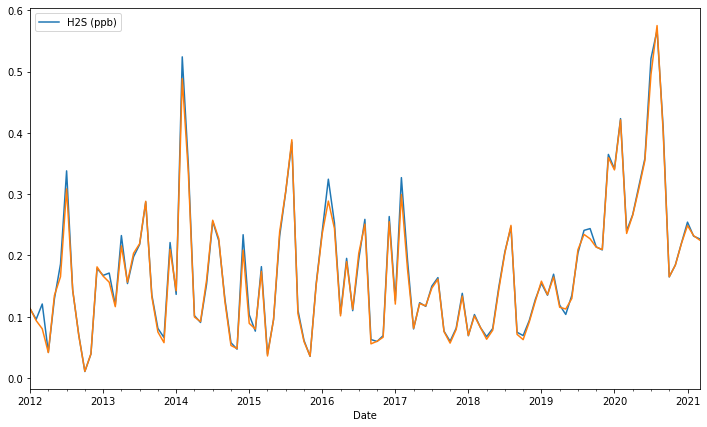

In [ ]:
A = 'M'
df1_w[aa].resample(A).mean().plot(legend = True,figsize = (12,7))
df1_w_c[aa].resample(A).mean().plot()


In [ ]:
print(len(df1_w_c)*100/len(df1_w))

95.95989961834057


[0]	validation_0-rmse:0.559057
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:0.541562
[2]	validation_0-rmse:0.526749
[3]	validation_0-rmse:0.514188
[4]	validation_0-rmse:0.50326
[5]	validation_0-rmse:0.494072
[6]	validation_0-rmse:0.486224
[7]	validation_0-rmse:0.479811
[8]	validation_0-rmse:0.474162
[9]	validation_0-rmse:0.469319
[10]	validation_0-rmse:0.465022
[11]	validation_0-rmse:0.461449
[12]	validation_0-rmse:0.458036
[13]	validation_0-rmse:0.455381
[14]	validation_0-rmse:0.453016
[15]	validation_0-rmse:0.450863
[16]	validation_0-rmse:0.448762
[17]	validation_0-rmse:0.446827
[18]	validation_0-rmse:0.44537
[19]	validation_0-rmse:0.44421
[20]	validation_0-rmse:0.443001
[21]	validation_0-rmse:0.441992
[22]	validation_0-rmse:0.441062
[23]	validation_0-rmse:0.440375
[24]	validation_0-rmse:0.439386
[25]	validation_0-rmse:0.438796
[26]	validation_0-rmse:0.438278
[27]	validation_0-rmse:0.43762
[28]	validation_0-rmse:0.43698
[29]	validation_0-rmse

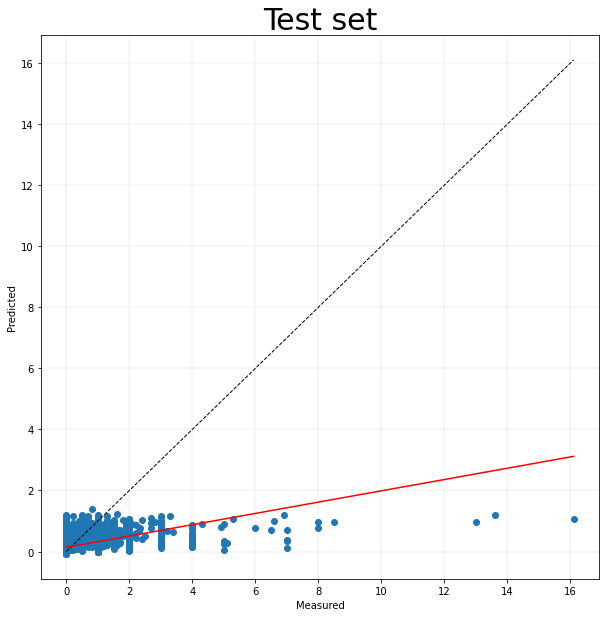

[0.18503372 0.13830892]
RMSE
[0.42334561]
R2
0.2083884014066042


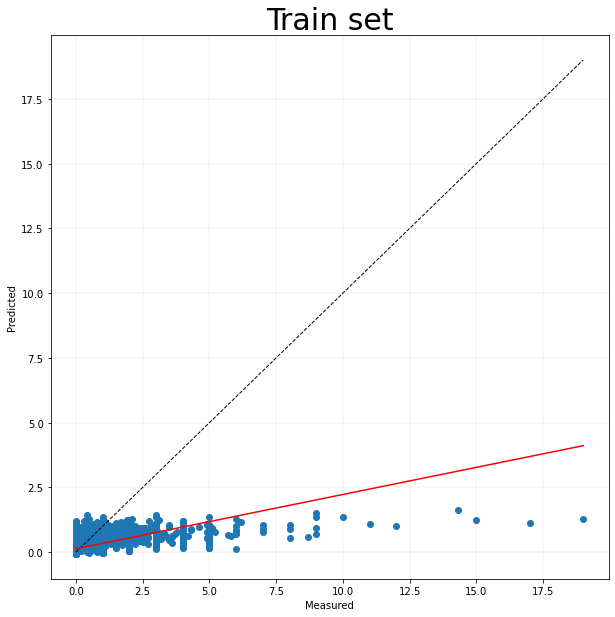

[0.20932108 0.13547685]
RMSE
[0.41256816]
R2
0.2525367805327604


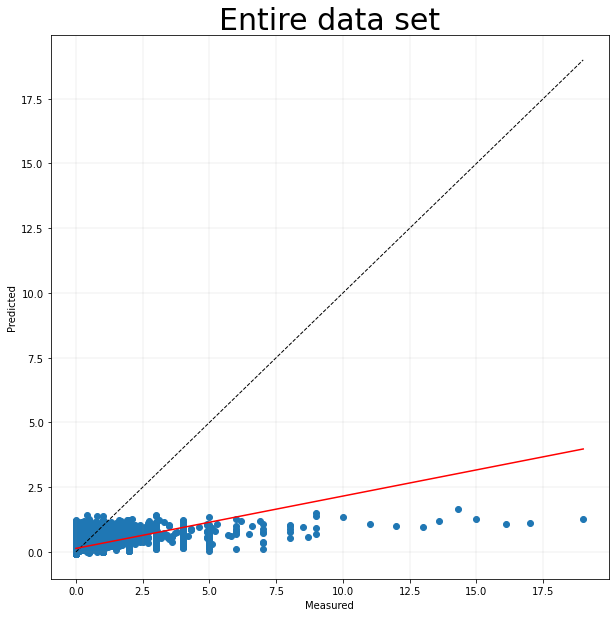

[0.20206448 0.13632256]
RMSE
[0.41583086]
R2
0.23934557774463028


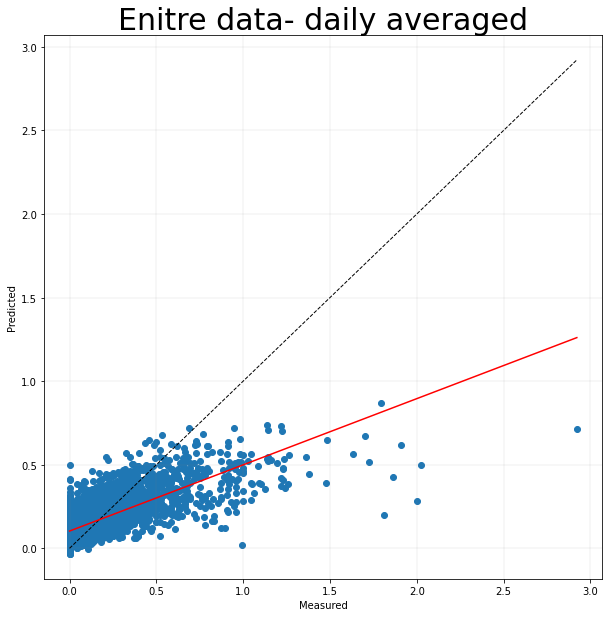

[0.3960374  0.10325295]
RMSE
[0.17777147]
R2
0.49487903708566583


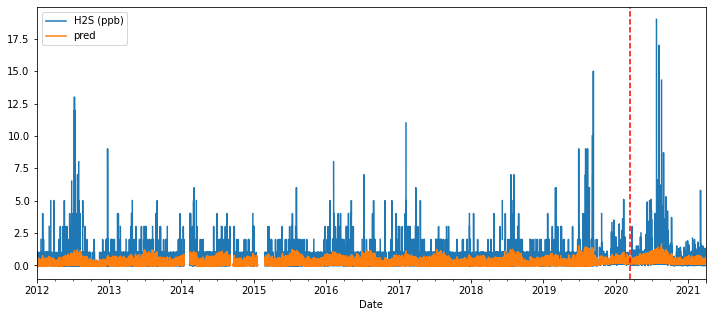

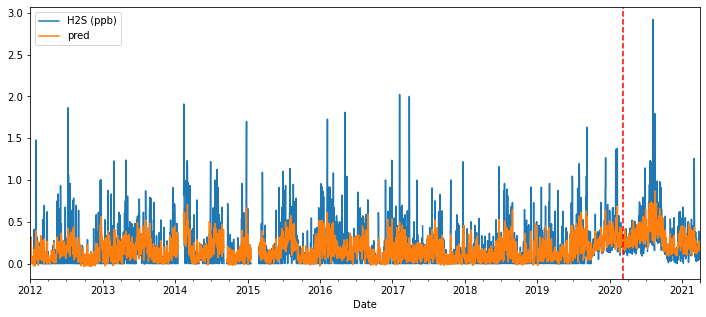

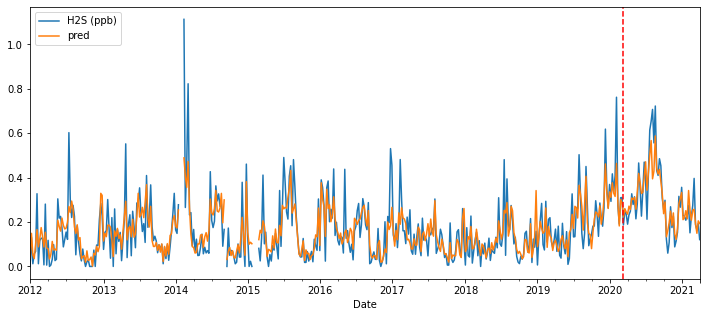

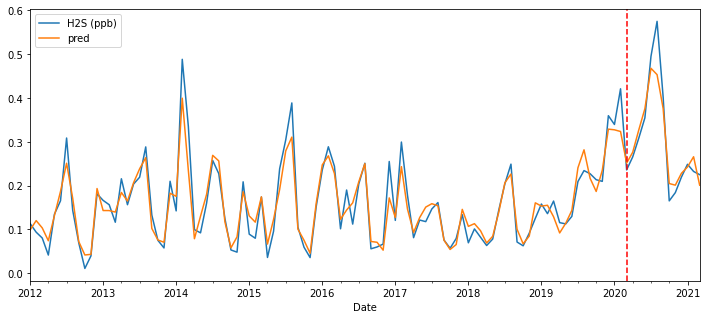

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy() #hereee
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10[aa]).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [  'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]
test_col = [aa]


df1_w_c = df1_w[[aa, 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
        ]]
Y = df1_w_c[ aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/H2S_Buffalo_Viewpoint_outlier_2012_brwRH_OT_XG_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/H2S_Buffalo_Viewpoint_outlier_2012_brwRH_OT_XG_Test.csv')


[0.41256816]
0.2525367805327604
[0.42334561]
0.2083884014066042


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
242
0.23196810483932495
2021-01-18 04:00:00
246
0.23685190081596375
2021-01-18 05:00:00
242
0.23527319729328156
2021-01-18 06:00:00
239
0.24808961153030396
2021-01-18 07:00:00
243
0.24374595284461975
2021-01-18 08:00:00
244
0.24390806257724762
2021-01-18 09:00:00
241
0.23809847235679626
2021-01-18 10:00:00
235
0.2412300705909729
2021-01-18 11:00:00
224
0.22835707664489746
2021-01-18 12:00:00
228
0.23866888880729675
2021-01-18 13:00:00
231
0.24936029314994812
2021-01-18 14:00:00
236
0.23697932064533234
2021-01-18 15:00:00
240
0.24275656044483185
2021-01-18 16:00:00
239
0.2384755164384842
2021-01-18 17:00:00
245
0.25545734167099
2021-01-18 18:00:00
244
0.2472354918718338
2021-01-18 20:00:00
245
0.25590798258781433
2021-01-18 22:00:00
244
0.2512107789516449
2021-01-18 23:00:00
241
0.2478637397289276
2021-01-19 00:00:00
245
0.22225165367126465
2021-01-19 01:00:00
242
0.22988200187683105
2021-01-19 02:00:00
244
0.22926421463489532
2021-01-1

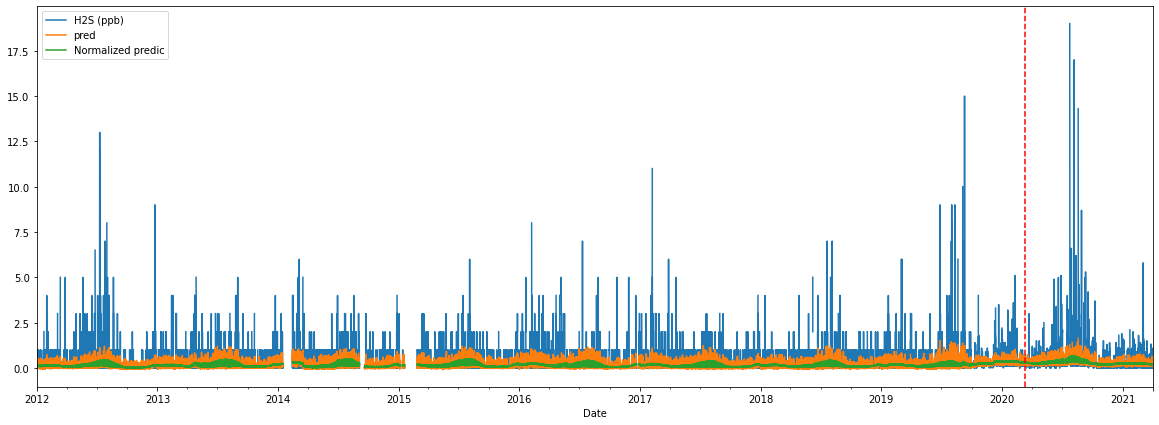

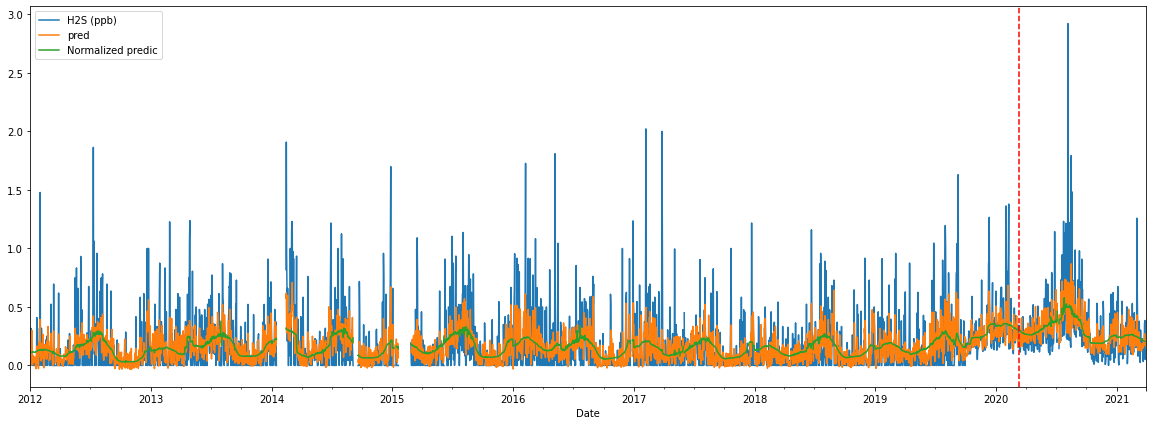

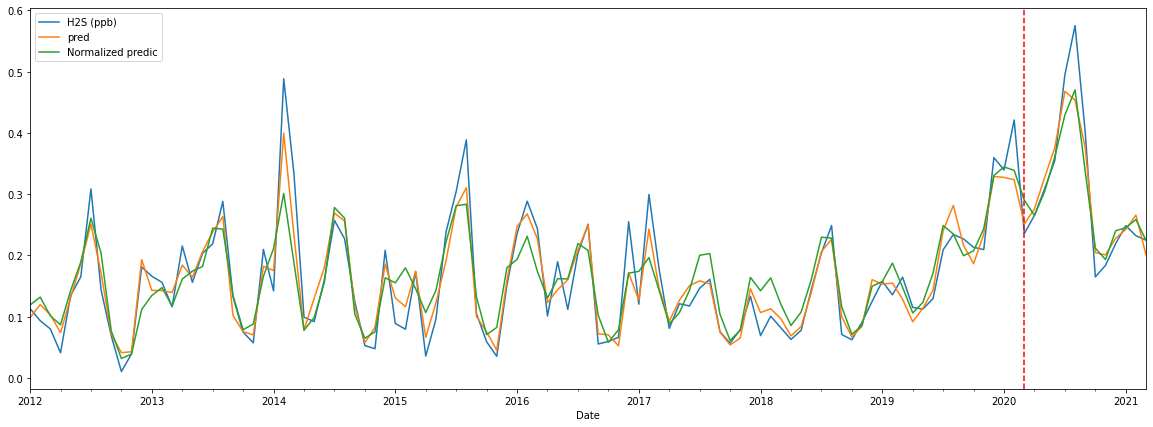

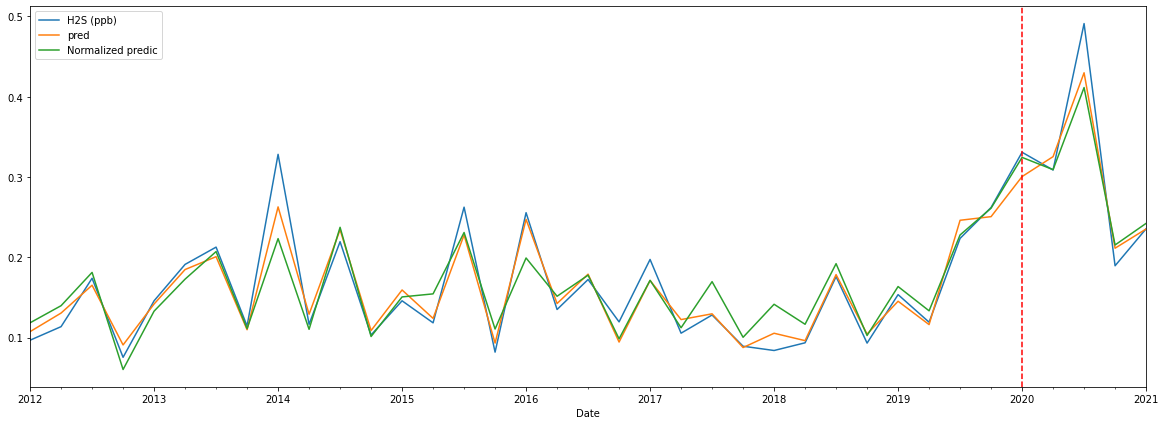

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_outlier_2012_H2S_brwRH_SO2_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_outlier_2012_H2S_brwlRH_SO2_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Buffalo Viewpoint_outlier_2012_H2S_brwRH_SO2_Monthly_normalized_pred.csv')

for i in ['H','D','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
######################### DOne

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.625974207053899 4.932642911103422


In [ ]:
df1_w

H2S (ppb)  Humidity Inst. (%)  ...      trend      score
Date                                                ...                      
2012-01-01 00:00:00        0.0                77.9  ...  12.000000   8.250000
2012-01-01 01:00:00        0.0                78.4  ...  12.000114   3.030220
2012-01-01 02:00:00        0.0                78.0  ...  12.000228  47.715909
2012-01-01 03:00:00        0.0                78.0  ...  12.000342  20.179825
2012-01-01 04:00:00        0.0                77.1  ...  12.000455  10.991071
...                        ...                 ...  ...        ...        ...
2021-03-31 19:00:00        0.1                49.0  ...  21.245332   5.162179
2021-03-31 20:00:00        0.3                55.0  ...  21.245446   4.265326
2021-03-31 21:00:00        0.3                59.0  ...  21.245560   4.050000
2021-03-31 22:00:00        0.2                57.0  ...  21.245674   2.098214
2021-03-31 23:00:00        0.2                56.0  ...  21.245788   1.608333

[76508 rows x 15 columns]

In [ ]:
df1_w

H2S (ppb)  Humidity Inst. (%)  ...      trend      score
Date                                                ...                      
2012-01-01 00:00:00        0.0                77.9  ...  12.000000   8.250000
2012-01-01 01:00:00        0.0                78.4  ...  12.000114   3.030220
2012-01-01 02:00:00        0.0                78.0  ...  12.000228  47.715909
2012-01-01 03:00:00        0.0                78.0  ...  12.000342  20.179825
2012-01-01 04:00:00        0.0                77.1  ...  12.000455  10.991071
...                        ...                 ...  ...        ...        ...
2021-03-31 19:00:00        0.1                49.0  ...  21.245332   5.162179
2021-03-31 20:00:00        0.3                55.0  ...  21.245446   4.265326
2021-03-31 21:00:00        0.3                59.0  ...  21.245560   4.050000
2021-03-31 22:00:00        0.2                57.0  ...  21.245674   2.098214
2021-03-31 23:00:00        0.2                56.0  ...  21.245788   1.608333

[76508 rows x 15 columns]

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1

    def __call__(self, trial):        
        dict_params = {
                        "score" : trial.suggest_float( 'score', avg + 2*std, avg + 5 * std ),
                        'layers': trial.suggest_int('layers', 2,3),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                        'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 20,40),
                        'delta': trial.suggest_float(  'delta',1, 100),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 20,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.5)

        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.5)


        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn[aa]
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array( self.df_nn[  self.df_nn.columns[1:]])
        self.X_train =self.X
        self.y_train =self.Y
        # self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

          
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha= dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss=
                      # 'mse',
                      tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/Buffalo__Viewpoint_outlier_2015_realRH_SO2" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 4
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 

        print(acc)
        return acc    

In [ ]:
objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
study = optuna.create_study(direction=optimizer_direction, study_name='Buffalo_H2S__Viewpoint_outlier_2015_realRH_sc1__NN', storage='sqlite:///Buffalo_Viewpoint_outlier_2015_realRH__sc1__NN.db',
                            load_if_exists=True)
study.optimize(objective, n_trials=200)
df_results = study.trials_dataframe()
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_H2S_OT_BuffaloViewpoint_outlier_2015_realRH_HUBer.csv')
#df_results.to_pickle('Desktop\heel\df_optuna_results.pkl')

[I 2021-06-07 04:04:06,138] A new study created in RDB with name: Buffalo_H2S__Viewpoint_outlier_2015_realRH_sc1__NN
[I 2021-06-07 04:05:20,211] Trial 0 finished with value: 0.18062951209619013 and parameters: {'score': 26.326964281042756, 'layers': 3, 'alpha': 0.15541794990698343, 'batchsize': 1600.0, 'num_dense_nodes1': 39, 'delta': 77.29980732087324, 'learning_rate': 0.008899078157163464, 'drop_out1': 0.060715851450425226, 'num_dense_nodes2': 35, 'drop_out2': 0.05001428302871411, 'num_dense_nodes3': 14, 'drop_out3': 0.2828993273135947}. Best is trial 0 with value: 0.18062951209619013.


0.18062951209619013


[I 2021-06-07 04:06:53,381] Trial 1 finished with value: 0.24490196130627734 and parameters: {'score': 28.95171257597882, 'layers': 2, 'alpha': 0.027558413865392817, 'batchsize': 1100.0, 'num_dense_nodes1': 38, 'delta': 92.64248141094743, 'learning_rate': 0.07657969431674518, 'drop_out1': 0.1349385573460649, 'num_dense_nodes2': 27, 'drop_out2': 0.15693377430981023}. Best is trial 0 with value: 0.18062951209619013.


0.24490196130627734


[I 2021-06-07 04:09:26,003] Trial 2 finished with value: 0.21692641169585503 and parameters: {'score': 18.89021789982875, 'layers': 2, 'alpha': 0.5678206923378608, 'batchsize': 600.0, 'num_dense_nodes1': 23, 'delta': 15.007040999605831, 'learning_rate': 0.04279535597045558, 'drop_out1': 0.1476283240121961, 'num_dense_nodes2': 24, 'drop_out2': 0.4885105847155189}. Best is trial 0 with value: 0.18062951209619013.


0.21692641169585503


[I 2021-06-07 04:10:06,332] Trial 3 finished with value: 0.21994636719553673 and parameters: {'score': 20.756981679072332, 'layers': 3, 'alpha': 0.456436205718367, 'batchsize': 4600.0, 'num_dense_nodes1': 20, 'delta': 42.68952839753901, 'learning_rate': 0.06577151423062376, 'drop_out1': 0.0920061808981655, 'num_dense_nodes2': 33, 'drop_out2': 0.24573843155015596, 'num_dense_nodes3': 5, 'drop_out3': 0.4575651176824316}. Best is trial 0 with value: 0.18062951209619013.


0.21994636719553673


[I 2021-06-07 04:10:57,894] Trial 4 finished with value: 0.2197347874904214 and parameters: {'score': 19.833784792078546, 'layers': 2, 'alpha': 0.6412958245407757, 'batchsize': 2600.0, 'num_dense_nodes1': 32, 'delta': 82.67803876424986, 'learning_rate': 0.045997404022743174, 'drop_out1': 0.14853839290773424, 'num_dense_nodes2': 24, 'drop_out2': 0.46701495089775724}. Best is trial 0 with value: 0.18062951209619013.


0.2197347874904214


[I 2021-06-07 04:12:10,799] Trial 5 finished with value: 0.22017529676963926 and parameters: {'score': 25.690868655102243, 'layers': 3, 'alpha': 0.021773405150008446, 'batchsize': 1600.0, 'num_dense_nodes1': 29, 'delta': 44.47252570886815, 'learning_rate': 0.06983627024979108, 'drop_out1': 0.2785303259462019, 'num_dense_nodes2': 20, 'drop_out2': 0.16801814507138085, 'num_dense_nodes3': 5, 'drop_out3': 0.08946704927608293}. Best is trial 0 with value: 0.18062951209619013.


0.22017529676963926


[I 2021-06-07 04:13:11,421] Trial 6 finished with value: 0.2121157257759546 and parameters: {'score': 17.975176791543248, 'layers': 3, 'alpha': 0.11065141856706392, 'batchsize': 2100.0, 'num_dense_nodes1': 24, 'delta': 1.058534044203415, 'learning_rate': 0.08864910578187271, 'drop_out1': 0.2842884094651273, 'num_dense_nodes2': 22, 'drop_out2': 0.0901199977018283, 'num_dense_nodes3': 32, 'drop_out3': 0.3260395051583072}. Best is trial 0 with value: 0.18062951209619013.


0.2121157257759546


[I 2021-06-07 04:13:52,457] Trial 7 finished with value: 0.20581064927301063 and parameters: {'score': 16.93171954886366, 'layers': 2, 'alpha': 0.35666457854855416, 'batchsize': 3600.0, 'num_dense_nodes1': 33, 'delta': 38.637837525653204, 'learning_rate': 0.07750990298112034, 'drop_out1': 0.06365885873957326, 'num_dense_nodes2': 31, 'drop_out2': 0.4272556056548299}. Best is trial 0 with value: 0.18062951209619013.


0.20581064927301063


[I 2021-06-07 04:15:24,117] Trial 8 finished with value: 0.21536000610042252 and parameters: {'score': 27.62173108281955, 'layers': 2, 'alpha': 0.3843888145017577, 'batchsize': 1100.0, 'num_dense_nodes1': 27, 'delta': 54.39778097373096, 'learning_rate': 0.030716947655646382, 'drop_out1': 0.18838999252774075, 'num_dense_nodes2': 36, 'drop_out2': 0.49744254419138556}. Best is trial 0 with value: 0.18062951209619013.


0.21536000610042252


[I 2021-06-07 04:16:07,251] Trial 9 finished with value: 0.22586194371471885 and parameters: {'score': 25.046709528241507, 'layers': 3, 'alpha': 0.5403298124084438, 'batchsize': 3600.0, 'num_dense_nodes1': 26, 'delta': 40.68367355980159, 'learning_rate': 0.06406693868569638, 'drop_out1': 0.27309390012258233, 'num_dense_nodes2': 33, 'drop_out2': 0.39828883479995514, 'num_dense_nodes3': 21, 'drop_out3': 0.3631232157832056}. Best is trial 0 with value: 0.18062951209619013.


0.22586194371471885


[I 2021-06-07 04:30:34,532] Trial 10 finished with value: 0.2244407704827488 and parameters: {'score': 22.873826421825406, 'layers': 3, 'alpha': 0.8234332706507498, 'batchsize': 100.0, 'num_dense_nodes1': 40, 'delta': 70.87614034075122, 'learning_rate': 0.003923298289412687, 'drop_out1': 0.2120388101716081, 'num_dense_nodes2': 40, 'drop_out2': 0.051030842736817086, 'num_dense_nodes3': 18, 'drop_out3': 0.1382208706013082}. Best is trial 0 with value: 0.18062951209619013.


0.2244407704827488


[I 2021-06-07 04:31:23,947] Trial 11 finished with value: 0.20514201011843916 and parameters: {'score': 15.932744908277341, 'layers': 2, 'alpha': 0.26028086408067197, 'batchsize': 3100.0, 'num_dense_nodes1': 35, 'delta': 19.337230320669832, 'learning_rate': 0.0026246818862364187, 'drop_out1': 0.06262824209555036, 'num_dense_nodes2': 30, 'drop_out2': 0.3530896087592136}. Best is trial 0 with value: 0.18062951209619013.


0.20514201011843916


[I 2021-06-07 04:32:10,768] Trial 12 finished with value: 0.203160517187767 and parameters: {'score': 30.06766278160394, 'layers': 2, 'alpha': 0.1852508014458793, 'batchsize': 3100.0, 'num_dense_nodes1': 36, 'delta': 19.747987913121083, 'learning_rate': 0.006129593706634842, 'drop_out1': 0.0586731666358113, 'num_dense_nodes2': 38, 'drop_out2': 0.32445405938503097}. Best is trial 0 with value: 0.18062951209619013.


0.203160517187767


[I 2021-06-07 04:32:51,030] Trial 13 finished with value: 0.20950221518696382 and parameters: {'score': 30.28024197806615, 'layers': 3, 'alpha': 0.19175152333972387, 'batchsize': 4600.0, 'num_dense_nodes1': 37, 'delta': 65.54387313521642, 'learning_rate': 0.018141634541988735, 'drop_out1': 0.09914720473065644, 'num_dense_nodes2': 40, 'drop_out2': 0.29845509916494967, 'num_dense_nodes3': 12, 'drop_out3': 0.2193602142303859}. Best is trial 0 with value: 0.18062951209619013.


0.20950221518696382


[I 2021-06-07 04:33:51,980] Trial 14 finished with value: 0.19713204564204584 and parameters: {'score': 27.09383573192198, 'layers': 3, 'alpha': 0.2220429213980192, 'batchsize': 2100.0, 'num_dense_nodes1': 39, 'delta': 96.44619940756967, 'learning_rate': 0.016146500468714797, 'drop_out1': 0.057363551667516714, 'num_dense_nodes2': 37, 'drop_out2': 0.27094200930858087, 'num_dense_nodes3': 33, 'drop_out3': 0.23459624729281756}. Best is trial 0 with value: 0.18062951209619013.


0.19713204564204584


[I 2021-06-07 04:34:53,128] Trial 15 finished with value: 0.20510312523102078 and parameters: {'score': 26.292040591068623, 'layers': 3, 'alpha': 0.2959962326506187, 'batchsize': 2100.0, 'num_dense_nodes1': 39, 'delta': 99.45932418290866, 'learning_rate': 0.022584542519053286, 'drop_out1': 0.09128796927617407, 'num_dense_nodes2': 36, 'drop_out2': 0.25337140562437377, 'num_dense_nodes3': 38, 'drop_out3': 0.22835644076533354}. Best is trial 0 with value: 0.18062951209619013.


0.20510312523102078


[I 2021-06-07 04:36:06,019] Trial 16 finished with value: 0.1936386495582153 and parameters: {'score': 23.39398126238696, 'layers': 3, 'alpha': 0.11667301673424368, 'batchsize': 1600.0, 'num_dense_nodes1': 40, 'delta': 84.51757152396733, 'learning_rate': 0.015459077554662777, 'drop_out1': 0.05021214531163383, 'num_dense_nodes2': 35, 'drop_out2': 0.19680399528417875, 'num_dense_nodes3': 30, 'drop_out3': 0.26572737078447234}. Best is trial 0 with value: 0.18062951209619013.


0.1936386495582153


[I 2021-06-07 04:50:31,137] Trial 17 finished with value: 0.2158690478011019 and parameters: {'score': 23.493780191409982, 'layers': 3, 'alpha': 0.08084557966907058, 'batchsize': 100.0, 'num_dense_nodes1': 34, 'delta': 80.22456306540248, 'learning_rate': 0.030517127416950736, 'drop_out1': 0.23263750916013182, 'num_dense_nodes2': 34, 'drop_out2': 0.15381676111876036, 'num_dense_nodes3': 28, 'drop_out3': 0.3904286996365333}. Best is trial 0 with value: 0.18062951209619013.


0.2158690478011019


[I 2021-06-07 04:52:08,303] Trial 18 finished with value: 0.22289283807505988 and parameters: {'score': 22.668609119795686, 'layers': 3, 'alpha': 0.09986717454902297, 'batchsize': 1100.0, 'num_dense_nodes1': 40, 'delta': 84.64108488810628, 'learning_rate': 0.03578469233534695, 'drop_out1': 0.11047763730781389, 'num_dense_nodes2': 28, 'drop_out2': 0.09684259216497962, 'num_dense_nodes3': 13, 'drop_out3': 0.2897685796927235}. Best is trial 0 with value: 0.18062951209619013.


0.22289283807505988


[I 2021-06-07 04:53:23,595] Trial 19 finished with value: 0.22838752984001343 and parameters: {'score': 24.350095804997892, 'layers': 3, 'alpha': 0.8489983317832746, 'batchsize': 1600.0, 'num_dense_nodes1': 31, 'delta': 64.28312409867654, 'learning_rate': 0.011413052746633776, 'drop_out1': 0.11694963328384086, 'num_dense_nodes2': 39, 'drop_out2': 0.1925794891973021, 'num_dense_nodes3': 26, 'drop_out3': 0.16749220227257883}. Best is trial 0 with value: 0.18062951209619013.


0.22838752984001343


[I 2021-06-07 04:56:05,906] Trial 20 finished with value: 0.2234891027717468 and parameters: {'score': 21.068938566514746, 'layers': 3, 'alpha': 0.1485674632655237, 'batchsize': 600.0, 'num_dense_nodes1': 36, 'delta': 74.83739275803403, 'learning_rate': 0.05321645880196154, 'drop_out1': 0.05029677755771248, 'num_dense_nodes2': 35, 'drop_out2': 0.06685009307640011, 'num_dense_nodes3': 14, 'drop_out3': 0.40557002254976826}. Best is trial 0 with value: 0.18062951209619013.


0.2234891027717468


[I 2021-06-07 04:57:19,880] Trial 21 finished with value: 0.21731458068178566 and parameters: {'score': 27.37145774029353, 'layers': 3, 'alpha': 0.2463578709791212, 'batchsize': 1600.0, 'num_dense_nodes1': 40, 'delta': 99.72703641345016, 'learning_rate': 0.017623064709467933, 'drop_out1': 0.07799299840057859, 'num_dense_nodes2': 37, 'drop_out2': 0.20993373257037895, 'num_dense_nodes3': 37, 'drop_out3': 0.25200173890127453}. Best is trial 0 with value: 0.18062951209619013.


0.21731458068178566


[I 2021-06-07 04:58:13,616] Trial 22 finished with value: 0.20122988575324302 and parameters: {'score': 27.465861589279783, 'layers': 3, 'alpha': 0.016274275349176803, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'delta': 92.35154265723635, 'learning_rate': 0.01164653208480669, 'drop_out1': 0.05159212052673662, 'num_dense_nodes2': 33, 'drop_out2': 0.12218933495054758, 'num_dense_nodes3': 33, 'drop_out3': 0.30127046324296836}. Best is trial 0 with value: 0.18062951209619013.


0.20122988575324302


[I 2021-06-07 04:59:14,148] Trial 23 finished with value: 0.20738402689092889 and parameters: {'score': 28.531840769778373, 'layers': 3, 'alpha': 0.3320933432068691, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 92.29258237821477, 'learning_rate': 0.02390204686361927, 'drop_out1': 0.08152710414666642, 'num_dense_nodes2': 38, 'drop_out2': 0.2835091351662796, 'num_dense_nodes3': 31, 'drop_out3': 0.196328840554154}. Best is trial 0 with value: 0.18062951209619013.


0.20738402689092889


[I 2021-06-07 05:00:29,316] Trial 24 finished with value: 0.19804970721295007 and parameters: {'score': 26.33815286282611, 'layers': 3, 'alpha': 0.21010072306566213, 'batchsize': 1600.0, 'num_dense_nodes1': 38, 'delta': 58.24188895512058, 'learning_rate': 0.0012918414609117482, 'drop_out1': 0.05032715174425785, 'num_dense_nodes2': 32, 'drop_out2': 0.22522983975591662, 'num_dense_nodes3': 25, 'drop_out3': 0.2656994062336665}. Best is trial 0 with value: 0.18062951209619013.


0.19804970721295007


[I 2021-06-07 05:01:23,941] Trial 25 finished with value: 0.21588664441209668 and parameters: {'score': 24.67916360726352, 'layers': 3, 'alpha': 0.40552793137372734, 'batchsize': 2600.0, 'num_dense_nodes1': 36, 'delta': 88.42555115797848, 'learning_rate': 0.009760186525382943, 'drop_out1': 0.12468060515512946, 'num_dense_nodes2': 35, 'drop_out2': 0.3555189865983641, 'num_dense_nodes3': 35, 'drop_out3': 0.3313118855727061}. Best is trial 0 with value: 0.18062951209619013.


0.21588664441209668


[I 2021-06-07 05:04:06,075] Trial 26 finished with value: 0.19714406332678885 and parameters: {'score': 23.55544113968306, 'layers': 3, 'alpha': 0.07209857936833314, 'batchsize': 600.0, 'num_dense_nodes1': 34, 'delta': 72.55893422853686, 'learning_rate': 0.017372186890808883, 'drop_out1': 0.07432413490563083, 'num_dense_nodes2': 37, 'drop_out2': 0.2735036838573627, 'num_dense_nodes3': 30, 'drop_out3': 0.1611014367120256}. Best is trial 0 with value: 0.18062951209619013.


0.19714406332678885


[I 2021-06-07 05:05:07,570] Trial 27 finished with value: 0.20496972944385938 and parameters: {'score': 22.204034636299426, 'layers': 3, 'alpha': 0.15434488773283067, 'batchsize': 2100.0, 'num_dense_nodes1': 38, 'delta': 99.5181114614503, 'learning_rate': 0.03011141518343015, 'drop_out1': 0.1699495417877648, 'num_dense_nodes2': 28, 'drop_out2': 0.32088266528258824, 'num_dense_nodes3': 40, 'drop_out3': 0.25790395112891606}. Best is trial 0 with value: 0.18062951209619013.


0.20496972944385938


[I 2021-06-07 05:06:45,073] Trial 28 finished with value: 0.21864134721757955 and parameters: {'score': 28.934346803638743, 'layers': 3, 'alpha': 0.2812859462979161, 'batchsize': 1100.0, 'num_dense_nodes1': 40, 'delta': 78.70639650532202, 'learning_rate': 0.04087337324921811, 'drop_out1': 0.10661568034355036, 'num_dense_nodes2': 35, 'drop_out2': 0.19223220565919663, 'num_dense_nodes3': 20, 'drop_out3': 0.0677702576724517}. Best is trial 0 with value: 0.18062951209619013.


0.21864134721757955


[I 2021-06-07 05:07:58,608] Trial 29 finished with value: 0.1975003146746688 and parameters: {'score': 26.189225918934092, 'layers': 3, 'alpha': 0.01957869196530329, 'batchsize': 1600.0, 'num_dense_nodes1': 38, 'delta': 94.70099316726672, 'learning_rate': 0.054554677201351987, 'drop_out1': 0.13646058129988656, 'num_dense_nodes2': 39, 'drop_out2': 0.13409411359679763, 'num_dense_nodes3': 9, 'drop_out3': 0.20779835819635478}. Best is trial 0 with value: 0.18062951209619013.


0.1975003146746688


[I 2021-06-07 05:08:55,608] Trial 30 finished with value: 0.19715941291717173 and parameters: {'score': 28.185106887773916, 'layers': 3, 'alpha': 0.13454668666848255, 'batchsize': 3100.0, 'num_dense_nodes1': 29, 'delta': 87.12047882359835, 'learning_rate': 0.02458278083914289, 'drop_out1': 0.07544605824971515, 'num_dense_nodes2': 31, 'drop_out2': 0.2405145115309696, 'num_dense_nodes3': 25, 'drop_out3': 0.3134676960677035}. Best is trial 0 with value: 0.18062951209619013.


0.19715941291717173


[I 2021-06-07 05:11:37,363] Trial 31 finished with value: 0.21089617827344903 and parameters: {'score': 23.908493916481316, 'layers': 3, 'alpha': 0.07186508424173772, 'batchsize': 600.0, 'num_dense_nodes1': 35, 'delta': 73.94145134730176, 'learning_rate': 0.013634850440654381, 'drop_out1': 0.07149259403714206, 'num_dense_nodes2': 37, 'drop_out2': 0.26662987760680634, 'num_dense_nodes3': 30, 'drop_out3': 0.15732825343612528}. Best is trial 0 with value: 0.18062951209619013.


0.21089617827344903


[I 2021-06-07 05:14:21,239] Trial 32 finished with value: 0.216062963723868 and parameters: {'score': 25.454492610391128, 'layers': 3, 'alpha': 0.06570182142515577, 'batchsize': 600.0, 'num_dense_nodes1': 33, 'delta': 68.74176656712328, 'learning_rate': 0.018171562348048335, 'drop_out1': 0.05073713517658471, 'num_dense_nodes2': 37, 'drop_out2': 0.29371283044610574, 'num_dense_nodes3': 35, 'drop_out3': 0.13032084751559847}. Best is trial 0 with value: 0.18062951209619013.


0.216062963723868


[I 2021-06-07 05:16:16,439] Trial 33 finished with value: 0.19875528994494665 and parameters: {'score': 21.616478982103313, 'layers': 3, 'alpha': 0.21930132229341606, 'batchsize': 1100.0, 'num_dense_nodes1': 37, 'delta': 62.577819803944486, 'learning_rate': 0.00655248590868839, 'drop_out1': 0.08867427743024478, 'num_dense_nodes2': 34, 'drop_out2': 0.3605225435387333, 'num_dense_nodes3': 29, 'drop_out3': 0.18285696573801655}. Best is trial 0 with value: 0.18062951209619013.


0.19875528994494665


[I 2021-06-07 05:17:53,337] Trial 34 finished with value: 0.21602381295012843 and parameters: {'score': 23.788722570523245, 'layers': 3, 'alpha': 0.4735302502974029, 'batchsize': 1100.0, 'num_dense_nodes1': 39, 'delta': 77.21853160529206, 'learning_rate': 0.03552324982735621, 'drop_out1': 0.06858666577817146, 'num_dense_nodes2': 38, 'drop_out2': 0.3206678482792621, 'num_dense_nodes3': 27, 'drop_out3': 0.24428293550095814}. Best is trial 0 with value: 0.18062951209619013.


0.21602381295012843


[I 2021-06-07 05:32:12,706] Trial 35 finished with value: 0.22165383034368102 and parameters: {'score': 19.965045241162112, 'layers': 3, 'alpha': 0.056236928315038515, 'batchsize': 100.0, 'num_dense_nodes1': 32, 'delta': 84.39523541434461, 'learning_rate': 0.016045852786665572, 'drop_out1': 0.09340774738743851, 'num_dense_nodes2': 36, 'drop_out2': 0.22614559838066614, 'num_dense_nodes3': 34, 'drop_out3': 0.11512975590164448}. Best is trial 0 with value: 0.18062951209619013.


0.22165383034368102


[I 2021-06-07 05:33:15,030] Trial 36 finished with value: 0.2141036270375074 and parameters: {'score': 26.74703241990397, 'layers': 3, 'alpha': 0.1556083711205587, 'batchsize': 2100.0, 'num_dense_nodes1': 20, 'delta': 48.65073012170179, 'learning_rate': 0.02308300672640867, 'drop_out1': 0.1337408543035633, 'num_dense_nodes2': 40, 'drop_out2': 0.2679849075186271, 'num_dense_nodes3': 17, 'drop_out3': 0.26669779152691303}. Best is trial 0 with value: 0.18062951209619013.


0.2141036270375074


[I 2021-06-07 05:34:28,994] Trial 37 finished with value: 0.1997990991868665 and parameters: {'score': 29.645649080779624, 'layers': 3, 'alpha': 0.025077654216154988, 'batchsize': 1600.0, 'num_dense_nodes1': 34, 'delta': 95.64511639228456, 'learning_rate': 0.0012226027843296808, 'drop_out1': 0.1581345865412284, 'num_dense_nodes2': 34, 'drop_out2': 0.18015443774234807, 'num_dense_nodes3': 23, 'drop_out3': 0.3608781296349107}. Best is trial 0 with value: 0.18062951209619013.


0.1997990991868665


[I 2021-06-07 05:35:23,537] Trial 38 finished with value: 0.2150484727380606 and parameters: {'score': 24.998488486306258, 'layers': 3, 'alpha': 0.32484737548833614, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 89.93192234316875, 'learning_rate': 0.00913268101234306, 'drop_out1': 0.06011791276984618, 'num_dense_nodes2': 32, 'drop_out2': 0.14816340902526687, 'num_dense_nodes3': 40, 'drop_out3': 0.21323764912729665}. Best is trial 0 with value: 0.18062951209619013.


0.2150484727380606


[I 2021-06-07 05:37:55,209] Trial 39 finished with value: 0.22579579173236483 and parameters: {'score': 23.26742995131492, 'layers': 2, 'alpha': 0.7434765100356657, 'batchsize': 600.0, 'num_dense_nodes1': 30, 'delta': 82.69778508311178, 'learning_rate': 0.09789892256931357, 'drop_out1': 0.07428296219719274, 'num_dense_nodes2': 39, 'drop_out2': 0.20916040430945923}. Best is trial 0 with value: 0.18062951209619013.


0.22579579173236483


[I 2021-06-07 05:38:57,455] Trial 40 finished with value: 0.2203680760430174 and parameters: {'score': 22.162191219265583, 'layers': 3, 'alpha': 0.1106181374742746, 'batchsize': 2100.0, 'num_dense_nodes1': 37, 'delta': 69.86075861334385, 'learning_rate': 0.02651166876112171, 'drop_out1': 0.10675278821612463, 'num_dense_nodes2': 36, 'drop_out2': 0.4302463204814198, 'num_dense_nodes3': 37, 'drop_out3': 0.4921567504244878}. Best is trial 0 with value: 0.18062951209619013.


0.2203680760430174


[I 2021-06-07 05:39:46,291] Trial 41 finished with value: 0.22132947640573047 and parameters: {'score': 27.950381551332026, 'layers': 3, 'alpha': 0.13057792021119094, 'batchsize': 3100.0, 'num_dense_nodes1': 28, 'delta': 86.84943662493687, 'learning_rate': 0.021189727401635886, 'drop_out1': 0.08082869472188275, 'num_dense_nodes2': 26, 'drop_out2': 0.2419813532061605, 'num_dense_nodes3': 24, 'drop_out3': 0.31317566034177674}. Best is trial 0 with value: 0.18062951209619013.


0.22132947640573047


[I 2021-06-07 05:40:35,384] Trial 42 finished with value: 0.2255629348488537 and parameters: {'score': 28.11582386234621, 'layers': 3, 'alpha': 0.23251811154550564, 'batchsize': 3100.0, 'num_dense_nodes1': 25, 'delta': 80.17704013379083, 'learning_rate': 0.03543045948751428, 'drop_out1': 0.06788889249177932, 'num_dense_nodes2': 30, 'drop_out2': 0.24001110411985555, 'num_dense_nodes3': 30, 'drop_out3': 0.2776962684753537}. Best is trial 0 with value: 0.18062951209619013.


0.2255629348488537


[I 2021-06-07 05:41:19,754] Trial 43 finished with value: 0.22009643198998946 and parameters: {'score': 29.265516852918125, 'layers': 3, 'alpha': 0.16307075895350195, 'batchsize': 4100.0, 'num_dense_nodes1': 28, 'delta': 87.38316245242183, 'learning_rate': 0.015699235454142577, 'drop_out1': 0.05212332420545784, 'num_dense_nodes2': 32, 'drop_out2': 0.2671856979396896, 'num_dense_nodes3': 28, 'drop_out3': 0.3347958878803407}. Best is trial 0 with value: 0.18062951209619013.


0.22009643198998946


[I 2021-06-07 05:42:13,255] Trial 44 finished with value: 0.2071916000581907 and parameters: {'score': 27.00429167168466, 'layers': 3, 'alpha': 0.11587839147015865, 'batchsize': 2600.0, 'num_dense_nodes1': 29, 'delta': 34.80263979523762, 'learning_rate': 0.04686471197427773, 'drop_out1': 0.08450911878996271, 'num_dense_nodes2': 31, 'drop_out2': 0.30319659472417315, 'num_dense_nodes3': 5, 'drop_out3': 0.36500047471189745}. Best is trial 0 with value: 0.18062951209619013.


0.2071916000581907


[I 2021-06-07 05:42:57,290] Trial 45 finished with value: 0.21363162452650133 and parameters: {'score': 25.663997603049072, 'layers': 3, 'alpha': 0.18868189909693037, 'batchsize': 3600.0, 'num_dense_nodes1': 32, 'delta': 72.66880432561119, 'learning_rate': 0.005485157716582584, 'drop_out1': 0.06236754811228872, 'num_dense_nodes2': 33, 'drop_out2': 0.21190225447278185, 'num_dense_nodes3': 32, 'drop_out3': 0.2964026379260124}. Best is trial 0 with value: 0.18062951209619013.


0.21363162452650133


[I 2021-06-07 05:44:11,286] Trial 46 finished with value: 0.2217861783807769 and parameters: {'score': 24.294192291656913, 'layers': 3, 'alpha': 0.050417535854536, 'batchsize': 1600.0, 'num_dense_nodes1': 26, 'delta': 96.41032688770838, 'learning_rate': 0.027804665978554827, 'drop_out1': 0.09742037095436287, 'num_dense_nodes2': 35, 'drop_out2': 0.37821229998577477, 'num_dense_nodes3': 21, 'drop_out3': 0.24316843784351394}. Best is trial 0 with value: 0.18062951209619013.


0.2217861783807769


[I 2021-06-07 05:44:55,462] Trial 47 finished with value: 0.2148662109354556 and parameters: {'score': 19.112996801026583, 'layers': 3, 'alpha': 0.2607890731160044, 'batchsize': 3600.0, 'num_dense_nodes1': 23, 'delta': 59.311099759197475, 'learning_rate': 0.02039570163838906, 'drop_out1': 0.2520841942649803, 'num_dense_nodes2': 29, 'drop_out2': 0.332623939741899, 'num_dense_nodes3': 25, 'drop_out3': 0.23162273512824375}. Best is trial 0 with value: 0.18062951209619013.


0.2148662109354556


[I 2021-06-07 05:45:38,964] Trial 48 finished with value: 0.21836091097403745 and parameters: {'score': 25.419393239495516, 'layers': 3, 'alpha': 0.11958128265732496, 'batchsize': 4100.0, 'num_dense_nodes1': 30, 'delta': 76.11318703885127, 'learning_rate': 0.012980147071816817, 'drop_out1': 0.2996703125811552, 'num_dense_nodes2': 26, 'drop_out2': 0.2510815690694484, 'num_dense_nodes3': 32, 'drop_out3': 0.33755567041685475}. Best is trial 0 with value: 0.18062951209619013.


0.21836091097403745


[I 2021-06-07 05:46:33,395] Trial 49 finished with value: 0.21181973664731527 and parameters: {'score': 28.671652659333006, 'layers': 3, 'alpha': 0.010985120571984142, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 67.4509174566037, 'learning_rate': 0.007585016357060855, 'drop_out1': 0.1962891523773278, 'num_dense_nodes2': 37, 'drop_out2': 0.1705843617081021, 'num_dense_nodes3': 19, 'drop_out3': 0.10347090932592354}. Best is trial 0 with value: 0.18062951209619013.


0.21181973664731527


[I 2021-06-07 05:47:33,128] Trial 50 finished with value: 0.2130664750188511 and parameters: {'score': 26.781771349094985, 'layers': 2, 'alpha': 0.09008016414448643, 'batchsize': 2100.0, 'num_dense_nodes1': 35, 'delta': 82.49327994294471, 'learning_rate': 0.025496162454512594, 'drop_out1': 0.06240837857950283, 'num_dense_nodes2': 31, 'drop_out2': 0.055367400586914715}. Best is trial 0 with value: 0.18062951209619013.


0.2130664750188511


[I 2021-06-07 05:48:46,316] Trial 51 finished with value: 0.2049499466548842 and parameters: {'score': 26.123964836137155, 'layers': 3, 'alpha': 0.010060839422161991, 'batchsize': 1600.0, 'num_dense_nodes1': 39, 'delta': 96.29248404324274, 'learning_rate': 0.056965530499172676, 'drop_out1': 0.14696852022441959, 'num_dense_nodes2': 38, 'drop_out2': 0.12497714121569073, 'num_dense_nodes3': 7, 'drop_out3': 0.20253504440047113}. Best is trial 0 with value: 0.18062951209619013.


0.2049499466548842


[I 2021-06-07 05:50:23,664] Trial 52 finished with value: 0.21868132161100012 and parameters: {'score': 28.08862651150018, 'layers': 3, 'alpha': 0.04774229512420019, 'batchsize': 1100.0, 'num_dense_nodes1': 37, 'delta': 91.89684989603242, 'learning_rate': 0.06313233282749478, 'drop_out1': 0.12167216945325646, 'num_dense_nodes2': 39, 'drop_out2': 0.08794179655086426, 'num_dense_nodes3': 9, 'drop_out3': 0.16497165730567176}. Best is trial 0 with value: 0.18062951209619013.


0.21868132161100012


[I 2021-06-07 05:51:37,148] Trial 53 finished with value: 0.2209554867026678 and parameters: {'score': 26.015233664125574, 'layers': 3, 'alpha': 0.18860552991949922, 'batchsize': 1600.0, 'num_dense_nodes1': 31, 'delta': 97.04102522738124, 'learning_rate': 0.07644243254484293, 'drop_out1': 0.07600655800212991, 'num_dense_nodes2': 40, 'drop_out2': 0.1363494605715842, 'num_dense_nodes3': 9, 'drop_out3': 0.18687964924370565}. Best is trial 0 with value: 0.18062951209619013.


0.2209554867026678


[I 2021-06-07 05:53:14,457] Trial 54 finished with value: 0.21492787987288284 and parameters: {'score': 27.216179056120964, 'layers': 3, 'alpha': 0.09237056198224633, 'batchsize': 1100.0, 'num_dense_nodes1': 36, 'delta': 86.5864212359794, 'learning_rate': 0.05065798032789528, 'drop_out1': 0.13219304517892996, 'num_dense_nodes2': 36, 'drop_out2': 0.10672226063817106, 'num_dense_nodes3': 10, 'drop_out3': 0.22207806609730044}. Best is trial 0 with value: 0.18062951209619013.


0.21492787987288284


[I 2021-06-07 05:54:14,895] Trial 55 finished with value: 0.22133606641528308 and parameters: {'score': 23.07522633320406, 'layers': 3, 'alpha': 0.5956976221085828, 'batchsize': 2100.0, 'num_dense_nodes1': 38, 'delta': 90.68303994794967, 'learning_rate': 0.0432694352422424, 'drop_out1': 0.10090771843578378, 'num_dense_nodes2': 38, 'drop_out2': 0.22790105612429198, 'num_dense_nodes3': 17, 'drop_out3': 0.28014455375147546}. Best is trial 0 with value: 0.18062951209619013.


0.22133606641528308


[I 2021-06-07 05:55:27,889] Trial 56 finished with value: 0.2222509484073467 and parameters: {'score': 24.845283111488587, 'layers': 3, 'alpha': 0.1456164719642801, 'batchsize': 1600.0, 'num_dense_nodes1': 40, 'delta': 94.96199853687843, 'learning_rate': 0.06961919294725413, 'drop_out1': 0.1462949612536885, 'num_dense_nodes2': 20, 'drop_out2': 0.28486784223730416, 'num_dense_nodes3': 15, 'drop_out3': 0.14804065449691514}. Best is trial 0 with value: 0.18062951209619013.


0.2222509484073467


[I 2021-06-07 05:56:16,961] Trial 57 finished with value: 0.22440114677655776 and parameters: {'score': 26.55900849548102, 'layers': 3, 'alpha': 0.17104935828798082, 'batchsize': 3100.0, 'num_dense_nodes1': 34, 'delta': 79.74973812001296, 'learning_rate': 0.06150987527271926, 'drop_out1': 0.05762222373075031, 'num_dense_nodes2': 34, 'drop_out2': 0.19421874779191914, 'num_dense_nodes3': 27, 'drop_out3': 0.31651635714657633}. Best is trial 0 with value: 0.18062951209619013.


0.22440114677655776


[I 2021-06-07 05:57:19,618] Trial 58 finished with value: 0.21746791732323964 and parameters: {'score': 27.69470117383705, 'layers': 3, 'alpha': 0.28569900507994483, 'batchsize': 2100.0, 'num_dense_nodes1': 38, 'delta': 1.7668640231285764, 'learning_rate': 0.03902354018634861, 'drop_out1': 0.08322091083223271, 'num_dense_nodes2': 39, 'drop_out2': 0.1585452871781529, 'num_dense_nodes3': 11, 'drop_out3': 0.23418683812465768}. Best is trial 0 with value: 0.18062951209619013.


0.21746791732323964


[I 2021-06-07 06:00:02,282] Trial 59 finished with value: 0.2247589494433646 and parameters: {'score': 24.20934672361935, 'layers': 3, 'alpha': 0.02876374497513401, 'batchsize': 600.0, 'num_dense_nodes1': 29, 'delta': 84.23101908206728, 'learning_rate': 0.05696080944126067, 'drop_out1': 0.1159320573674939, 'num_dense_nodes2': 37, 'drop_out2': 0.08022060390562322, 'num_dense_nodes3': 5, 'drop_out3': 0.1760217116507709}. Best is trial 0 with value: 0.18062951209619013.


0.2247589494433646


[I 2021-06-07 06:00:57,131] Trial 60 finished with value: 0.21867842425123557 and parameters: {'score': 29.743512943287147, 'layers': 3, 'alpha': 0.39247600717254216, 'batchsize': 2600.0, 'num_dense_nodes1': 33, 'delta': 99.94351937542801, 'learning_rate': 0.002788647924481096, 'drop_out1': 0.053020236561720634, 'num_dense_nodes2': 33, 'drop_out2': 0.2589290531500749, 'num_dense_nodes3': 22, 'drop_out3': 0.2040978235373812}. Best is trial 0 with value: 0.18062951209619013.


0.21867842425123557


[I 2021-06-07 06:02:11,606] Trial 61 finished with value: 0.2013202973500422 and parameters: {'score': 26.241393214670655, 'layers': 3, 'alpha': 0.19679607917547826, 'batchsize': 1600.0, 'num_dense_nodes1': 37, 'delta': 56.44577094494201, 'learning_rate': 0.0010624316584010808, 'drop_out1': 0.06990391611785406, 'num_dense_nodes2': 30, 'drop_out2': 0.30129498764525886, 'num_dense_nodes3': 25, 'drop_out3': 0.2704557817358732}. Best is trial 0 with value: 0.18062951209619013.


0.2013202973500422


[I 2021-06-07 06:03:25,061] Trial 62 finished with value: 0.20321216594982483 and parameters: {'score': 25.29137545255323, 'layers': 3, 'alpha': 0.2217759604746103, 'batchsize': 1600.0, 'num_dense_nodes1': 38, 'delta': 74.59074305843833, 'learning_rate': 0.012716578587543973, 'drop_out1': 0.050750044781831975, 'num_dense_nodes2': 32, 'drop_out2': 0.2296177409140284, 'num_dense_nodes3': 30, 'drop_out3': 0.300912054599928}. Best is trial 0 with value: 0.18062951209619013.


0.20321216594982483


[I 2021-06-07 06:04:38,273] Trial 63 finished with value: 0.18761317444466408 and parameters: {'score': 25.888689348970345, 'layers': 3, 'alpha': 0.08695805829538843, 'batchsize': 1600.0, 'num_dense_nodes1': 39, 'delta': 50.672694702119266, 'learning_rate': 0.02015035283379532, 'drop_out1': 0.09050021199782278, 'num_dense_nodes2': 35, 'drop_out2': 0.18240867692594004, 'num_dense_nodes3': 28, 'drop_out3': 0.25670281350913643}. Best is trial 0 with value: 0.18062951209619013.


0.18761317444466408


[I 2021-06-07 06:05:38,667] Trial 64 finished with value: 0.19204424323350874 and parameters: {'score': 25.823410323249245, 'layers': 3, 'alpha': 0.07898350200101534, 'batchsize': 2100.0, 'num_dense_nodes1': 39, 'delta': 48.78041218779985, 'learning_rate': 0.02010147421895827, 'drop_out1': 0.09020457089916965, 'num_dense_nodes2': 36, 'drop_out2': 0.2024545483153567, 'num_dense_nodes3': 29, 'drop_out3': 0.25576780220038253}. Best is trial 0 with value: 0.18062951209619013.


0.19204424323350874


[I 2021-06-07 06:06:39,606] Trial 65 finished with value: 0.19682435208406845 and parameters: {'score': 22.459205955041803, 'layers': 3, 'alpha': 0.12537224817676795, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 35.36327747425575, 'learning_rate': 0.02035959378059784, 'drop_out1': 0.08577126154203761, 'num_dense_nodes2': 35, 'drop_out2': 0.20357688392669943, 'num_dense_nodes3': 28, 'drop_out3': 0.28817051613970796}. Best is trial 0 with value: 0.18062951209619013.


0.19682435208406845


[I 2021-06-07 06:07:40,511] Trial 66 finished with value: 0.1914463131351557 and parameters: {'score': 22.59964577505638, 'layers': 3, 'alpha': 0.07084770491260423, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 37.65946414199401, 'learning_rate': 0.018760921571577042, 'drop_out1': 0.08630747965637832, 'num_dense_nodes2': 35, 'drop_out2': 0.1737163510501447, 'num_dense_nodes3': 28, 'drop_out3': 0.2535213363027099}. Best is trial 0 with value: 0.18062951209619013.


0.1914463131351557


[I 2021-06-07 06:08:41,572] Trial 67 finished with value: 0.18943543258144305 and parameters: {'score': 22.42957248972932, 'layers': 3, 'alpha': 0.08382988639837535, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 34.073768057200624, 'learning_rate': 0.02974749569324713, 'drop_out1': 0.09100457222367492, 'num_dense_nodes2': 35, 'drop_out2': 0.17595510043035287, 'num_dense_nodes3': 28, 'drop_out3': 0.2531298505671964}. Best is trial 0 with value: 0.18062951209619013.


0.18943543258144305


[I 2021-06-07 06:09:42,873] Trial 68 finished with value: 0.1922494843029584 and parameters: {'score': 21.038850076730444, 'layers': 3, 'alpha': 0.09911263587771083, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 33.2792500219408, 'learning_rate': 0.032086972381127454, 'drop_out1': 0.09010779728325205, 'num_dense_nodes2': 35, 'drop_out2': 0.17446252191803288, 'num_dense_nodes3': 28, 'drop_out3': 0.2522834364289882}. Best is trial 0 with value: 0.18062951209619013.


0.1922494843029584


[I 2021-06-07 06:10:45,034] Trial 69 finished with value: 0.2181152837207645 and parameters: {'score': 21.088882282832017, 'layers': 3, 'alpha': 0.08657854435938725, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 27.273736932383642, 'learning_rate': 0.03223527653671786, 'drop_out1': 0.10053451907449407, 'num_dense_nodes2': 34, 'drop_out2': 0.15964493851085088, 'num_dense_nodes3': 26, 'drop_out3': 0.25451467466315436}. Best is trial 0 with value: 0.18062951209619013.


0.2181152837207645


[I 2021-06-07 06:11:46,114] Trial 70 finished with value: 0.19210344310276217 and parameters: {'score': 21.860029202719886, 'layers': 3, 'alpha': 0.04573837943265093, 'batchsize': 2100.0, 'num_dense_nodes1': 39, 'delta': 27.974831770102856, 'learning_rate': 0.029227375811658213, 'drop_out1': 0.11455207873966679, 'num_dense_nodes2': 35, 'drop_out2': 0.17657573623964656, 'num_dense_nodes3': 29, 'drop_out3': 0.255072920616366}. Best is trial 0 with value: 0.18062951209619013.


0.19210344310276217


[I 2021-06-07 06:12:46,937] Trial 71 finished with value: 0.20022669271022833 and parameters: {'score': 20.06125531044889, 'layers': 3, 'alpha': 0.0430243156835946, 'batchsize': 2100.0, 'num_dense_nodes1': 39, 'delta': 28.662154052481032, 'learning_rate': 0.031204324565808694, 'drop_out1': 0.09226982468131394, 'num_dense_nodes2': 35, 'drop_out2': 0.1772861370860737, 'num_dense_nodes3': 29, 'drop_out3': 0.25608701745815454}. Best is trial 0 with value: 0.18062951209619013.


0.20022669271022833


[I 2021-06-07 06:14:00,168] Trial 72 finished with value: 0.2187823796332577 and parameters: {'score': 21.62498480491508, 'layers': 3, 'alpha': 0.06890107074163856, 'batchsize': 1600.0, 'num_dense_nodes1': 39, 'delta': 42.73382863427143, 'learning_rate': 0.028346005225563634, 'drop_out1': 0.11229130285190099, 'num_dense_nodes2': 36, 'drop_out2': 0.145121964136, 'num_dense_nodes3': 31, 'drop_out3': 0.24327184543884434}. Best is trial 0 with value: 0.18062951209619013.


0.2187823796332577


[I 2021-06-07 06:15:01,254] Trial 73 finished with value: 0.20024867228514232 and parameters: {'score': 20.34936847097869, 'layers': 3, 'alpha': 0.10357295457639265, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 27.30353641244988, 'learning_rate': 0.033635358012478106, 'drop_out1': 0.10056626963078193, 'num_dense_nodes2': 34, 'drop_out2': 0.1115047047307941, 'num_dense_nodes3': 27, 'drop_out3': 0.2718977183090526}. Best is trial 0 with value: 0.18062951209619013.


0.20024867228514232


[I 2021-06-07 06:15:55,793] Trial 74 finished with value: 0.2150234545124952 and parameters: {'score': 21.71242758650378, 'layers': 3, 'alpha': 0.038631374141713797, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 48.95667112296781, 'learning_rate': 0.018544207870936434, 'drop_out1': 0.09156191802358522, 'num_dense_nodes2': 36, 'drop_out2': 0.18453618219995593, 'num_dense_nodes3': 29, 'drop_out3': 0.22743042623237392}. Best is trial 0 with value: 0.18062951209619013.


0.2150234545124952


[I 2021-06-07 06:16:57,756] Trial 75 finished with value: 0.22831647659491727 and parameters: {'score': 20.95963737165452, 'layers': 3, 'alpha': 0.07609956398568989, 'batchsize': 2100.0, 'num_dense_nodes1': 40, 'delta': 22.524409413991094, 'learning_rate': 0.022398911510046658, 'drop_out1': 0.10781136303295236, 'num_dense_nodes2': 33, 'drop_out2': 0.1673229317369625, 'num_dense_nodes3': 33, 'drop_out3': 0.261306386163461}. Best is trial 0 with value: 0.18062951209619013.


0.22831647659491727


[I 2021-06-07 06:17:51,261] Trial 76 finished with value: 0.1907462974417375 and parameters: {'score': 23.001228007633234, 'layers': 3, 'alpha': 0.16625855600829717, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'delta': 38.07132758972157, 'learning_rate': 0.014950537454663751, 'drop_out1': 0.08021923427765837, 'num_dense_nodes2': 35, 'drop_out2': 0.189956497053155, 'num_dense_nodes3': 31, 'drop_out3': 0.291095900798676}. Best is trial 0 with value: 0.18062951209619013.


0.1907462974417375


[I 2021-06-07 06:18:45,148] Trial 77 finished with value: 0.1920331833902312 and parameters: {'score': 22.619554757212754, 'layers': 3, 'alpha': 0.1676980194646261, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'delta': 37.73380651816234, 'learning_rate': 0.010540369099536444, 'drop_out1': 0.11967396564056768, 'num_dense_nodes2': 35, 'drop_out2': 0.21457774862868903, 'num_dense_nodes3': 31, 'drop_out3': 0.2824684456337868}. Best is trial 0 with value: 0.18062951209619013.


0.1920331833902312


[I 2021-06-07 06:19:38,548] Trial 78 finished with value: 0.19698932320905063 and parameters: {'score': 22.71143726489964, 'layers': 3, 'alpha': 0.1673920318936053, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'delta': 39.228605399209485, 'learning_rate': 0.010542765696219382, 'drop_out1': 0.11471046532809154, 'num_dense_nodes2': 34, 'drop_out2': 0.21099550728995156, 'num_dense_nodes3': 35, 'drop_out3': 0.28714268252325265}. Best is trial 0 with value: 0.18062951209619013.


0.19698932320905063


[I 2021-06-07 06:20:32,842] Trial 79 finished with value: 0.19427055681338426 and parameters: {'score': 21.92175326842941, 'layers': 3, 'alpha': 0.14073182062590925, 'batchsize': 2600.0, 'num_dense_nodes1': 36, 'delta': 52.587279815103344, 'learning_rate': 0.014517438464267656, 'drop_out1': 0.10531928748014613, 'num_dense_nodes2': 36, 'drop_out2': 0.19181069095923625, 'num_dense_nodes3': 31, 'drop_out3': 0.3088196558822945}. Best is trial 0 with value: 0.18062951209619013.


0.19427055681338426


[I 2021-06-07 06:21:27,002] Trial 80 finished with value: 0.20332492187705936 and parameters: {'score': 23.755601480435466, 'layers': 3, 'alpha': 0.24960698584968224, 'batchsize': 2600.0, 'num_dense_nodes1': 37, 'delta': 46.23784507873489, 'learning_rate': 0.00813969701676518, 'drop_out1': 0.12096545031424788, 'num_dense_nodes2': 35, 'drop_out2': 0.21796636186665752, 'num_dense_nodes3': 32, 'drop_out3': 0.34522685505231904}. Best is trial 0 with value: 0.18062951209619013.


0.20332492187705936


[I 2021-06-07 06:22:27,618] Trial 81 finished with value: 0.20626138374501118 and parameters: {'score': 20.497121239101038, 'layers': 3, 'alpha': 0.10054050216708703, 'batchsize': 2100.0, 'num_dense_nodes1': 39, 'delta': 35.69331694996565, 'learning_rate': 0.03882201162958351, 'drop_out1': 0.12705264862440652, 'num_dense_nodes2': 35, 'drop_out2': 0.16930398069096098, 'num_dense_nodes3': 28, 'drop_out3': 0.28511694349341254}. Best is trial 0 with value: 0.18062951209619013.


0.20626138374501118


[I 2021-06-07 06:23:29,236] Trial 82 finished with value: 0.21848774486303563 and parameters: {'score': 21.285816940612076, 'layers': 3, 'alpha': 0.05918221236946457, 'batchsize': 2100.0, 'num_dense_nodes1': 38, 'delta': 32.53549521203726, 'learning_rate': 0.028693615442358152, 'drop_out1': 0.09580834159851168, 'num_dense_nodes2': 35, 'drop_out2': 0.18179053299864883, 'num_dense_nodes3': 26, 'drop_out3': 0.24643288826427137}. Best is trial 0 with value: 0.18062951209619013.


0.21848774486303563


[I 2021-06-07 06:24:22,183] Trial 83 finished with value: 0.18499973567887704 and parameters: {'score': 19.503969020559005, 'layers': 3, 'alpha': 0.13359751167059772, 'batchsize': 2600.0, 'num_dense_nodes1': 40, 'delta': 42.19384323215667, 'learning_rate': 0.024345730135306675, 'drop_out1': 0.08909632816760135, 'num_dense_nodes2': 36, 'drop_out2': 0.14784483035522664, 'num_dense_nodes3': 29, 'drop_out3': 0.21897025376772916}. Best is trial 0 with value: 0.18062951209619013.


0.18499973567887704


[I 2021-06-07 06:25:15,349] Trial 84 finished with value: 0.19118966619013406 and parameters: {'score': 19.363995897491197, 'layers': 3, 'alpha': 0.16820229287668748, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 44.38593164903999, 'learning_rate': 0.025155268473586588, 'drop_out1': 0.08074429970987018, 'num_dense_nodes2': 36, 'drop_out2': 0.14309188451616137, 'num_dense_nodes3': 29, 'drop_out3': 0.297850118587572}. Best is trial 0 with value: 0.18062951209619013.


0.19118966619013406


[I 2021-06-07 06:26:04,283] Trial 85 finished with value: 0.2093682512449035 and parameters: {'score': 17.486713090348523, 'layers': 3, 'alpha': 0.18424679418105594, 'batchsize': 3100.0, 'num_dense_nodes1': 37, 'delta': 41.778373240579334, 'learning_rate': 0.019271784806648495, 'drop_out1': 0.08148789263656336, 'num_dense_nodes2': 37, 'drop_out2': 0.1408952006975181, 'num_dense_nodes3': 33, 'drop_out3': 0.3207978192603436}. Best is trial 0 with value: 0.18062951209619013.


0.2093682512449035


[I 2021-06-07 06:26:58,404] Trial 86 finished with value: 0.20461479034063346 and parameters: {'score': 16.547150680331146, 'layers': 3, 'alpha': 0.20953394898566774, 'batchsize': 2600.0, 'num_dense_nodes1': 38, 'delta': 46.03815842122095, 'learning_rate': 0.025033688041573146, 'drop_out1': 0.079165092174113, 'num_dense_nodes2': 36, 'drop_out2': 0.12367434825259131, 'num_dense_nodes3': 31, 'drop_out3': 0.3021320055706829}. Best is trial 0 with value: 0.18062951209619013.


0.20461479034063346


[I 2021-06-07 06:27:52,542] Trial 87 finished with value: 0.20667522675103295 and parameters: {'score': 19.152366932291738, 'layers': 3, 'alpha': 0.13059428931639763, 'batchsize': 2600.0, 'num_dense_nodes1': 40, 'delta': 37.25322775599576, 'learning_rate': 0.0048891415115054375, 'drop_out1': 0.06730258189720527, 'num_dense_nodes2': 34, 'drop_out2': 0.15296516313078456, 'num_dense_nodes3': 23, 'drop_out3': 0.21952071961882602}. Best is trial 0 with value: 0.18062951209619013.


0.20667522675103295


[I 2021-06-07 06:28:39,172] Trial 88 finished with value: 0.18378562472159218 and parameters: {'score': 18.433264220938447, 'layers': 3, 'alpha': 0.15635715686866708, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 51.54566263619617, 'learning_rate': 0.022442292744690163, 'drop_out1': 0.0884056066656143, 'num_dense_nodes2': 36, 'drop_out2': 0.1977612541121046, 'num_dense_nodes3': 34, 'drop_out3': 0.2688534881125515}. Best is trial 0 with value: 0.18062951209619013.


0.18378562472159218


[I 2021-06-07 06:29:37,913] Trial 89 finished with value: 0.20685700566834625 and parameters: {'score': 18.442393248652074, 'layers': 3, 'alpha': 0.3106820650424795, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 51.793744284550144, 'learning_rate': 0.016994221400900344, 'drop_out1': 0.07488981715016693, 'num_dense_nodes2': 33, 'drop_out2': 0.13053903813790763, 'num_dense_nodes3': 34, 'drop_out3': 0.27718372953871817}. Best is trial 0 with value: 0.18062951209619013.


0.20685700566834625


[I 2021-06-07 06:30:27,218] Trial 90 finished with value: 0.21235080809137294 and parameters: {'score': 18.493811972636415, 'layers': 3, 'alpha': 0.16695976368124973, 'batchsize': 3100.0, 'num_dense_nodes1': 37, 'delta': 39.77323121499515, 'learning_rate': 0.02326823333280279, 'drop_out1': 0.08653915634730391, 'num_dense_nodes2': 37, 'drop_out2': 0.1617636123279469, 'num_dense_nodes3': 34, 'drop_out3': 0.2985373999904944}. Best is trial 0 with value: 0.18062951209619013.


0.21235080809137294


[I 2021-06-07 06:31:21,856] Trial 91 finished with value: 0.2107151226759067 and parameters: {'score': 19.553560206572502, 'layers': 3, 'alpha': 0.14669140312034704, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 43.7401953607581, 'learning_rate': 0.011245705753771196, 'drop_out1': 0.06511465835753266, 'num_dense_nodes2': 36, 'drop_out2': 0.19293469671780927, 'num_dense_nodes3': 30, 'drop_out3': 0.2680788753581317}. Best is trial 0 with value: 0.18062951209619013.


0.2107151226759067


[I 2021-06-07 06:32:15,367] Trial 92 finished with value: 0.19597346416334166 and parameters: {'score': 17.79816061209157, 'layers': 3, 'alpha': 0.23512913432195684, 'batchsize': 2600.0, 'num_dense_nodes1': 40, 'delta': 47.41009692732629, 'learning_rate': 0.021371847797311595, 'drop_out1': 0.09491818720762292, 'num_dense_nodes2': 36, 'drop_out2': 0.2003221219645558, 'num_dense_nodes3': 36, 'drop_out3': 0.28784498386615354}. Best is trial 0 with value: 0.18062951209619013.


0.19597346416334166


[I 2021-06-07 06:33:04,465] Trial 93 finished with value: 0.203389802416375 and parameters: {'score': 18.605697084962884, 'layers': 3, 'alpha': 0.11870258156056765, 'batchsize': 3100.0, 'num_dense_nodes1': 38, 'delta': 31.4109402975401, 'learning_rate': 0.01478970515516958, 'drop_out1': 0.10324271021955261, 'num_dense_nodes2': 38, 'drop_out2': 0.10750775323578307, 'num_dense_nodes3': 31, 'drop_out3': 0.2322676022948582}. Best is trial 0 with value: 0.18062951209619013.


0.203389802416375


[I 2021-06-07 06:33:57,623] Trial 94 finished with value: 0.2028826811976132 and parameters: {'score': 19.4975145896096, 'layers': 3, 'alpha': 0.2699574900900263, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 37.44285169081807, 'learning_rate': 0.02646516225189597, 'drop_out1': 0.08968464712500905, 'num_dense_nodes2': 37, 'drop_out2': 0.2241164698895992, 'num_dense_nodes3': 27, 'drop_out3': 0.21337453934013742}. Best is trial 0 with value: 0.18062951209619013.


0.2028826811976132


[I 2021-06-07 06:34:40,792] Trial 95 finished with value: 0.19785097887547667 and parameters: {'score': 22.340619686143867, 'layers': 3, 'alpha': 0.2055388943745563, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 54.892142497215694, 'learning_rate': 0.017246474562130937, 'drop_out1': 0.07118138201814209, 'num_dense_nodes2': 34, 'drop_out2': 0.18778363494121222, 'num_dense_nodes3': 29, 'drop_out3': 0.24290788187089216}. Best is trial 0 with value: 0.18062951209619013.


0.19785097887547667


[I 2021-06-07 06:35:30,027] Trial 96 finished with value: 0.21916503584377228 and parameters: {'score': 24.562037461849588, 'layers': 3, 'alpha': 0.1831317745454769, 'batchsize': 3100.0, 'num_dense_nodes1': 38, 'delta': 45.08034586245288, 'learning_rate': 0.02419861020721263, 'drop_out1': 0.07878120616349062, 'num_dense_nodes2': 36, 'drop_out2': 0.20199125508476606, 'num_dense_nodes3': 32, 'drop_out3': 0.26433007676403564}. Best is trial 0 with value: 0.18062951209619013.


0.21916503584377228


[I 2021-06-07 06:36:23,975] Trial 97 finished with value: 0.18953176814702252 and parameters: {'score': 23.12553852385782, 'layers': 3, 'alpha': 0.15082917074085428, 'batchsize': 2600.0, 'num_dense_nodes1': 39, 'delta': 50.00257233920301, 'learning_rate': 0.010132030483173892, 'drop_out1': 0.08451681768043992, 'num_dense_nodes2': 37, 'drop_out2': 0.1531042016791112, 'num_dense_nodes3': 26, 'drop_out3': 0.3262058209383122}. Best is trial 0 with value: 0.18062951209619013.


0.18953176814702252


[I 2021-06-07 06:37:11,028] Trial 98 finished with value: 0.19126307493456138 and parameters: {'score': 23.483358270595453, 'layers': 3, 'alpha': 0.1531917064282635, 'batchsize': 3100.0, 'num_dense_nodes1': 40, 'delta': 41.47244410640159, 'learning_rate': 0.010137069136279422, 'drop_out1': 0.058207421857442966, 'num_dense_nodes2': 38, 'drop_out2': 0.1408693075002978, 'num_dense_nodes3': 24, 'drop_out3': 0.35884835918278424}. Best is trial 0 with value: 0.18062951209619013.


0.19126307493456138


[I 2021-06-07 06:37:55,134] Trial 99 finished with value: 0.18277665716811758 and parameters: {'score': 23.06044976998106, 'layers': 3, 'alpha': 0.14485034687986437, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 61.74805468974506, 'learning_rate': 0.008853069833142064, 'drop_out1': 0.058041702379832714, 'num_dense_nodes2': 38, 'drop_out2': 0.15276246571568658, 'num_dense_nodes3': 24, 'drop_out3': 0.3895765801255092}. Best is trial 0 with value: 0.18062951209619013.


0.18277665716811758


[I 2021-06-07 06:38:39,447] Trial 100 finished with value: 0.2122746388585663 and parameters: {'score': 23.117143459955685, 'layers': 3, 'alpha': 0.13591637325601227, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 60.93521273535234, 'learning_rate': 0.007037711131515089, 'drop_out1': 0.05827419883384316, 'num_dense_nodes2': 38, 'drop_out2': 0.11439981379611183, 'num_dense_nodes3': 24, 'drop_out3': 0.4091012488167925}. Best is trial 0 with value: 0.18062951209619013.


0.2122746388585663


[I 2021-06-07 06:39:22,896] Trial 101 finished with value: 0.18127784880397846 and parameters: {'score': 23.37267070296504, 'layers': 3, 'alpha': 0.14677927783959355, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 41.09884353602674, 'learning_rate': 0.013604358884273231, 'drop_out1': 0.05596990072130237, 'num_dense_nodes2': 39, 'drop_out2': 0.1373863518844094, 'num_dense_nodes3': 26, 'drop_out3': 0.37530507631012583}. Best is trial 0 with value: 0.18062951209619013.


0.18127784880397846


[I 2021-06-07 06:40:05,682] Trial 102 finished with value: 0.18922513776665403 and parameters: {'score': 23.47260033127002, 'layers': 3, 'alpha': 0.15961462027819898, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 51.83799810718177, 'learning_rate': 0.003905890876533923, 'drop_out1': 0.05646321370404607, 'num_dense_nodes2': 39, 'drop_out2': 0.14943897130165615, 'num_dense_nodes3': 24, 'drop_out3': 0.4090361404901933}. Best is trial 0 with value: 0.18062951209619013.


0.18922513776665403


[I 2021-06-07 06:40:47,626] Trial 103 finished with value: 0.19190787356029784 and parameters: {'score': 24.05503351452444, 'layers': 3, 'alpha': 0.20606133382105526, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 50.229503615656775, 'learning_rate': 0.013113949517413803, 'drop_out1': 0.06502464952068406, 'num_dense_nodes2': 39, 'drop_out2': 0.1493773330827021, 'num_dense_nodes3': 22, 'drop_out3': 0.40488827782027736}. Best is trial 0 with value: 0.18062951209619013.


0.19190787356029784


[I 2021-06-07 06:41:29,371] Trial 104 finished with value: 0.18845250524290938 and parameters: {'score': 22.996230449358233, 'layers': 3, 'alpha': 0.174186364772566, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 53.5052781787843, 'learning_rate': 0.0034544727310754962, 'drop_out1': 0.0714744460077493, 'num_dense_nodes2': 40, 'drop_out2': 0.12972430715432798, 'num_dense_nodes3': 26, 'drop_out3': 0.43418493093467403}. Best is trial 0 with value: 0.18062951209619013.


0.18845250524290938


[I 2021-06-07 06:42:11,002] Trial 105 finished with value: 0.19158501527327054 and parameters: {'score': 22.981763119178037, 'layers': 3, 'alpha': 0.23272690329207793, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 52.82232666831979, 'learning_rate': 0.004829098061677771, 'drop_out1': 0.05404944526643264, 'num_dense_nodes2': 40, 'drop_out2': 0.09462513324270959, 'num_dense_nodes3': 26, 'drop_out3': 0.4396693423446052}. Best is trial 0 with value: 0.18062951209619013.


0.19158501527327054


[I 2021-06-07 06:42:54,825] Trial 106 finished with value: 0.18666309447737822 and parameters: {'score': 23.615995153947598, 'layers': 3, 'alpha': 0.11744196071867126, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 55.04835565812425, 'learning_rate': 0.003142283175599795, 'drop_out1': 0.07183378678033812, 'num_dense_nodes2': 39, 'drop_out2': 0.06874403816925956, 'num_dense_nodes3': 24, 'drop_out3': 0.4471340362386236}. Best is trial 0 with value: 0.18062951209619013.


0.18666309447737822


[I 2021-06-07 06:43:37,241] Trial 107 finished with value: 0.1825196424942236 and parameters: {'score': 23.347737311774175, 'layers': 3, 'alpha': 0.1123699676150074, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 57.31294653898127, 'learning_rate': 0.008014681966377252, 'drop_out1': 0.07237096725610842, 'num_dense_nodes2': 40, 'drop_out2': 0.053652558799690026, 'num_dense_nodes3': 23, 'drop_out3': 0.45889716147482296}. Best is trial 0 with value: 0.18062951209619013.


0.1825196424942236


[I 2021-06-07 06:44:19,332] Trial 108 finished with value: 0.19748064314014885 and parameters: {'score': 23.749503574722603, 'layers': 3, 'alpha': 0.11347125967814788, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 58.119835391334966, 'learning_rate': 0.003127994027756891, 'drop_out1': 0.07185771073207875, 'num_dense_nodes2': 40, 'drop_out2': 0.06908711846921135, 'num_dense_nodes3': 21, 'drop_out3': 0.46584847154067877}. Best is trial 0 with value: 0.18062951209619013.


0.19748064314014885


[I 2021-06-07 06:45:05,948] Trial 109 finished with value: 0.205069885297205 and parameters: {'score': 24.536132380514086, 'layers': 3, 'alpha': 0.09012349311675799, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 65.29516298041143, 'learning_rate': 0.0021775233985876327, 'drop_out1': 0.06256469772696446, 'num_dense_nodes2': 39, 'drop_out2': 0.06328149864983426, 'num_dense_nodes3': 25, 'drop_out3': 0.4404895669742232}. Best is trial 0 with value: 0.18062951209619013.


0.205069885297205


[I 2021-06-07 06:45:45,781] Trial 110 finished with value: 0.1935783335255804 and parameters: {'score': 23.396958646903816, 'layers': 2, 'alpha': 0.12100073714011256, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 55.42078091709934, 'learning_rate': 0.0066577378463567715, 'drop_out1': 0.055050320783132135, 'num_dense_nodes2': 40, 'drop_out2': 0.05245771156250069}. Best is trial 0 with value: 0.18062951209619013.


0.1935783335255804


[I 2021-06-07 06:46:30,269] Trial 111 finished with value: 0.21262285467037279 and parameters: {'score': 22.089537142369064, 'layers': 3, 'alpha': 0.14226914987735648, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 62.68835135941347, 'learning_rate': 0.00809232785919875, 'drop_out1': 0.0684235991137906, 'num_dense_nodes2': 39, 'drop_out2': 0.07262302520645812, 'num_dense_nodes3': 23, 'drop_out3': 0.3809308052241225}. Best is trial 0 with value: 0.18062951209619013.


0.21262285467037279


[I 2021-06-07 06:47:13,272] Trial 112 finished with value: 0.1867369663667915 and parameters: {'score': 23.271249468104156, 'layers': 3, 'alpha': 0.18268290210125426, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 58.70591386742167, 'learning_rate': 0.004904123566501627, 'drop_out1': 0.07516975555452277, 'num_dense_nodes2': 38, 'drop_out2': 0.08335697373547404, 'num_dense_nodes3': 20, 'drop_out3': 0.4317144447823047}. Best is trial 0 with value: 0.18062951209619013.


0.1867369663667915


[I 2021-06-07 06:47:57,619] Trial 113 finished with value: 0.21064487505631518 and parameters: {'score': 24.995809371571085, 'layers': 3, 'alpha': 0.18332573734782429, 'batchsize': 4600.0, 'num_dense_nodes1': 21, 'delta': 56.92390443992661, 'learning_rate': 0.003683859138489217, 'drop_out1': 0.07441476668657353, 'num_dense_nodes2': 39, 'drop_out2': 0.08490244566958009, 'num_dense_nodes3': 20, 'drop_out3': 0.43489699391300407}. Best is trial 0 with value: 0.18062951209619013.


0.21064487505631518


[I 2021-06-07 06:48:38,137] Trial 114 finished with value: 0.1988157743883447 and parameters: {'score': 24.06517861045792, 'layers': 3, 'alpha': 0.10888486798884917, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 61.02450484024783, 'learning_rate': 0.0053243836097302075, 'drop_out1': 0.059570051932744984, 'num_dense_nodes2': 21, 'drop_out2': 0.097751021284531, 'num_dense_nodes3': 24, 'drop_out3': 0.4630880258238179}. Best is trial 0 with value: 0.18062951209619013.


0.1988157743883447


[I 2021-06-07 06:49:21,486] Trial 115 finished with value: 0.21897751695145606 and parameters: {'score': 23.84613317533365, 'layers': 3, 'alpha': 0.5163399752469694, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 53.31050005625671, 'learning_rate': 0.012280522965836479, 'drop_out1': 0.06282307076163929, 'num_dense_nodes2': 38, 'drop_out2': 0.06162886324839384, 'num_dense_nodes3': 22, 'drop_out3': 0.4266584905557874}. Best is trial 0 with value: 0.18062951209619013.


0.21897751695145606


[I 2021-06-07 06:50:04,548] Trial 116 finished with value: 0.19727391173405917 and parameters: {'score': 22.77403179972918, 'layers': 3, 'alpha': 0.19631841953550513, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 59.73220889709746, 'learning_rate': 0.008356133054444144, 'drop_out1': 0.07555104886465207, 'num_dense_nodes2': 40, 'drop_out2': 0.07851616997549074, 'num_dense_nodes3': 14, 'drop_out3': 0.4789830999508368}. Best is trial 0 with value: 0.18062951209619013.


0.19727391173405917


[I 2021-06-07 06:50:51,242] Trial 117 finished with value: 0.19544731400178986 and parameters: {'score': 23.602683939645154, 'layers': 3, 'alpha': 0.12814273549182656, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 51.14107643654645, 'learning_rate': 0.001041878596702375, 'drop_out1': 0.05033697395524783, 'num_dense_nodes2': 39, 'drop_out2': 0.050450934866164775, 'num_dense_nodes3': 39, 'drop_out3': 0.41390893225220077}. Best is trial 0 with value: 0.18062951209619013.


0.19544731400178986


[I 2021-06-07 06:51:35,647] Trial 118 finished with value: 0.21768173023392953 and parameters: {'score': 23.315453307520535, 'layers': 3, 'alpha': 0.7748387170932856, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 66.76779373234237, 'learning_rate': 0.0062755054034212485, 'drop_out1': 0.06874904197776183, 'num_dense_nodes2': 40, 'drop_out2': 0.13444750882768625, 'num_dense_nodes3': 25, 'drop_out3': 0.450477715840729}. Best is trial 0 with value: 0.18062951209619013.


0.21768173023392953


[I 2021-06-07 06:52:20,743] Trial 119 finished with value: 0.19707741368615148 and parameters: {'score': 25.284316603670376, 'layers': 3, 'alpha': 0.08495858116599388, 'batchsize': 4600.0, 'num_dense_nodes1': 39, 'delta': 57.88312075207954, 'learning_rate': 0.00133223842689851, 'drop_out1': 0.0564986876575111, 'num_dense_nodes2': 39, 'drop_out2': 0.10055661673646983, 'num_dense_nodes3': 18, 'drop_out3': 0.42328989474183565}. Best is trial 0 with value: 0.18062951209619013.


0.19707741368615148


[I 2021-06-07 06:53:03,514] Trial 120 finished with value: 0.19717813292015796 and parameters: {'score': 22.39318340736097, 'layers': 3, 'alpha': 0.09972171110489235, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 63.04612168837495, 'learning_rate': 0.003326060044361869, 'drop_out1': 0.22344575615385198, 'num_dense_nodes2': 38, 'drop_out2': 0.11578185698662401, 'num_dense_nodes3': 23, 'drop_out3': 0.39136905213758283}. Best is trial 0 with value: 0.18062951209619013.


0.19717813292015796


[I 2021-06-07 06:53:45,832] Trial 121 finished with value: 0.21197780936945076 and parameters: {'score': 24.29848947993836, 'layers': 3, 'alpha': 0.15254049018268734, 'batchsize': 4600.0, 'num_dense_nodes1': 39, 'delta': 54.569721565945095, 'learning_rate': 0.009482683519062172, 'drop_out1': 0.08413857817466092, 'num_dense_nodes2': 37, 'drop_out2': 0.1598188562276143, 'num_dense_nodes3': 26, 'drop_out3': 0.4515326851360947}. Best is trial 0 with value: 0.18062951209619013.


0.21197780936945076


[I 2021-06-07 06:54:28,473] Trial 122 finished with value: 0.18999350089372644 and parameters: {'score': 22.821014415625243, 'layers': 3, 'alpha': 0.1464581675628947, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 54.187693920987364, 'learning_rate': 0.012674569235488913, 'drop_out1': 0.09686490944159258, 'num_dense_nodes2': 37, 'drop_out2': 0.12808165131787363, 'num_dense_nodes3': 27, 'drop_out3': 0.3874800424427581}. Best is trial 0 with value: 0.18062951209619013.


0.18999350089372644


[I 2021-06-07 06:55:08,713] Trial 123 finished with value: 0.19491380020816013 and parameters: {'score': 23.47725917509393, 'layers': 3, 'alpha': 0.17683061149332202, 'batchsize': 4600.0, 'num_dense_nodes1': 40, 'delta': 49.50139718302358, 'learning_rate': 0.009120525082609365, 'drop_out1': 0.0718954267644084, 'num_dense_nodes2': 38, 'drop_out2': 0.12102930480687807, 'num_dense_nodes3': 24, 'drop_out3': 0.37241434605804374}. Best is trial 0 with value: 0.18062951209619013.


0.19491380020816013


[I 2021-06-07 06:55:52,539] Trial 124 finished with value: 0.2094627477185012 and parameters: {'score': 22.117481770982614, 'layers': 3, 'alpha': 0.21850515910452423, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 47.069991556735985, 'learning_rate': 0.014900221965899301, 'drop_out1': 0.07727289517867766, 'num_dense_nodes2': 39, 'drop_out2': 0.15276188398079693, 'num_dense_nodes3': 20, 'drop_out3': 0.39963888775188816}. Best is trial 0 with value: 0.18062951209619013.


0.2094627477185012


[I 2021-06-07 06:56:35,556] Trial 125 finished with value: 0.18327880098358065 and parameters: {'score': 23.262239883389537, 'layers': 3, 'alpha': 0.12433898062661232, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 50.918731570017314, 'learning_rate': 0.005122136869957557, 'drop_out1': 0.0863442772172511, 'num_dense_nodes2': 40, 'drop_out2': 0.1669940453540043, 'num_dense_nodes3': 25, 'drop_out3': 0.4774076597917319}. Best is trial 0 with value: 0.18062951209619013.


0.18327880098358065


[I 2021-06-07 06:57:21,408] Trial 126 finished with value: 0.19450635210918732 and parameters: {'score': 15.601157064667996, 'layers': 3, 'alpha': 0.06705200813580632, 'batchsize': 4100.0, 'num_dense_nodes1': 40, 'delta': 51.523315893304236, 'learning_rate': 0.005425695874022751, 'drop_out1': 0.06651460235741989, 'num_dense_nodes2': 40, 'drop_out2': 0.16755256588457784, 'num_dense_nodes3': 25, 'drop_out3': 0.4982049351333404}. Best is trial 0 with value: 0.18062951209619013.


0.19450635210918732


[I 2021-06-07 06:58:05,996] Trial 127 finished with value: 0.2077155666330735 and parameters: {'score': 21.454536722007024, 'layers': 3, 'alpha': 0.12821680197606272, 'batchsize': 4100.0, 'num_dense_nodes1': 39, 'delta': 48.02729380097173, 'learning_rate': 0.004045438578653933, 'drop_out1': 0.06296448552206853, 'num_dense_nodes2': 40, 'drop_out2': 0.0592115379906203, 'num_dense_nodes3': 23, 'drop_out3': 0.48011901663040274}. Best is trial 0 with value: 0.18062951209619013.


0.2077155666330735


[I 2021-06-07 06:58:49,622] Trial 128 finished with value: 0.1823938566295671 and parameters: {'score': 24.032343629611894, 'layers': 3, 'alpha': 0.10658629744707564, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 55.56731503543759, 'learning_rate': 0.0070289154207843745, 'drop_out1': 0.08852210473836994, 'num_dense_nodes2': 39, 'drop_out2': 0.07722250805835976, 'num_dense_nodes3': 27, 'drop_out3': 0.47342470768382716}. Best is trial 0 with value: 0.18062951209619013.


0.1823938566295671


[I 2021-06-07 06:59:34,426] Trial 129 finished with value: 0.2052842020433318 and parameters: {'score': 24.74415666902181, 'layers': 3, 'alpha': 0.11084246728742783, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 56.769795099052025, 'learning_rate': 0.0071509234186926535, 'drop_out1': 0.07764416895193763, 'num_dense_nodes2': 38, 'drop_out2': 0.0750187867899561, 'num_dense_nodes3': 24, 'drop_out3': 0.46901773473993547}. Best is trial 0 with value: 0.18062951209619013.


0.2052842020433318


[I 2021-06-07 07:00:21,110] Trial 130 finished with value: 0.20080833935368025 and parameters: {'score': 23.942064550431223, 'layers': 3, 'alpha': 0.0282108243852931, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 59.00312848027198, 'learning_rate': 0.0018274908790695175, 'drop_out1': 0.050684268629462056, 'num_dense_nodes2': 39, 'drop_out2': 0.10631344907722667, 'num_dense_nodes3': 16, 'drop_out3': 0.42645622902321045}. Best is trial 0 with value: 0.18062951209619013.


0.20080833935368025


[I 2021-06-07 07:01:04,902] Trial 131 finished with value: 0.178395663251317 and parameters: {'score': 23.353832505913015, 'layers': 3, 'alpha': 0.09166569884133383, 'batchsize': 3600.0, 'num_dense_nodes1': 40, 'delta': 56.33746423797975, 'learning_rate': 0.011915440869876183, 'drop_out1': 0.09518623002046345, 'num_dense_nodes2': 40, 'drop_out2': 0.0828316621247202, 'num_dense_nodes3': 27, 'drop_out3': 0.48137872942450993}. Best is trial 131 with value: 0.178395663251317.


0.178395663251317


[I 2021-06-07 07:01:48,700] Trial 132 finished with value: 0.18407277272036962 and parameters: {'score': 23.249214909390254, 'layers': 3, 'alpha': 0.10517152608312863, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 55.78816376448463, 'learning_rate': 0.011721301201674587, 'drop_out1': 0.09684898508737476, 'num_dense_nodes2': 40, 'drop_out2': 0.08665530053183608, 'num_dense_nodes3': 26, 'drop_out3': 0.47377742573714887}. Best is trial 131 with value: 0.178395663251317.


0.18407277272036962


[I 2021-06-07 07:02:32,726] Trial 133 finished with value: 0.17759464015097387 and parameters: {'score': 22.936637138266782, 'layers': 3, 'alpha': 0.09788982951242664, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 55.30245679892895, 'learning_rate': 0.016714842995152267, 'drop_out1': 0.10310619044185391, 'num_dense_nodes2': 40, 'drop_out2': 0.08351914419355139, 'num_dense_nodes3': 27, 'drop_out3': 0.4841966839272689}. Best is trial 133 with value: 0.17759464015097387.


0.17759464015097387


[I 2021-06-07 07:03:15,711] Trial 134 finished with value: 0.17975081055061887 and parameters: {'score': 23.15453566937609, 'layers': 3, 'alpha': 0.060227929809192914, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 61.32852526034897, 'learning_rate': 0.016177308108695165, 'drop_out1': 0.1091035199237252, 'num_dense_nodes2': 40, 'drop_out2': 0.09146979965432153, 'num_dense_nodes3': 27, 'drop_out3': 0.4818315046795449}. Best is trial 133 with value: 0.17759464015097387.


0.17975081055061887


[I 2021-06-07 07:03:58,958] Trial 135 finished with value: 0.182689937051286 and parameters: {'score': 22.674556999197954, 'layers': 3, 'alpha': 0.054368425370469715, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 60.89393392816343, 'learning_rate': 0.016157499752289868, 'drop_out1': 0.10781151561836447, 'num_dense_nodes2': 40, 'drop_out2': 0.0894137858580339, 'num_dense_nodes3': 27, 'drop_out3': 0.48680310319323317}. Best is trial 133 with value: 0.17759464015097387.


0.182689937051286


[I 2021-06-07 07:04:44,868] Trial 136 finished with value: 0.21416349031686693 and parameters: {'score': 24.253942215626672, 'layers': 3, 'alpha': 0.053492448972147895, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 61.359274157366535, 'learning_rate': 0.01659984635326187, 'drop_out1': 0.10990020559110944, 'num_dense_nodes2': 40, 'drop_out2': 0.08808236624587033, 'num_dense_nodes3': 27, 'drop_out3': 0.48757987455824175}. Best is trial 133 with value: 0.17759464015097387.


0.21416349031686693


[I 2021-06-07 07:05:27,555] Trial 137 finished with value: 0.1929991696888142 and parameters: {'score': 23.7331136729449, 'layers': 3, 'alpha': 0.03863575131372127, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 69.97605973858654, 'learning_rate': 0.01381311451729132, 'drop_out1': 0.10337429094948128, 'num_dense_nodes2': 40, 'drop_out2': 0.06888392668933625, 'num_dense_nodes3': 25, 'drop_out3': 0.49808234583750466}. Best is trial 133 with value: 0.17759464015097387.


0.1929991696888142


[I 2021-06-07 07:06:10,524] Trial 138 finished with value: 0.180736144825403 and parameters: {'score': 22.810836638684968, 'layers': 3, 'alpha': 0.10156027938442616, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 67.47194750626109, 'learning_rate': 0.011011406674537327, 'drop_out1': 0.09681757524438948, 'num_dense_nodes2': 40, 'drop_out2': 0.05030803663014208, 'num_dense_nodes3': 28, 'drop_out3': 0.47569021336452655}. Best is trial 133 with value: 0.17759464015097387.


0.180736144825403


[I 2021-06-07 07:06:55,694] Trial 139 finished with value: 0.2133786827834764 and parameters: {'score': 22.737662558887465, 'layers': 3, 'alpha': 0.016122242119480393, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'delta': 63.583725997337396, 'learning_rate': 0.01616529112536003, 'drop_out1': 0.10091105592625137, 'num_dense_nodes2': 40, 'drop_out2': 0.05127131101286177, 'num_dense_nodes3': 27, 'drop_out3': 0.48023431310840603}. Best is trial 133 with value: 0.17759464015097387.


0.2133786827834764


[I 2021-06-07 07:07:41,004] Trial 140 finished with value: 0.2159930036091111 and parameters: {'score': 22.5850600955034, 'layers': 3, 'alpha': 0.09523484047040434, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 68.17668484209544, 'learning_rate': 0.01194001794385211, 'drop_out1': 0.09523501899909374, 'num_dense_nodes2': 40, 'drop_out2': 0.09195196375109012, 'num_dense_nodes3': 27, 'drop_out3': 0.4720316787706813}. Best is trial 133 with value: 0.17759464015097387.


0.2159930036091111


[I 2021-06-07 07:08:26,182] Trial 141 finished with value: 0.21055260095667322 and parameters: {'score': 17.080391863044667, 'layers': 3, 'alpha': 0.06676129839803739, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 65.49460816442073, 'learning_rate': 0.011658769913159991, 'drop_out1': 0.10966651203189458, 'num_dense_nodes2': 39, 'drop_out2': 0.0763170200505811, 'num_dense_nodes3': 28, 'drop_out3': 0.4904296312287742}. Best is trial 133 with value: 0.17759464015097387.


0.21055260095667322


[I 2021-06-07 07:09:10,190] Trial 142 finished with value: 0.20073954799108212 and parameters: {'score': 23.10099249189687, 'layers': 3, 'alpha': 0.11014805946540776, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 56.221505825784604, 'learning_rate': 0.01863735623559144, 'drop_out1': 0.09723715375976089, 'num_dense_nodes2': 40, 'drop_out2': 0.059942125123869705, 'num_dense_nodes3': 26, 'drop_out3': 0.4586975160083556}. Best is trial 133 with value: 0.17759464015097387.


0.20073954799108212


[I 2021-06-07 07:09:53,793] Trial 143 finished with value: 0.1717372817780834 and parameters: {'score': 23.36526680278413, 'layers': 3, 'alpha': 0.07381594084124832, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 60.194991109012555, 'learning_rate': 0.014043832683733994, 'drop_out1': 0.08573605774116799, 'num_dense_nodes2': 39, 'drop_out2': 0.06649696686066767, 'num_dense_nodes3': 25, 'drop_out3': 0.45084416122780646}. Best is trial 143 with value: 0.1717372817780834.


0.1717372817780834


[I 2021-06-07 07:10:39,562] Trial 144 finished with value: 0.21455370240557892 and parameters: {'score': 22.231478631661147, 'layers': 3, 'alpha': 0.05699455294856975, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 60.3129437838587, 'learning_rate': 0.013876552341258983, 'drop_out1': 0.08769009387238788, 'num_dense_nodes2': 40, 'drop_out2': 0.10131761815153492, 'num_dense_nodes3': 25, 'drop_out3': 0.47242723337923465}. Best is trial 143 with value: 0.1717372817780834.


0.21455370240557892


[I 2021-06-07 07:11:23,021] Trial 145 finished with value: 0.17912568300813309 and parameters: {'score': 23.166096743454162, 'layers': 3, 'alpha': 0.08100041567410393, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 64.95902601040967, 'learning_rate': 0.015653754852455036, 'drop_out1': 0.10527534384944606, 'num_dense_nodes2': 39, 'drop_out2': 0.08980228433864368, 'num_dense_nodes3': 27, 'drop_out3': 0.48618861416905845}. Best is trial 143 with value: 0.1717372817780834.


0.17912568300813309


[I 2021-06-07 07:12:07,163] Trial 146 finished with value: 0.21127236380593994 and parameters: {'score': 22.890741475087058, 'layers': 3, 'alpha': 0.0794879624367763, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 72.37640850613833, 'learning_rate': 0.016117157189809113, 'drop_out1': 0.1054610943784922, 'num_dense_nodes2': 39, 'drop_out2': 0.08639633152398357, 'num_dense_nodes3': 27, 'drop_out3': 0.49989294655168615}. Best is trial 143 with value: 0.1717372817780834.


0.21127236380593994


[I 2021-06-07 07:12:50,888] Trial 147 finished with value: 0.18526636258823828 and parameters: {'score': 24.018901975071145, 'layers': 3, 'alpha': 0.060788897487461524, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 63.705035904850845, 'learning_rate': 0.010676091240230024, 'drop_out1': 0.11564015749875467, 'num_dense_nodes2': 39, 'drop_out2': 0.09271655464411845, 'num_dense_nodes3': 26, 'drop_out3': 0.4863278776225602}. Best is trial 143 with value: 0.1717372817780834.


0.18526636258823828


[I 2021-06-07 07:13:34,134] Trial 148 finished with value: 0.17931638710503456 and parameters: {'score': 23.258475572837956, 'layers': 3, 'alpha': 0.036285434359112814, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 61.82000022206503, 'learning_rate': 0.013753003182672455, 'drop_out1': 0.10714214873455825, 'num_dense_nodes2': 40, 'drop_out2': 0.07903516167967206, 'num_dense_nodes3': 25, 'drop_out3': 0.457930073961659}. Best is trial 143 with value: 0.1717372817780834.


0.17931638710503456


[I 2021-06-07 07:14:17,256] Trial 149 finished with value: 0.17975804158235814 and parameters: {'score': 21.94437839951389, 'layers': 3, 'alpha': 0.03058693102627187, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 65.31894896781372, 'learning_rate': 0.01423437133456173, 'drop_out1': 0.1253793789121086, 'num_dense_nodes2': 39, 'drop_out2': 0.05472559599734415, 'num_dense_nodes3': 28, 'drop_out3': 0.4572966676236042}. Best is trial 143 with value: 0.1717372817780834.


0.17975804158235814


[I 2021-06-07 07:15:01,206] Trial 150 finished with value: 0.1842752342066588 and parameters: {'score': 22.004476704787244, 'layers': 3, 'alpha': 0.015070932406178628, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'delta': 66.24268611270094, 'learning_rate': 0.01416342458442469, 'drop_out1': 0.12499659331763883, 'num_dense_nodes2': 39, 'drop_out2': 0.05219322516362792, 'num_dense_nodes3': 28, 'drop_out3': 0.45662304087529504}. Best is trial 143 with value: 0.1717372817780834.


0.1842752342066588


[I 2021-06-07 07:15:45,000] Trial 151 finished with value: 0.1805530948772415 and parameters: {'score': 22.457499038808137, 'layers': 3, 'alpha': 0.04111994942975533, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 61.5645934622209, 'learning_rate': 0.01788304654301253, 'drop_out1': 0.13936167888799517, 'num_dense_nodes2': 39, 'drop_out2': 0.06416539619507271, 'num_dense_nodes3': 25, 'drop_out3': 0.4613482599861629}. Best is trial 143 with value: 0.1717372817780834.


0.1805530948772415


[I 2021-06-07 07:16:30,348] Trial 152 finished with value: 0.21154214043996933 and parameters: {'score': 22.53213778964216, 'layers': 3, 'alpha': 0.029027833382617163, 'batchsize': 3600.0, 'num_dense_nodes1': 36, 'delta': 61.426636955598745, 'learning_rate': 0.017947253601636234, 'drop_out1': 0.1300471140745552, 'num_dense_nodes2': 39, 'drop_out2': 0.0641792375988183, 'num_dense_nodes3': 25, 'drop_out3': 0.46206608866295096}. Best is trial 143 with value: 0.1717372817780834.


0.21154214043996933


[I 2021-06-07 07:17:14,801] Trial 153 finished with value: 0.20280659278789812 and parameters: {'score': 21.80685914869374, 'layers': 3, 'alpha': 0.04025005889757553, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 71.08368039196593, 'learning_rate': 0.008793036123306045, 'drop_out1': 0.11975676870646665, 'num_dense_nodes2': 40, 'drop_out2': 0.07706535592279981, 'num_dense_nodes3': 27, 'drop_out3': 0.48387219891210614}. Best is trial 143 with value: 0.1717372817780834.


0.20280659278789812


[I 2021-06-07 07:17:58,235] Trial 154 finished with value: 0.18309853805416126 and parameters: {'score': 22.436734020694015, 'layers': 3, 'alpha': 0.05102790513367983, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 64.7360894281642, 'learning_rate': 0.015132700029613606, 'drop_out1': 0.18100479924563095, 'num_dense_nodes2': 38, 'drop_out2': 0.05184670549009134, 'num_dense_nodes3': 28, 'drop_out3': 0.44830435649962735}. Best is trial 143 with value: 0.1717372817780834.


0.18309853805416126


[I 2021-06-07 07:18:42,319] Trial 155 finished with value: 0.18883111938291425 and parameters: {'score': 22.354843889010372, 'layers': 3, 'alpha': 0.010659090806289226, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 65.00177999223861, 'learning_rate': 0.01511057712256986, 'drop_out1': 0.1925434912961668, 'num_dense_nodes2': 38, 'drop_out2': 0.05125096934764767, 'num_dense_nodes3': 28, 'drop_out3': 0.44742335401646527}. Best is trial 143 with value: 0.1717372817780834.


0.18883111938291425


[I 2021-06-07 07:19:25,167] Trial 156 finished with value: 0.18498859797007783 and parameters: {'score': 22.957798997076, 'layers': 3, 'alpha': 0.047857264760886815, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 68.1663755255016, 'learning_rate': 0.019880585862188948, 'drop_out1': 0.13878758429610832, 'num_dense_nodes2': 39, 'drop_out2': 0.06817391653363941, 'num_dense_nodes3': 30, 'drop_out3': 0.4612320219432034}. Best is trial 143 with value: 0.1717372817780834.


0.18498859797007783


[I 2021-06-07 07:20:08,441] Trial 157 finished with value: 0.18697247257409869 and parameters: {'score': 22.682460842904966, 'layers': 3, 'alpha': 0.06960168956742242, 'batchsize': 3600.0, 'num_dense_nodes1': 35, 'delta': 62.63570873481642, 'learning_rate': 0.01278311554845109, 'drop_out1': 0.165419886753011, 'num_dense_nodes2': 38, 'drop_out2': 0.05961011456422783, 'num_dense_nodes3': 26, 'drop_out3': 0.49655119248717905}. Best is trial 143 with value: 0.1717372817780834.


0.18697247257409869


[I 2021-06-07 07:20:55,768] Trial 158 finished with value: 0.1875671841506965 and parameters: {'score': 21.371774722701065, 'layers': 3, 'alpha': 0.03240869271697141, 'batchsize': 3100.0, 'num_dense_nodes1': 38, 'delta': 59.59601662949771, 'learning_rate': 0.017592656918374503, 'drop_out1': 0.17202011171622378, 'num_dense_nodes2': 39, 'drop_out2': 0.07947201813789342, 'num_dense_nodes3': 28, 'drop_out3': 0.44400792127112965}. Best is trial 143 with value: 0.1717372817780834.


0.1875671841506965


[I 2021-06-07 07:21:39,802] Trial 159 finished with value: 0.20996569971988083 and parameters: {'score': 22.023524585593567, 'layers': 3, 'alpha': 0.05148333058111877, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 64.56334196856815, 'learning_rate': 0.010319455092349591, 'drop_out1': 0.176402240162126, 'num_dense_nodes2': 38, 'drop_out2': 0.10077395905027667, 'num_dense_nodes3': 27, 'drop_out3': 0.454085831438174}. Best is trial 143 with value: 0.1717372817780834.


0.20996569971988083


[I 2021-06-07 07:22:23,575] Trial 160 finished with value: 0.1750517508110495 and parameters: {'score': 22.438964802753453, 'layers': 3, 'alpha': 0.0795804234151388, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 67.63623324469256, 'learning_rate': 0.015592846515956918, 'drop_out1': 0.11367304749449055, 'num_dense_nodes2': 40, 'drop_out2': 0.05001362438450235, 'num_dense_nodes3': 29, 'drop_out3': 0.4915040716146569}. Best is trial 143 with value: 0.1717372817780834.


0.1750517508110495


[I 2021-06-07 07:23:07,037] Trial 161 finished with value: 0.1857831383065395 and parameters: {'score': 22.359118260707138, 'layers': 3, 'alpha': 0.08574779214708997, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 66.99424425024445, 'learning_rate': 0.01610677914933289, 'drop_out1': 0.1851385038000008, 'num_dense_nodes2': 40, 'drop_out2': 0.05176213701718627, 'num_dense_nodes3': 29, 'drop_out3': 0.49020895289176053}. Best is trial 143 with value: 0.1717372817780834.


0.1857831383065395


[I 2021-06-07 07:23:50,495] Trial 162 finished with value: 0.18311522986791623 and parameters: {'score': 22.82811217955939, 'layers': 3, 'alpha': 0.08227669407787301, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 61.50998897914224, 'learning_rate': 0.013471220823626246, 'drop_out1': 0.14090724456130235, 'num_dense_nodes2': 39, 'drop_out2': 0.07256112784236415, 'num_dense_nodes3': 30, 'drop_out3': 0.46659036126041425}. Best is trial 143 with value: 0.1717372817780834.


0.18311522986791623


[I 2021-06-07 07:24:33,731] Trial 163 finished with value: 0.19311889876367583 and parameters: {'score': 23.61212368939301, 'layers': 3, 'alpha': 0.011390543265547622, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 70.41402707190862, 'learning_rate': 0.01866346287089019, 'drop_out1': 0.11456683596554382, 'num_dense_nodes2': 40, 'drop_out2': 0.061170016227504245, 'num_dense_nodes3': 28, 'drop_out3': 0.4721918167486773}. Best is trial 143 with value: 0.1717372817780834.


0.19311889876367583


[I 2021-06-07 07:25:16,902] Trial 164 finished with value: 0.1756721684284999 and parameters: {'score': 23.19096556570064, 'layers': 3, 'alpha': 0.06747157977876321, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 58.23393307019041, 'learning_rate': 0.014670720113047233, 'drop_out1': 0.10737340372311396, 'num_dense_nodes2': 39, 'drop_out2': 0.050163171122064025, 'num_dense_nodes3': 27, 'drop_out3': 0.4866156527121611}. Best is trial 143 with value: 0.1717372817780834.


0.1756721684284999


[I 2021-06-07 07:26:00,827] Trial 165 finished with value: 0.18088686425871722 and parameters: {'score': 23.210344947714397, 'layers': 3, 'alpha': 0.07171394684964004, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 76.85653355344523, 'learning_rate': 0.020702209535335612, 'drop_out1': 0.10996661115409222, 'num_dense_nodes2': 39, 'drop_out2': 0.08110964080815666, 'num_dense_nodes3': 26, 'drop_out3': 0.4841201037648677}. Best is trial 143 with value: 0.1717372817780834.


0.18088686425871722


[I 2021-06-07 07:26:48,516] Trial 166 finished with value: 0.18369594546677745 and parameters: {'score': 23.44039271798462, 'layers': 3, 'alpha': 0.07138965336049008, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 75.57110095534382, 'learning_rate': 0.02173027048544033, 'drop_out1': 0.1103594731482027, 'num_dense_nodes2': 39, 'drop_out2': 0.07999515954749921, 'num_dense_nodes3': 27, 'drop_out3': 0.49853762793195133}. Best is trial 143 with value: 0.1717372817780834.


0.18369594546677745


[I 2021-06-07 07:27:32,462] Trial 167 finished with value: 0.1851532749807479 and parameters: {'score': 23.17440538603963, 'layers': 3, 'alpha': 0.09410206146308038, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 58.053387003490876, 'learning_rate': 0.020263956648607324, 'drop_out1': 0.1233556185942244, 'num_dense_nodes2': 40, 'drop_out2': 0.07049261528472082, 'num_dense_nodes3': 26, 'drop_out3': 0.48553479172958564}. Best is trial 143 with value: 0.1717372817780834.


0.1851532749807479


[I 2021-06-07 07:28:16,386] Trial 168 finished with value: 0.20901267268601936 and parameters: {'score': 22.71594165761539, 'layers': 3, 'alpha': 0.42661214047771706, 'batchsize': 3600.0, 'num_dense_nodes1': 37, 'delta': 77.66813801246155, 'learning_rate': 0.0169145682083773, 'drop_out1': 0.10664247312187804, 'num_dense_nodes2': 39, 'drop_out2': 0.08719925889356879, 'num_dense_nodes3': 29, 'drop_out3': 0.4793382368588986}. Best is trial 143 with value: 0.1717372817780834.


0.20901267268601936


[I 2021-06-07 07:29:03,802] Trial 169 finished with value: 0.20011333771555456 and parameters: {'score': 23.856743643878303, 'layers': 3, 'alpha': 0.031461488238909104, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 80.79919536596847, 'learning_rate': 0.012205659880610436, 'drop_out1': 0.11104592743984923, 'num_dense_nodes2': 40, 'drop_out2': 0.09484392841500874, 'num_dense_nodes3': 26, 'drop_out3': 0.4912858805567265}. Best is trial 143 with value: 0.1717372817780834.


0.20011333771555456


[I 2021-06-07 07:29:47,600] Trial 170 finished with value: 0.18643562034710104 and parameters: {'score': 23.373736288691195, 'layers': 3, 'alpha': 0.06996930148603625, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 72.80446959187802, 'learning_rate': 0.013761751228146157, 'drop_out1': 0.1188088079407042, 'num_dense_nodes2': 39, 'drop_out2': 0.06182589105671371, 'num_dense_nodes3': 27, 'drop_out3': 0.46615190968187287}. Best is trial 143 with value: 0.1717372817780834.


0.18643562034710104


[I 2021-06-07 07:30:32,500] Trial 171 finished with value: 0.17670397998517948 and parameters: {'score': 22.99633131253655, 'layers': 3, 'alpha': 0.09785611890930024, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 58.95563543513184, 'learning_rate': 0.008298145114535214, 'drop_out1': 0.10135710169207089, 'num_dense_nodes2': 39, 'drop_out2': 0.050423412930829234, 'num_dense_nodes3': 22, 'drop_out3': 0.4999498252928431}. Best is trial 143 with value: 0.1717372817780834.


0.17670397998517948


[I 2021-06-07 07:31:16,244] Trial 172 finished with value: 0.17792519329969464 and parameters: {'score': 22.977353352704583, 'layers': 3, 'alpha': 0.09779453753853831, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 57.60422201300601, 'learning_rate': 0.010564527260556442, 'drop_out1': 0.10261568023271485, 'num_dense_nodes2': 39, 'drop_out2': 0.06803442496618373, 'num_dense_nodes3': 25, 'drop_out3': 0.4767618315721055}. Best is trial 143 with value: 0.1717372817780834.


0.17792519329969464


[I 2021-06-07 07:32:00,062] Trial 173 finished with value: 0.1825796137912598 and parameters: {'score': 22.94403926897108, 'layers': 3, 'alpha': 0.09800206737093842, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 58.27226129590137, 'learning_rate': 0.007901410138389714, 'drop_out1': 0.10123907655967121, 'num_dense_nodes2': 39, 'drop_out2': 0.05042517142810098, 'num_dense_nodes3': 7, 'drop_out3': 0.45867750256586226}. Best is trial 143 with value: 0.1717372817780834.


0.1825796137912598


[I 2021-06-07 07:32:42,821] Trial 174 finished with value: 0.19771308646528543 and parameters: {'score': 23.653508004184612, 'layers': 3, 'alpha': 0.07867646531137228, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 59.31814954583768, 'learning_rate': 0.010474113979502785, 'drop_out1': 0.10290580424125728, 'num_dense_nodes2': 39, 'drop_out2': 0.06864655786203074, 'num_dense_nodes3': 25, 'drop_out3': 0.47692468996777837}. Best is trial 143 with value: 0.1717372817780834.


0.19771308646528543


[I 2021-06-07 07:33:28,135] Trial 175 finished with value: 0.210055004211803 and parameters: {'score': 21.688873774190117, 'layers': 3, 'alpha': 0.10327584969677389, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 68.74266062417136, 'learning_rate': 0.009788892370673277, 'drop_out1': 0.13004643879378694, 'num_dense_nodes2': 39, 'drop_out2': 0.057778735624035835, 'num_dense_nodes3': 26, 'drop_out3': 0.4937006654739883}. Best is trial 143 with value: 0.1717372817780834.


0.210055004211803


[I 2021-06-07 07:34:11,521] Trial 176 finished with value: 0.19613318897034876 and parameters: {'score': 23.314621266347505, 'layers': 3, 'alpha': 0.08772517941552076, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 63.080300964822136, 'learning_rate': 0.011942672222398028, 'drop_out1': 0.11371336141548122, 'num_dense_nodes2': 24, 'drop_out2': 0.07783060352196695, 'num_dense_nodes3': 25, 'drop_out3': 0.4693154113282431}. Best is trial 143 with value: 0.1717372817780834.


0.19613318897034876


[I 2021-06-07 07:34:54,909] Trial 177 finished with value: 0.1912770311341624 and parameters: {'score': 22.170595994157328, 'layers': 3, 'alpha': 0.06372598673509744, 'batchsize': 4100.0, 'num_dense_nodes1': 38, 'delta': 56.972253946305884, 'learning_rate': 0.00754608859053655, 'drop_out1': 0.09918945406061346, 'num_dense_nodes2': 40, 'drop_out2': 0.0506880308496771, 'num_dense_nodes3': 29, 'drop_out3': 0.4808753847413041}. Best is trial 143 with value: 0.1717372817780834.


0.1912770311341624


[I 2021-06-07 07:35:38,122] Trial 178 finished with value: 0.1975295212583035 and parameters: {'score': 23.03964672776513, 'layers': 3, 'alpha': 0.11788306943556079, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 55.36287660267311, 'learning_rate': 0.014799046531421953, 'drop_out1': 0.09346840699735327, 'num_dense_nodes2': 38, 'drop_out2': 0.4836090815894122, 'num_dense_nodes3': 22, 'drop_out3': 0.4559454605148469}. Best is trial 143 with value: 0.1717372817780834.


0.1975295212583035


[I 2021-06-07 07:36:21,582] Trial 179 finished with value: 0.18726405887290837 and parameters: {'score': 23.635488397406213, 'layers': 3, 'alpha': 0.03843416670216356, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 59.958515462565714, 'learning_rate': 0.01782732217518506, 'drop_out1': 0.10524439608357863, 'num_dense_nodes2': 40, 'drop_out2': 0.0659606462691426, 'num_dense_nodes3': 23, 'drop_out3': 0.49610530934593156}. Best is trial 143 with value: 0.1717372817780834.


0.18726405887290837


[I 2021-06-07 07:37:09,482] Trial 180 finished with value: 0.17929868836953644 and parameters: {'score': 23.133835945763852, 'layers': 3, 'alpha': 0.09393234835032035, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 57.88195001308355, 'learning_rate': 0.011208909941551774, 'drop_out1': 0.11793133907657816, 'num_dense_nodes2': 39, 'drop_out2': 0.07489444618841783, 'num_dense_nodes3': 24, 'drop_out3': 0.4712533412993833}. Best is trial 143 with value: 0.1717372817780834.


0.17929868836953644


[I 2021-06-07 07:37:57,908] Trial 181 finished with value: 0.18139200709607037 and parameters: {'score': 23.2052814487423, 'layers': 3, 'alpha': 0.09571270888053095, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 56.88849994848045, 'learning_rate': 0.011326618122003435, 'drop_out1': 0.11632040019459974, 'num_dense_nodes2': 39, 'drop_out2': 0.07459142441316945, 'num_dense_nodes3': 24, 'drop_out3': 0.47230619755714875}. Best is trial 143 with value: 0.1717372817780834.


0.18139200709607037


[I 2021-06-07 07:38:42,182] Trial 182 finished with value: 0.18109297864394713 and parameters: {'score': 22.922364091759302, 'layers': 3, 'alpha': 0.09058743258092214, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 53.81742407624944, 'learning_rate': 0.011475304918124544, 'drop_out1': 0.1180581198043787, 'num_dense_nodes2': 39, 'drop_out2': 0.08007819999740753, 'num_dense_nodes3': 24, 'drop_out3': 0.4734544028653079}. Best is trial 143 with value: 0.1717372817780834.


0.18109297864394713


[I 2021-06-07 07:39:30,098] Trial 183 finished with value: 0.18433318530323084 and parameters: {'score': 22.682167562242114, 'layers': 3, 'alpha': 0.07949386175273444, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 53.48451488577946, 'learning_rate': 0.012957674758975909, 'drop_out1': 0.11616063637401643, 'num_dense_nodes2': 38, 'drop_out2': 0.08247770145294325, 'num_dense_nodes3': 24, 'drop_out3': 0.480953088817476}. Best is trial 143 with value: 0.1717372817780834.


0.18433318530323084


[I 2021-06-07 07:40:17,673] Trial 184 finished with value: 0.1796489469188482 and parameters: {'score': 22.957659766510062, 'layers': 3, 'alpha': 0.061299804632471325, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 62.32719198068931, 'learning_rate': 0.010904902811879223, 'drop_out1': 0.12441457074184514, 'num_dense_nodes2': 39, 'drop_out2': 0.07070911155530771, 'num_dense_nodes3': 24, 'drop_out3': 0.49910522431960525}. Best is trial 143 with value: 0.1717372817780834.


0.1796489469188482


[I 2021-06-07 07:41:05,035] Trial 185 finished with value: 0.1830421322729916 and parameters: {'score': 22.40398396285782, 'layers': 3, 'alpha': 0.053704062334955165, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 63.266150180409774, 'learning_rate': 0.01560806958639548, 'drop_out1': 0.12688205205252354, 'num_dense_nodes2': 39, 'drop_out2': 0.06430881643582774, 'num_dense_nodes3': 25, 'drop_out3': 0.49975990882640836}. Best is trial 143 with value: 0.1717372817780834.


0.1830421322729916


[I 2021-06-07 07:41:49,062] Trial 186 finished with value: 0.20460828671551903 and parameters: {'score': 22.982400560595913, 'layers': 3, 'alpha': 0.3579788833610977, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 66.63518104317113, 'learning_rate': 0.014012822646716766, 'drop_out1': 0.12439749006240473, 'num_dense_nodes2': 38, 'drop_out2': 0.09608328786995307, 'num_dense_nodes3': 25, 'drop_out3': 0.4857024507228127}. Best is trial 143 with value: 0.1717372817780834.


0.20460828671551903


[I 2021-06-07 07:42:34,255] Trial 187 finished with value: 0.17452486615431345 and parameters: {'score': 22.5779123436037, 'layers': 3, 'alpha': 0.02334326687287591, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 59.8439060383961, 'learning_rate': 0.009841322445760817, 'drop_out1': 0.13343980620322954, 'num_dense_nodes2': 39, 'drop_out2': 0.05955801760798811, 'num_dense_nodes3': 26, 'drop_out3': 0.49909458370847326}. Best is trial 143 with value: 0.1717372817780834.


0.17452486615431345


[I 2021-06-07 07:43:19,139] Trial 188 finished with value: 0.21552586318140265 and parameters: {'score': 22.06968198490917, 'layers': 3, 'alpha': 0.012171511628787109, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 60.11221109089443, 'learning_rate': 0.011971986585792276, 'drop_out1': 0.13395882994476982, 'num_dense_nodes2': 39, 'drop_out2': 0.06940295534386208, 'num_dense_nodes3': 13, 'drop_out3': 0.49791152818903694}. Best is trial 143 with value: 0.1717372817780834.


0.21552586318140265


[I 2021-06-07 07:44:03,483] Trial 189 finished with value: 0.22274159448544467 and parameters: {'score': 22.74703728064428, 'layers': 3, 'alpha': 0.03112453343385512, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 61.95390686025669, 'learning_rate': 0.009725008000653611, 'drop_out1': 0.12287033748231123, 'num_dense_nodes2': 40, 'drop_out2': 0.05768415373102835, 'num_dense_nodes3': 23, 'drop_out3': 0.4904581675538557}. Best is trial 143 with value: 0.1717372817780834.


0.22274159448544467


[I 2021-06-07 07:44:45,932] Trial 190 finished with value: 0.21432134333106678 and parameters: {'score': 22.469539712743344, 'layers': 3, 'alpha': 0.07235061123319977, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 65.00997286825135, 'learning_rate': 0.09357326324502936, 'drop_out1': 0.15732662286153604, 'num_dense_nodes2': 38, 'drop_out2': 0.08558635693010028, 'num_dense_nodes3': 24, 'drop_out3': 0.4671286097154368}. Best is trial 143 with value: 0.1717372817780834.


0.21432134333106678


[I 2021-06-07 07:45:29,075] Trial 191 finished with value: 0.1780668853862138 and parameters: {'score': 22.945912975470012, 'layers': 3, 'alpha': 0.045334120584992844, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 58.1789847035893, 'learning_rate': 0.010820886906954855, 'drop_out1': 0.10951820978371662, 'num_dense_nodes2': 39, 'drop_out2': 0.1078895065086935, 'num_dense_nodes3': 26, 'drop_out3': 0.49913339754529035}. Best is trial 143 with value: 0.1717372817780834.


0.1780668853862138


[I 2021-06-07 07:46:12,857] Trial 192 finished with value: 0.18365614642928754 and parameters: {'score': 22.91371578274681, 'layers': 3, 'alpha': 0.023974396615996832, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 59.163040476333315, 'learning_rate': 0.010209084047230295, 'drop_out1': 0.14246901538782772, 'num_dense_nodes2': 39, 'drop_out2': 0.05006972251600961, 'num_dense_nodes3': 26, 'drop_out3': 0.49943448631838233}. Best is trial 143 with value: 0.1717372817780834.


0.18365614642928754


[I 2021-06-07 07:46:56,977] Trial 193 finished with value: 0.17694039723558347 and parameters: {'score': 22.517071004241693, 'layers': 3, 'alpha': 0.044126661881083586, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 57.95440089992114, 'learning_rate': 0.008725250689848422, 'drop_out1': 0.10891637822366167, 'num_dense_nodes2': 40, 'drop_out2': 0.07279584546339385, 'num_dense_nodes3': 28, 'drop_out3': 0.079366770512871}. Best is trial 143 with value: 0.1717372817780834.


0.17694039723558347


[I 2021-06-07 07:47:42,314] Trial 194 finished with value: 0.2202833672433808 and parameters: {'score': 21.774500606814257, 'layers': 3, 'alpha': 0.04392596449576501, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 57.76475412071858, 'learning_rate': 0.008929689403138144, 'drop_out1': 0.11141424603364888, 'num_dense_nodes2': 40, 'drop_out2': 0.10402219507395105, 'num_dense_nodes3': 27, 'drop_out3': 0.4879882185996579}. Best is trial 143 with value: 0.1717372817780834.


0.2202833672433808


[I 2021-06-07 07:48:26,758] Trial 195 finished with value: 0.22448993955584998 and parameters: {'score': 22.224747645332897, 'layers': 3, 'alpha': 0.054147099501424364, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 62.109092055230064, 'learning_rate': 0.01734315206860222, 'drop_out1': 0.10648472077963442, 'num_dense_nodes2': 40, 'drop_out2': 0.06034756237684893, 'num_dense_nodes3': 28, 'drop_out3': 0.07591196533429537}. Best is trial 143 with value: 0.1717372817780834.


0.22448993955584998


[I 2021-06-07 07:49:10,060] Trial 196 finished with value: 0.18337288950905206 and parameters: {'score': 22.516883838276257, 'layers': 3, 'alpha': 0.010466738017270678, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 59.78398063083623, 'learning_rate': 0.014733194427677876, 'drop_out1': 0.11162486967192205, 'num_dense_nodes2': 40, 'drop_out2': 0.07073487301098519, 'num_dense_nodes3': 26, 'drop_out3': 0.4993445007514045}. Best is trial 143 with value: 0.1717372817780834.


0.18337288950905206


[I 2021-06-07 07:49:53,668] Trial 197 finished with value: 0.17685912465075626 and parameters: {'score': 23.186045528520182, 'layers': 3, 'alpha': 0.06416090072080255, 'batchsize': 3600.0, 'num_dense_nodes1': 39, 'delta': 63.35222623286611, 'learning_rate': 0.019229345978839723, 'drop_out1': 0.10090836096286407, 'num_dense_nodes2': 39, 'drop_out2': 0.09075668653247279, 'num_dense_nodes3': 28, 'drop_out3': 0.12698024553760445}. Best is trial 143 with value: 0.1717372817780834.


0.17685912465075626


[I 2021-06-07 07:50:38,067] Trial 198 finished with value: 0.17231733728832277 and parameters: {'score': 22.599367054007754, 'layers': 3, 'alpha': 0.03802463317130381, 'batchsize': 3600.0, 'num_dense_nodes1': 38, 'delta': 64.25791978878428, 'learning_rate': 0.006456295973199245, 'drop_out1': 0.0996137874420199, 'num_dense_nodes2': 39, 'drop_out2': 0.09357188250457192, 'num_dense_nodes3': 29, 'drop_out3': 0.1132778969739887}. Best is trial 143 with value: 0.1717372817780834.


0.17231733728832277


[I 2021-06-07 07:51:28,786] Trial 199 finished with value: 0.2147118333306149 and parameters: {'score': 22.16378329735895, 'layers': 3, 'alpha': 0.02783057720439127, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'delta': 63.781293701055716, 'learning_rate': 0.006360500728802197, 'drop_out1': 0.10532880462888113, 'num_dense_nodes2': 38, 'drop_out2': 0.10892287089927956, 'num_dense_nodes3': 29, 'drop_out3': 0.10982077363821174}. Best is trial 143 with value: 0.1717372817780834.


0.2147118333306149


In [ ]:
best_params= {'score': 23.36526680278413,
              'layers': 3,
              'alpha': 0.07381594084124832,
              'batchsize': 3600.0,
              'num_dense_nodes1': 39,
              'delta': 60.194991109012555, 
              'learning_rate': 0.014043832683733994,
              'drop_out1': 0.08573605774116799, 
              'num_dense_nodes2': 39, 
              'drop_out2': 0.06649696686066767, 
              'num_dense_nodes3': 25,
              'drop_out3': 0.45084416122780646} # Best is trial 143 with value: 0.1717372817780834

In [ ]:
# =study.best_trials

In [ ]:
# study.best_params

In [ ]:
df1_w_cn=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_cn.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_H2S_BuffalViewpoint_outlier_2015_realRH_outlier_Dataset.csv')

df1_w_c = df1_w_cn.copy()  
# df1_w_c = df1_w.copy() 
df1_w_c.drop(columns = ['score'], inplace = True)
print(len(df1_w_c)*100/len(df1_w))
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


98.80273958278873


In [ ]:
df1_w_c.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

In [ ]:
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_H2S_BuffaloViewpoint_outlier_2015_realRH_outlier_Dataset.csv')
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds
best_params

{'alpha': 0.07381594084124832,
 'batchsize': 3600.0,
 'delta': 60.194991109012555,
 'drop_out1': 0.08573605774116799,
 'drop_out2': 0.06649696686066767,
 'drop_out3': 0.45084416122780646,
 'layers': 3,
 'learning_rate': 0.014043832683733994,
 'num_dense_nodes1': 39,
 'num_dense_nodes2': 39,
 'num_dense_nodes3': 25,
 'score': 23.36526680278413}

In [ ]:
df1_w_c.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Epoch 1/250
12/12 - 2s - loss: 0.1247 - val_loss: 0.1370
Epoch 2/250
12/12 - 0s - loss: 0.1159 - val_loss: 0.2635
Epoch 3/250
12/12 - 0s - loss: 0.1164 - val_loss: 0.1202
Epoch 4/250
12/12 - 0s - loss: 0.1140 - val_loss: 0.1191
Epoch 5/250
12/12 - 0s - loss: 0.1130 - val_loss: 0.1242
Epoch 6/250
12/12 - 0s - loss: 0.1118 - val_loss: 0.1419
Epoch 7/250
12/12 - 0s - loss: 0.1107 - val_loss: 0.2655
Epoch 8/250
12/12 - 0s - loss: 0.1131 - val_loss: 0.2160
Epoch 9/250
12/12 - 0s - loss: 0.1118 - val_loss: 0.1401
Epoch 10/250
12/12 - 0s - loss: 0.1103 - val_loss: 0.1379
Epoch 11/250
12/12 - 0s - loss: 0.1104 - val_loss: 0.1316
Epoch 12/250
12/12 - 0s - loss: 0.1104 - val_loss: 0.1270
Epoch 13/250
12/12 - 0s - loss: 0.1100 - val_loss: 0.1202
Epoch 14/250
12/12 - 0s - loss: 0.1097 - val_loss: 0.1149
Epoch 15/250
12/12 - 0s - loss: 0.1095 - val_loss: 0.1115
Epoch 16/250
12/12 - 0s - loss: 0.1103 - val_loss: 0.1099
Epoch 17/250
12/12 - 0s - loss: 0.1101 - val_loss: 0.1112
Epoch 18/250
12/12 - 0s

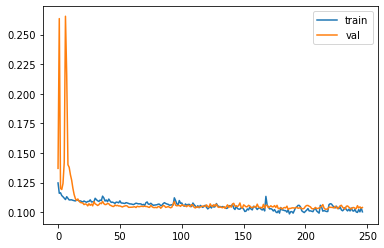

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 13)                52        
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 39)                546       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 39)                0         
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 39)                0         
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 39)                1560      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 39)                0         
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 39)               

In [ ]:
model_NN = Sequential()
model_NN.add(BatchNormalization())
model_NN.add(Dense(best_params ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha= best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out1']))
# if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
model_NN.add(Dense(best_params ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
model_NN.add(Dropout(best_params ['drop_out2']))
if best_params ['layers'] == 3 :
    model_NN.add(Dense(best_params ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
    model_NN.add(Dropout(best_params ['drop_out3']))
model_NN.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model_NN.add(LeakyReLU(alpha=best_params [ 'alpha'])) 
# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params [ 'learning_rate'])
model_NN.compile(loss=
                #  'mse',
              tf.keras.losses.Huber( delta=best_params[ 'delta']),
              # 'mse'
                  optimizer=opt)
fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_SO2_Maildlake_OUT.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop_epochs),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model_NN.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model_NN.summary()

In [ ]:
model_NN.load_weights(fn)
precovid_model = 'H2S_Buffalo Viewpoint_outlier_2015_realRH_SO2_OUT'
model_NN.save(precovid_model )

INFO:tensorflow:Assets written to: H2S_Buffalo Viewpoint_outlier_2015_realRH_SO2_OUT/assets


INFO:tensorflow:Assets written to: H2S_Buffalo Viewpoint_outlier_2015_realRH_SO2_OUT/assets


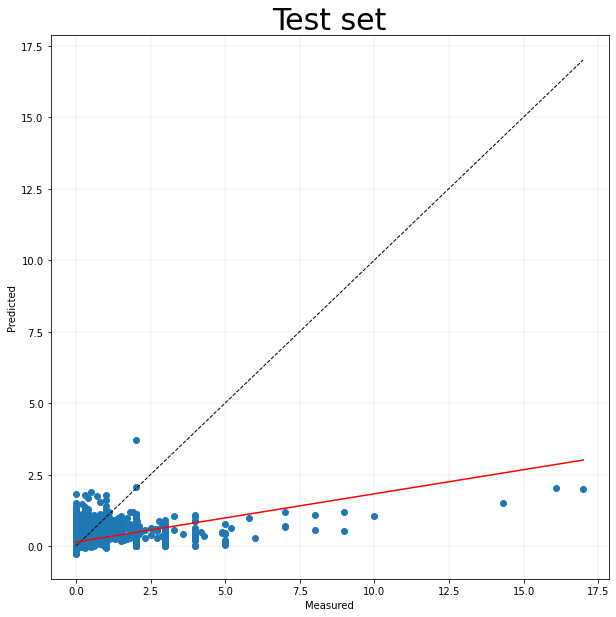

[0.16864762 0.14055205]
RMSE
[0.44162988]
R2
0.16423571733736264


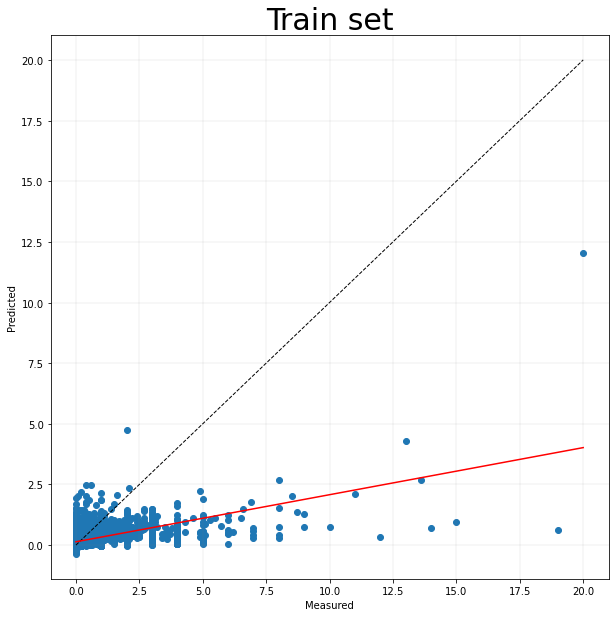

[0.19410571 0.13628079]
RMSE
[0.43899835]
R2
0.20853704664251338


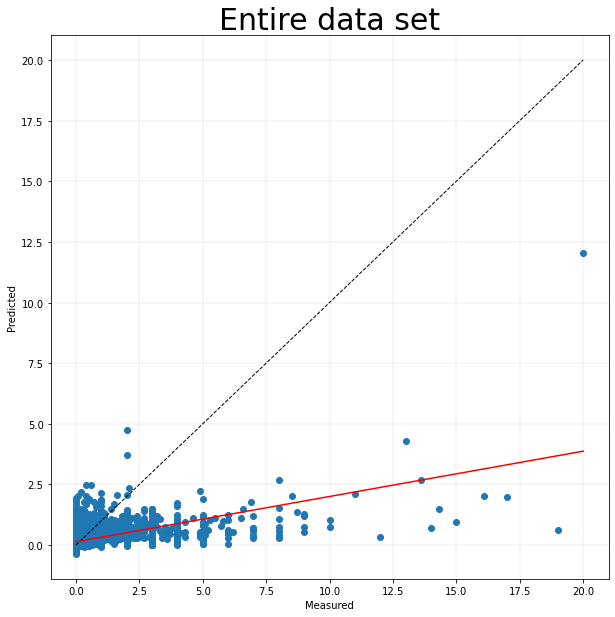

[0.18669409 0.13755152]
RMSE
[0.43978948]
R2
0.19565904945521284


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model_NN.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model_NN.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 13)                52        
_________________________________________________________________
module_wrapper_14 (ModuleWra (None, 39)                0         
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 39)                0         
_________________________________________________________________
module_wrapper_15 (ModuleWra (None, 39)                0         
_________________________________________________________________
module_wrapper_16 (ModuleWra (None, 39)                0         
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 39)                0         
_________________________________________________________________
module_wrapper_17 (ModuleWra (None, 39)               

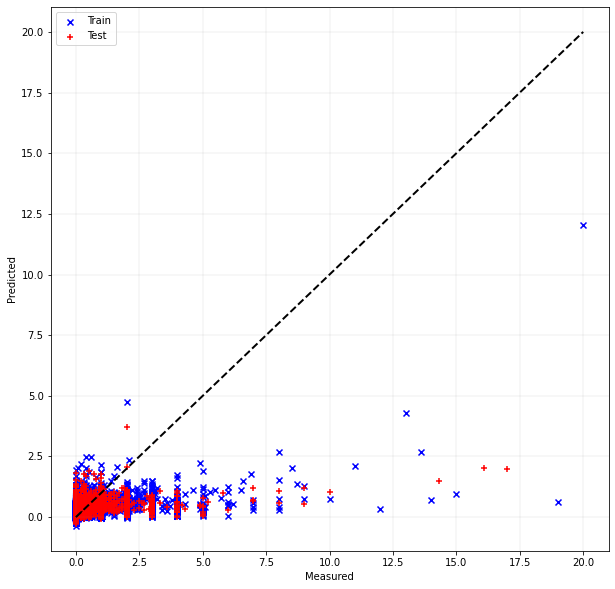

In [ ]:
model_NN = load_model(precovid_model )
model_NN.summary()
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

In [ ]:
# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model_NN.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

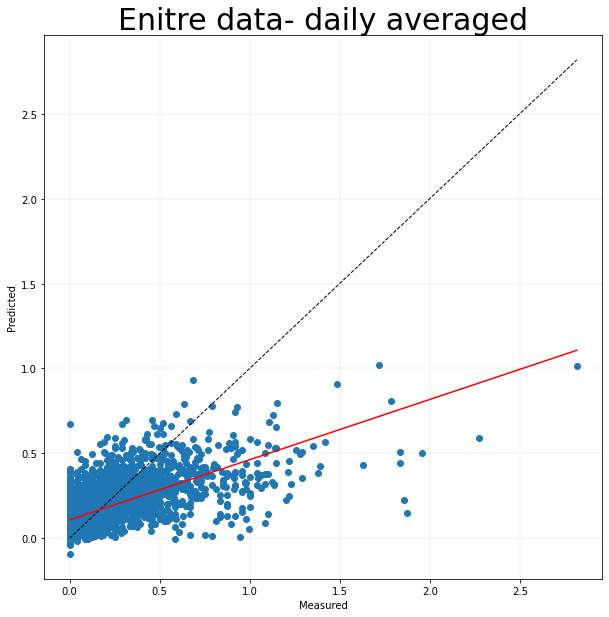

[0.35464459 0.10790737]
RMSE
[0.19440881]
R2
0.40636687135535443


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

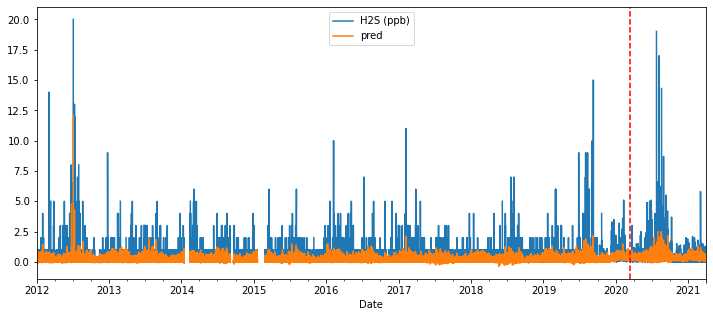

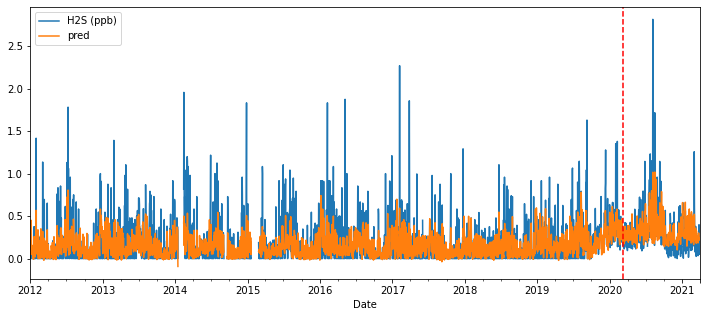

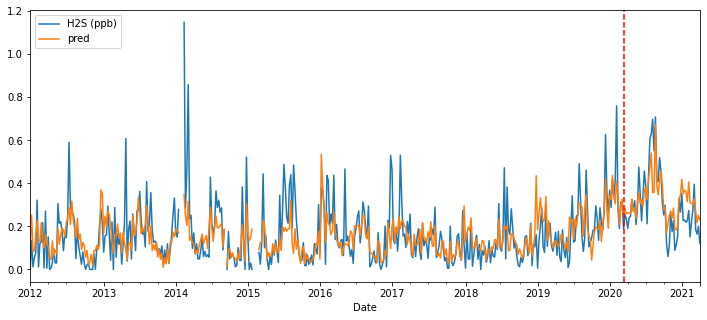

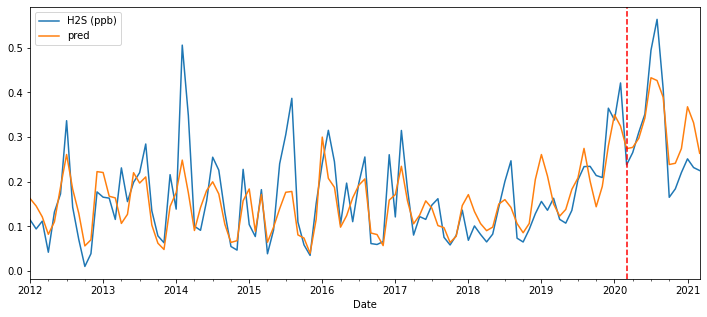

In [ ]:
df4[aa].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4[aa].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model_NN.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[0.43899835]
0.20853704664251338


In [ ]:
preds = model_NN.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[0.44162988]
0.16423571733736264


In [ ]:
df4.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [ ]:
preds = model_NN.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model_NN.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [ 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend']
test_col = [aa]


df1_w_c = df1_w[[aa, 'T ( C)', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Humidity Inst. (%)', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)',
       'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/H2S_BuffaloViewpoint_outlier_2015_realRH_NN_OR_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/H2S_BuffaloViewpoint_outlier_2015_realRH_NN_OR_Test.csv')

[0.43899835]
0.20853704664251338
[0.44162988]
0.16423571733736264


In [ ]:
df4.columns

Index(['H2S (ppb)', 'Humidity Inst. (%)', 'T ( C)',
       'Std. Dev. of Wind Direction', 'Std. Dev. of Wind Speed',
       'Wind Direction', 'Wind Speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [ ]:
# df4_D = df4_h.resample('D').mean()
# df4_M = df4_h.resample('M').mean()
# df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Mannix_SO2_hourly_pred.csv')
# df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/Mannix_SO_monthly_pred.csv')

In [ ]:
# df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
# df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
# plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4

H2S (ppb)  Humidity Inst. (%)  ...      trend      pred
Date                                                ...                     
2012-01-01 00:00:00        0.0                77.9  ...  12.000000 -0.012078
2012-01-01 01:00:00        0.0                78.4  ...  12.000114 -0.011424
2012-01-01 03:00:00        0.0                78.0  ...  12.000342 -0.024640
2012-01-01 04:00:00        0.0                77.1  ...  12.000455 -0.019561
2012-01-01 05:00:00        0.0                73.8  ...  12.000569  0.176871
...                        ...                 ...  ...        ...       ...
2021-03-31 19:00:00        0.1                49.0  ...  21.245332  0.325277
2021-03-31 20:00:00        0.3                55.0  ...  21.245446  0.204819
2021-03-31 21:00:00        0.3                59.0  ...  21.245560  0.198640
2021-03-31 22:00:00        0.2                57.0  ...  21.245674  0.203303
2021-03-31 23:00:00        0.2                56.0  ...  21.245788  0.212066

[75592 rows x 15 columns]

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model_NN.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
241
0.36679455637931824
2021-01-19 17:00:00
246
0.3631054759025574
2021-01-19 18:00:00
244
0.36666569113731384
2021-01-19 19:00:00
247
0.38527846336364746
2021-01-19 20:00:00
246
0.40095919370651245
2021-01-19 21:00:00
244
0.4150411784648895
2021-01-19 22:00:00
247
0.414761483669281
2021-01-19 23:00:00
246
0.40970736742019653
2021-01-20 00:00:00
248
0.32012253999710083
2021-01-20 01:00:00
247
0.3227130174636841
2021-01-20 02:00:00
246
0.3199412226676941
2021-01-20 03:00:00
247
0.3274194300174713
2021-01-20 04:00:00
245
0.3365897536277771
2021-01-20 05:00:00
241
0.33523139357566833
2021-01-20 06:00:00
243
0.3436477482318878
2021-01-20 07:00:00
246
0.35507920384407043
2021-01-20 08:00:00
245
0.348423570394516
2021-01-20 09:00:00
244
0.3283756673336029
2021-01-20 10:00:00
238
0.3455861806869507
2021-01-20 11:00:00
235
0.348885178565979
2021-01-20 12:00:00
232
0.3749818801879883
2021-01-20 13:00:00
233
0.3751859664916992
2021-01-20 14:00:0

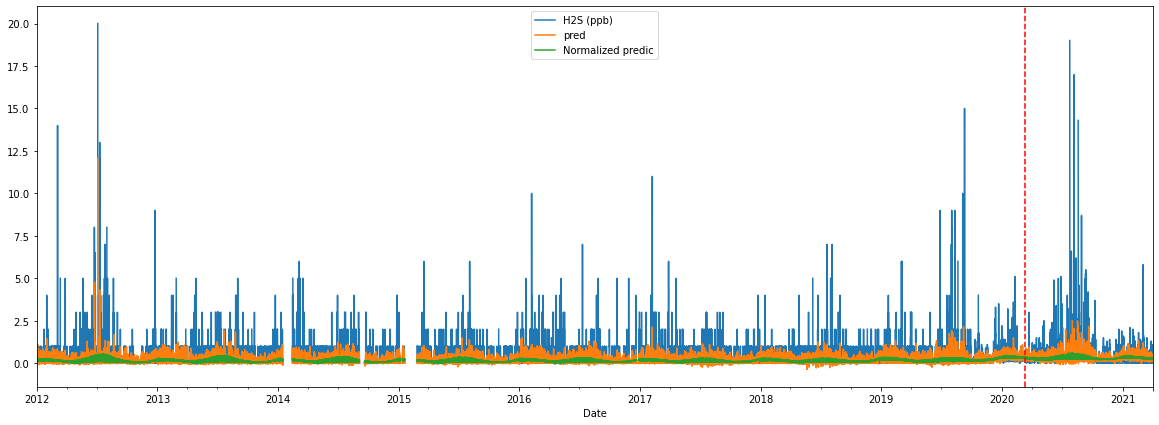

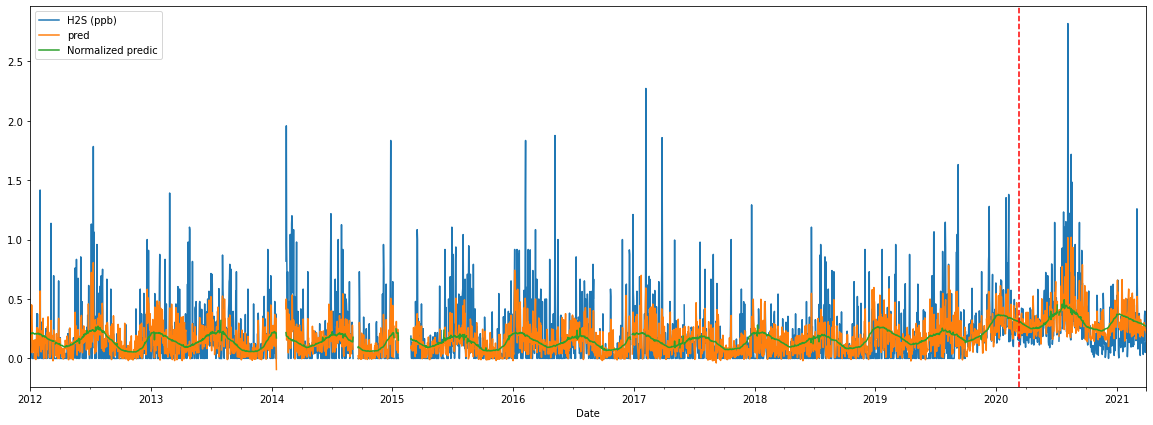

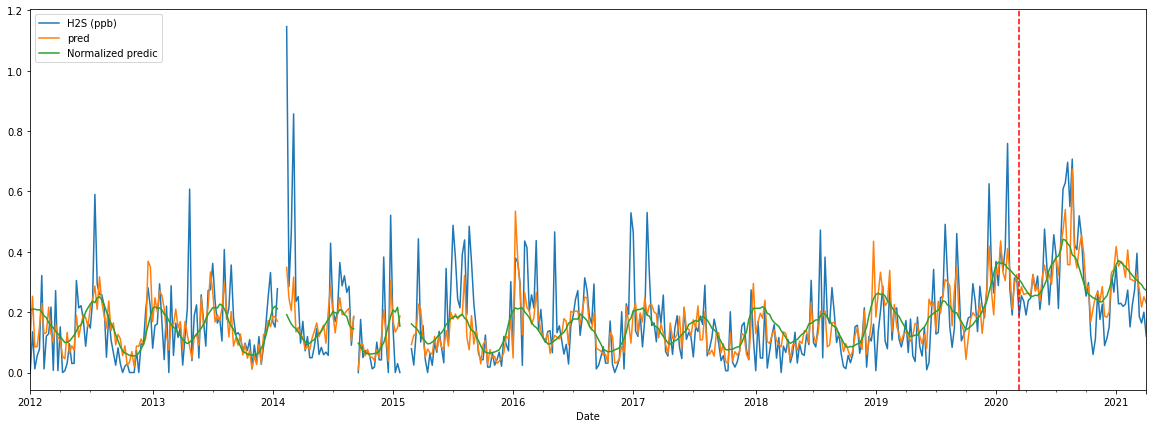

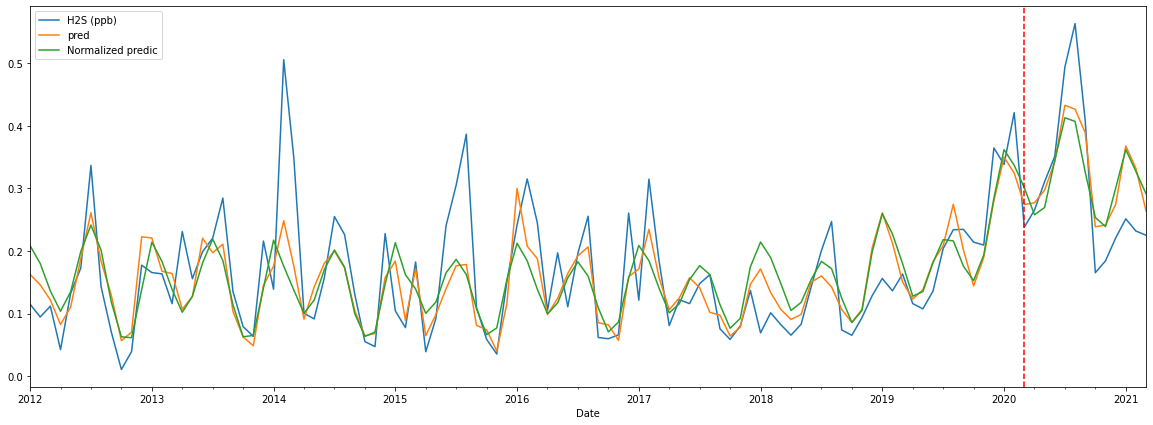

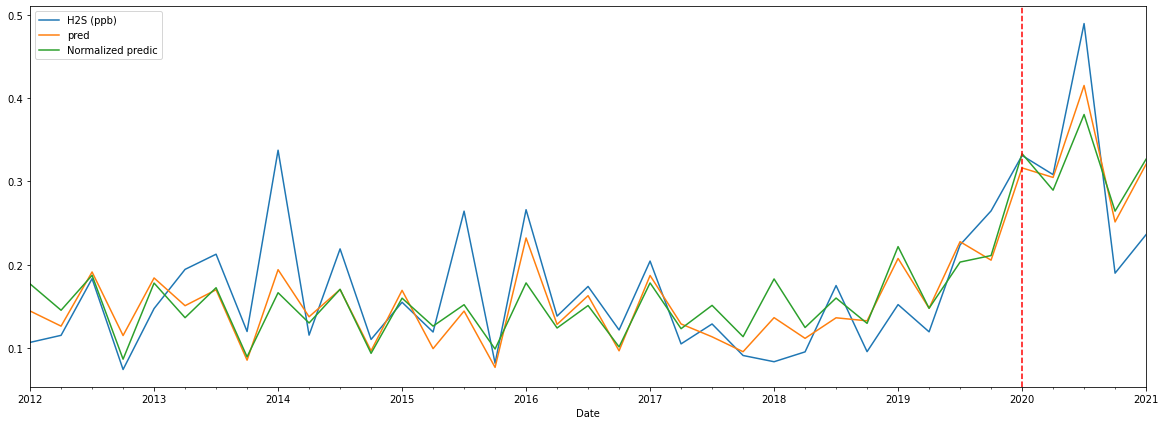

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_H2S_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_H2S_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Buffalo Viewpoint_outlier_2015_realRH_H2S_Monthly_normalized_pred.csv')


for i in ['H','D','W','M','Q']:
    df4_h[aa].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
# for i in ['H','D','W','M','Q']:
#     df4_h['SO2 (ppb)'].resample(i).mean().plot(legend= True)
#     df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
#     df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
#     plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
#     plt.show()

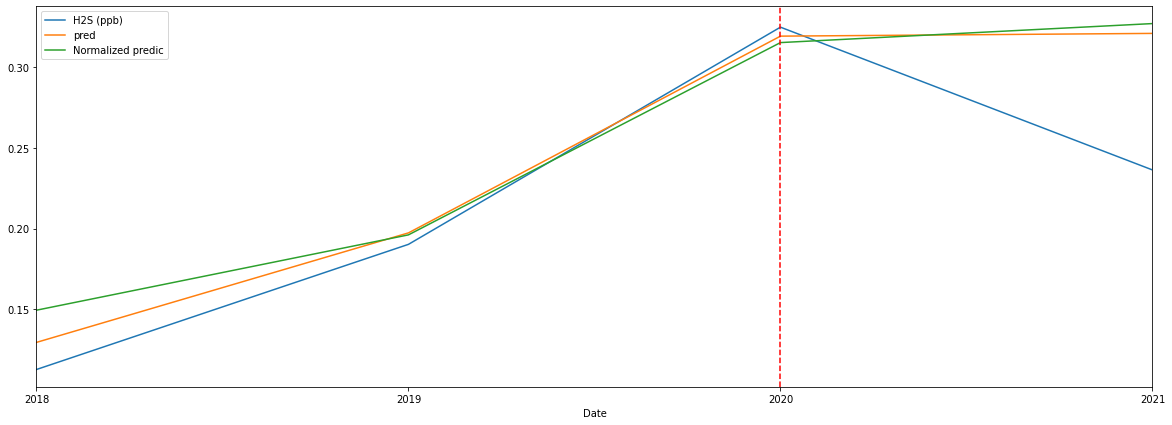

In [ ]:
df4_h[aa].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
####

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

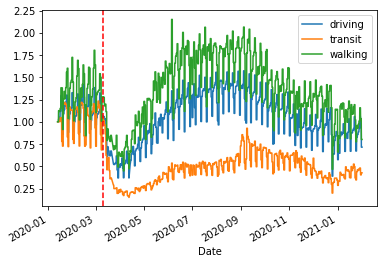

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] == 0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] == 1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

[I 2021-04-18 06:37:44,453] A new study created in RDB with name: east_edm_CO_p2
[I 2021-04-18 06:40:22,320] Trial 0 finished with value: 0.0047897337392556185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 3, 'batchsize': 1300.0, 'learning_rate': 0.08684742896034063, 'alpha': 0.47486431649895633, 'layer_back': 1}. Best is trial 0 with value: 0.0047897337392556185.


0.0047897337392556185


[I 2021-04-18 06:46:17,741] Trial 1 finished with value: 0.0037995427144006185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 200.0, 'learning_rate': 0.026645640165432177, 'alpha': 0.2464432589680267, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0037995427144006185


[I 2021-04-18 06:49:06,028] Trial 2 finished with value: 0.004990117939045318 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1200.0, 'learning_rate': 0.04246052710121524, 'alpha': 0.14036321226448864, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.004990117939045318


[I 2021-04-18 06:51:38,749] Trial 3 finished with value: 0.004435081840883617 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.08019349670014007, 'alpha': 0.801795208357617, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004435081840883617


[I 2021-04-18 06:55:41,325] Trial 4 finished with value: 0.004397006773851628 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 400.0, 'learning_rate': 0.0922021495386216, 'alpha': 0.8714206976745991, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004397006773851628


[I 2021-04-18 06:58:39,803] Trial 5 finished with value: 0.004472224808431502 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 1, 'batchsize': 900.0, 'learning_rate': 0.054032085513753485, 'alpha': 0.36356263089297863, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004472224808431502


[I 2021-04-18 07:02:19,968] Trial 6 finished with value: 0.004032658481373844 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 500.0, 'learning_rate': 0.0034103388646587085, 'alpha': 0.8298599523597091, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004032658481373844


[I 2021-04-18 07:04:57,913] Trial 7 finished with value: 0.004412881161440907 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1400.0, 'learning_rate': 0.024560851403922612, 'alpha': 0.8657303593335849, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004412881161440907


[I 2021-04-18 07:07:33,362] Trial 8 finished with value: 0.003962766007027832 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1600.0, 'learning_rate': 0.0387484515918348, 'alpha': 0.5935061142207385, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.003962766007027832


[I 2021-04-18 07:10:45,080] Trial 9 finished with value: 0.004464174746733434 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 700.0, 'learning_rate': 0.07156430296741274, 'alpha': 0.6837562117270939, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004464174746733434


[I 2021-04-18 07:20:10,927] Trial 10 finished with value: 0.0047593223285363065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.006393597974084786, 'alpha': 0.09784392044369339, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.0047593223285363065


[I 2021-04-18 07:22:40,517] Trial 11 finished with value: 0.0038559859859853907 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 4, 'batchsize': 1900.0, 'learning_rate': 0.029641261114048665, 'alpha': 0.3455488342982123, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0038559859859853907


[I 2021-04-18 07:25:12,650] Trial 12 finished with value: 0.0037802072596256108 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 2000.0, 'learning_rate': 0.021318248161901757, 'alpha': 0.27421676161966496, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.0037802072596256108


[I 2021-04-18 07:34:39,100] Trial 13 finished with value: 0.003838305552608133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.01618259930894679, 'alpha': 0.2237909588852787, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.003838305552608133


[I 2021-04-18 07:37:13,171] Trial 14 finished with value: 0.0037727934709037452 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 1600.0, 'learning_rate': 0.05463156741271952, 'alpha': 0.023432883667647286, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.0037727934709037452


[I 2021-04-18 07:39:46,194] Trial 15 finished with value: 0.004717376020706112 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.057774493852787316, 'alpha': 0.013468966566860257, 'layer_back': 1}. Best is trial 14 with value: 0.0037727934709037452.


0.004717376020706112


[I 2021-04-18 07:42:17,141] Trial 16 finished with value: 0.003891606393255513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 4, 'batchsize': 1600.0, 'learning_rate': 0.06483099406582218, 'alpha': 0.048701457819810334, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.003891606393255513


[I 2021-04-18 07:44:50,068] Trial 17 finished with value: 0.003705317767648349 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.042981081545902175, 'alpha': 0.17151924705879706, 'layer_back': 2}. Best is trial 17 with value: 0.003705317767648349.


0.003705317767648349


[I 2021-04-18 07:47:22,992] Trial 18 finished with value: 0.003652074267837431 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043120594200074316, 'alpha': 0.15356515832757994, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003652074267837431


[I 2021-04-18 07:49:56,748] Trial 19 finished with value: 0.004855364207538971 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.03948108446690251, 'alpha': 0.1731767923827432, 'layer_back': 1}. Best is trial 18 with value: 0.003652074267837431.


0.004855364207538971


[I 2021-04-18 07:52:46,818] Trial 20 finished with value: 0.0036661417054684184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.045596783441498825, 'alpha': 0.46487314129271234, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0036661417054684184


[I 2021-04-18 07:55:47,695] Trial 21 finished with value: 0.003772814522212643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.04376219782019011, 'alpha': 0.495381372771252, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003772814522212643


[I 2021-04-18 07:58:33,572] Trial 22 finished with value: 0.0037000579251144777 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03235269324681574, 'alpha': 0.40139723428257024, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037000579251144777


[I 2021-04-18 08:01:16,242] Trial 23 finished with value: 0.0037201394146138406 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.0335829823820747, 'alpha': 0.561915944028579, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037201394146138406


[I 2021-04-18 08:04:15,280] Trial 24 finished with value: 0.0037030372913319023 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.01268992251227287, 'alpha': 0.3938061003278891, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037030372913319023


[I 2021-04-18 08:07:38,080] Trial 25 finished with value: 0.003918046517575021 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.04897050026188292, 'alpha': 0.6753399284001078, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003918046517575021


[I 2021-04-18 08:10:15,782] Trial 26 finished with value: 0.0038008433695184197 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.06522149016140043, 'alpha': 0.42163733919230845, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0038008433695184197


[I 2021-04-18 08:13:05,072] Trial 27 finished with value: 0.0036111388857046787 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.03298839085103375, 'alpha': 0.3150552800923347, 'layer_back': 2}. Best is trial 27 with value: 0.0036111388857046787.


0.0036111388857046787


[I 2021-04-18 08:16:08,056] Trial 28 finished with value: 0.003597443791057043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.04885615301916258, 'alpha': 0.29269304131799223, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.003597443791057043


[I 2021-04-18 08:19:12,662] Trial 29 finished with value: 0.0046809329310916956 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.05995146156015323, 'alpha': 0.30446311601011683, 'layer_back': 1}. Best is trial 28 with value: 0.003597443791057043.


0.0046809329310916956


[I 2021-04-18 08:21:45,673] Trial 30 finished with value: 0.004425357656736 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.0759352310855712, 'alpha': 0.21269011576180244, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.004425357656736


[I 2021-04-18 08:24:37,569] Trial 31 finished with value: 0.0036547160400316313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.049811468875869416, 'alpha': 0.510738346787994, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0036547160400316313


[I 2021-04-18 08:27:52,823] Trial 32 finished with value: 0.0037521087301732345 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.049503947678833926, 'alpha': 0.31735277463906175, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037521087301732345


[I 2021-04-18 08:30:36,307] Trial 33 finished with value: 0.0037683419447327986 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.03290226547777786, 'alpha': 0.5286190169685012, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037683419447327986


[I 2021-04-18 08:33:27,324] Trial 34 finished with value: 0.003597358919918322 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.036818841872599595, 'alpha': 0.12570513379804832, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003597358919918322


[I 2021-04-18 08:37:26,272] Trial 35 finished with value: 0.003661138596451478 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 400.0, 'learning_rate': 0.03671876888449163, 'alpha': 0.08397801305678194, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003661138596451478


[I 2021-04-18 08:40:27,101] Trial 36 finished with value: 0.00359203525150731 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.02437141103670945, 'alpha': 0.12749087727003588, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00359203525150731


[I 2021-04-18 08:43:26,782] Trial 37 finished with value: 0.0036756314419160397 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.018931547569790746, 'alpha': 0.2516407308762111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036756314419160397


[I 2021-04-18 08:48:02,902] Trial 38 finished with value: 0.0036545643870157882 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 300.0, 'learning_rate': 0.02603462599572944, 'alpha': 0.14443719906111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036545643870157882


[I 2021-04-18 08:51:18,641] Trial 39 finished with value: 0.004398658143913983 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.02412418866542985, 'alpha': 0.09261962247455818, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.004398658143913983


[I 2021-04-18 08:54:03,235] Trial 40 finished with value: 0.00366032853048446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 1200.0, 'learning_rate': 0.028075997597257207, 'alpha': 0.20259126107498393, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00366032853048446


[I 2021-04-18 08:57:05,594] Trial 41 finished with value: 0.003674477629447893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.03773808729024592, 'alpha': 0.13311556018712936, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.003674477629447893


[I 2021-04-18 08:59:59,665] Trial 42 finished with value: 0.0036705861586692643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.014115297813961467, 'alpha': 0.28611068588955, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036705861586692643


[I 2021-04-18 09:03:13,164] Trial 43 finished with value: 0.0036713389468197555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.04560695580139573, 'alpha': 0.3437569312771207, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036713389468197555


[I 2021-04-18 09:06:35,814] Trial 44 finished with value: 0.0035783836209078556 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.009070889461271204, 'alpha': 0.13887248911600195, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035783836209078556


[I 2021-04-18 09:09:57,729] Trial 45 finished with value: 0.003673148714195081 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 600.0, 'learning_rate': 0.009253166791610645, 'alpha': 0.2451607156425593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003673148714195081


[I 2021-04-18 09:14:01,355] Trial 46 finished with value: 0.004344271113195811 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 400.0, 'learning_rate': 0.001551960808838477, 'alpha': 0.10569886410992255, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004344271113195811


[I 2021-04-18 09:17:39,621] Trial 47 finished with value: 0.0037050254039840223 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.021082510170567333, 'alpha': 0.0668001215058446, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037050254039840223


[I 2021-04-18 09:20:38,142] Trial 48 finished with value: 0.0036692619534721047 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.007585468046031375, 'alpha': 0.2061475495973082, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036692619534721047


[I 2021-04-18 09:23:49,174] Trial 49 finished with value: 0.004457879746783033 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.03483835282389286, 'alpha': 0.018344801879960376, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004457879746783033


[I 2021-04-18 09:26:34,895] Trial 50 finished with value: 0.0035807581552902102 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03005652498704963, 'alpha': 0.11696356203274105, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035807581552902102


[I 2021-04-18 09:29:21,811] Trial 51 finished with value: 0.0036236342891670654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.09983893132352316, 'alpha': 0.11957067974916365, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036236342891670654


[I 2021-04-18 09:32:02,631] Trial 52 finished with value: 0.0036302435793163423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.02754867420830222, 'alpha': 0.05647608660638647, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036302435793163423


[I 2021-04-18 09:34:44,744] Trial 53 finished with value: 0.003627053068071688 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04005811816852655, 'alpha': 0.17080808493297003, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003627053068071688


[I 2021-04-18 09:37:45,884] Trial 54 finished with value: 0.0036920503523068266 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.017979831294330218, 'alpha': 0.2570823577331828, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036920503523068266


[I 2021-04-18 09:40:36,692] Trial 55 finished with value: 0.003612690295076574 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1000.0, 'learning_rate': 0.029552755284063505, 'alpha': 0.18039366495456732, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003612690295076574


[I 2021-04-18 09:43:40,566] Trial 56 finished with value: 0.004012695527376038 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 800.0, 'learning_rate': 0.022565925713046567, 'alpha': 0.03734236499524329, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004012695527376038


[I 2021-04-18 09:47:16,794] Trial 57 finished with value: 0.003698018600704401 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 500.0, 'learning_rate': 0.05338960509962787, 'alpha': 0.35126328332328843, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003698018600704401


[I 2021-04-18 09:50:04,725] Trial 58 finished with value: 0.003619003598112455 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.011669376031158469, 'alpha': 0.2338658479883975, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003619003598112455


[I 2021-04-18 09:53:02,416] Trial 59 finished with value: 0.0036054917675212707 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.031117560438016202, 'alpha': 0.12690434404626497, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036054917675212707


[I 2021-04-18 09:56:06,738] Trial 60 finished with value: 0.003886966241395085 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.003565187588275332, 'alpha': 0.12617304287730674, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003886966241395085


[I 2021-04-18 09:59:11,214] Trial 61 finished with value: 0.003618826532739045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.03119470670070372, 'alpha': 0.06717581966642143, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003618826532739045


[I 2021-04-18 10:02:02,407] Trial 62 finished with value: 0.0037632189106060355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1000.0, 'learning_rate': 0.04059941279624269, 'alpha': 0.16862336495408595, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037632189106060355


[I 2021-04-18 10:05:19,179] Trial 63 finished with value: 0.003794832132947586 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 700.0, 'learning_rate': 0.036734160746832493, 'alpha': 0.01101319432018788, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003794832132947586


[I 2021-04-18 10:08:20,419] Trial 64 finished with value: 0.003758988776972788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.029855268948976825, 'alpha': 0.4386976096021802, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003758988776972788


[I 2021-04-18 10:11:42,186] Trial 65 finished with value: 0.0035876522982958357 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.024552341120126213, 'alpha': 0.20134794489311997, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035876522982958357


[I 2021-04-18 10:15:04,777] Trial 66 finished with value: 0.0036155628523736184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.016447401975405944, 'alpha': 0.14664495950811754, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036155628523736184


[I 2021-04-18 10:18:40,103] Trial 67 finished with value: 0.0037361543406670638 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.02482879535124779, 'alpha': 0.18911509071408622, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037361543406670638


[I 2021-04-18 10:23:14,465] Trial 68 finished with value: 0.004737399253546576 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 300.0, 'learning_rate': 0.045839207163365064, 'alpha': 0.11572139542681772, 'layer_back': 1}. Best is trial 44 with value: 0.0035783836209078556.


0.004737399253546576


[I 2021-04-18 10:26:17,521] Trial 69 finished with value: 0.0035844609162026856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.021759460493932996, 'alpha': 0.08938362393003896, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035844609162026856


[I 2021-04-18 10:29:40,721] Trial 70 finished with value: 0.003647474821726536 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.020584896822209618, 'alpha': 0.08688700495047245, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003647474821726536


[I 2021-04-18 10:32:40,862] Trial 71 finished with value: 0.0036240235360119194 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.026636013810065286, 'alpha': 0.04460753701062606, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036240235360119194


[I 2021-04-18 10:35:57,924] Trial 72 finished with value: 0.003678997217185063 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 700.0, 'learning_rate': 0.02380154186526011, 'alpha': 0.15140441320203327, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003678997217185063


[I 2021-04-18 10:39:01,596] Trial 73 finished with value: 0.003659856745198834 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.015277005770461548, 'alpha': 0.2178303763286192, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003659856745198834


[I 2021-04-18 10:42:16,571] Trial 74 finished with value: 0.0036399907750272265 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.011408912622706538, 'alpha': 0.10321869296892679, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036399907750272265


[I 2021-04-18 10:45:19,285] Trial 75 finished with value: 0.0037281104148537535 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.035323452421033984, 'alpha': 0.2846749869393032, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037281104148537535


[I 2021-04-18 10:48:06,701] Trial 76 finished with value: 0.00361764726075232 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.018785055346852722, 'alpha': 0.08247223174383175, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.00361764726075232


[I 2021-04-18 10:51:06,829] Trial 77 finished with value: 0.0036951690746862827 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.030036815811613576, 'alpha': 0.15370233117847767, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036951690746862827


[I 2021-04-18 10:53:48,194] Trial 78 finished with value: 0.003591197553125669 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.021596734858180668, 'alpha': 0.19705749126102656, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003591197553125669


[I 2021-04-18 10:56:31,899] Trial 79 finished with value: 0.0036875580454355968 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.004996727049177942, 'alpha': 0.19630957319700593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036875580454355968


[I 2021-04-18 10:59:15,173] Trial 80 finished with value: 0.003672630637413495 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.009725768873874269, 'alpha': 0.23904793658858925, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003672630637413495


[I 2021-04-18 11:02:33,338] Trial 81 finished with value: 0.003608277041588192 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.021177055101469718, 'alpha': 0.13273475258504627, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003608277041588192


[I 2021-04-18 11:05:23,493] Trial 82 finished with value: 0.0035357134156083006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03251063586877488, 'alpha': 0.16601335847048496, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035357134156083006


[I 2021-04-18 11:08:10,650] Trial 83 finished with value: 0.0035800395220561315 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027507014638668944, 'alpha': 0.26952999743969175, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035800395220561315


[I 2021-04-18 11:10:53,530] Trial 84 finished with value: 0.003641285084880817 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.024468913257262442, 'alpha': 0.26941083528596615, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003641285084880817


[I 2021-04-18 11:13:33,120] Trial 85 finished with value: 0.003613639352689042 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.027506935493900007, 'alpha': 0.16554636650660334, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003613639352689042


[I 2021-04-18 11:16:13,848] Trial 86 finished with value: 0.0035454609704569555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034075180962035656, 'alpha': 0.19205737194876213, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035454609704569555


[I 2021-04-18 11:18:54,396] Trial 87 finished with value: 0.0036217548071173097 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.018105506543334197, 'alpha': 0.2172761829124636, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036217548071173097


[I 2021-04-18 11:21:32,202] Trial 88 finished with value: 0.0036196131119005967 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.013644839043071016, 'alpha': 0.18554443324755185, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036196131119005967


[I 2021-04-18 11:24:10,911] Trial 89 finished with value: 0.003572944589854708 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02174303974596932, 'alpha': 0.06885902281378707, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003572944589854708


[I 2021-04-18 11:26:50,606] Trial 90 finished with value: 0.003906346283951516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1500.0, 'learning_rate': 0.03323653174387488, 'alpha': 0.03163285232628042, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003906346283951516


[I 2021-04-18 11:29:31,353] Trial 91 finished with value: 0.003578888868218704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.022580602914511808, 'alpha': 0.06713185538847133, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003578888868218704


[I 2021-04-18 11:32:08,581] Trial 92 finished with value: 0.0035789263141083713 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.021256605621501615, 'alpha': 0.06634621015162126, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035789263141083713


[I 2021-04-18 11:34:49,916] Trial 93 finished with value: 0.003544189206426239 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02748340529865124, 'alpha': 0.07868991239964429, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003544189206426239


[I 2021-04-18 11:37:33,179] Trial 94 finished with value: 0.0035499476797488643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02892486834145689, 'alpha': 0.07221984870581319, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035499476797488643


[I 2021-04-18 11:40:14,572] Trial 95 finished with value: 0.0035273632980514285 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.027834554447690413, 'alpha': 0.06732285000688103, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035273632980514285


[I 2021-04-18 11:42:52,853] Trial 96 finished with value: 0.0036086771352365947 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02637530840203316, 'alpha': 0.05953489610216768, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036086771352365947


[I 2021-04-18 11:45:38,794] Trial 97 finished with value: 0.0035684357428775186 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027517728652115728, 'alpha': 0.07593898838347986, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035684357428775186


[I 2021-04-18 11:48:20,507] Trial 98 finished with value: 0.003583852513729412 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03367874759681739, 'alpha': 0.06942447131849512, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003583852513729412


[I 2021-04-18 11:50:57,066] Trial 99 finished with value: 0.003541288425685317 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.041358766423868744, 'alpha': 0.021920382234198947, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003541288425685317


[I 2021-04-18 11:53:42,845] Trial 100 finished with value: 0.0036243488752047467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04030568364072326, 'alpha': 0.02384229949250582, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036243488752047467


[I 2021-04-18 11:56:21,539] Trial 101 finished with value: 0.003627937411450544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.035398043970041676, 'alpha': 0.03950052041260174, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627937411450544


[I 2021-04-18 11:59:00,418] Trial 102 finished with value: 0.003627126043875543 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03832592467033967, 'alpha': 0.10048283220351684, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627126043875543


[I 2021-04-18 12:01:36,789] Trial 103 finished with value: 0.0035408315369076784 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032256016881253326, 'alpha': 0.07030089565296588, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035408315369076784


[I 2021-04-18 12:04:17,971] Trial 104 finished with value: 0.003566082616285739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04262395762710679, 'alpha': 0.01173160141920479, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003566082616285739


[I 2021-04-18 12:06:58,238] Trial 105 finished with value: 0.0035737931205732376 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04227819138674002, 'alpha': 0.010660044984515019, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035737931205732376


[I 2021-04-18 12:09:32,119] Trial 106 finished with value: 0.0035184089995725617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043629287038235834, 'alpha': 0.010426390915745402, 'layer_back': 2}. Best is trial 106 with value: 0.0035184089995725617.


0.0035184089995725617


[I 2021-04-18 12:12:07,413] Trial 107 finished with value: 0.0034912184906821125 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04304162747051637, 'alpha': 0.044280753511746956, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0034912184906821125


[I 2021-04-18 12:14:44,123] Trial 108 finished with value: 0.0036380100736029142 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046899784330746694, 'alpha': 0.011423731168029368, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036380100736029142


[I 2021-04-18 12:17:20,619] Trial 109 finished with value: 0.0035930917231830005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05312662202242775, 'alpha': 0.04766526633420203, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035930917231830005


[I 2021-04-18 12:19:56,882] Trial 110 finished with value: 0.0035019395412586403 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04297554301809757, 'alpha': 0.03108575464071467, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035019395412586403


[I 2021-04-18 12:22:26,683] Trial 111 finished with value: 0.0035799057324392095 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.042791521010711986, 'alpha': 0.033242351358857565, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035799057324392095


[I 2021-04-18 12:25:01,093] Trial 112 finished with value: 0.003567586631908924 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04188075691123601, 'alpha': 0.012902457195305648, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567586631908924


[I 2021-04-18 12:27:37,137] Trial 113 finished with value: 0.003552786707766206 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04705313553365665, 'alpha': 0.024024393886675065, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003552786707766206


[I 2021-04-18 12:30:14,683] Trial 114 finished with value: 0.0035491374611036066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04792414670441766, 'alpha': 0.04942912887788908, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035491374611036066


[I 2021-04-18 12:32:47,942] Trial 115 finished with value: 0.003934744163417141 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.05138779832449931, 'alpha': 0.7678284116404237, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003934744163417141


[I 2021-04-18 12:35:21,813] Trial 116 finished with value: 0.0035480745063304685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04672929967596791, 'alpha': 0.0543681486748597, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035480745063304685


[I 2021-04-18 12:37:57,950] Trial 117 finished with value: 0.003645209428448006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.058597540974892046, 'alpha': 0.054075814336391005, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003645209428448006


[I 2021-04-18 12:40:31,646] Trial 118 finished with value: 0.003635834268763575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04497558570260886, 'alpha': 0.10395749038880057, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003635834268763575


[I 2021-04-18 12:43:09,338] Trial 119 finished with value: 0.0036447334704852665 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1800.0, 'learning_rate': 0.04781462434994531, 'alpha': 0.04268750205527756, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036447334704852665


[I 2021-04-18 12:45:44,270] Trial 120 finished with value: 0.003567690380984065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.037831602089136926, 'alpha': 0.0894939850401166, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567690380984065


[I 2021-04-18 12:48:19,955] Trial 121 finished with value: 0.0036418865284299482 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.049910163797960434, 'alpha': 0.02265761100617698, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036418865284299482


[I 2021-04-18 12:50:50,152] Trial 122 finished with value: 0.003626350371093418 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04409374352769631, 'alpha': 0.04839758470877351, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003626350371093418


[I 2021-04-18 12:53:25,935] Trial 123 finished with value: 0.004068899031879057 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 1900.0, 'learning_rate': 0.04692551724599392, 'alpha': 0.027164865650236767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004068899031879057


[I 2021-04-18 12:56:09,582] Trial 124 finished with value: 0.003549524306460534 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.05601252997839943, 'alpha': 0.08216270418670965, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003549524306460534


[I 2021-04-18 12:58:52,986] Trial 125 finished with value: 0.0036022166677025626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.051026693295636215, 'alpha': 0.08169432284004574, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036022166677025626


[I 2021-04-18 13:01:25,923] Trial 126 finished with value: 0.0036323884269265395 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05755736475611723, 'alpha': 0.10764012747900042, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036323884269265395


[I 2021-04-18 13:04:06,681] Trial 127 finished with value: 0.0035868803510106743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.06484074739859898, 'alpha': 0.04916233098402338, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035868803510106743


[I 2021-04-18 13:06:48,784] Trial 128 finished with value: 0.003632038891645508 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.05481967090549042, 'alpha': 0.09493718561374137, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632038891645508


[I 2021-04-18 13:09:24,704] Trial 129 finished with value: 0.0036332687347207073 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.06164699827462552, 'alpha': 0.11368639196612304, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036332687347207073


[I 2021-04-18 13:12:02,225] Trial 130 finished with value: 0.0036107090038871685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.031913432524153476, 'alpha': 0.07944764608488178, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036107090038871685


[I 2021-04-18 13:14:37,997] Trial 131 finished with value: 0.003543857849946714 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04047866711207972, 'alpha': 0.03334890991576665, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003543857849946714


[I 2021-04-18 13:17:10,956] Trial 132 finished with value: 0.003614544482168527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03927975006627224, 'alpha': 0.05750478466882326, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003614544482168527


[I 2021-04-18 13:19:52,496] Trial 133 finished with value: 0.0036289459230039846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03602600147397279, 'alpha': 0.03879102885756539, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036289459230039846


[I 2021-04-18 13:22:21,926] Trial 134 finished with value: 0.004397730627210862 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04121745337090514, 'alpha': 0.07727507999023213, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004397730627210862


[I 2021-04-18 13:25:09,682] Trial 135 finished with value: 0.0035954891884910044 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.05591938878661566, 'alpha': 0.011489115255243473, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035954891884910044


[I 2021-04-18 13:27:46,099] Trial 136 finished with value: 0.003632190940638184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04473961188420494, 'alpha': 0.05883472932516892, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632190940638184


[I 2021-04-18 13:30:22,676] Trial 137 finished with value: 0.004797824764292689 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03394020855741806, 'alpha': 0.6177230050734727, 'layer_back': 1}. Best is trial 107 with value: 0.0034912184906821125.


0.004797824764292689


[I 2021-04-18 13:32:54,827] Trial 138 finished with value: 0.0035575625191086686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03925631108791122, 'alpha': 0.02976577533102045, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035575625191086686


[I 2021-04-18 13:35:35,526] Trial 139 finished with value: 0.0037383972180743746 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.02925391477758371, 'alpha': 0.13393207397187767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037383972180743746


[I 2021-04-18 13:38:16,882] Trial 140 finished with value: 0.003617621733455551 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03195637257591547, 'alpha': 0.0947751465706642, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003617621733455551


[I 2021-04-18 13:40:50,663] Trial 141 finished with value: 0.003579242154278799 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0485447382823182, 'alpha': 0.01176858180870248, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003579242154278799


[I 2021-04-18 13:43:25,476] Trial 142 finished with value: 0.0035750086655864273 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.046567743860348884, 'alpha': 0.026818371099279946, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035750086655864273


[I 2021-04-18 13:46:00,498] Trial 143 finished with value: 0.003623829402881311 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03742158374219033, 'alpha': 0.04975293319513799, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003623829402881311


[I 2021-04-18 13:48:38,218] Trial 144 finished with value: 0.0036066806414085484 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05148602571649974, 'alpha': 0.010300864640383572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036066806414085484


[I 2021-04-18 13:51:09,839] Trial 145 finished with value: 0.003610979298586066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.043772802510158214, 'alpha': 0.07001141819525372, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003610979298586066


[I 2021-04-18 13:53:44,355] Trial 146 finished with value: 0.0035619962671982527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04082403791540483, 'alpha': 0.035248606443724864, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035619962671982527


[I 2021-04-18 13:56:26,877] Trial 147 finished with value: 0.003548864702878114 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04862893209367515, 'alpha': 0.11504554485639235, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003548864702878114


[I 2021-04-18 13:59:07,487] Trial 148 finished with value: 0.0036127803252306075 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034866037784612974, 'alpha': 0.15803031484071783, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036127803252306075


[I 2021-04-18 14:01:52,630] Trial 149 finished with value: 0.0035717142472204513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04905384303207223, 'alpha': 0.11415311920269179, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035717142472204513


[I 2021-04-18 14:04:32,812] Trial 150 finished with value: 0.0035749882689068164 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04526973875676865, 'alpha': 0.14572957071712894, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035749882689068164


[I 2021-04-18 14:07:16,399] Trial 151 finished with value: 0.0035993304069324022 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.052491361045237814, 'alpha': 0.08397349335013253, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035993304069324022


[I 2021-04-18 14:09:58,621] Trial 152 finished with value: 0.0035685056911281127 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04837346606791395, 'alpha': 0.06310254703879091, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035685056911281127


[I 2021-04-18 14:12:29,525] Trial 153 finished with value: 0.003629879513305761 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0438214208862195, 'alpha': 0.10403865238259322, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003629879513305761


[I 2021-04-18 14:15:14,227] Trial 154 finished with value: 0.0036221795403482207 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03029487512047642, 'alpha': 0.04348614544060133, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036221795403482207


[I 2021-04-18 14:17:57,080] Trial 155 finished with value: 0.0035922583407074988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.03843837268200991, 'alpha': 0.08433177217864488, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035922583407074988


[I 2021-04-18 14:20:36,152] Trial 156 finished with value: 0.003578072413719791 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.046367859672450995, 'alpha': 0.12254720867272155, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003578072413719791


[I 2021-04-18 14:23:15,649] Trial 157 finished with value: 0.0038583845758324883 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0871450624590979, 'alpha': 0.056755344230540905, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0038583845758324883


[I 2021-04-18 14:25:52,255] Trial 158 finished with value: 0.003580582397543033 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.041182684797758676, 'alpha': 0.031335914276621774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003580582397543033


[I 2021-04-18 14:28:31,244] Trial 159 finished with value: 0.003571554999049949 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.050511120203456654, 'alpha': 0.011355553310716315, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003571554999049949


[I 2021-04-18 14:31:10,768] Trial 160 finished with value: 0.0035740442082979025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1300.0, 'learning_rate': 0.054629022232272034, 'alpha': 0.09769506994297086, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035740442082979025


[I 2021-04-18 14:33:46,785] Trial 161 finished with value: 0.0035316717327896836 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03947842688021926, 'alpha': 0.02587334876105694, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035316717327896836


[I 2021-04-18 14:36:22,973] Trial 162 finished with value: 0.003583261784611461 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0426931007941171, 'alpha': 0.06941424492182441, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003583261784611461


[I 2021-04-18 14:38:56,920] Trial 163 finished with value: 0.0035638605296477717 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03698103592588202, 'alpha': 0.02604575458608599, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035638605296477717


[I 2021-04-18 14:41:34,556] Trial 164 finished with value: 0.0036057247992290833 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.033843190233136235, 'alpha': 0.054628128789041205, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036057247992290833


[I 2021-04-18 14:44:05,291] Trial 165 finished with value: 0.0036577139832949667 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.02862847367159879, 'alpha': 0.041190982009615476, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036577139832949667


[I 2021-04-18 14:46:34,411] Trial 166 finished with value: 0.0035796291367728578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.03989602686737119, 'alpha': 0.07720076451956273, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035796291367728578


[I 2021-04-18 14:48:58,970] Trial 167 finished with value: 0.003644684403214736 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.031894620734671836, 'alpha': 0.011244612673171901, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003644684403214736


[I 2021-04-18 14:51:15,955] Trial 168 finished with value: 0.003719212403160626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.061535654734255804, 'alpha': 0.04944139280228774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003719212403160626


[I 2021-04-18 14:53:47,133] Trial 169 finished with value: 0.003569251268532048 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04736210238892834, 'alpha': 0.0924816749854882, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003569251268532048


[I 2021-04-18 14:56:10,412] Trial 170 finished with value: 0.0037302293516410364 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 1800.0, 'learning_rate': 0.042194509368665326, 'alpha': 0.026662365080105572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037302293516410364


[I 2021-04-18 14:58:32,142] Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003412203995094343


[I 2021-04-18 15:00:56,204] Trial 172 finished with value: 0.003615212962045835 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.035269743884066396, 'alpha': 0.06515792117672077, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003615212962045835


[I 2021-04-18 15:03:19,432] Trial 173 finished with value: 0.0035065927685166407 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04495904398462532, 'alpha': 0.03706846553808014, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035065927685166407


[I 2021-04-18 15:05:42,080] Trial 174 finished with value: 0.0036824767911479953 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.044788002773288774, 'alpha': 0.04279176989414291, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036824767911479953


[I 2021-04-18 15:07:59,615] Trial 175 finished with value: 0.0036000802274304988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03973925069572923, 'alpha': 0.06946943028331976, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036000802274304988


[I 2021-04-18 15:10:20,601] Trial 176 finished with value: 0.0035611477676499243 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03702719792209683, 'alpha': 0.1178740272614942, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035611477676499243


[I 2021-04-18 15:12:44,718] Trial 177 finished with value: 0.0035568862168302313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04446509916080676, 'alpha': 0.035536762139547574, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035568862168302313


[I 2021-04-18 15:15:03,641] Trial 178 finished with value: 0.0035634161691522025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.02555669877180687, 'alpha': 0.01426667868106541, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035634161691522025


[I 2021-04-18 15:17:27,644] Trial 179 finished with value: 0.0035478477954239184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.041044999411233324, 'alpha': 0.05809175905373737, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035478477954239184


[I 2021-04-18 15:19:49,604] Trial 180 finished with value: 0.003577680895181763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04266781899508782, 'alpha': 0.057332493065063835, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577680895181763


[I 2021-04-18 15:22:18,574] Trial 181 finished with value: 0.0037241810267514214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04124794281390582, 'alpha': 0.08344018331911048, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0037241810267514214


[I 2021-04-18 15:24:42,413] Trial 182 finished with value: 0.003574937953275326 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03909174129413975, 'alpha': 0.04955591990925821, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574937953275326


[I 2021-04-18 15:27:09,745] Trial 183 finished with value: 0.0035062207386055725 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032919202764146074, 'alpha': 0.10296721914045874, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035062207386055725


[I 2021-04-18 15:29:33,614] Trial 184 finished with value: 0.003607310672142692 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03299384364237505, 'alpha': 0.13543758486151475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003607310672142692


[I 2021-04-18 15:31:56,820] Trial 185 finished with value: 0.0035645622965729045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.036200243037322145, 'alpha': 0.10015962959305305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035645622965729045


[I 2021-04-18 15:34:23,869] Trial 186 finished with value: 0.0035128649499357135 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04591334979902456, 'alpha': 0.01300643385682445, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035128649499357135


[I 2021-04-18 15:36:50,059] Trial 187 finished with value: 0.003512579959993758 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.045967118012657425, 'alpha': 0.02955287318190126, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512579959993758


[I 2021-04-18 15:39:17,519] Trial 188 finished with value: 0.003601852298015445 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04515211154273283, 'alpha': 0.02414511899844717, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003601852298015445


[I 2021-04-18 15:41:44,658] Trial 189 finished with value: 0.003551257039072739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.043685650639080496, 'alpha': 0.011272541261604586, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003551257039072739


[I 2021-04-18 15:44:08,778] Trial 190 finished with value: 0.0035124462407048578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04088523362317096, 'alpha': 0.027965921768034883, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035124462407048578


[I 2021-04-18 15:46:32,527] Trial 191 finished with value: 0.0036034748711966606 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04059492734596064, 'alpha': 0.0316931464485652, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036034748711966606


[I 2021-04-18 15:48:52,857] Trial 192 finished with value: 0.0035462040161388982 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038480226797782575, 'alpha': 0.013080349410333715, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035462040161388982


[I 2021-04-18 15:51:15,074] Trial 193 finished with value: 0.003514729419201148 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038804046086792734, 'alpha': 0.01722318588576137, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003514729419201148


[I 2021-04-18 15:53:39,774] Trial 194 finished with value: 0.003530635344402702 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038022625191625484, 'alpha': 0.010260560665283323, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003530635344402702


[I 2021-04-18 15:56:01,357] Trial 195 finished with value: 0.0036120263950969846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.037603653740255726, 'alpha': 0.010350360726464305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036120263950969846


[I 2021-04-18 15:58:21,259] Trial 196 finished with value: 0.0035517522803226497 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03532284563567649, 'alpha': 0.012252207673505294, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035517522803226497


[I 2021-04-18 16:00:42,685] Trial 197 finished with value: 0.0035774729128351572 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03851591509172416, 'alpha': 0.024592933498452187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035774729128351572


[I 2021-04-18 16:03:10,397] Trial 198 finished with value: 0.0036300873338133174 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03161093718448926, 'alpha': 0.011231732922341914, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036300873338133174


[I 2021-04-18 16:05:32,864] Trial 199 finished with value: 0.003594899268962292 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03400517384369343, 'alpha': 0.010987625678645163, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594899268962292


[I 2021-04-18 16:07:55,556] Trial 200 finished with value: 0.003507502110225467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03903066389229184, 'alpha': 0.03436414346888904, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003507502110225467


[I 2021-04-18 16:10:20,454] Trial 201 finished with value: 0.0035410174116621788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0385769119015159, 'alpha': 0.03980816279456982, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035410174116621788


[I 2021-04-18 16:12:45,074] Trial 202 finished with value: 0.003500324891873184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042028674607372564, 'alpha': 0.035300834875109204, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003500324891873184


[I 2021-04-18 16:15:09,269] Trial 203 finished with value: 0.0035591510309502424 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04246721082689016, 'alpha': 0.03438254597895686, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035591510309502424


[I 2021-04-18 16:17:27,832] Trial 204 finished with value: 0.0035809591968109468 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03985309920583796, 'alpha': 0.03051312835022787, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035809591968109468


[I 2021-04-18 16:19:46,336] Trial 205 finished with value: 0.0035329556853449626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04302937726174949, 'alpha': 0.041497953561731075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035329556853449626


[I 2021-04-18 16:22:06,046] Trial 206 finished with value: 0.0035995980573277605 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042934896863311735, 'alpha': 0.039304783000125264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035995980573277605


[I 2021-04-18 16:24:23,248] Trial 207 finished with value: 0.0036285669261463425 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04139101863112104, 'alpha': 0.04261236299648191, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036285669261463425


[I 2021-04-18 16:26:41,935] Trial 208 finished with value: 0.0035261087563540814 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.036838583737843406, 'alpha': 0.010914683684806366, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035261087563540814


[I 2021-04-18 16:28:57,689] Trial 209 finished with value: 0.0036736991070403626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03673113267779741, 'alpha': 0.01411948992981912, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036736991070403626


[I 2021-04-18 16:31:14,218] Trial 210 finished with value: 0.003515510628468558 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0375123413072075, 'alpha': 0.026801330195408788, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003515510628468558


[I 2021-04-18 16:33:31,616] Trial 211 finished with value: 0.0036619003719104474 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03820623138649496, 'alpha': 0.010153124386418449, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036619003719104474


[I 2021-04-18 16:35:49,042] Trial 212 finished with value: 0.003602818230449912 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03959580915067272, 'alpha': 0.027499310441006536, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003602818230449912


[I 2021-04-18 16:38:08,801] Trial 213 finished with value: 0.003561704765028999 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03612046104363647, 'alpha': 0.044035880327440075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003561704765028999


[I 2021-04-18 16:40:34,504] Trial 214 finished with value: 0.003592007871833824 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04370049977603333, 'alpha': 0.02920150412919489, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592007871833824


[I 2021-04-18 16:42:55,087] Trial 215 finished with value: 0.00351462664371098 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454740119732067, 'alpha': 0.010495159169710357, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00351462664371098


[I 2021-04-18 16:45:14,094] Trial 216 finished with value: 0.003586321240898763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04511581530325534, 'alpha': 0.05695382241574087, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003586321240898763


[I 2021-04-18 16:47:33,201] Trial 217 finished with value: 0.003550850628097577 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046083333365054775, 'alpha': 0.010031182438903608, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003550850628097577


[I 2021-04-18 16:49:49,786] Trial 218 finished with value: 0.003574316805279423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03776962442231015, 'alpha': 0.01087974243831754, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574316805279423


[I 2021-04-18 16:52:07,807] Trial 219 finished with value: 0.003592576788837446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04233420788943894, 'alpha': 0.044863914777429736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592576788837446


[I 2021-04-18 16:54:23,320] Trial 220 finished with value: 0.0035791068843512115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03540338546231751, 'alpha': 0.06466753594289008, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035791068843512115


[I 2021-04-18 16:56:45,624] Trial 221 finished with value: 0.0035080006628703977 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04080187257128169, 'alpha': 0.02517051340915846, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035080006628703977


[I 2021-04-18 16:59:10,209] Trial 222 finished with value: 0.003534858951378764 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.039077436368116635, 'alpha': 0.02885009674334453, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003534858951378764


[I 2021-04-18 17:01:32,489] Trial 223 finished with value: 0.0035600183170591336 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04037327285207486, 'alpha': 0.010218259695493757, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035600183170591336


[I 2021-04-18 17:03:59,538] Trial 224 finished with value: 0.00357621728770453 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04402809698710642, 'alpha': 0.030946556782538822, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00357621728770453


[I 2021-04-18 17:06:22,498] Trial 225 finished with value: 0.004343070192053122 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04210862734231485, 'alpha': 0.8978062302113005, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004343070192053122


[I 2021-04-18 17:08:42,266] Trial 226 finished with value: 0.00348994671120034 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.039712978464816924, 'alpha': 0.024397619671189186, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348994671120034


[I 2021-04-18 17:10:59,711] Trial 227 finished with value: 0.0036327829172039363 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03987289215731558, 'alpha': 0.02250455655984187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036327829172039363


[I 2021-04-18 17:13:17,616] Trial 228 finished with value: 0.0035863816006844592 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.045535379101367554, 'alpha': 0.01124262972279364, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035863816006844592


[I 2021-04-18 17:15:35,516] Trial 229 finished with value: 0.003724723343216221 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03704451183437776, 'alpha': 0.04707960454629442, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003724723343216221


[I 2021-04-18 17:17:56,682] Trial 230 finished with value: 0.003542300775869218 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043373142611203674, 'alpha': 0.027741305329135237, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003542300775869218


[I 2021-04-18 17:20:22,682] Trial 231 finished with value: 0.0034967214164662516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.0413254155114597, 'alpha': 0.05450900763386603, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034967214164662516


[I 2021-04-18 17:22:44,729] Trial 232 finished with value: 0.0034902379436158775 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04068791995954499, 'alpha': 0.010222168909410259, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034902379436158775


[I 2021-04-18 17:25:06,837] Trial 233 finished with value: 0.0035696997278384553 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04139126758896274, 'alpha': 0.026033995263578885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035696997278384553


[I 2021-04-18 17:27:27,456] Trial 234 finished with value: 0.0035369994402819037 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03942127208063995, 'alpha': 0.04286247942073264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035369994402819037


[I 2021-04-18 17:29:47,698] Trial 235 finished with value: 0.004392673197272246 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04159869114156704, 'alpha': 0.02367062769838194, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004392673197272246


[I 2021-04-18 17:32:05,575] Trial 236 finished with value: 0.003575454952037897 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04328736011313493, 'alpha': 0.05601924009082433, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003575454952037897


[I 2021-04-18 17:34:26,141] Trial 237 finished with value: 0.0035897550318074005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.038692258908575666, 'alpha': 0.012438389557101647, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035897550318074005


[I 2021-04-18 17:36:45,489] Trial 238 finished with value: 0.0035113323695952704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04512252439416322, 'alpha': 0.03956753671308763, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035113323695952704


[I 2021-04-18 17:39:05,122] Trial 239 finished with value: 0.003584000428339544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.047813674417420904, 'alpha': 0.010920917339477658, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003584000428339544


[I 2021-04-18 17:41:26,047] Trial 240 finished with value: 0.0035293567432161024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04591099537879329, 'alpha': 0.04788686542870845, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035293567432161024


[I 2021-04-18 17:43:44,806] Trial 241 finished with value: 0.0035365143888050027 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454319059745853, 'alpha': 0.04686285373530562, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035365143888050027


[I 2021-04-18 17:46:08,022] Trial 242 finished with value: 0.0035210658084785856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.046339728963809036, 'alpha': 0.010471024026785167, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035210658084785856


[I 2021-04-18 17:48:29,934] Trial 243 finished with value: 0.003556893132441123 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.045764190567635574, 'alpha': 0.011848043731819085, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003556893132441123


[I 2021-04-18 17:50:53,782] Trial 244 finished with value: 0.003512689556017564 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04972302364098935, 'alpha': 0.010679543273126932, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512689556017564


[I 2021-04-18 17:53:13,307] Trial 245 finished with value: 0.0035453134197271506 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04959138720064781, 'alpha': 0.05462870622434733, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035453134197271506


[I 2021-04-18 17:55:33,896] Trial 246 finished with value: 0.0035509187170758008 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04681538132569639, 'alpha': 0.03530358983480915, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035509187170758008


[I 2021-04-18 17:57:53,468] Trial 247 finished with value: 0.0035945304744609613 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0489170612101526, 'alpha': 0.012016072897793495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035945304744609613


[I 2021-04-18 18:00:12,340] Trial 248 finished with value: 0.003594461041794751 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044638671537672245, 'alpha': 0.0639759181815157, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594461041794751


[I 2021-04-18 18:02:34,344] Trial 249 finished with value: 0.0045477205315565955 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046710061525816006, 'alpha': 0.011139267598519425, 'layer_back': 1}. Best is trial 171 with value: 0.003412203995094343.


0.0045477205315565955


[I 2021-04-18 18:04:55,855] Trial 250 finished with value: 0.0035781031672798575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.049944254157000614, 'alpha': 0.032012199626475495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035781031672798575


[I 2021-04-18 18:07:13,728] Trial 251 finished with value: 0.0036355280457136927 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043756771131670855, 'alpha': 0.01035371316557724, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036355280457136927


[I 2021-04-18 18:09:34,549] Trial 252 finished with value: 0.003547550522620159 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04134146453588229, 'alpha': 0.04305486485387794, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003547550522620159


[I 2021-04-18 18:11:55,090] Trial 253 finished with value: 0.0035328942806100686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04722011354069931, 'alpha': 0.05887719313144072, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035328942806100686


[I 2021-04-18 18:14:16,245] Trial 254 finished with value: 0.0035652527257973646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04440826933940222, 'alpha': 0.025686391422111023, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035652527257973646


[I 2021-04-18 18:16:33,284] Trial 255 finished with value: 0.0036024245892215994 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.041749163700951185, 'alpha': 0.03872395194163038, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036024245892215994


[I 2021-04-18 18:18:57,458] Trial 256 finished with value: 0.0043164087416414365 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 1700.0, 'learning_rate': 0.04546093492413028, 'alpha': 0.010251060844410263, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0043164087416414365


[I 2021-04-18 18:21:15,604] Trial 257 finished with value: 0.003591252456109896 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04784028159113087, 'alpha': 0.39811980716193374, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003591252456109896


[I 2021-04-18 18:23:37,528] Trial 258 finished with value: 0.003746425212177314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1500.0, 'learning_rate': 0.04279841819460297, 'alpha': 0.07024407706968394, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003746425212177314


[I 2021-04-18 18:25:58,122] Trial 259 finished with value: 0.00361357732181617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05159560529990878, 'alpha': 0.01020152753447857, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00361357732181617


[I 2021-04-18 18:28:18,035] Trial 260 finished with value: 0.0035362959446181372 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03677053865341993, 'alpha': 0.027761419825134706, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035362959446181372


[I 2021-04-18 18:30:36,058] Trial 261 finished with value: 0.0035777906284825637 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.040310822965333726, 'alpha': 0.049462864350921475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035777906284825637


[I 2021-04-18 18:32:57,401] Trial 262 finished with value: 0.003570475495003743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044139009615794325, 'alpha': 0.027875323408408682, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003570475495003743


[I 2021-04-18 18:35:16,566] Trial 263 finished with value: 0.003522829834462358 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04198898881507155, 'alpha': 0.0580045705131251, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003522829834462358


[I 2021-04-18 18:37:34,064] Trial 264 finished with value: 0.0036007924735055267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.041834497824705524, 'alpha': 0.06335278451503193, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036007924735055267


[I 2021-04-18 18:39:53,735] Trial 265 finished with value: 0.00348047469245996 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046222652876472946, 'alpha': 0.07368192148073911, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348047469245996


[I 2021-04-18 18:42:12,703] Trial 266 finished with value: 0.003568839741377355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04374559623977401, 'alpha': 0.08301680728880435, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003568839741377355


[I 2021-04-18 18:44:32,571] Trial 267 finished with value: 0.0036106532294807115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04856506403341819, 'alpha': 0.059921462082078616, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036106532294807115


[I 2021-04-18 18:46:54,806] Trial 268 finished with value: 0.0035951168812917724 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04059449904679494, 'alpha': 0.07437962110547948, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035951168812917724


[I 2021-04-18 18:49:14,594] Trial 269 finished with value: 0.0038806843614589267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1800.0, 'learning_rate': 0.04228778414610149, 'alpha': 0.040595160927241594, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038806843614589267


[I 2021-04-18 18:51:36,459] Trial 270 finished with value: 0.003508514168830134 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.045758882185338856, 'alpha': 0.01019736087977181, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003508514168830134


[I 2021-04-18 18:53:59,279] Trial 271 finished with value: 0.003553706935151663 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046600657692945004, 'alpha': 0.010547895437206084, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003553706935151663


[I 2021-04-18 18:56:21,879] Trial 272 finished with value: 0.0035704764601707352 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05043397257419762, 'alpha': 0.02650206841715339, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035704764601707352


[I 2021-04-18 18:58:44,313] Trial 273 finished with value: 0.003537743421816448 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04449406510721561, 'alpha': 0.02856531842383624, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003537743421816448


[I 2021-04-18 19:01:02,888] Trial 274 finished with value: 0.0035872021893232162 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04642553813259407, 'alpha': 0.04624146580754622, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035872021893232162


[I 2021-04-18 19:03:22,574] Trial 275 finished with value: 0.0035351187876377214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04065895930001007, 'alpha': 0.023704805099300657, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035351187876377214


[I 2021-04-18 19:05:42,370] Trial 276 finished with value: 0.0035990310487486314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04867882801126025, 'alpha': 0.04208190753853736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035990310487486314


[I 2021-04-18 19:08:03,409] Trial 277 finished with value: 0.003558197358314823 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043930643367720706, 'alpha': 0.013485130866568936, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003558197358314823


[I 2021-04-18 19:10:23,407] Trial 278 finished with value: 0.0035541437503373557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04255502288658978, 'alpha': 0.011078767415770078, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035541437503373557


[I 2021-04-18 19:12:43,428] Trial 279 finished with value: 0.003620482810610077 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03854967804178356, 'alpha': 0.37579417109166946, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003620482810610077


[I 2021-04-18 19:15:07,358] Trial 280 finished with value: 0.0035629539820494893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04529240827319963, 'alpha': 0.05895876175064578, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035629539820494893


[I 2021-04-18 19:17:32,667] Trial 281 finished with value: 0.003644936734817557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.04743933522020218, 'alpha': 0.011229961339488842, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003644936734817557


[I 2021-04-18 19:19:51,695] Trial 282 finished with value: 0.003577890922236646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03634827316862001, 'alpha': 0.03637036111412592, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577890922236646


[I 2021-04-18 19:22:13,904] Trial 283 finished with value: 0.003560479118491405 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04043227290610643, 'alpha': 0.07344504222599207, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003560479118491405


[I 2021-04-18 19:24:43,874] Trial 284 finished with value: 0.0035526678878083024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043180320438559995, 'alpha': 0.028436472804207344, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035526678878083024


[I 2021-04-18 19:27:15,410] Trial 285 finished with value: 0.0036757146176305084 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.052504334338170644, 'alpha': 0.05281089842190032, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036757146176305084


[I 2021-04-18 19:29:40,892] Trial 286 finished with value: 0.0036856981873373005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03862798538332946, 'alpha': 0.5490775185484104, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036856981873373005


[I 2021-04-18 19:32:06,610] Trial 287 finished with value: 0.0035415069069481627 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04570583980728427, 'alpha': 0.02605355475095221, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035415069069481627


[I 2021-04-18 19:34:30,143] Trial 288 finished with value: 0.003740877917673408 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04190653811523166, 'alpha': 0.46924555745458885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003740877917673408


[I 2021-04-18 19:36:56,774] Trial 289 finished with value: 0.0035775193145280654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03972018828716774, 'alpha': 0.011138839350697517, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035775193145280654


[I 2021-04-18 19:39:20,105] Trial 290 finished with value: 0.003692058852467178 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.034729016394914915, 'alpha': 0.010556512764700383, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003692058852467178


[I 2021-04-18 19:41:44,804] Trial 291 finished with value: 0.0035475416741049203 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.049954519743499, 'alpha': 0.04441757839268543, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035475416741049203


[I 2021-04-18 19:44:12,704] Trial 292 finished with value: 0.0036324451159960094 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04430093709294941, 'alpha': 0.010225541250839246, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036324451159960094


[I 2021-04-18 19:46:36,967] Trial 293 finished with value: 0.003543922988091805 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03731682739206002, 'alpha': 0.061919915711980765, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003543922988091805


[I 2021-04-18 19:49:00,478] Trial 294 finished with value: 0.0035996695672530763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0481214227016496, 'alpha': 0.036533457449013804, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035996695672530763


[I 2021-04-18 19:51:28,050] Trial 295 finished with value: 0.00356117903500133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04215437992851492, 'alpha': 0.08474282494115523, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00356117903500133


[I 2021-04-18 19:53:54,926] Trial 296 finished with value: 0.0038629873621217974 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04644820116770873, 'alpha': 0.7525864522902106, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038629873621217974


[I 2021-04-18 19:56:15,892] Trial 297 finished with value: 0.0036611473822737274 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04033473569538667, 'alpha': 0.050588041390175045, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036611473822737274


[I 2021-04-18 19:58:46,046] Trial 298 finished with value: 0.0035034252484806043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04324237328637403, 'alpha': 0.026717366574066884, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035034252484806043


[I 2021-04-18 20:01:13,035] Trial 299 finished with value: 0.003613095679125333 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04407463674017211, 'alpha': 0.06965159817543136, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003613095679125333


FrozenTrial(number=171, values=[0.003412203995094343], datetime_start=datetime.datetime(2021, 4, 18, 14, 56, 10, 420979), datetime_complete=datetime.datetime(2021, 4, 18, 14, 58, 32, 108827), params={'alpha': 0.02422528261030567, 'batchsize': 1800.0, 'last_layer': 1, 'layer_back': 2, 'learning_rate': 0.03982358083063548, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'two_layer': 0}, distributions={'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=2000.0, low=100.0, q=100.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=2, low=1, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'num_dense_nodes1': IntUniformDistribution(high=3, low=1, step=1), 'num_dense_nodes2': IntUniformDistribution(high=8, low=1, step=1), 'two_layer': IntUniformDistribution(high=1, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=172, state=TrialState.COMPLETE, v

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

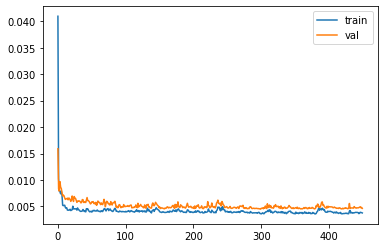

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

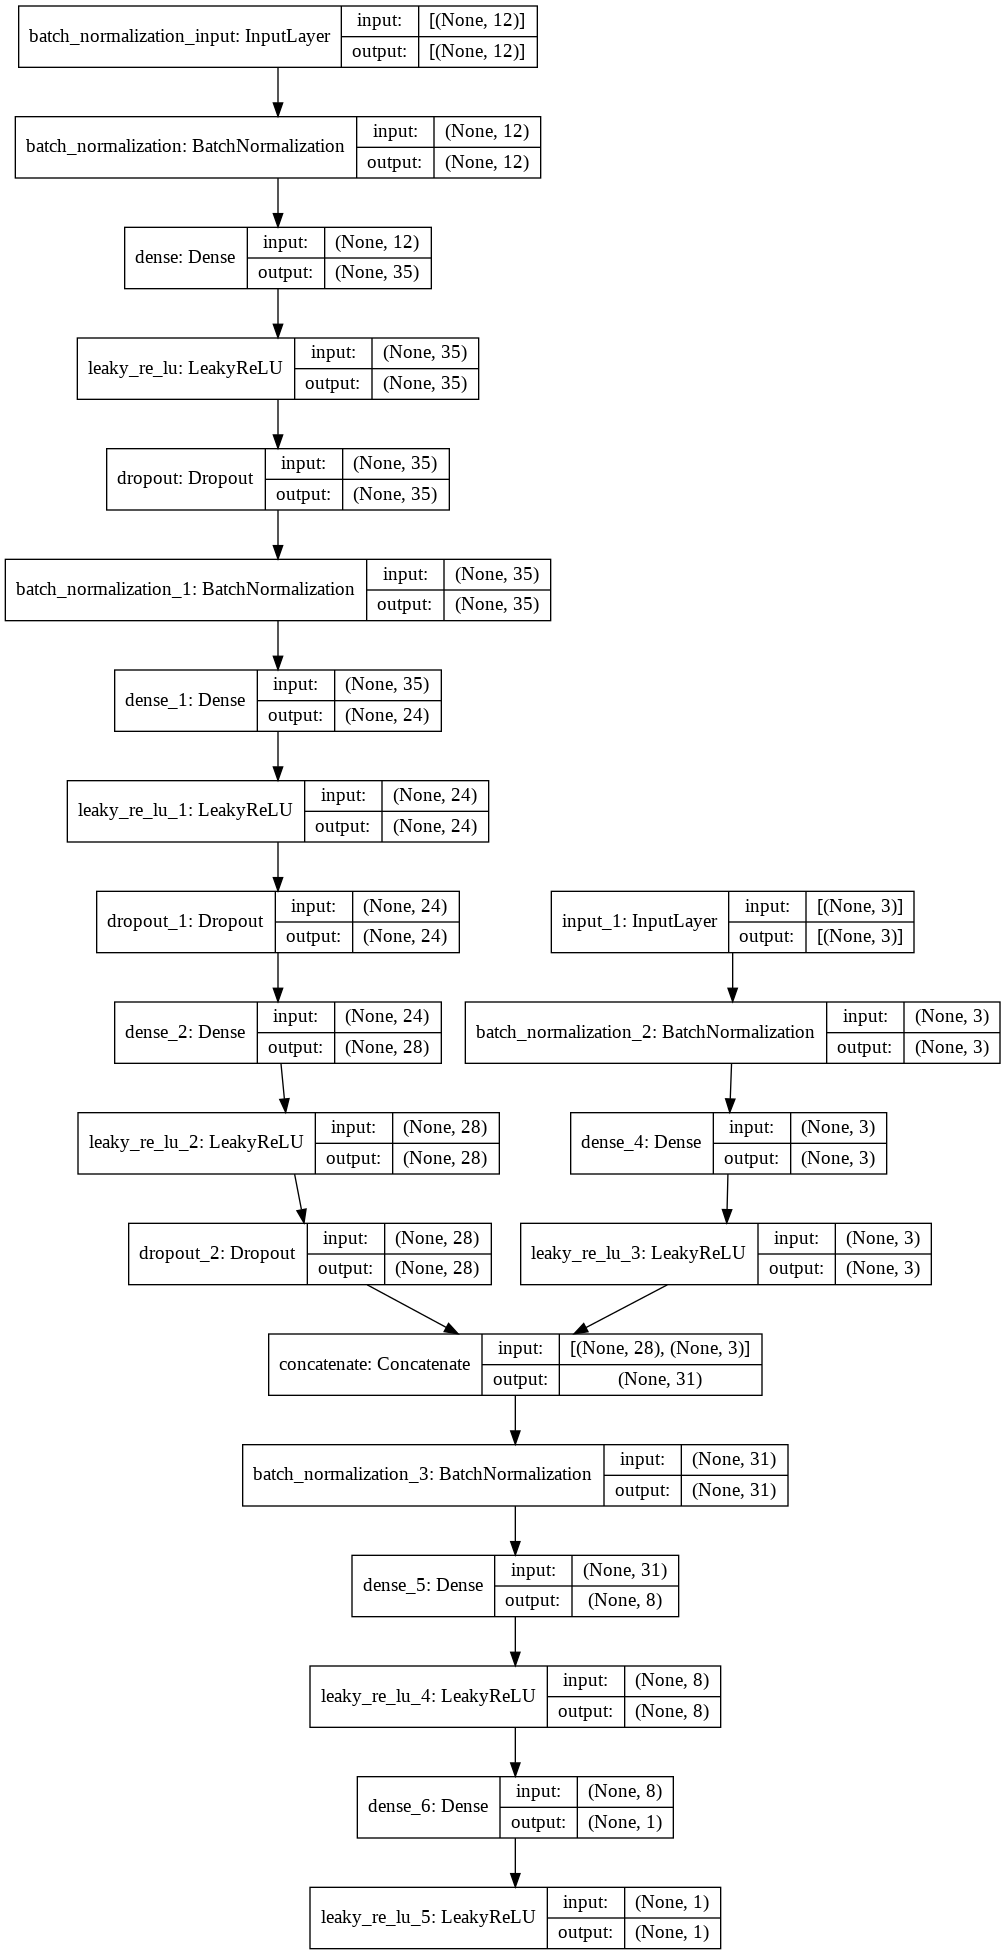

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

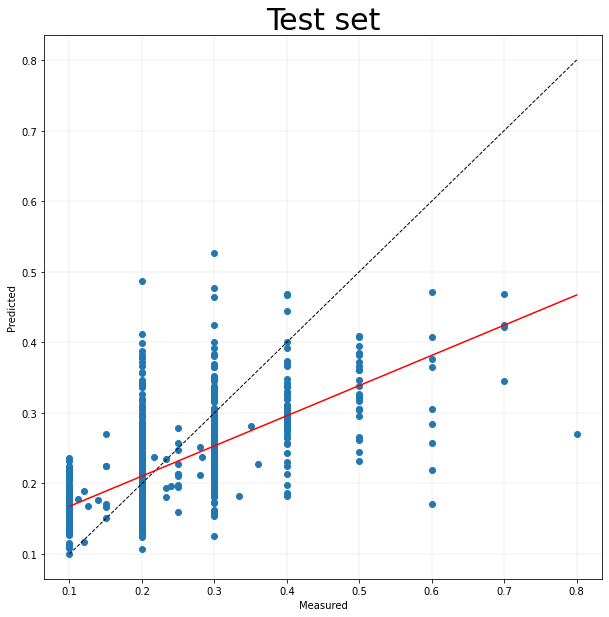

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


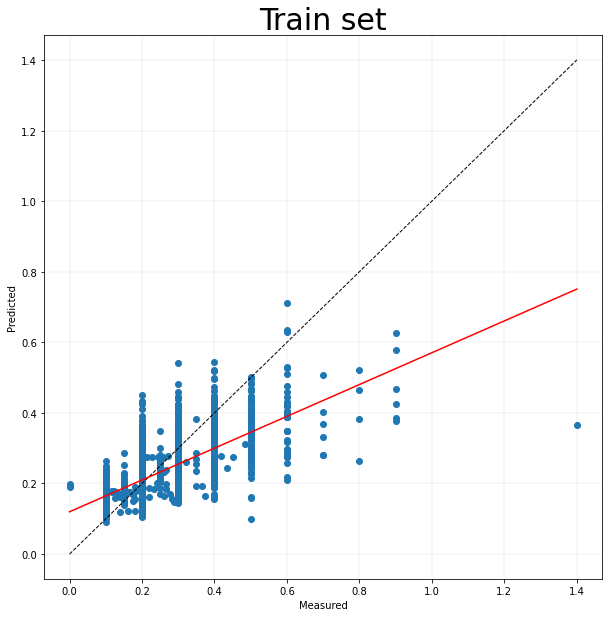

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


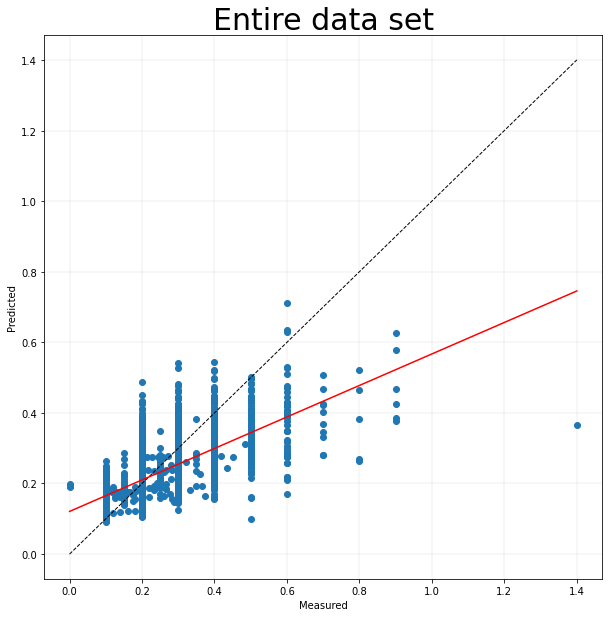

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

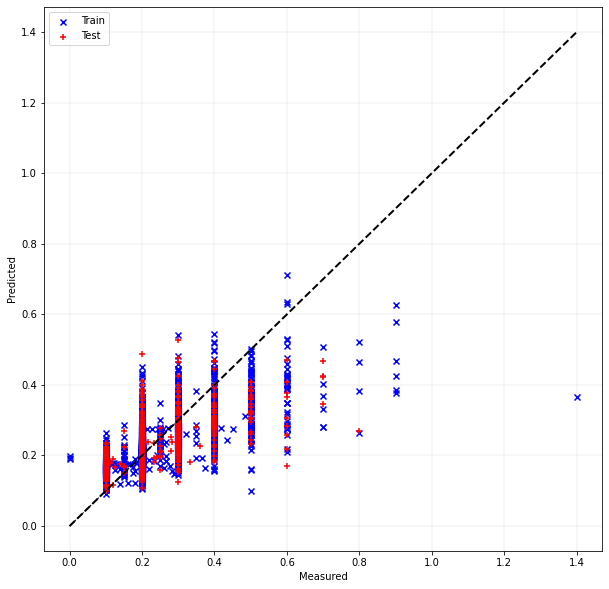

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

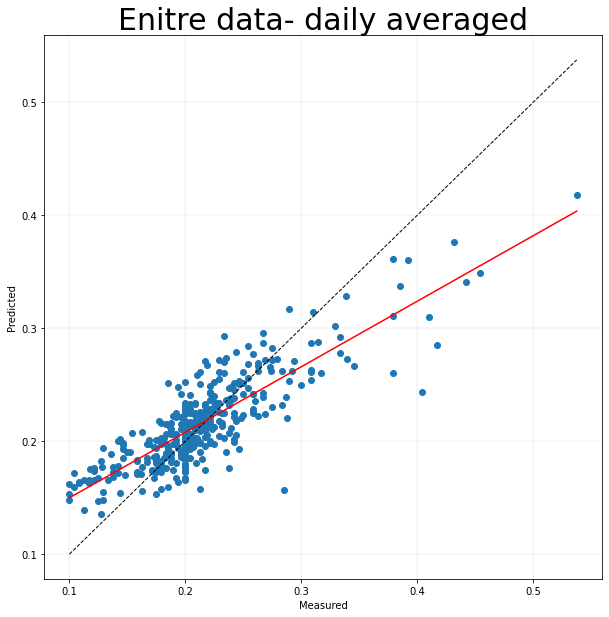

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


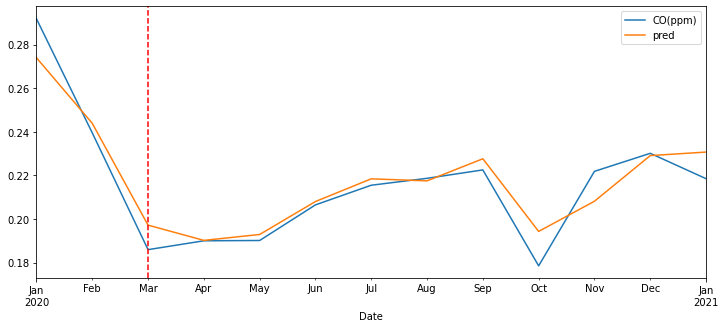

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

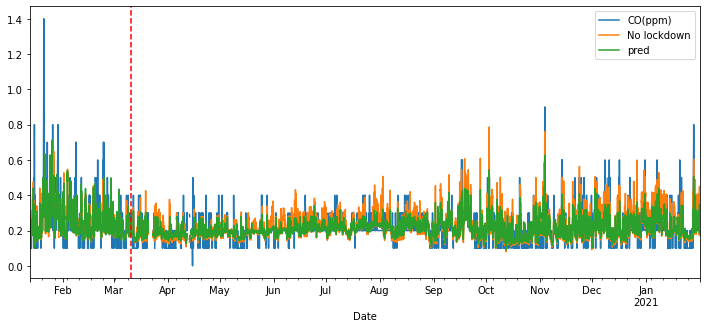

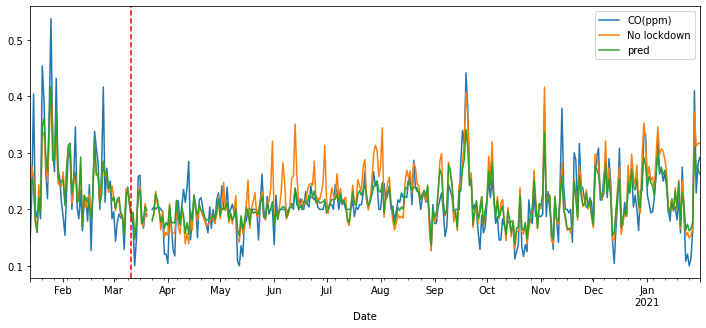

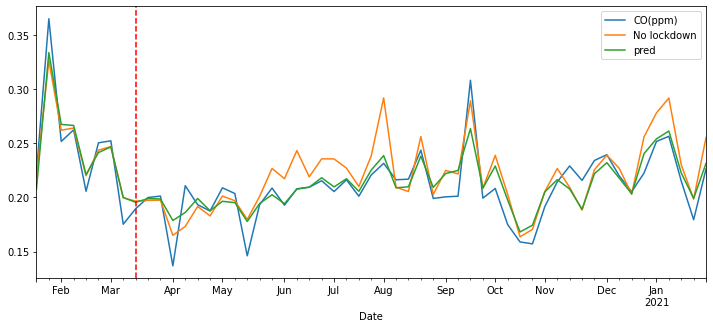

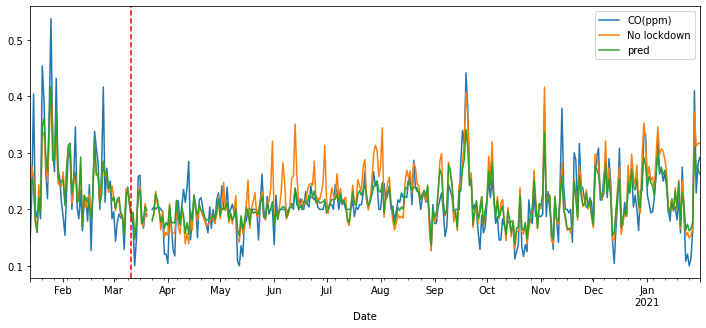

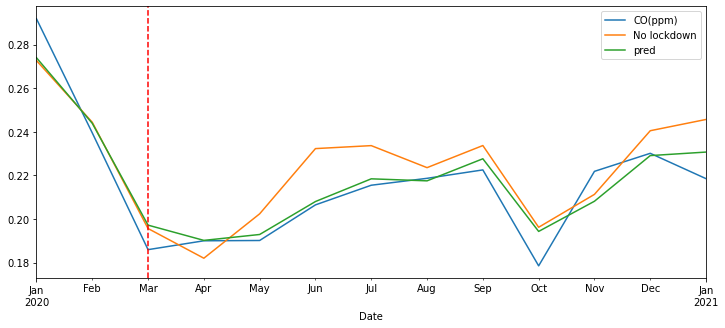

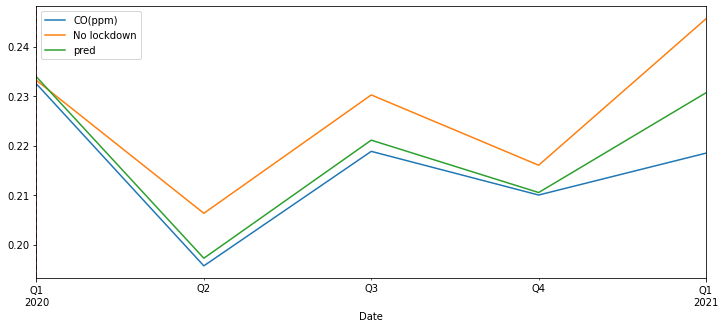

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]